In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
# Testing of DECEPTION detection, person-dependent manner
# using nested cross-validation: 
# outer loop for testing = 5-fold, 
# inner loop for hyperparameter (delta_D, tau_MDEL, C) tuning = 5-fold
######################################################################################

import itertools
import numpy as np
import glob
import csv
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

seed1 = 23
seed2 = 889
seed3 = 43

 # To be used within GridSearch
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed2)
# To be used in outer CV 
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed3)

int_SIDs = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
SIDs = ['{:02d}'.format(s) for s in int_SIDs]
C_range = 2. ** np.arange(-30, 15, step=1.)
parameters = [{'C': C_range}]

eds = np.linspace(1.,4.,7) # Epoch delay
mels = np.linspace(0.5,4.5,9) # Max epoch length
feature_type = 'deception'
val_scores = {}  # for each subject(key), list of tuples (ed,mel,bestC,outer_fold, val_acc)
test_scores = {} # for each subject(key), list of tuples (ed,mel,outer_fold,test_acc)

for SID in SIDs:
    # 1 subject -> 60 sec
    val_scores[SID] = []
    test_scores[SID] = []
    for i, ed in enumerate(eds):
        for j, mel in enumerate(mels):
    #         t = time.time()
            data = np.loadtxt('./../Experiment/ExtractedFeatures/features_'+feature_type+'_u_'+str(i)+'_'+str(j)+'.csv', 
                              delimiter=",", skiprows=0, dtype=str)
            dataSID = np.array([row for row in data if row[0] == SID])
            X = dataSID[:,1:-2].astype(np.float32)
            y = dataSID[:,-1].astype(np.int)

            # Balance the dataset
            X, y = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X, y)

            # Outer CV
            of = 1
            for train_index, test_index in outer_cv.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                # Inner CV
                grid = GridSearchCV(estimator=LinearSVC(), param_grid=parameters, cv=inner_cv, n_jobs=8, scoring='accuracy')
                grid.fit(X_train, y_train)
                # Record validation score - used to select best ed, mel, C
                val_scores[SID].append( (ed, mel, grid.best_params_['C'], of, grid.best_score_) )
                # Using the best hyperparameters, train on full training set
                SVM_linear_best = grid.best_estimator_
                SVM_linear_best.fit(X_train, y_train)
                # Evaluate
                y_pred = SVM_linear_best.predict(X_test)
                # Record test score - for model evaluation only
                test_scores[SID].append( (ed, mel, of, accuracy_score(y_test, y_pred)) )                
                of += 1

print val_scores
print test_scores

Process PoolWorker-22:
Process PoolWorker-21:
Process PoolWorker-20:
Process PoolWorker-24:
Process PoolWorker-23:
Process PoolWorker-19:
Process PoolWorker-18:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in 

KeyboardInterrupt: 

Subject 01 	Mean testing accracy (over all 5 outer folds):  0.616666666667 +/- 0.179505493571
Subject 02 	Mean testing accracy (over all 5 outer folds):  0.733333333333 +/- 0.161589328581
Subject 03 	Mean testing accracy (over all 5 outer folds):  0.733333333333 +/- 0.0333333333333
Subject 04 	Mean testing accracy (over all 5 outer folds):  0.92 +/- 0.116619037897
Subject 06 	Mean testing accracy (over all 5 outer folds):  0.583333333333 +/- 0.141260923564
Subject 07 	Mean testing accracy (over all 5 outer folds):  0.558333333333 +/- 0.0333333333333
Subject 08 	Mean testing accracy (over all 5 outer folds):  0.5875 +/- 0.0605959982177
Subject 09 	Mean testing accracy (over all 5 outer folds):  0.676785714286 +/- 0.168122889942
Subject 10 	Mean testing accracy (over all 5 outer folds):  0.621428571429 +/- 0.114285714286
Subject 11 	Mean testing accracy (over all 5 outer folds):  0.488181818182 +/- 0.0775449749532
Subject 12 	Mean testing accracy (over all 5 outer folds):  0.614743589744

<IPython.core.display.Javascript object>


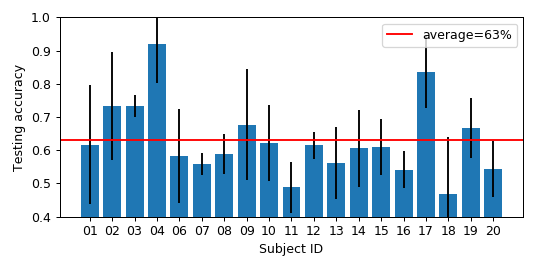

Mean test. acc. for person-dependent:  0.629757143441 +/- 0.102351459828


In [2]:
# Saved scores from above
val_scores={'02': [(1.0, 0.5, 128.0, 1, 0.77777777777777779), (1.0, 0.5, 0.0009765625, 2, 0.61111111111111116), (1.0, 0.5, 8192.0, 3, 0.55000000000000004), (1.0, 0.5, 9.3132257461547852e-10, 4, 0.5), (1.0, 0.5, 8.0, 5, 0.59999999999999998), (1.0, 1.0, 512.0, 1, 0.55555555555555558), (1.0, 1.0, 0.03125, 2, 0.61111111111111116), (1.0, 1.0, 4096.0, 3, 0.59999999999999998), (1.0, 1.0, 9.3132257461547852e-10, 4, 0.40000000000000002), (1.0, 1.0, 128.0, 5, 0.59999999999999998), (1.0, 1.5, 4.0, 1, 0.61111111111111116), (1.0, 1.5, 128.0, 2, 0.72222222222222221), (1.0, 1.5, 4096.0, 3, 0.69999999999999996), (1.0, 1.5, 4.0, 4, 0.59999999999999998), (1.0, 1.5, 1024.0, 5, 0.55000000000000004), (1.0, 2.0, 0.25, 1, 0.77777777777777779), (1.0, 2.0, 0.125, 2, 0.72222222222222221), (1.0, 2.0, 0.25, 3, 0.69999999999999996), (1.0, 2.0, 9.3132257461547852e-10, 4, 0.45000000000000001), (1.0, 2.0, 0.0625, 5, 0.65000000000000002), (1.0, 2.5, 0.5, 1, 0.66666666666666663), (1.0, 2.5, 0.25, 2, 0.66666666666666663), (1.0, 2.5, 0.0625, 3, 0.59999999999999998), (1.0, 2.5, 0.00390625, 4, 0.45000000000000001), (1.0, 2.5, 0.03125, 5, 0.65000000000000002), (1.0, 3.0, 1024.0, 1, 0.66666666666666663), (1.0, 3.0, 0.125, 2, 0.66666666666666663), (1.0, 3.0, 0.0625, 3, 0.59999999999999998), (1.0, 3.0, 9.3132257461547852e-10, 4, 0.45000000000000001), (1.0, 3.0, 0.03125, 5, 0.65000000000000002), (1.0, 3.5, 0.125, 1, 0.61111111111111116), (1.0, 3.5, 0.125, 2, 0.66666666666666663), (1.0, 3.5, 0.0625, 3, 0.59999999999999998), (1.0, 3.5, 9.3132257461547852e-10, 4, 0.45000000000000001), (1.0, 3.5, 0.03125, 5, 0.55000000000000004), (1.0, 4.0, 0.125, 1, 0.61111111111111116), (1.0, 4.0, 0.125, 2, 0.61111111111111116), (1.0, 4.0, 9.3132257461547852e-10, 3, 0.55000000000000004), (1.0, 4.0, 9.3132257461547852e-10, 4, 0.45000000000000001), (1.0, 4.0, 9.3132257461547852e-10, 5, 0.5), (1.0, 4.5, 0.125, 1, 0.61111111111111116), (1.0, 4.5, 0.125, 2, 0.61111111111111116), (1.0, 4.5, 9.3132257461547852e-10, 3, 0.5), (1.0, 4.5, 9.3132257461547852e-10, 4, 0.45000000000000001), (1.0, 4.5, 9.3132257461547852e-10, 5, 0.5), (1.5, 0.5, 8192.0, 1, 0.66666666666666663), (1.5, 0.5, 0.0625, 2, 0.55555555555555558), (1.5, 0.5, 0.25, 3, 0.65000000000000002), (1.5, 0.5, 1024.0, 4, 0.65000000000000002), (1.5, 0.5, 9.3132257461547852e-10, 5, 0.5), (1.5, 1.0, 0.001953125, 1, 0.55555555555555558), (1.5, 1.0, 0.015625, 2, 0.55555555555555558), (1.5, 1.0, 9.3132257461547852e-10, 3, 0.5), (1.5, 1.0, 9.3132257461547852e-10, 4, 0.5), (1.5, 1.0, 4.76837158203125e-07, 5, 0.5), (1.5, 1.5, 256.0, 1, 0.66666666666666663), (1.5, 1.5, 0.0625, 2, 0.61111111111111116), (1.5, 1.5, 128.0, 3, 0.65000000000000002), (1.5, 1.5, 9.3132257461547852e-10, 4, 0.5), (1.5, 1.5, 256.0, 5, 0.55000000000000004), (1.5, 2.0, 2.0, 1, 0.66666666666666663), (1.5, 2.0, 0.0625, 2, 0.66666666666666663), (1.5, 2.0, 4.0, 3, 0.90000000000000002), (1.5, 2.0, 512.0, 4, 0.59999999999999998), (1.5, 2.0, 64.0, 5, 0.69999999999999996), (1.5, 2.5, 512.0, 1, 0.77777777777777779), (1.5, 2.5, 0.125, 2, 0.72222222222222221), (1.5, 2.5, 32.0, 3, 0.94999999999999996), (1.5, 2.5, 8192.0, 4, 0.65000000000000002), (1.5, 2.5, 4096.0, 5, 0.65000000000000002), (1.5, 3.0, 8192.0, 1, 0.72222222222222221), (1.5, 3.0, 0.125, 2, 0.72222222222222221), (1.5, 3.0, 256.0, 3, 0.80000000000000004), (1.5, 3.0, 0.00390625, 4, 0.5), (1.5, 3.0, 32.0, 5, 0.55000000000000004), (1.5, 3.5, 4096.0, 1, 0.72222222222222221), (1.5, 3.5, 0.125, 2, 0.72222222222222221), (1.5, 3.5, 64.0, 3, 0.80000000000000004), (1.5, 3.5, 512.0, 4, 0.55000000000000004), (1.5, 3.5, 16.0, 5, 0.55000000000000004), (1.5, 4.0, 8192.0, 1, 0.72222222222222221), (1.5, 4.0, 0.125, 2, 0.72222222222222221), (1.5, 4.0, 64.0, 3, 0.80000000000000004), (1.5, 4.0, 256.0, 4, 0.55000000000000004), (1.5, 4.0, 64.0, 5, 0.59999999999999998), (1.5, 4.5, 256.0, 1, 0.66666666666666663), (1.5, 4.5, 0.125, 2, 0.72222222222222221), (1.5, 4.5, 64.0, 3, 0.80000000000000004), (1.5, 4.5, 4096.0, 4, 0.59999999999999998), (1.5, 4.5, 64.0, 5, 0.59999999999999998), (2.0, 0.5, 0.0625, 1, 0.61111111111111116), (2.0, 0.5, 0.125, 2, 0.66666666666666663), (2.0, 0.5, 9.3132257461547852e-10, 3, 0.45000000000000001), (2.0, 0.5, 0.03125, 4, 0.55000000000000004), (2.0, 0.5, 4096.0, 5, 0.65000000000000002), (2.0, 1.0, 0.125, 1, 0.83333333333333337), (2.0, 1.0, 1.0, 2, 0.66666666666666663), (2.0, 1.0, 16384.0, 3, 0.59999999999999998), (2.0, 1.0, 4096.0, 4, 0.59999999999999998), (2.0, 1.0, 1024.0, 5, 0.80000000000000004), (2.0, 1.5, 0.015625, 1, 0.77777777777777779), (2.0, 1.5, 256.0, 2, 0.66666666666666663), (2.0, 1.5, 16384.0, 3, 0.59999999999999998), (2.0, 1.5, 16.0, 4, 0.55000000000000004), (2.0, 1.5, 4.0, 5, 0.59999999999999998), (2.0, 2.0, 16.0, 1, 0.66666666666666663), (2.0, 2.0, 1024.0, 2, 0.66666666666666663), (2.0, 2.0, 4096.0, 3, 0.69999999999999996), (2.0, 2.0, 16384.0, 4, 0.59999999999999998), (2.0, 2.0, 2048.0, 5, 0.80000000000000004), (2.0, 2.5, 0.0625, 1, 0.72222222222222221), (2.0, 2.5, 256.0, 2, 0.72222222222222221), (2.0, 2.5, 1024.0, 3, 0.75), (2.0, 2.5, 256.0, 4, 0.59999999999999998), (2.0, 2.5, 2048.0, 5, 0.65000000000000002), (2.0, 3.0, 0.0078125, 1, 0.66666666666666663), (2.0, 3.0, 128.0, 2, 0.72222222222222221), (2.0, 3.0, 256.0, 3, 0.65000000000000002), (2.0, 3.0, 16.0, 4, 0.55000000000000004), (2.0, 3.0, 8.0, 5, 0.55000000000000004), (2.0, 3.5, 0.015625, 1, 0.66666666666666663), (2.0, 3.5, 8192.0, 2, 0.72222222222222221), (2.0, 3.5, 2048.0, 3, 0.69999999999999996), (2.0, 3.5, 512.0, 4, 0.59999999999999998), (2.0, 3.5, 2048.0, 5, 0.55000000000000004), (2.0, 4.0, 0.015625, 1, 0.66666666666666663), (2.0, 4.0, 2048.0, 2, 0.72222222222222221), (2.0, 4.0, 128.0, 3, 0.65000000000000002), (2.0, 4.0, 32.0, 4, 0.55000000000000004), (2.0, 4.0, 8.0, 5, 0.5), (2.0, 4.5, 0.03125, 1, 0.66666666666666663), (2.0, 4.5, 256.0, 2, 0.72222222222222221), (2.0, 4.5, 128.0, 3, 0.69999999999999996), (2.0, 4.5, 64.0, 4, 0.55000000000000004), (2.0, 4.5, 256.0, 5, 0.55000000000000004), (2.5, 0.5, 0.125, 1, 0.66666666666666663), (2.5, 0.5, 0.03125, 2, 0.66666666666666663), (2.5, 0.5, 0.0625, 3, 0.75), (2.5, 0.5, 0.125, 4, 0.75), (2.5, 0.5, 0.0625, 5, 0.65000000000000002), (2.5, 1.0, 512.0, 1, 0.61111111111111116), (2.5, 1.0, 8.0, 2, 0.72222222222222221), (2.5, 1.0, 256.0, 3, 0.59999999999999998), (2.5, 1.0, 0.03125, 4, 0.55000000000000004), (2.5, 1.0, 9.3132257461547852e-10, 5, 0.5), (2.5, 1.5, 128.0, 1, 0.72222222222222221), (2.5, 1.5, 128.0, 2, 0.61111111111111116), (2.5, 1.5, 4.0, 3, 0.5), (2.5, 1.5, 0.03125, 4, 0.55000000000000004), (2.5, 1.5, 256.0, 5, 0.5), (2.5, 2.0, 0.125, 1, 0.77777777777777779), (2.5, 2.0, 0.03125, 2, 0.55555555555555558), (2.5, 2.0, 4096.0, 3, 0.59999999999999998), (2.5, 2.0, 8192.0, 4, 0.5), (2.5, 2.0, 4096.0, 5, 0.55000000000000004), (2.5, 2.5, 0.25, 1, 0.66666666666666663), (2.5, 2.5, 16384.0, 2, 0.61111111111111116), (2.5, 2.5, 512.0, 3, 0.65000000000000002), (2.5, 2.5, 9.3132257461547852e-10, 4, 0.45000000000000001), (2.5, 2.5, 9.3132257461547852e-10, 5, 0.45000000000000001), (2.5, 3.0, 0.03125, 1, 0.61111111111111116), (2.5, 3.0, 128.0, 2, 0.55555555555555558), (2.5, 3.0, 32.0, 3, 0.69999999999999996), (2.5, 3.0, 1024.0, 4, 0.55000000000000004), (2.5, 3.0, 9.3132257461547852e-10, 5, 0.45000000000000001), (2.5, 3.5, 0.0625, 1, 0.61111111111111116), (2.5, 3.5, 0.0625, 2, 0.55555555555555558), (2.5, 3.5, 32.0, 3, 0.65000000000000002), (2.5, 3.5, 16384.0, 4, 0.55000000000000004), (2.5, 3.5, 0.00390625, 5, 0.5), (2.5, 4.0, 0.125, 1, 0.61111111111111116), (2.5, 4.0, 8192.0, 2, 0.61111111111111116), (2.5, 4.0, 64.0, 3, 0.65000000000000002), (2.5, 4.0, 16384.0, 4, 0.5), (2.5, 4.0, 9.3132257461547852e-10, 5, 0.5), (2.5, 4.5, 0.125, 1, 0.61111111111111116), (2.5, 4.5, 0.0625, 2, 0.55555555555555558), (2.5, 4.5, 64.0, 3, 0.65000000000000002), (2.5, 4.5, 512.0, 4, 0.55000000000000004), (2.5, 4.5, 9.3132257461547852e-10, 5, 0.5), (3.0, 0.5, 0.0625, 1, 0.66666666666666663), (3.0, 0.5, 0.125, 2, 0.66666666666666663), (3.0, 0.5, 0.015625, 3, 0.55000000000000004), (3.0, 0.5, 32.0, 4, 0.75), (3.0, 0.5, 32.0, 5, 0.65000000000000002), (3.0, 1.0, 16.0, 1, 0.61111111111111116), (3.0, 1.0, 4.0, 2, 0.66666666666666663), (3.0, 1.0, 2.0, 3, 0.69999999999999996), (3.0, 1.0, 0.015625, 4, 0.75), (3.0, 1.0, 16.0, 5, 0.69999999999999996), (3.0, 1.5, 512.0, 1, 0.83333333333333337), (3.0, 1.5, 0.0078125, 2, 0.77777777777777779), (3.0, 1.5, 64.0, 3, 0.75), (3.0, 1.5, 1.0, 4, 0.69999999999999996), (3.0, 1.5, 32.0, 5, 0.55000000000000004), (3.0, 2.0, 1024.0, 1, 0.94444444444444442), (3.0, 2.0, 0.03125, 2, 0.72222222222222221), (3.0, 2.0, 128.0, 3, 0.65000000000000002), (3.0, 2.0, 16.0, 4, 0.65000000000000002), (3.0, 2.0, 4.0, 5, 0.55000000000000004), (3.0, 2.5, 4.0, 1, 0.77777777777777779), (3.0, 2.5, 128.0, 2, 0.72222222222222221), (3.0, 2.5, 2048.0, 3, 0.75), (3.0, 2.5, 8.0, 4, 0.69999999999999996), (3.0, 2.5, 32.0, 5, 0.69999999999999996), (3.0, 3.0, 4.0, 1, 0.72222222222222221), (3.0, 3.0, 0.015625, 2, 0.55555555555555558), (3.0, 3.0, 8192.0, 3, 0.69999999999999996), (3.0, 3.0, 0.015625, 4, 0.59999999999999998), (3.0, 3.0, 16.0, 5, 0.65000000000000002), (3.0, 3.5, 0.125, 1, 0.66666666666666663), (3.0, 3.5, 512.0, 2, 0.55555555555555558), (3.0, 3.5, 256.0, 3, 0.69999999999999996), (3.0, 3.5, 1024.0, 4, 0.75), (3.0, 3.5, 8.0, 5, 0.65000000000000002), (3.0, 4.0, 0.125, 1, 0.66666666666666663), (3.0, 4.0, 256.0, 2, 0.55555555555555558), (3.0, 4.0, 128.0, 3, 0.59999999999999998), (3.0, 4.0, 128.0, 4, 0.75), (3.0, 4.0, 16.0, 5, 0.65000000000000002), (3.0, 4.5, 0.125, 1, 0.66666666666666663), (3.0, 4.5, 256.0, 2, 0.55555555555555558), (3.0, 4.5, 128.0, 3, 0.59999999999999998), (3.0, 4.5, 1024.0, 4, 0.80000000000000004), (3.0, 4.5, 16.0, 5, 0.65000000000000002), (3.5, 0.5, 9.3132257461547852e-10, 1, 0.5), (3.5, 0.5, 32.0, 2, 0.66666666666666663), (3.5, 0.5, 0.00390625, 3, 0.55000000000000004), (3.5, 0.5, 8192.0, 4, 0.55000000000000004), (3.5, 0.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 1.0, 4.0, 1, 0.55555555555555558), (3.5, 1.0, 9.3132257461547852e-10, 2, 0.44444444444444442), (3.5, 1.0, 512.0, 3, 0.69999999999999996), (3.5, 1.0, 0.0625, 4, 0.55000000000000004), (3.5, 1.0, 0.001953125, 5, 0.55000000000000004), (3.5, 1.5, 1.0, 1, 0.55555555555555558), (3.5, 1.5, 0.03125, 2, 0.5), (3.5, 1.5, 64.0, 3, 0.80000000000000004), (3.5, 1.5, 8.0, 4, 0.69999999999999996), (3.5, 1.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 2.0, 64.0, 1, 0.66666666666666663), (3.5, 2.0, 1.0, 2, 0.61111111111111116), (3.5, 2.0, 2048.0, 3, 0.65000000000000002), (3.5, 2.0, 256.0, 4, 0.65000000000000002), (3.5, 2.0, 4096.0, 5, 0.55000000000000004), (3.5, 2.5, 2048.0, 1, 0.72222222222222221), (3.5, 2.5, 128.0, 2, 0.55555555555555558), (3.5, 2.5, 1024.0, 3, 0.69999999999999996), (3.5, 2.5, 2048.0, 4, 0.59999999999999998), (3.5, 2.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 3.0, 8192.0, 1, 0.61111111111111116), (3.5, 3.0, 128.0, 2, 0.66666666666666663), (3.5, 3.0, 256.0, 3, 0.65000000000000002), (3.5, 3.0, 32.0, 4, 0.59999999999999998), (3.5, 3.0, 2048.0, 5, 0.55000000000000004), (3.5, 3.5, 0.25, 1, 0.55555555555555558), (3.5, 3.5, 0.0078125, 2, 0.66666666666666663), (3.5, 3.5, 4096.0, 3, 0.75), (3.5, 3.5, 1024.0, 4, 0.69999999999999996), (3.5, 3.5, 8192.0, 5, 0.55000000000000004), (3.5, 4.0, 0.25, 1, 0.55555555555555558), (3.5, 4.0, 0.00390625, 2, 0.61111111111111116), (3.5, 4.0, 2048.0, 3, 0.69999999999999996), (3.5, 4.0, 512.0, 4, 0.65000000000000002), (3.5, 4.0, 9.3132257461547852e-10, 5, 0.5), (3.5, 4.5, 9.3132257461547852e-10, 1, 0.5), (3.5, 4.5, 9.3132257461547852e-10, 2, 0.66666666666666663), (3.5, 4.5, 256.0, 3, 0.59999999999999998), (3.5, 4.5, 2.0, 4, 0.55000000000000004), (3.5, 4.5, 9.3132257461547852e-10, 5, 0.5), (4.0, 0.5, 0.25, 1, 0.61111111111111116), (4.0, 0.5, 0.015625, 2, 0.66666666666666663), (4.0, 0.5, 8192.0, 3, 0.59999999999999998), (4.0, 0.5, 512.0, 4, 0.69999999999999996), (4.0, 0.5, 512.0, 5, 0.45000000000000001), (4.0, 1.0, 256.0, 1, 0.83333333333333337), (4.0, 1.0, 4.0, 2, 0.88888888888888884), (4.0, 1.0, 512.0, 3, 0.90000000000000002), (4.0, 1.0, 256.0, 4, 0.90000000000000002), (4.0, 1.0, 1024.0, 5, 0.84999999999999998), (4.0, 1.5, 0.0078125, 1, 0.5), (4.0, 1.5, 4.0, 2, 0.72222222222222221), (4.0, 1.5, 4.0, 3, 0.59999999999999998), (4.0, 1.5, 9.3132257461547852e-10, 4, 0.5), (4.0, 1.5, 512.0, 5, 0.55000000000000004), (4.0, 2.0, 8.0, 1, 0.55555555555555558), (4.0, 2.0, 4.0, 2, 0.55555555555555558), (4.0, 2.0, 1024.0, 3, 0.55000000000000004), (4.0, 2.0, 1.0, 4, 0.65000000000000002), (4.0, 2.0, 16384.0, 5, 0.45000000000000001), (4.0, 2.5, 0.125, 1, 0.5), (4.0, 2.5, 9.3132257461547852e-10, 2, 0.5), (4.0, 2.5, 0.0078125, 3, 0.5), (4.0, 2.5, 9.3132257461547852e-10, 4, 0.45000000000000001), (4.0, 2.5, 256.0, 5, 0.5), (4.0, 3.0, 8192.0, 1, 0.61111111111111116), (4.0, 3.0, 9.3132257461547852e-10, 2, 0.5), (4.0, 3.0, 256.0, 3, 0.55000000000000004), (4.0, 3.0, 9.3132257461547852e-10, 4, 0.45000000000000001), (4.0, 3.0, 9.3132257461547852e-10, 5, 0.45000000000000001), (4.0, 3.5, 32.0, 1, 0.55555555555555558), (4.0, 3.5, 9.3132257461547852e-10, 2, 0.61111111111111116), (4.0, 3.5, 1024.0, 3, 0.55000000000000004), (4.0, 3.5, 9.3132257461547852e-10, 4, 0.45000000000000001), (4.0, 3.5, 9.3132257461547852e-10, 5, 0.45000000000000001), (4.0, 4.0, 8192.0, 1, 0.66666666666666663), (4.0, 4.0, 0.015625, 2, 0.66666666666666663), (4.0, 4.0, 512.0, 3, 0.55000000000000004), (4.0, 4.0, 4096.0, 4, 0.55000000000000004), (4.0, 4.0, 1024.0, 5, 0.5), (4.0, 4.5, 256.0, 1, 0.66666666666666663), (4.0, 4.5, 32.0, 2, 0.72222222222222221), (4.0, 4.5, 128.0, 3, 0.59999999999999998), (4.0, 4.5, 512.0, 4, 0.65000000000000002), (4.0, 4.5, 1024.0, 5, 0.55000000000000004)], '03': [(1.0, 0.5, 0.0625, 1, 0.6875), (1.0, 0.5, 1024.0, 2, 0.66666666666666663), (1.0, 0.5, 32.0, 3, 0.61111111111111116), (1.0, 0.5, 4096.0, 4, 0.55555555555555558), (1.0, 0.5, 9.3132257461547852e-10, 5, 0.5), (1.0, 1.0, 0.0625, 1, 0.75), (1.0, 1.0, 0.5, 2, 0.77777777777777779), (1.0, 1.0, 1.0, 3, 0.77777777777777779), (1.0, 1.0, 32.0, 4, 0.66666666666666663), (1.0, 1.0, 32.0, 5, 0.61111111111111116), (1.0, 1.5, 128.0, 1, 0.875), (1.0, 1.5, 0.00390625, 2, 0.72222222222222221), (1.0, 1.5, 0.125, 3, 0.72222222222222221), (1.0, 1.5, 0.00390625, 4, 0.61111111111111116), (1.0, 1.5, 0.125, 5, 0.72222222222222221), (1.0, 2.0, 8.0, 1, 0.625), (1.0, 2.0, 0.125, 2, 0.72222222222222221), (1.0, 2.0, 0.03125, 3, 0.66666666666666663), (1.0, 2.0, 4.0, 4, 0.66666666666666663), (1.0, 2.0, 0.25, 5, 0.72222222222222221), (1.0, 2.5, 0.03125, 1, 0.75), (1.0, 2.5, 0.0625, 2, 0.77777777777777779), (1.0, 2.5, 0.5, 3, 0.83333333333333337), (1.0, 2.5, 0.125, 4, 0.77777777777777779), (1.0, 2.5, 0.125, 5, 0.83333333333333337), (1.0, 3.0, 0.125, 1, 0.8125), (1.0, 3.0, 0.25, 2, 0.83333333333333337), (1.0, 3.0, 1024.0, 3, 1.0), (1.0, 3.0, 0.03125, 4, 0.66666666666666663), (1.0, 3.0, 0.5, 5, 0.77777777777777779), (1.0, 3.5, 0.0625, 1, 0.75), (1.0, 3.5, 0.125, 2, 0.77777777777777779), (1.0, 3.5, 64.0, 3, 0.88888888888888884), (1.0, 3.5, 32.0, 4, 0.72222222222222221), (1.0, 3.5, 0.125, 5, 0.77777777777777779), (1.0, 4.0, 0.03125, 1, 0.75), (1.0, 4.0, 0.25, 2, 0.83333333333333337), (1.0, 4.0, 1.0, 3, 0.88888888888888884), (1.0, 4.0, 2.0, 4, 0.83333333333333337), (1.0, 4.0, 0.0625, 5, 0.83333333333333337), (1.0, 4.5, 0.03125, 1, 0.75), (1.0, 4.5, 0.25, 2, 0.77777777777777779), (1.0, 4.5, 2.0, 3, 0.83333333333333337), (1.0, 4.5, 2.0, 4, 0.83333333333333337), (1.0, 4.5, 0.0625, 5, 0.83333333333333337), (1.5, 0.5, 4.0, 1, 0.625), (1.5, 0.5, 0.25, 2, 0.72222222222222221), (1.5, 0.5, 0.125, 3, 0.61111111111111116), (1.5, 0.5, 0.015625, 4, 0.5), (1.5, 0.5, 0.03125, 5, 0.61111111111111116), (1.5, 1.0, 256.0, 1, 0.625), (1.5, 1.0, 2.0, 2, 0.61111111111111116), (1.5, 1.0, 128.0, 3, 0.61111111111111116), (1.5, 1.0, 0.00390625, 4, 0.66666666666666663), (1.5, 1.0, 0.125, 5, 0.72222222222222221), (1.5, 1.5, 8.0, 1, 0.8125), (1.5, 1.5, 4.0, 2, 0.72222222222222221), (1.5, 1.5, 9.3132257461547852e-10, 3, 0.55555555555555558), (1.5, 1.5, 0.125, 4, 0.72222222222222221), (1.5, 1.5, 0.00390625, 5, 0.61111111111111116), (1.5, 2.0, 8.0, 1, 0.75), (1.5, 2.0, 0.125, 2, 0.66666666666666663), (1.5, 2.0, 4096.0, 3, 0.55555555555555558), (1.5, 2.0, 1.0, 4, 0.61111111111111116), (1.5, 2.0, 0.5, 5, 0.55555555555555558), (1.5, 2.5, 0.25, 1, 0.625), (1.5, 2.5, 0.125, 2, 0.66666666666666663), (1.5, 2.5, 128.0, 3, 0.72222222222222221), (1.5, 2.5, 0.25, 4, 0.61111111111111116), (1.5, 2.5, 2048.0, 5, 0.72222222222222221), (1.5, 3.0, 4.0, 1, 0.6875), (1.5, 3.0, 64.0, 2, 0.77777777777777779), (1.5, 3.0, 2048.0, 3, 0.72222222222222221), (1.5, 3.0, 0.25, 4, 0.72222222222222221), (1.5, 3.0, 512.0, 5, 0.72222222222222221), (1.5, 3.5, 4.0, 1, 0.75), (1.5, 3.5, 0.25, 2, 0.77777777777777779), (1.5, 3.5, 2048.0, 3, 0.77777777777777779), (1.5, 3.5, 4.0, 4, 0.66666666666666663), (1.5, 3.5, 8192.0, 5, 0.72222222222222221), (1.5, 4.0, 0.125, 1, 0.75), (1.5, 4.0, 0.25, 2, 0.77777777777777779), (1.5, 4.0, 128.0, 3, 0.66666666666666663), (1.5, 4.0, 1.0, 4, 0.83333333333333337), (1.5, 4.0, 128.0, 5, 0.66666666666666663), (1.5, 4.5, 0.125, 1, 0.75), (1.5, 4.5, 0.25, 2, 0.77777777777777779), (1.5, 4.5, 32.0, 3, 0.77777777777777779), (1.5, 4.5, 0.5, 4, 0.83333333333333337), (1.5, 4.5, 512.0, 5, 0.72222222222222221), (2.0, 0.5, 0.03125, 1, 0.625), (2.0, 0.5, 64.0, 2, 0.66666666666666663), (2.0, 0.5, 8192.0, 3, 0.61111111111111116), (2.0, 0.5, 512.0, 4, 0.72222222222222221), (2.0, 0.5, 0.125, 5, 0.55555555555555558), (2.0, 1.0, 32.0, 1, 0.6875), (2.0, 1.0, 0.015625, 2, 0.66666666666666663), (2.0, 1.0, 0.03125, 3, 0.61111111111111116), (2.0, 1.0, 0.03125, 4, 0.61111111111111116), (2.0, 1.0, 64.0, 5, 0.77777777777777779), (2.0, 1.5, 8192.0, 1, 0.8125), (2.0, 1.5, 16.0, 2, 0.61111111111111116), (2.0, 1.5, 0.03125, 3, 0.61111111111111116), (2.0, 1.5, 9.3132257461547852e-10, 4, 0.61111111111111116), (2.0, 1.5, 0.25, 5, 0.61111111111111116), (2.0, 2.0, 1024.0, 1, 0.625), (2.0, 2.0, 0.125, 2, 0.61111111111111116), (2.0, 2.0, 0.0625, 3, 0.61111111111111116), (2.0, 2.0, 0.03125, 4, 0.55555555555555558), (2.0, 2.0, 0.0078125, 5, 0.61111111111111116), (2.0, 2.5, 32.0, 1, 0.625), (2.0, 2.5, 4.0, 2, 0.61111111111111116), (2.0, 2.5, 0.0078125, 3, 0.5), (2.0, 2.5, 8192.0, 4, 0.61111111111111116), (2.0, 2.5, 256.0, 5, 0.66666666666666663), (2.0, 3.0, 0.0625, 1, 0.625), (2.0, 3.0, 0.001953125, 2, 0.55555555555555558), (2.0, 3.0, 0.0078125, 3, 0.55555555555555558), (2.0, 3.0, 0.5, 4, 0.61111111111111116), (2.0, 3.0, 2.0, 5, 0.55555555555555558), (2.0, 3.5, 0.125, 1, 0.6875), (2.0, 3.5, 256.0, 2, 0.66666666666666663), (2.0, 3.5, 0.125, 3, 0.61111111111111116), (2.0, 3.5, 256.0, 4, 0.66666666666666663), (2.0, 3.5, 0.5, 5, 0.61111111111111116), (2.0, 4.0, 0.0625, 1, 0.75), (2.0, 4.0, 8192.0, 2, 0.61111111111111116), (2.0, 4.0, 0.5, 3, 0.61111111111111116), (2.0, 4.0, 8.0, 4, 0.55555555555555558), (2.0, 4.0, 2.0, 5, 0.77777777777777779), (2.0, 4.5, 0.03125, 1, 0.75), (2.0, 4.5, 0.03125, 2, 0.55555555555555558), (2.0, 4.5, 0.125, 3, 0.55555555555555558), (2.0, 4.5, 8192.0, 4, 0.61111111111111116), (2.0, 4.5, 256.0, 5, 0.72222222222222221), (2.5, 0.5, 0.5, 1, 0.6875), (2.5, 0.5, 0.25, 2, 0.61111111111111116), (2.5, 0.5, 128.0, 3, 0.66666666666666663), (2.5, 0.5, 32.0, 4, 0.5), (2.5, 0.5, 2048.0, 5, 0.55555555555555558), (2.5, 1.0, 4.0, 1, 0.625), (2.5, 1.0, 16384.0, 2, 0.77777777777777779), (2.5, 1.0, 0.03125, 3, 0.72222222222222221), (2.5, 1.0, 9.3132257461547852e-10, 4, 0.72222222222222221), (2.5, 1.0, 2048.0, 5, 0.66666666666666663), (2.5, 1.5, 0.125, 1, 0.75), (2.5, 1.5, 8.0, 2, 0.61111111111111116), (2.5, 1.5, 0.5, 3, 0.61111111111111116), (2.5, 1.5, 0.25, 4, 0.83333333333333337), (2.5, 1.5, 0.0625, 5, 0.77777777777777779), (2.5, 2.0, 2.0, 1, 0.8125), (2.5, 2.0, 0.03125, 2, 0.83333333333333337), (2.5, 2.0, 8.0, 3, 0.83333333333333337), (2.5, 2.0, 2.0, 4, 0.88888888888888884), (2.5, 2.0, 8.0, 5, 0.77777777777777779), (2.5, 2.5, 8.0, 1, 0.6875), (2.5, 2.5, 0.03125, 2, 0.83333333333333337), (2.5, 2.5, 128.0, 3, 0.83333333333333337), (2.5, 2.5, 0.5, 4, 0.83333333333333337), (2.5, 2.5, 0.25, 5, 0.72222222222222221), (2.5, 3.0, 0.5, 1, 0.6875), (2.5, 3.0, 0.015625, 2, 0.66666666666666663), (2.5, 3.0, 0.015625, 3, 0.66666666666666663), (2.5, 3.0, 64.0, 4, 0.83333333333333337), (2.5, 3.0, 2.0, 5, 0.77777777777777779), (2.5, 3.5, 0.25, 1, 0.6875), (2.5, 3.5, 0.125, 2, 0.61111111111111116), (2.5, 3.5, 0.5, 3, 0.72222222222222221), (2.5, 3.5, 512.0, 4, 0.83333333333333337), (2.5, 3.5, 0.5, 5, 0.72222222222222221), (2.5, 4.0, 2.0, 1, 0.6875), (2.5, 4.0, 0.03125, 2, 0.66666666666666663), (2.5, 4.0, 0.5, 3, 0.55555555555555558), (2.5, 4.0, 0.25, 4, 0.77777777777777779), (2.5, 4.0, 1024.0, 5, 0.72222222222222221), (2.5, 4.5, 0.125, 1, 0.6875), (2.5, 4.5, 0.25, 2, 0.61111111111111116), (2.5, 4.5, 64.0, 3, 0.55555555555555558), (2.5, 4.5, 1024.0, 4, 0.66666666666666663), (2.5, 4.5, 64.0, 5, 0.61111111111111116), (3.0, 0.5, 0.0625, 1, 0.625), (3.0, 0.5, 0.125, 2, 0.55555555555555558), (3.0, 0.5, 0.0625, 3, 0.66666666666666663), (3.0, 0.5, 0.125, 4, 0.72222222222222221), (3.0, 0.5, 64.0, 5, 0.83333333333333337), (3.0, 1.0, 32.0, 1, 0.6875), (3.0, 1.0, 512.0, 2, 0.61111111111111116), (3.0, 1.0, 0.125, 3, 0.61111111111111116), (3.0, 1.0, 9.3132257461547852e-10, 4, 0.66666666666666663), (3.0, 1.0, 64.0, 5, 0.61111111111111116), (3.0, 1.5, 0.00390625, 1, 0.75), (3.0, 1.5, 2048.0, 2, 0.88888888888888884), (3.0, 1.5, 0.03125, 3, 0.77777777777777779), (3.0, 1.5, 9.3132257461547852e-10, 4, 0.77777777777777779), (3.0, 1.5, 32.0, 5, 0.77777777777777779), (3.0, 2.0, 0.0625, 1, 0.75), (3.0, 2.0, 0.0078125, 2, 0.66666666666666663), (3.0, 2.0, 64.0, 3, 0.72222222222222221), (3.0, 2.0, 0.5, 4, 0.83333333333333337), (3.0, 2.0, 0.015625, 5, 0.77777777777777779), (3.0, 2.5, 0.03125, 1, 0.75), (3.0, 2.5, 0.015625, 2, 0.77777777777777779), (3.0, 2.5, 0.03125, 3, 0.77777777777777779), (3.0, 2.5, 0.125, 4, 0.83333333333333337), (3.0, 2.5, 0.0625, 5, 0.77777777777777779), (3.0, 3.0, 0.0625, 1, 0.6875), (3.0, 3.0, 0.03125, 2, 0.77777777777777779), (3.0, 3.0, 0.0625, 3, 0.66666666666666663), (3.0, 3.0, 0.0625, 4, 0.83333333333333337), (3.0, 3.0, 0.125, 5, 0.66666666666666663), (3.0, 3.5, 0.0625, 1, 0.6875), (3.0, 3.5, 0.015625, 2, 0.72222222222222221), (3.0, 3.5, 0.5, 3, 0.66666666666666663), (3.0, 3.5, 0.03125, 4, 0.83333333333333337), (3.0, 3.5, 0.5, 5, 0.72222222222222221), (3.0, 4.0, 0.00390625, 1, 0.625), (3.0, 4.0, 0.125, 2, 0.66666666666666663), (3.0, 4.0, 1.0, 3, 0.72222222222222221), (3.0, 4.0, 0.0625, 4, 0.77777777777777779), (3.0, 4.0, 0.5, 5, 0.72222222222222221), (3.0, 4.5, 0.125, 1, 0.6875), (3.0, 4.5, 0.125, 2, 0.61111111111111116), (3.0, 4.5, 128.0, 3, 0.66666666666666663), (3.0, 4.5, 0.125, 4, 0.66666666666666663), (3.0, 4.5, 1.0, 5, 0.72222222222222221), (3.5, 0.5, 2048.0, 1, 0.5625), (3.5, 0.5, 9.3132257461547852e-10, 2, 0.66666666666666663), (3.5, 0.5, 0.03125, 3, 0.66666666666666663), (3.5, 0.5, 4096.0, 4, 0.55555555555555558), (3.5, 0.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 1.0, 0.015625, 1, 0.6875), (3.5, 1.0, 0.015625, 2, 0.55555555555555558), (3.5, 1.0, 0.0625, 3, 0.61111111111111116), (3.5, 1.0, 2048.0, 4, 0.66666666666666663), (3.5, 1.0, 0.015625, 5, 0.61111111111111116), (3.5, 1.5, 0.0078125, 1, 0.625), (3.5, 1.5, 0.0625, 2, 0.5), (3.5, 1.5, 0.5, 3, 0.66666666666666663), (3.5, 1.5, 0.125, 4, 0.83333333333333337), (3.5, 1.5, 0.25, 5, 0.61111111111111116), (3.5, 2.0, 0.125, 1, 0.8125), (3.5, 2.0, 1.0, 2, 0.72222222222222221), (3.5, 2.0, 0.0625, 3, 0.83333333333333337), (3.5, 2.0, 0.0625, 4, 0.77777777777777779), (3.5, 2.0, 0.0078125, 5, 0.72222222222222221), (3.5, 2.5, 0.0625, 1, 0.75), (3.5, 2.5, 4.0, 2, 0.66666666666666663), (3.5, 2.5, 0.0078125, 3, 0.72222222222222221), (3.5, 2.5, 0.25, 4, 0.77777777777777779), (3.5, 2.5, 0.25, 5, 0.66666666666666663), (3.5, 3.0, 9.3132257461547852e-10, 1, 0.75), (3.5, 3.0, 1.0, 2, 0.83333333333333337), (3.5, 3.0, 1.0, 3, 0.83333333333333337), (3.5, 3.0, 0.015625, 4, 0.88888888888888884), (3.5, 3.0, 0.015625, 5, 0.77777777777777779), (3.5, 3.5, 0.0078125, 1, 0.75), (3.5, 3.5, 0.03125, 2, 0.77777777777777779), (3.5, 3.5, 0.125, 3, 0.83333333333333337), (3.5, 3.5, 0.015625, 4, 0.83333333333333337), (3.5, 3.5, 0.03125, 5, 0.77777777777777779), (3.5, 4.0, 0.0078125, 1, 0.75), (3.5, 4.0, 0.03125, 2, 0.66666666666666663), (3.5, 4.0, 0.125, 3, 0.77777777777777779), (3.5, 4.0, 2.0, 4, 0.88888888888888884), (3.5, 4.0, 0.0625, 5, 0.72222222222222221), (3.5, 4.5, 0.03125, 1, 0.8125), (3.5, 4.5, 0.03125, 2, 0.72222222222222221), (3.5, 4.5, 0.125, 3, 0.72222222222222221), (3.5, 4.5, 0.25, 4, 0.66666666666666663), (3.5, 4.5, 0.5, 5, 0.72222222222222221), (4.0, 0.5, 2048.0, 1, 0.6875), (4.0, 0.5, 0.5, 2, 0.66666666666666663), (4.0, 0.5, 2.0, 3, 0.61111111111111116), (4.0, 0.5, 0.015625, 4, 0.55555555555555558), (4.0, 0.5, 9.3132257461547852e-10, 5, 0.55555555555555558), (4.0, 1.0, 1024.0, 1, 0.5625), (4.0, 1.0, 0.5, 2, 0.66666666666666663), (4.0, 1.0, 32.0, 3, 0.55555555555555558), (4.0, 1.0, 9.3132257461547852e-10, 4, 0.5), (4.0, 1.0, 9.3132257461547852e-10, 5, 0.44444444444444442), (4.0, 1.5, 9.3132257461547852e-10, 1, 0.5), (4.0, 1.5, 4096.0, 2, 0.77777777777777779), (4.0, 1.5, 0.00390625, 3, 0.55555555555555558), (4.0, 1.5, 9.3132257461547852e-10, 4, 0.3888888888888889), (4.0, 1.5, 8192.0, 5, 0.55555555555555558), (4.0, 2.0, 512.0, 1, 0.625), (4.0, 2.0, 128.0, 2, 0.61111111111111116), (4.0, 2.0, 256.0, 3, 0.72222222222222221), (4.0, 2.0, 0.125, 4, 0.66666666666666663), (4.0, 2.0, 9.3132257461547852e-10, 5, 0.55555555555555558), (4.0, 2.5, 0.125, 1, 0.625), (4.0, 2.5, 512.0, 2, 0.61111111111111116), (4.0, 2.5, 4096.0, 3, 0.77777777777777779), (4.0, 2.5, 0.125, 4, 0.66666666666666663), (4.0, 2.5, 0.03125, 5, 0.5), (4.0, 3.0, 0.015625, 1, 0.5625), (4.0, 3.0, 9.3132257461547852e-10, 2, 0.5), (4.0, 3.0, 0.015625, 3, 0.66666666666666663), (4.0, 3.0, 0.0625, 4, 0.66666666666666663), (4.0, 3.0, 0.0625, 5, 0.55555555555555558), (4.0, 3.5, 4.0, 1, 0.625), (4.0, 3.5, 2048.0, 2, 0.55555555555555558), (4.0, 3.5, 64.0, 3, 0.61111111111111116), (4.0, 3.5, 0.015625, 4, 0.61111111111111116), (4.0, 3.5, 256.0, 5, 0.5), (4.0, 4.0, 4.0, 1, 0.6875), (4.0, 4.0, 512.0, 2, 0.55555555555555558), (4.0, 4.0, 4096.0, 3, 0.66666666666666663), (4.0, 4.0, 9.3132257461547852e-10, 4, 0.61111111111111116), (4.0, 4.0, 9.3132257461547852e-10, 5, 0.44444444444444442), (4.0, 4.5, 1.0, 1, 0.6875), (4.0, 4.5, 0.03125, 2, 0.5), (4.0, 4.5, 0.25, 3, 0.61111111111111116), (4.0, 4.5, 0.03125, 4, 0.61111111111111116), (4.0, 4.5, 9.3132257461547852e-10, 5, 0.44444444444444442)], '13': [(1.0, 0.5, 0.015625, 1, 0.63235294117647056), (1.0, 0.5, 16.0, 2, 0.61764705882352944), (1.0, 0.5, 0.03125, 3, 0.58823529411764708), (1.0, 0.5, 128.0, 4, 0.59999999999999998), (1.0, 0.5, 64.0, 5, 0.59999999999999998), (1.0, 1.0, 0.015625, 1, 0.61764705882352944), (1.0, 1.0, 8.0, 2, 0.6029411764705882), (1.0, 1.0, 0.015625, 3, 0.66176470588235292), (1.0, 1.0, 0.0625, 4, 0.61428571428571432), (1.0, 1.0, 1.0, 5, 0.54285714285714282), (1.0, 1.5, 0.00390625, 1, 0.52941176470588236), (1.0, 1.5, 512.0, 2, 0.58823529411764708), (1.0, 1.5, 128.0, 3, 0.63235294117647056), (1.0, 1.5, 1024.0, 4, 0.5714285714285714), (1.0, 1.5, 256.0, 5, 0.58571428571428574), (1.0, 2.0, 0.0625, 1, 0.58823529411764708), (1.0, 2.0, 0.00390625, 2, 0.55882352941176472), (1.0, 2.0, 0.03125, 3, 0.69117647058823528), (1.0, 2.0, 0.0625, 4, 0.7142857142857143), (1.0, 2.0, 0.03125, 5, 0.65714285714285714), (1.0, 2.5, 0.00390625, 1, 0.57352941176470584), (1.0, 2.5, 0.0078125, 2, 0.55882352941176472), (1.0, 2.5, 0.0625, 3, 0.63235294117647056), (1.0, 2.5, 0.25, 4, 0.68571428571428572), (1.0, 2.5, 0.0625, 5, 0.6428571428571429), (1.0, 3.0, 0.001953125, 1, 0.58823529411764708), (1.0, 3.0, 0.015625, 2, 0.51470588235294112), (1.0, 3.0, 256.0, 3, 0.6029411764705882), (1.0, 3.0, 0.125, 4, 0.61428571428571432), (1.0, 3.0, 0.125, 5, 0.59999999999999998), (1.0, 3.5, 0.00390625, 1, 0.57352941176470584), (1.0, 3.5, 0.03125, 2, 0.51470588235294112), (1.0, 3.5, 0.03125, 3, 0.58823529411764708), (1.0, 3.5, 0.125, 4, 0.62857142857142856), (1.0, 3.5, 0.0625, 5, 0.59999999999999998), (1.0, 4.0, 0.001953125, 1, 0.57352941176470584), (1.0, 4.0, 0.03125, 2, 0.51470588235294112), (1.0, 4.0, 32.0, 3, 0.6029411764705882), (1.0, 4.0, 0.0625, 4, 0.59999999999999998), (1.0, 4.0, 0.03125, 5, 0.61428571428571432), (1.0, 4.5, 0.00390625, 1, 0.58823529411764708), (1.0, 4.5, 512.0, 2, 0.5), (1.0, 4.5, 8.0, 3, 0.58823529411764708), (1.0, 4.5, 0.0625, 4, 0.59999999999999998), (1.0, 4.5, 0.0625, 5, 0.61428571428571432), (1.5, 0.5, 64.0, 1, 0.58823529411764708), (1.5, 0.5, 0.015625, 2, 0.61764705882352944), (1.5, 0.5, 0.0078125, 3, 0.6029411764705882), (1.5, 0.5, 0.001953125, 4, 0.51428571428571423), (1.5, 0.5, 0.0625, 5, 0.59999999999999998), (1.5, 1.0, 128.0, 1, 0.6470588235294118), (1.5, 1.0, 16.0, 2, 0.66176470588235292), (1.5, 1.0, 128.0, 3, 0.75), (1.5, 1.0, 8192.0, 4, 0.68571428571428572), (1.5, 1.0, 512.0, 5, 0.68571428571428572), (1.5, 1.5, 128.0, 1, 0.61764705882352944), (1.5, 1.5, 0.0625, 2, 0.6470588235294118), (1.5, 1.5, 64.0, 3, 0.67647058823529416), (1.5, 1.5, 128.0, 4, 0.59999999999999998), (1.5, 1.5, 16.0, 5, 0.67142857142857137), (1.5, 2.0, 512.0, 1, 0.58823529411764708), (1.5, 2.0, 0.5, 2, 0.58823529411764708), (1.5, 2.0, 128.0, 3, 0.6029411764705882), (1.5, 2.0, 8.0, 4, 0.58571428571428574), (1.5, 2.0, 8.0, 5, 0.62857142857142856), (1.5, 2.5, 128.0, 1, 0.58823529411764708), (1.5, 2.5, 0.5, 2, 0.67647058823529416), (1.5, 2.5, 0.125, 3, 0.6470588235294118), (1.5, 2.5, 8.0, 4, 0.6428571428571429), (1.5, 2.5, 8.0, 5, 0.65714285714285714), (1.5, 3.0, 1.0, 1, 0.63235294117647056), (1.5, 3.0, 0.5, 2, 0.69117647058823528), (1.5, 3.0, 256.0, 3, 0.67647058823529416), (1.5, 3.0, 2.0, 4, 0.67142857142857137), (1.5, 3.0, 0.125, 5, 0.69999999999999996), (1.5, 3.5, 1024.0, 1, 0.6029411764705882), (1.5, 3.5, 0.5, 2, 0.58823529411764708), (1.5, 3.5, 0.25, 3, 0.6470588235294118), (1.5, 3.5, 128.0, 4, 0.58571428571428574), (1.5, 3.5, 0.03125, 5, 0.67142857142857137), (1.5, 4.0, 128.0, 1, 0.6029411764705882), (1.5, 4.0, 0.125, 2, 0.58823529411764708), (1.5, 4.0, 2.0, 3, 0.66176470588235292), (1.5, 4.0, 256.0, 4, 0.62857142857142856), (1.5, 4.0, 0.125, 5, 0.68571428571428572), (1.5, 4.5, 0.25, 1, 0.57352941176470584), (1.5, 4.5, 2.0, 2, 0.6029411764705882), (1.5, 4.5, 4.0, 3, 0.66176470588235292), (1.5, 4.5, 0.001953125, 4, 0.54285714285714282), (1.5, 4.5, 0.03125, 5, 0.67142857142857137), (2.0, 0.5, 4096.0, 1, 0.58823529411764708), (2.0, 0.5, 0.0625, 2, 0.61764705882352944), (2.0, 0.5, 0.001953125, 3, 0.51470588235294112), (2.0, 0.5, 256.0, 4, 0.59999999999999998), (2.0, 0.5, 0.125, 5, 0.58571428571428574), (2.0, 1.0, 2.0, 1, 0.6470588235294118), (2.0, 1.0, 128.0, 2, 0.63235294117647056), (2.0, 1.0, 8.0, 3, 0.57352941176470584), (2.0, 1.0, 0.0625, 4, 0.5714285714285714), (2.0, 1.0, 0.5, 5, 0.59999999999999998), (2.0, 1.5, 32.0, 1, 0.58823529411764708), (2.0, 1.5, 0.03125, 2, 0.63235294117647056), (2.0, 1.5, 0.03125, 3, 0.57352941176470584), (2.0, 1.5, 3.0517578125e-05, 4, 0.55714285714285716), (2.0, 1.5, 0.00048828125, 5, 0.59999999999999998), (2.0, 2.0, 0.015625, 1, 0.58823529411764708), (2.0, 2.0, 0.25, 2, 0.67647058823529416), (2.0, 2.0, 0.5, 3, 0.61764705882352944), (2.0, 2.0, 0.0625, 4, 0.54285714285714282), (2.0, 2.0, 128.0, 5, 0.61428571428571432), (2.0, 2.5, 0.00390625, 1, 0.54411764705882348), (2.0, 2.5, 0.125, 2, 0.66176470588235292), (2.0, 2.5, 0.125, 3, 0.6029411764705882), (2.0, 2.5, 0.00390625, 4, 0.52857142857142858), (2.0, 2.5, 0.0625, 5, 0.61428571428571432), (2.0, 3.0, 2.0, 1, 0.61764705882352944), (2.0, 3.0, 0.25, 2, 0.69117647058823528), (2.0, 3.0, 0.0625, 3, 0.6470588235294118), (2.0, 3.0, 0.0009765625, 4, 0.61428571428571432), (2.0, 3.0, 0.0078125, 5, 0.61428571428571432), (2.0, 3.5, 8.0, 1, 0.63235294117647056), (2.0, 3.5, 1.0, 2, 0.70588235294117652), (2.0, 3.5, 0.015625, 3, 0.6470588235294118), (2.0, 3.5, 0.25, 4, 0.61428571428571432), (2.0, 3.5, 0.00390625, 5, 0.6428571428571429), (2.0, 4.0, 8.0, 1, 0.61764705882352944), (2.0, 4.0, 0.5, 2, 0.69117647058823528), (2.0, 4.0, 0.25, 3, 0.63235294117647056), (2.0, 4.0, 0.0625, 4, 0.55714285714285716), (2.0, 4.0, 0.0625, 5, 0.62857142857142856), (2.0, 4.5, 0.0625, 1, 0.6029411764705882), (2.0, 4.5, 0.125, 2, 0.72058823529411764), (2.0, 4.5, 0.00390625, 3, 0.6029411764705882), (2.0, 4.5, 128.0, 4, 0.61428571428571432), (2.0, 4.5, 0.0625, 5, 0.62857142857142856), (2.5, 0.5, 2.0, 1, 0.61764705882352944), (2.5, 0.5, 8.0, 2, 0.67647058823529416), (2.5, 0.5, 128.0, 3, 0.61764705882352944), (2.5, 0.5, 128.0, 4, 0.51428571428571423), (2.5, 0.5, 4096.0, 5, 0.54285714285714282), (2.5, 1.0, 9.3132257461547852e-10, 1, 0.54411764705882348), (2.5, 1.0, 256.0, 2, 0.55882352941176472), (2.5, 1.0, 9.3132257461547852e-10, 3, 0.51470588235294112), (2.5, 1.0, 0.015625, 4, 0.54285714285714282), (2.5, 1.0, 2048.0, 5, 0.5), (2.5, 1.5, 64.0, 1, 0.70588235294117652), (2.5, 1.5, 128.0, 2, 0.58823529411764708), (2.5, 1.5, 256.0, 3, 0.61764705882352944), (2.5, 1.5, 0.00048828125, 4, 0.5714285714285714), (2.5, 1.5, 8.0, 5, 0.65714285714285714), (2.5, 2.0, 2.0, 1, 0.57352941176470584), (2.5, 2.0, 1.0, 2, 0.66176470588235292), (2.5, 2.0, 0.00390625, 3, 0.61764705882352944), (2.5, 2.0, 0.00048828125, 4, 0.5714285714285714), (2.5, 2.0, 0.00390625, 5, 0.59999999999999998), (2.5, 2.5, 4096.0, 1, 0.63235294117647056), (2.5, 2.5, 0.0625, 2, 0.66176470588235292), (2.5, 2.5, 0.001953125, 3, 0.67647058823529416), (2.5, 2.5, 16.0, 4, 0.61428571428571432), (2.5, 2.5, 0.0009765625, 5, 0.6428571428571429), (2.5, 3.0, 128.0, 1, 0.6029411764705882), (2.5, 3.0, 0.125, 2, 0.63235294117647056), (2.5, 3.0, 512.0, 3, 0.6470588235294118), (2.5, 3.0, 0.03125, 4, 0.61428571428571432), (2.5, 3.0, 2.0, 5, 0.6428571428571429), (2.5, 3.5, 128.0, 1, 0.61764705882352944), (2.5, 3.5, 0.015625, 2, 0.6470588235294118), (2.5, 3.5, 0.0625, 3, 0.66176470588235292), (2.5, 3.5, 0.0078125, 4, 0.6428571428571429), (2.5, 3.5, 4.0, 5, 0.65714285714285714), (2.5, 4.0, 128.0, 1, 0.67647058823529416), (2.5, 4.0, 0.015625, 2, 0.66176470588235292), (2.5, 4.0, 0.125, 3, 0.66176470588235292), (2.5, 4.0, 4.0, 4, 0.67142857142857137), (2.5, 4.0, 128.0, 5, 0.68571428571428572), (2.5, 4.5, 128.0, 1, 0.6029411764705882), (2.5, 4.5, 0.00390625, 2, 0.6470588235294118), (2.5, 4.5, 0.5, 3, 0.67647058823529416), (2.5, 4.5, 4.0, 4, 0.6428571428571429), (2.5, 4.5, 4.0, 5, 0.65714285714285714), (3.0, 0.5, 0.0078125, 1, 0.55882352941176472), (3.0, 0.5, 2.0, 2, 0.58823529411764708), (3.0, 0.5, 512.0, 3, 0.54411764705882348), (3.0, 0.5, 0.015625, 4, 0.5714285714285714), (3.0, 0.5, 128.0, 5, 0.65714285714285714), (3.0, 1.0, 0.03125, 1, 0.63235294117647056), (3.0, 1.0, 0.0001220703125, 2, 0.57352941176470584), (3.0, 1.0, 512.0, 3, 0.55882352941176472), (3.0, 1.0, 0.25, 4, 0.61428571428571432), (3.0, 1.0, 0.03125, 5, 0.59999999999999998), (3.0, 1.5, 4096.0, 1, 0.54411764705882348), (3.0, 1.5, 2048.0, 2, 0.51470588235294112), (3.0, 1.5, 0.015625, 3, 0.55882352941176472), (3.0, 1.5, 9.3132257461547852e-10, 4, 0.51428571428571423), (3.0, 1.5, 0.000244140625, 5, 0.51428571428571423), (3.0, 2.0, 0.00390625, 1, 0.55882352941176472), (3.0, 2.0, 0.0078125, 2, 0.51470588235294112), (3.0, 2.0, 0.0078125, 3, 0.6029411764705882), (3.0, 2.0, 9.3132257461547852e-10, 4, 0.51428571428571423), (3.0, 2.0, 9.3132257461547852e-10, 5, 0.51428571428571423), (3.0, 2.5, 1.0, 1, 0.57352941176470584), (3.0, 2.5, 0.03125, 2, 0.57352941176470584), (3.0, 2.5, 0.03125, 3, 0.6029411764705882), (3.0, 2.5, 9.3132257461547852e-10, 4, 0.5), (3.0, 2.5, 4096.0, 5, 0.51428571428571423), (3.0, 3.0, 16.0, 1, 0.6029411764705882), (3.0, 3.0, 8.0, 2, 0.6470588235294118), (3.0, 3.0, 1.0, 3, 0.6029411764705882), (3.0, 3.0, 8.0, 4, 0.55714285714285716), (3.0, 3.0, 0.125, 5, 0.55714285714285716), (3.0, 3.5, 256.0, 1, 0.58823529411764708), (3.0, 3.5, 0.015625, 2, 0.54411764705882348), (3.0, 3.5, 0.015625, 3, 0.57352941176470584), (3.0, 3.5, 4.0, 4, 0.52857142857142858), (3.0, 3.5, 0.0625, 5, 0.55714285714285716), (3.0, 4.0, 8192.0, 1, 0.6470588235294118), (3.0, 4.0, 0.001953125, 2, 0.61764705882352944), (3.0, 4.0, 0.03125, 3, 0.6029411764705882), (3.0, 4.0, 128.0, 4, 0.5714285714285714), (3.0, 4.0, 0.0625, 5, 0.59999999999999998), (3.0, 4.5, 2048.0, 1, 0.6470588235294118), (3.0, 4.5, 0.00048828125, 2, 0.61764705882352944), (3.0, 4.5, 8.0, 3, 0.61764705882352944), (3.0, 4.5, 4096.0, 4, 0.5714285714285714), (3.0, 4.5, 0.25, 5, 0.59999999999999998), (3.5, 0.5, 64.0, 1, 0.51470588235294112), (3.5, 0.5, 64.0, 2, 0.55882352941176472), (3.5, 0.5, 0.125, 3, 0.54411764705882348), (3.5, 0.5, 4.0, 4, 0.59999999999999998), (3.5, 0.5, 0.03125, 5, 0.6428571428571429), (3.5, 1.0, 256.0, 1, 0.55882352941176472), (3.5, 1.0, 512.0, 2, 0.52941176470588236), (3.5, 1.0, 0.015625, 3, 0.55882352941176472), (3.5, 1.0, 0.00048828125, 4, 0.52857142857142858), (3.5, 1.0, 64.0, 5, 0.54285714285714282), (3.5, 1.5, 4.0, 1, 0.61764705882352944), (3.5, 1.5, 0.25, 2, 0.6029411764705882), (3.5, 1.5, 2.0, 3, 0.61764705882352944), (3.5, 1.5, 8.0, 4, 0.61428571428571432), (3.5, 1.5, 0.03125, 5, 0.59999999999999998), (3.5, 2.0, 4.0, 1, 0.61764705882352944), (3.5, 2.0, 2.0, 2, 0.58823529411764708), (3.5, 2.0, 0.5, 3, 0.57352941176470584), (3.5, 2.0, 1.0, 4, 0.58571428571428574), (3.5, 2.0, 16.0, 5, 0.62857142857142856), (3.5, 2.5, 32.0, 1, 0.58823529411764708), (3.5, 2.5, 32.0, 2, 0.58823529411764708), (3.5, 2.5, 2048.0, 3, 0.55882352941176472), (3.5, 2.5, 0.0625, 4, 0.58571428571428574), (3.5, 2.5, 16.0, 5, 0.61428571428571432), (3.5, 3.0, 8.0, 1, 0.51470588235294112), (3.5, 3.0, 128.0, 2, 0.6029411764705882), (3.5, 3.0, 512.0, 3, 0.57352941176470584), (3.5, 3.0, 0.03125, 4, 0.52857142857142858), (3.5, 3.0, 128.0, 5, 0.59999999999999998), (3.5, 3.5, 512.0, 1, 0.57352941176470584), (3.5, 3.5, 0.03125, 2, 0.55882352941176472), (3.5, 3.5, 256.0, 3, 0.57352941176470584), (3.5, 3.5, 0.25, 4, 0.58571428571428574), (3.5, 3.5, 0.5, 5, 0.5714285714285714), (3.5, 4.0, 32.0, 1, 0.54411764705882348), (3.5, 4.0, 0.0625, 2, 0.52941176470588236), (3.5, 4.0, 256.0, 3, 0.54411764705882348), (3.5, 4.0, 9.3132257461547852e-10, 4, 0.52857142857142858), (3.5, 4.0, 0.5, 5, 0.54285714285714282), (3.5, 4.5, 0.015625, 1, 0.54411764705882348), (3.5, 4.5, 2.0, 2, 0.55882352941176472), (3.5, 4.5, 9.3132257461547852e-10, 3, 0.55882352941176472), (3.5, 4.5, 0.001953125, 4, 0.55714285714285716), (3.5, 4.5, 1.0, 5, 0.54285714285714282), (4.0, 0.5, 0.125, 1, 0.52941176470588236), (4.0, 0.5, 0.5, 2, 0.55882352941176472), (4.0, 0.5, 9.3132257461547852e-10, 3, 0.51470588235294112), (4.0, 0.5, 1024.0, 4, 0.54285714285714282), (4.0, 0.5, 32.0, 5, 0.61428571428571432), (4.0, 1.0, 16384.0, 1, 0.57352941176470584), (4.0, 1.0, 512.0, 2, 0.51470588235294112), (4.0, 1.0, 0.03125, 3, 0.57352941176470584), (4.0, 1.0, 16384.0, 4, 0.54285714285714282), (4.0, 1.0, 256.0, 5, 0.55714285714285716), (4.0, 1.5, 256.0, 1, 0.6029411764705882), (4.0, 1.5, 0.00048828125, 2, 0.51470588235294112), (4.0, 1.5, 0.0625, 3, 0.58823529411764708), (4.0, 1.5, 1024.0, 4, 0.54285714285714282), (4.0, 1.5, 1.0, 5, 0.54285714285714282), (4.0, 2.0, 64.0, 1, 0.61764705882352944), (4.0, 2.0, 256.0, 2, 0.52941176470588236), (4.0, 2.0, 128.0, 3, 0.58823529411764708), (4.0, 2.0, 256.0, 4, 0.59999999999999998), (4.0, 2.0, 256.0, 5, 0.55714285714285716), (4.0, 2.5, 64.0, 1, 0.6470588235294118), (4.0, 2.5, 256.0, 2, 0.54411764705882348), (4.0, 2.5, 1.0, 3, 0.57352941176470584), (4.0, 2.5, 8.0, 4, 0.59999999999999998), (4.0, 2.5, 0.0078125, 5, 0.54285714285714282), (4.0, 3.0, 64.0, 1, 0.69117647058823528), (4.0, 3.0, 9.3132257461547852e-10, 2, 0.52941176470588236), (4.0, 3.0, 2.0, 3, 0.6029411764705882), (4.0, 3.0, 8.0, 4, 0.72857142857142854), (4.0, 3.0, 32.0, 5, 0.5714285714285714), (4.0, 3.5, 16.0, 1, 0.61764705882352944), (4.0, 3.5, 9.3132257461547852e-10, 2, 0.52941176470588236), (4.0, 3.5, 0.125, 3, 0.6029411764705882), (4.0, 3.5, 64.0, 4, 0.62857142857142856), (4.0, 3.5, 0.015625, 5, 0.55714285714285716), (4.0, 4.0, 8.0, 1, 0.61764705882352944), (4.0, 4.0, 0.001953125, 2, 0.52941176470588236), (4.0, 4.0, 0.5, 3, 0.61764705882352944), (4.0, 4.0, 128.0, 4, 0.59999999999999998), (4.0, 4.0, 0.5, 5, 0.51428571428571423), (4.0, 4.5, 0.5, 1, 0.58823529411764708), (4.0, 4.5, 9.3132257461547852e-10, 2, 0.52941176470588236), (4.0, 4.5, 0.125, 3, 0.6029411764705882), (4.0, 4.5, 0.25, 4, 0.54285714285714282), (4.0, 4.5, 0.00390625, 5, 0.54285714285714282)], '01': [(1.0, 0.5, 256.0, 1, 0.84999999999999998), (1.0, 0.5, 2048.0, 2, 0.80000000000000004), (1.0, 0.5, 0.125, 3, 0.69999999999999996), (1.0, 0.5, 8192.0, 4, 0.63636363636363635), (1.0, 0.5, 32.0, 5, 0.59090909090909094), (1.0, 1.0, 0.015625, 1, 0.45000000000000001), (1.0, 1.0, 4096.0, 2, 0.59999999999999998), (1.0, 1.0, 0.03125, 3, 0.5), (1.0, 1.0, 0.125, 4, 0.59090909090909094), (1.0, 1.0, 8.0, 5, 0.5), (1.0, 1.5, 8192.0, 1, 0.69999999999999996), (1.0, 1.5, 512.0, 2, 0.84999999999999998), (1.0, 1.5, 0.25, 3, 0.69999999999999996), (1.0, 1.5, 256.0, 4, 0.77272727272727271), (1.0, 1.5, 1024.0, 5, 0.68181818181818177), (1.0, 2.0, 0.0625, 1, 0.65000000000000002), (1.0, 2.0, 0.125, 2, 0.75), (1.0, 2.0, 0.03125, 3, 0.59999999999999998), (1.0, 2.0, 0.0078125, 4, 0.68181818181818177), (1.0, 2.0, 0.001953125, 5, 0.54545454545454541), (1.0, 2.5, 8192.0, 1, 0.65000000000000002), (1.0, 2.5, 0.03125, 2, 0.69999999999999996), (1.0, 2.5, 32.0, 3, 0.75), (1.0, 2.5, 0.03125, 4, 0.59090909090909094), (1.0, 2.5, 0.03125, 5, 0.63636363636363635), (1.0, 3.0, 0.03125, 1, 0.65000000000000002), (1.0, 3.0, 0.015625, 2, 0.75), (1.0, 3.0, 0.0625, 3, 0.65000000000000002), (1.0, 3.0, 0.001953125, 4, 0.63636363636363635), (1.0, 3.0, 0.03125, 5, 0.63636363636363635), (1.0, 3.5, 0.5, 1, 0.65000000000000002), (1.0, 3.5, 0.25, 2, 0.69999999999999996), (1.0, 3.5, 16384.0, 3, 0.59999999999999998), (1.0, 3.5, 9.3132257461547852e-10, 4, 0.54545454545454541), (1.0, 3.5, 256.0, 5, 0.59090909090909094), (1.0, 4.0, 0.0625, 1, 0.69999999999999996), (1.0, 4.0, 0.0078125, 2, 0.69999999999999996), (1.0, 4.0, 2048.0, 3, 0.80000000000000004), (1.0, 4.0, 128.0, 4, 0.63636363636363635), (1.0, 4.0, 0.0078125, 5, 0.68181818181818177), (1.0, 4.5, 128.0, 1, 0.69999999999999996), (1.0, 4.5, 0.015625, 2, 0.69999999999999996), (1.0, 4.5, 0.03125, 3, 0.59999999999999998), (1.0, 4.5, 0.0625, 4, 0.54545454545454541), (1.0, 4.5, 0.03125, 5, 0.63636363636363635), (1.5, 0.5, 512.0, 1, 0.65000000000000002), (1.5, 0.5, 1.0, 2, 0.65000000000000002), (1.5, 0.5, 1.0, 3, 0.59999999999999998), (1.5, 0.5, 0.5, 4, 0.63636363636363635), (1.5, 0.5, 0.5, 5, 0.72727272727272729), (1.5, 1.0, 0.125, 1, 0.75), (1.5, 1.0, 256.0, 2, 0.69999999999999996), (1.5, 1.0, 0.25, 3, 0.80000000000000004), (1.5, 1.0, 16.0, 4, 0.59090909090909094), (1.5, 1.0, 256.0, 5, 0.81818181818181823), (1.5, 1.5, 0.015625, 1, 0.55000000000000004), (1.5, 1.5, 512.0, 2, 0.69999999999999996), (1.5, 1.5, 64.0, 3, 0.65000000000000002), (1.5, 1.5, 8192.0, 4, 0.63636363636363635), (1.5, 1.5, 8.0, 5, 0.72727272727272729), (1.5, 2.0, 0.03125, 1, 0.69999999999999996), (1.5, 2.0, 128.0, 2, 0.75), (1.5, 2.0, 4.0, 3, 0.84999999999999998), (1.5, 2.0, 2048.0, 4, 0.72727272727272729), (1.5, 2.0, 0.015625, 5, 0.72727272727272729), (1.5, 2.5, 0.015625, 1, 0.75), (1.5, 2.5, 0.0078125, 2, 0.80000000000000004), (1.5, 2.5, 0.25, 3, 0.84999999999999998), (1.5, 2.5, 0.0625, 4, 0.72727272727272729), (1.5, 2.5, 0.03125, 5, 0.77272727272727271), (1.5, 3.0, 0.015625, 1, 0.69999999999999996), (1.5, 3.0, 4.0, 2, 0.80000000000000004), (1.5, 3.0, 32.0, 3, 0.80000000000000004), (1.5, 3.0, 1.0, 4, 0.72727272727272729), (1.5, 3.0, 0.03125, 5, 0.72727272727272729), (1.5, 3.5, 0.015625, 1, 0.69999999999999996), (1.5, 3.5, 0.0625, 2, 0.75), (1.5, 3.5, 16384.0, 3, 0.69999999999999996), (1.5, 3.5, 0.25, 4, 0.63636363636363635), (1.5, 3.5, 0.0625, 5, 0.72727272727272729), (1.5, 4.0, 0.25, 1, 0.69999999999999996), (1.5, 4.0, 0.25, 2, 0.80000000000000004), (1.5, 4.0, 9.3132257461547852e-10, 3, 0.55000000000000004), (1.5, 4.0, 128.0, 4, 0.63636363636363635), (1.5, 4.0, 0.0078125, 5, 0.59090909090909094), (1.5, 4.5, 0.03125, 1, 0.69999999999999996), (1.5, 4.5, 0.25, 2, 0.80000000000000004), (1.5, 4.5, 0.03125, 3, 0.59999999999999998), (1.5, 4.5, 16384.0, 4, 0.59090909090909094), (1.5, 4.5, 0.0078125, 5, 0.68181818181818177), (2.0, 0.5, 0.0625, 1, 0.65000000000000002), (2.0, 0.5, 0.5, 2, 0.69999999999999996), (2.0, 0.5, 0.5, 3, 0.80000000000000004), (2.0, 0.5, 0.5, 4, 0.72727272727272729), (2.0, 0.5, 0.0625, 5, 0.72727272727272729), (2.0, 1.0, 4096.0, 1, 0.55000000000000004), (2.0, 1.0, 0.25, 2, 0.69999999999999996), (2.0, 1.0, 8192.0, 3, 0.69999999999999996), (2.0, 1.0, 1024.0, 4, 0.81818181818181823), (2.0, 1.0, 256.0, 5, 0.77272727272727271), (2.0, 1.5, 256.0, 1, 0.80000000000000004), (2.0, 1.5, 1024.0, 2, 0.90000000000000002), (2.0, 1.5, 16.0, 3, 0.84999999999999998), (2.0, 1.5, 64.0, 4, 0.68181818181818177), (2.0, 1.5, 8.0, 5, 0.72727272727272729), (2.0, 2.0, 0.25, 1, 0.75), (2.0, 2.0, 0.5, 2, 0.75), (2.0, 2.0, 0.0078125, 3, 0.75), (2.0, 2.0, 1024.0, 4, 0.68181818181818177), (2.0, 2.0, 2.0, 5, 0.77272727272727271), (2.0, 2.5, 1024.0, 1, 0.80000000000000004), (2.0, 2.5, 0.25, 2, 0.80000000000000004), (2.0, 2.5, 0.015625, 3, 0.75), (2.0, 2.5, 4.0, 4, 0.77272727272727271), (2.0, 2.5, 2.0, 5, 0.72727272727272729), (2.0, 3.0, 16384.0, 1, 0.75), (2.0, 3.0, 0.25, 2, 0.80000000000000004), (2.0, 3.0, 2.0, 3, 0.84999999999999998), (2.0, 3.0, 4.0, 4, 0.81818181818181823), (2.0, 3.0, 2.0, 5, 0.77272727272727271), (2.0, 3.5, 0.0625, 1, 0.75), (2.0, 3.5, 0.25, 2, 0.80000000000000004), (2.0, 3.5, 4.0, 3, 0.69999999999999996), (2.0, 3.5, 1.0, 4, 0.86363636363636365), (2.0, 3.5, 0.25, 5, 0.81818181818181823), (2.0, 4.0, 0.25, 1, 0.75), (2.0, 4.0, 0.25, 2, 0.84999999999999998), (2.0, 4.0, 2.0, 3, 0.55000000000000004), (2.0, 4.0, 2.0, 4, 0.81818181818181823), (2.0, 4.0, 512.0, 5, 0.77272727272727271), (2.0, 4.5, 4096.0, 1, 0.80000000000000004), (2.0, 4.5, 8.0, 2, 0.94999999999999996), (2.0, 4.5, 0.015625, 3, 0.55000000000000004), (2.0, 4.5, 8.0, 4, 0.77272727272727271), (2.0, 4.5, 2.0, 5, 0.77272727272727271), (2.5, 0.5, 8192.0, 1, 0.59999999999999998), (2.5, 0.5, 0.5, 2, 0.65000000000000002), (2.5, 0.5, 64.0, 3, 0.75), (2.5, 0.5, 1.0, 4, 0.81818181818181823), (2.5, 0.5, 0.125, 5, 0.72727272727272729), (2.5, 1.0, 0.0625, 1, 0.65000000000000002), (2.5, 1.0, 0.25, 2, 0.84999999999999998), (2.5, 1.0, 128.0, 3, 0.75), (2.5, 1.0, 0.0625, 4, 0.77272727272727271), (2.5, 1.0, 1.0, 5, 0.90909090909090906), (2.5, 1.5, 0.125, 1, 0.65000000000000002), (2.5, 1.5, 0.0625, 2, 0.80000000000000004), (2.5, 1.5, 0.0625, 3, 0.65000000000000002), (2.5, 1.5, 0.125, 4, 0.86363636363636365), (2.5, 1.5, 1.0, 5, 0.81818181818181823), (2.5, 2.0, 1.0, 1, 0.59999999999999998), (2.5, 2.0, 1.0, 2, 0.65000000000000002), (2.5, 2.0, 0.0625, 3, 0.55000000000000004), (2.5, 2.0, 0.125, 4, 0.68181818181818177), (2.5, 2.0, 0.125, 5, 0.63636363636363635), (2.5, 2.5, 9.3132257461547852e-10, 1, 0.5), (2.5, 2.5, 512.0, 2, 0.65000000000000002), (2.5, 2.5, 0.25, 3, 0.65000000000000002), (2.5, 2.5, 0.125, 4, 0.63636363636363635), (2.5, 2.5, 9.3132257461547852e-10, 5, 0.63636363636363635), (2.5, 3.0, 0.5, 1, 0.59999999999999998), (2.5, 3.0, 0.0625, 2, 0.69999999999999996), (2.5, 3.0, 0.0078125, 3, 0.75), (2.5, 3.0, 16.0, 4, 0.72727272727272729), (2.5, 3.0, 0.00390625, 5, 0.59090909090909094), (2.5, 3.5, 1.0, 1, 0.59999999999999998), (2.5, 3.5, 0.25, 2, 0.59999999999999998), (2.5, 3.5, 0.00390625, 3, 0.65000000000000002), (2.5, 3.5, 2.0, 4, 0.68181818181818177), (2.5, 3.5, 64.0, 5, 0.63636363636363635), (2.5, 4.0, 0.0625, 1, 0.69999999999999996), (2.5, 4.0, 4.0, 2, 0.80000000000000004), (2.5, 4.0, 4096.0, 3, 0.80000000000000004), (2.5, 4.0, 0.5, 4, 0.77272727272727271), (2.5, 4.0, 512.0, 5, 0.68181818181818177), (2.5, 4.5, 1024.0, 1, 0.75), (2.5, 4.5, 128.0, 2, 0.84999999999999998), (2.5, 4.5, 2048.0, 3, 0.59999999999999998), (2.5, 4.5, 64.0, 4, 0.81818181818181823), (2.5, 4.5, 256.0, 5, 0.72727272727272729), (3.0, 0.5, 0.03125, 1, 0.80000000000000004), (3.0, 0.5, 0.015625, 2, 0.75), (3.0, 0.5, 0.25, 3, 0.75), (3.0, 0.5, 0.125, 4, 0.86363636363636365), (3.0, 0.5, 0.0625, 5, 0.77272727272727271), (3.0, 1.0, 256.0, 1, 0.59999999999999998), (3.0, 1.0, 1024.0, 2, 0.65000000000000002), (3.0, 1.0, 0.0078125, 3, 0.45000000000000001), (3.0, 1.0, 9.3132257461547852e-10, 4, 0.5), (3.0, 1.0, 128.0, 5, 0.5), (3.0, 1.5, 0.125, 1, 0.69999999999999996), (3.0, 1.5, 0.0625, 2, 0.75), (3.0, 1.5, 0.5, 3, 0.80000000000000004), (3.0, 1.5, 4.0, 4, 0.72727272727272729), (3.0, 1.5, 0.03125, 5, 0.86363636363636365), (3.0, 2.0, 8.0, 1, 0.65000000000000002), (3.0, 2.0, 9.3132257461547852e-10, 2, 0.84999999999999998), (3.0, 2.0, 0.5, 3, 0.69999999999999996), (3.0, 2.0, 0.125, 4, 0.77272727272727271), (3.0, 2.0, 0.0009765625, 5, 0.86363636363636365), (3.0, 2.5, 0.125, 1, 0.59999999999999998), (3.0, 2.5, 8.0, 2, 0.69999999999999996), (3.0, 2.5, 0.125, 3, 0.69999999999999996), (3.0, 2.5, 1.0, 4, 0.72727272727272729), (3.0, 2.5, 0.0625, 5, 0.63636363636363635), (3.0, 3.0, 9.3132257461547852e-10, 1, 0.5), (3.0, 3.0, 256.0, 2, 0.69999999999999996), (3.0, 3.0, 0.03125, 3, 0.59999999999999998), (3.0, 3.0, 2.0, 4, 0.59090909090909094), (3.0, 3.0, 4.0, 5, 0.59090909090909094), (3.0, 3.5, 0.03125, 1, 0.55000000000000004), (3.0, 3.5, 1024.0, 2, 0.69999999999999996), (3.0, 3.5, 0.015625, 3, 0.65000000000000002), (3.0, 3.5, 0.0625, 4, 0.72727272727272729), (3.0, 3.5, 0.0078125, 5, 0.68181818181818177), (3.0, 4.0, 9.3132257461547852e-10, 1, 0.5), (3.0, 4.0, 0.015625, 2, 0.59999999999999998), (3.0, 4.0, 0.015625, 3, 0.59999999999999998), (3.0, 4.0, 0.03125, 4, 0.63636363636363635), (3.0, 4.0, 0.00390625, 5, 0.63636363636363635), (3.0, 4.5, 8.0, 1, 0.55000000000000004), (3.0, 4.5, 0.125, 2, 0.65000000000000002), (3.0, 4.5, 16384.0, 3, 0.55000000000000004), (3.0, 4.5, 1.0, 4, 0.68181818181818177), (3.0, 4.5, 256.0, 5, 0.63636363636363635), (3.5, 0.5, 512.0, 1, 0.55000000000000004), (3.5, 0.5, 2048.0, 2, 0.59999999999999998), (3.5, 0.5, 8.0, 3, 0.75), (3.5, 0.5, 16.0, 4, 0.77272727272727271), (3.5, 0.5, 512.0, 5, 0.68181818181818177), (3.5, 1.0, 128.0, 1, 0.75), (3.5, 1.0, 0.5, 2, 0.75), (3.5, 1.0, 512.0, 3, 0.69999999999999996), (3.5, 1.0, 0.0625, 4, 0.59090909090909094), (3.5, 1.0, 0.03125, 5, 0.59090909090909094), (3.5, 1.5, 256.0, 1, 0.55000000000000004), (3.5, 1.5, 512.0, 2, 0.75), (3.5, 1.5, 0.001953125, 3, 0.69999999999999996), (3.5, 1.5, 0.0625, 4, 0.63636363636363635), (3.5, 1.5, 0.03125, 5, 0.59090909090909094), (3.5, 2.0, 0.0625, 1, 0.55000000000000004), (3.5, 2.0, 32.0, 2, 0.75), (3.5, 2.0, 256.0, 3, 0.55000000000000004), (3.5, 2.0, 16.0, 4, 0.72727272727272729), (3.5, 2.0, 0.0078125, 5, 0.72727272727272729), (3.5, 2.5, 0.00390625, 1, 0.69999999999999996), (3.5, 2.5, 9.3132257461547852e-10, 2, 0.80000000000000004), (3.5, 2.5, 0.0625, 3, 0.69999999999999996), (3.5, 2.5, 9.3132257461547852e-10, 4, 0.81818181818181823), (3.5, 2.5, 0.00048828125, 5, 0.77272727272727271), (3.5, 3.0, 0.0625, 1, 0.69999999999999996), (3.5, 3.0, 2.0, 2, 0.75), (3.5, 3.0, 0.5, 3, 0.69999999999999996), (3.5, 3.0, 0.0625, 4, 0.81818181818181823), (3.5, 3.0, 0.0625, 5, 0.72727272727272729), (3.5, 3.5, 2048.0, 1, 0.65000000000000002), (3.5, 3.5, 2048.0, 2, 0.84999999999999998), (3.5, 3.5, 9.3132257461547852e-10, 3, 0.59999999999999998), (3.5, 3.5, 64.0, 4, 0.72727272727272729), (3.5, 3.5, 0.0625, 5, 0.68181818181818177), (3.5, 4.0, 0.5, 1, 0.75), (3.5, 4.0, 16384.0, 2, 0.84999999999999998), (3.5, 4.0, 0.015625, 3, 0.75), (3.5, 4.0, 0.015625, 4, 0.72727272727272729), (3.5, 4.0, 0.0625, 5, 0.72727272727272729), (3.5, 4.5, 256.0, 1, 0.59999999999999998), (3.5, 4.5, 1024.0, 2, 0.84999999999999998), (3.5, 4.5, 0.5, 3, 0.65000000000000002), (3.5, 4.5, 0.5, 4, 0.68181818181818177), (3.5, 4.5, 0.015625, 5, 0.72727272727272729), (4.0, 0.5, 256.0, 1, 0.84999999999999998), (4.0, 0.5, 64.0, 2, 0.80000000000000004), (4.0, 0.5, 2.0, 3, 0.75), (4.0, 0.5, 0.5, 4, 0.72727272727272729), (4.0, 0.5, 256.0, 5, 0.81818181818181823), (4.0, 1.0, 16.0, 1, 0.80000000000000004), (4.0, 1.0, 512.0, 2, 0.80000000000000004), (4.0, 1.0, 0.0078125, 3, 0.69999999999999996), (4.0, 1.0, 0.0625, 4, 0.68181818181818177), (4.0, 1.0, 0.25, 5, 0.72727272727272729), (4.0, 1.5, 0.5, 1, 0.75), (4.0, 1.5, 4.0, 2, 0.69999999999999996), (4.0, 1.5, 1.0, 3, 0.59999999999999998), (4.0, 1.5, 64.0, 4, 0.72727272727272729), (4.0, 1.5, 0.125, 5, 0.63636363636363635), (4.0, 2.0, 256.0, 1, 0.65000000000000002), (4.0, 2.0, 64.0, 2, 0.80000000000000004), (4.0, 2.0, 0.25, 3, 0.59999999999999998), (4.0, 2.0, 0.0078125, 4, 0.68181818181818177), (4.0, 2.0, 0.03125, 5, 0.63636363636363635), (4.0, 2.5, 0.0625, 1, 0.65000000000000002), (4.0, 2.5, 8192.0, 2, 0.84999999999999998), (4.0, 2.5, 2048.0, 3, 0.55000000000000004), (4.0, 2.5, 2.0, 4, 0.68181818181818177), (4.0, 2.5, 0.03125, 5, 0.72727272727272729), (4.0, 3.0, 0.015625, 1, 0.65000000000000002), (4.0, 3.0, 9.3132257461547852e-10, 2, 0.80000000000000004), (4.0, 3.0, 1.0, 3, 0.75), (4.0, 3.0, 2048.0, 4, 0.81818181818181823), (4.0, 3.0, 0.015625, 5, 0.72727272727272729), (4.0, 3.5, 0.0078125, 1, 0.75), (4.0, 3.5, 128.0, 2, 0.84999999999999998), (4.0, 3.5, 0.5, 3, 0.75), (4.0, 3.5, 0.03125, 4, 0.81818181818181823), (4.0, 3.5, 9.3132257461547852e-10, 5, 0.72727272727272729), (4.0, 4.0, 0.25, 1, 0.69999999999999996), (4.0, 4.0, 2048.0, 2, 0.84999999999999998), (4.0, 4.0, 8.0, 3, 0.69999999999999996), (4.0, 4.0, 4.0, 4, 0.77272727272727271), (4.0, 4.0, 0.0625, 5, 0.68181818181818177), (4.0, 4.5, 1.0, 1, 0.75), (4.0, 4.5, 0.03125, 2, 0.80000000000000004), (4.0, 4.5, 0.00390625, 3, 0.69999999999999996), (4.0, 4.5, 2.0, 4, 0.81818181818181823), (4.0, 4.5, 0.03125, 5, 0.77272727272727271)], '06': [(1.0, 0.5, 0.5, 1, 0.71999999999999997), (1.0, 0.5, 0.015625, 2, 0.73999999999999999), (1.0, 0.5, 0.03125, 3, 0.76923076923076927), (1.0, 0.5, 0.03125, 4, 0.69230769230769229), (1.0, 0.5, 0.0625, 5, 0.80769230769230771), (1.0, 1.0, 1024.0, 1, 0.66000000000000003), (1.0, 1.0, 16384.0, 2, 0.73999999999999999), (1.0, 1.0, 0.125, 3, 0.65384615384615385), (1.0, 1.0, 16.0, 4, 0.69230769230769229), (1.0, 1.0, 64.0, 5, 0.76923076923076927), (1.0, 1.5, 2048.0, 1, 0.62), (1.0, 1.5, 512.0, 2, 0.68000000000000005), (1.0, 1.5, 2048.0, 3, 0.65384615384615385), (1.0, 1.5, 512.0, 4, 0.63461538461538458), (1.0, 1.5, 0.125, 5, 0.69230769230769229), (1.0, 2.0, 0.5, 1, 0.59999999999999998), (1.0, 2.0, 0.25, 2, 0.54000000000000004), (1.0, 2.0, 256.0, 3, 0.57692307692307687), (1.0, 2.0, 2.0, 4, 0.55769230769230771), (1.0, 2.0, 2048.0, 5, 0.59615384615384615), (1.0, 2.5, 0.5, 1, 0.57999999999999996), (1.0, 2.5, 0.015625, 2, 0.54000000000000004), (1.0, 2.5, 0.03125, 3, 0.57692307692307687), (1.0, 2.5, 128.0, 4, 0.57692307692307687), (1.0, 2.5, 0.25, 5, 0.51923076923076927), (1.0, 3.0, 0.125, 1, 0.57999999999999996), (1.0, 3.0, 0.00390625, 2, 0.52000000000000002), (1.0, 3.0, 0.03125, 3, 0.55769230769230771), (1.0, 3.0, 0.015625, 4, 0.55769230769230771), (1.0, 3.0, 16.0, 5, 0.55769230769230771), (1.0, 3.5, 16.0, 1, 0.57999999999999996), (1.0, 3.5, 0.03125, 2, 0.52000000000000002), (1.0, 3.5, 0.03125, 3, 0.59615384615384615), (1.0, 3.5, 0.0078125, 4, 0.55769230769230771), (1.0, 3.5, 128.0, 5, 0.55769230769230771), (1.0, 4.0, 16.0, 1, 0.62), (1.0, 4.0, 0.03125, 2, 0.57999999999999996), (1.0, 4.0, 0.03125, 3, 0.63461538461538458), (1.0, 4.0, 0.0078125, 4, 0.59615384615384615), (1.0, 4.0, 0.015625, 5, 0.57692307692307687), (1.0, 4.5, 16.0, 1, 0.62), (1.0, 4.5, 4.0, 2, 0.56000000000000005), (1.0, 4.5, 0.03125, 3, 0.57692307692307687), (1.0, 4.5, 256.0, 4, 0.59615384615384615), (1.0, 4.5, 4.0, 5, 0.59615384615384615), (1.5, 0.5, 64.0, 1, 0.64000000000000001), (1.5, 0.5, 0.015625, 2, 0.59999999999999998), (1.5, 0.5, 256.0, 3, 0.65384615384615385), (1.5, 0.5, 128.0, 4, 0.63461538461538458), (1.5, 0.5, 32.0, 5, 0.61538461538461542), (1.5, 1.0, 128.0, 1, 0.62), (1.5, 1.0, 128.0, 2, 0.66000000000000003), (1.5, 1.0, 2.0, 3, 0.69230769230769229), (1.5, 1.0, 1.0, 4, 0.71153846153846156), (1.5, 1.0, 0.25, 5, 0.69230769230769229), (1.5, 1.5, 1.0, 1, 0.62), (1.5, 1.5, 8.0, 2, 0.69999999999999996), (1.5, 1.5, 1.0, 3, 0.71153846153846156), (1.5, 1.5, 32.0, 4, 0.63461538461538458), (1.5, 1.5, 0.125, 5, 0.63461538461538458), (1.5, 2.0, 32.0, 1, 0.68000000000000005), (1.5, 2.0, 2.0, 2, 0.71999999999999997), (1.5, 2.0, 32.0, 3, 0.76923076923076927), (1.5, 2.0, 16.0, 4, 0.67307692307692313), (1.5, 2.0, 0.5, 5, 0.67307692307692313), (1.5, 2.5, 0.5, 1, 0.59999999999999998), (1.5, 2.5, 0.5, 2, 0.68000000000000005), (1.5, 2.5, 16.0, 3, 0.76923076923076927), (1.5, 2.5, 0.125, 4, 0.69230769230769229), (1.5, 2.5, 1.0, 5, 0.69230769230769229), (1.5, 3.0, 4.0, 1, 0.59999999999999998), (1.5, 3.0, 0.125, 2, 0.64000000000000001), (1.5, 3.0, 1.0, 3, 0.69230769230769229), (1.5, 3.0, 0.125, 4, 0.65384615384615385), (1.5, 3.0, 1.0, 5, 0.65384615384615385), (1.5, 3.5, 16.0, 1, 0.64000000000000001), (1.5, 3.5, 0.25, 2, 0.66000000000000003), (1.5, 3.5, 128.0, 3, 0.76923076923076927), (1.5, 3.5, 0.25, 4, 0.63461538461538458), (1.5, 3.5, 2.0, 5, 0.73076923076923073), (1.5, 4.0, 32.0, 1, 0.62), (1.5, 4.0, 1.0, 2, 0.68000000000000005), (1.5, 4.0, 32.0, 3, 0.69230769230769229), (1.5, 4.0, 0.125, 4, 0.63461538461538458), (1.5, 4.0, 0.5, 5, 0.69230769230769229), (1.5, 4.5, 32.0, 1, 0.62), (1.5, 4.5, 4.0, 2, 0.69999999999999996), (1.5, 4.5, 64.0, 3, 0.73076923076923073), (1.5, 4.5, 0.5, 4, 0.61538461538461542), (1.5, 4.5, 4.0, 5, 0.73076923076923073), (2.0, 0.5, 9.3132257461547852e-10, 1, 0.5), (2.0, 0.5, 9.3132257461547852e-10, 2, 0.56000000000000005), (2.0, 0.5, 1024.0, 3, 0.53846153846153844), (2.0, 0.5, 0.001953125, 4, 0.5), (2.0, 0.5, 0.0078125, 5, 0.55769230769230771), (2.0, 1.0, 9.3132257461547852e-10, 1, 0.52000000000000002), (2.0, 1.0, 512.0, 2, 0.5), (2.0, 1.0, 1.0, 3, 0.55769230769230771), (2.0, 1.0, 0.015625, 4, 0.53846153846153844), (2.0, 1.0, 0.0078125, 5, 0.57692307692307687), (2.0, 1.5, 8192.0, 1, 0.52000000000000002), (2.0, 1.5, 0.0078125, 2, 0.68000000000000005), (2.0, 1.5, 0.00390625, 3, 0.75), (2.0, 1.5, 0.015625, 4, 0.69230769230769229), (2.0, 1.5, 0.00390625, 5, 0.71153846153846156), (2.0, 2.0, 0.015625, 1, 0.57999999999999996), (2.0, 2.0, 0.03125, 2, 0.64000000000000001), (2.0, 2.0, 0.03125, 3, 0.67307692307692313), (2.0, 2.0, 0.001953125, 4, 0.65384615384615385), (2.0, 2.0, 16.0, 5, 0.65384615384615385), (2.0, 2.5, 0.015625, 1, 0.64000000000000001), (2.0, 2.5, 0.03125, 2, 0.68000000000000005), (2.0, 2.5, 0.03125, 3, 0.71153846153846156), (2.0, 2.5, 0.03125, 4, 0.69230769230769229), (2.0, 2.5, 0.03125, 5, 0.65384615384615385), (2.0, 3.0, 0.0625, 1, 0.62), (2.0, 3.0, 0.03125, 2, 0.68000000000000005), (2.0, 3.0, 0.0625, 3, 0.71153846153846156), (2.0, 3.0, 0.015625, 4, 0.73076923076923073), (2.0, 3.0, 128.0, 5, 0.65384615384615385), (2.0, 3.5, 0.015625, 1, 0.57999999999999996), (2.0, 3.5, 0.0625, 2, 0.68000000000000005), (2.0, 3.5, 4096.0, 3, 0.75), (2.0, 3.5, 0.015625, 4, 0.65384615384615385), (2.0, 3.5, 0.03125, 5, 0.63461538461538458), (2.0, 4.0, 0.0625, 1, 0.57999999999999996), (2.0, 4.0, 0.5, 2, 0.68000000000000005), (2.0, 4.0, 0.0625, 3, 0.71153846153846156), (2.0, 4.0, 0.015625, 4, 0.69230769230769229), (2.0, 4.0, 0.03125, 5, 0.63461538461538458), (2.0, 4.5, 0.015625, 1, 0.54000000000000004), (2.0, 4.5, 0.0625, 2, 0.68000000000000005), (2.0, 4.5, 0.0625, 3, 0.71153846153846156), (2.0, 4.5, 0.015625, 4, 0.67307692307692313), (2.0, 4.5, 0.03125, 5, 0.65384615384615385), (2.5, 0.5, 1024.0, 1, 0.52000000000000002), (2.5, 0.5, 512.0, 2, 0.5), (2.5, 0.5, 9.3132257461547852e-10, 3, 0.5), (2.5, 0.5, 4.0, 4, 0.53846153846153844), (2.5, 0.5, 256.0, 5, 0.55769230769230771), (2.5, 1.0, 2.0, 1, 0.56000000000000005), (2.5, 1.0, 9.3132257461547852e-10, 2, 0.5), (2.5, 1.0, 16.0, 3, 0.55769230769230771), (2.5, 1.0, 9.3132257461547852e-10, 4, 0.51923076923076927), (2.5, 1.0, 512.0, 5, 0.46153846153846156), (2.5, 1.5, 128.0, 1, 0.64000000000000001), (2.5, 1.5, 64.0, 2, 0.62), (2.5, 1.5, 0.5, 3, 0.59615384615384615), (2.5, 1.5, 0.015625, 4, 0.61538461538461542), (2.5, 1.5, 0.015625, 5, 0.57692307692307687), (2.5, 2.0, 256.0, 1, 0.64000000000000001), (2.5, 2.0, 0.03125, 2, 0.64000000000000001), (2.5, 2.0, 0.0625, 3, 0.61538461538461542), (2.5, 2.0, 0.015625, 4, 0.65384615384615385), (2.5, 2.0, 0.03125, 5, 0.69230769230769229), (2.5, 2.5, 128.0, 1, 0.64000000000000001), (2.5, 2.5, 0.0078125, 2, 0.59999999999999998), (2.5, 2.5, 8192.0, 3, 0.59615384615384615), (2.5, 2.5, 0.015625, 4, 0.61538461538461542), (2.5, 2.5, 64.0, 5, 0.69230769230769229), (2.5, 3.0, 128.0, 1, 0.62), (2.5, 3.0, 0.015625, 2, 0.62), (2.5, 3.0, 1024.0, 3, 0.59615384615384615), (2.5, 3.0, 0.03125, 4, 0.65384615384615385), (2.5, 3.0, 0.03125, 5, 0.67307692307692313), (2.5, 3.5, 32.0, 1, 0.62), (2.5, 3.5, 0.00390625, 2, 0.64000000000000001), (2.5, 3.5, 0.015625, 3, 0.55769230769230771), (2.5, 3.5, 0.03125, 4, 0.65384615384615385), (2.5, 3.5, 0.03125, 5, 0.63461538461538458), (2.5, 4.0, 256.0, 1, 0.62), (2.5, 4.0, 0.0078125, 2, 0.59999999999999998), (2.5, 4.0, 4096.0, 3, 0.59615384615384615), (2.5, 4.0, 0.03125, 4, 0.63461538461538458), (2.5, 4.0, 32.0, 5, 0.65384615384615385), (2.5, 4.5, 2.0, 1, 0.59999999999999998), (2.5, 4.5, 0.0078125, 2, 0.59999999999999998), (2.5, 4.5, 0.5, 3, 0.57692307692307687), (2.5, 4.5, 0.03125, 4, 0.63461538461538458), (2.5, 4.5, 16.0, 5, 0.67307692307692313), (3.0, 0.5, 0.25, 1, 0.62), (3.0, 0.5, 2048.0, 2, 0.52000000000000002), (3.0, 0.5, 16.0, 3, 0.57692307692307687), (3.0, 0.5, 0.03125, 4, 0.67307692307692313), (3.0, 0.5, 2.0, 5, 0.61538461538461542), (3.0, 1.0, 0.015625, 1, 0.54000000000000004), (3.0, 1.0, 128.0, 2, 0.52000000000000002), (3.0, 1.0, 9.3132257461547852e-10, 3, 0.5), (3.0, 1.0, 64.0, 4, 0.57692307692307687), (3.0, 1.0, 8.0, 5, 0.55769230769230771), (3.0, 1.5, 64.0, 1, 0.52000000000000002), (3.0, 1.5, 0.0078125, 2, 0.64000000000000001), (3.0, 1.5, 64.0, 3, 0.55769230769230771), (3.0, 1.5, 4.0, 4, 0.67307692307692313), (3.0, 1.5, 0.03125, 5, 0.57692307692307687), (3.0, 2.0, 9.3132257461547852e-10, 1, 0.5), (3.0, 2.0, 128.0, 2, 0.57999999999999996), (3.0, 2.0, 2.0, 3, 0.63461538461538458), (3.0, 2.0, 0.25, 4, 0.65384615384615385), (3.0, 2.0, 0.25, 5, 0.63461538461538458), (3.0, 2.5, 0.125, 1, 0.54000000000000004), (3.0, 2.5, 0.0078125, 2, 0.54000000000000004), (3.0, 2.5, 8.0, 3, 0.63461538461538458), (3.0, 2.5, 32.0, 4, 0.61538461538461542), (3.0, 2.5, 0.5, 5, 0.61538461538461542), (3.0, 3.0, 1.0, 1, 0.56000000000000005), (3.0, 3.0, 512.0, 2, 0.59999999999999998), (3.0, 3.0, 0.015625, 3, 0.63461538461538458), (3.0, 3.0, 64.0, 4, 0.61538461538461542), (3.0, 3.0, 2.0, 5, 0.67307692307692313), (3.0, 3.5, 0.25, 1, 0.56000000000000005), (3.0, 3.5, 16384.0, 2, 0.59999999999999998), (3.0, 3.5, 0.015625, 3, 0.63461538461538458), (3.0, 3.5, 0.015625, 4, 0.61538461538461542), (3.0, 3.5, 1024.0, 5, 0.63461538461538458), (3.0, 4.0, 8192.0, 1, 0.52000000000000002), (3.0, 4.0, 256.0, 2, 0.57999999999999996), (3.0, 4.0, 0.015625, 3, 0.59615384615384615), (3.0, 4.0, 0.03125, 4, 0.57692307692307687), (3.0, 4.0, 0.0625, 5, 0.53846153846153844), (3.0, 4.5, 9.3132257461547852e-10, 1, 0.5), (3.0, 4.5, 512.0, 2, 0.57999999999999996), (3.0, 4.5, 0.015625, 3, 0.59615384615384615), (3.0, 4.5, 0.25, 4, 0.57692307692307687), (3.0, 4.5, 512.0, 5, 0.59615384615384615), (3.5, 0.5, 0.015625, 1, 0.52000000000000002), (3.5, 0.5, 512.0, 2, 0.57999999999999996), (3.5, 0.5, 2048.0, 3, 0.53846153846153844), (3.5, 0.5, 512.0, 4, 0.53846153846153844), (3.5, 0.5, 128.0, 5, 0.55769230769230771), (3.5, 1.0, 64.0, 1, 0.57999999999999996), (3.5, 1.0, 0.001953125, 2, 0.54000000000000004), (3.5, 1.0, 0.00390625, 3, 0.5), (3.5, 1.0, 0.0009765625, 4, 0.51923076923076927), (3.5, 1.0, 32.0, 5, 0.67307692307692313), (3.5, 1.5, 64.0, 1, 0.62), (3.5, 1.5, 0.0078125, 2, 0.56000000000000005), (3.5, 1.5, 512.0, 3, 0.55769230769230771), (3.5, 1.5, 0.0625, 4, 0.65384615384615385), (3.5, 1.5, 4.0, 5, 0.61538461538461542), (3.5, 2.0, 64.0, 1, 0.57999999999999996), (3.5, 2.0, 0.03125, 2, 0.62), (3.5, 2.0, 0.03125, 3, 0.55769230769230771), (3.5, 2.0, 0.03125, 4, 0.61538461538461542), (3.5, 2.0, 0.125, 5, 0.67307692307692313), (3.5, 2.5, 1024.0, 1, 0.64000000000000001), (3.5, 2.5, 0.0625, 2, 0.64000000000000001), (3.5, 2.5, 0.0625, 3, 0.65384615384615385), (3.5, 2.5, 0.015625, 4, 0.61538461538461542), (3.5, 2.5, 0.03125, 5, 0.63461538461538458), (3.5, 3.0, 0.25, 1, 0.54000000000000004), (3.5, 3.0, 0.0625, 2, 0.59999999999999998), (3.5, 3.0, 128.0, 3, 0.61538461538461542), (3.5, 3.0, 0.125, 4, 0.61538461538461542), (3.5, 3.0, 0.125, 5, 0.63461538461538458), (3.5, 3.5, 0.25, 1, 0.57999999999999996), (3.5, 3.5, 0.0625, 2, 0.62), (3.5, 3.5, 0.125, 3, 0.67307692307692313), (3.5, 3.5, 4.0, 4, 0.63461538461538458), (3.5, 3.5, 4.0, 5, 0.65384615384615385), (3.5, 4.0, 1.0, 1, 0.59999999999999998), (3.5, 4.0, 0.0625, 2, 0.62), (3.5, 4.0, 0.0625, 3, 0.67307692307692313), (3.5, 4.0, 0.03125, 4, 0.63461538461538458), (3.5, 4.0, 2.0, 5, 0.63461538461538458), (3.5, 4.5, 128.0, 1, 0.59999999999999998), (3.5, 4.5, 0.03125, 2, 0.62), (3.5, 4.5, 0.125, 3, 0.67307692307692313), (3.5, 4.5, 0.0625, 4, 0.61538461538461542), (3.5, 4.5, 8.0, 5, 0.65384615384615385), (4.0, 0.5, 128.0, 1, 0.59999999999999998), (4.0, 0.5, 128.0, 2, 0.64000000000000001), (4.0, 0.5, 0.03125, 3, 0.57692307692307687), (4.0, 0.5, 0.0009765625, 4, 0.59615384615384615), (4.0, 0.5, 9.3132257461547852e-10, 5, 0.51923076923076927), (4.0, 1.0, 256.0, 1, 0.56000000000000005), (4.0, 1.0, 8.0, 2, 0.62), (4.0, 1.0, 16.0, 3, 0.67307692307692313), (4.0, 1.0, 0.001953125, 4, 0.67307692307692313), (4.0, 1.0, 2.0, 5, 0.51923076923076927), (4.0, 1.5, 2.0, 1, 0.59999999999999998), (4.0, 1.5, 0.00390625, 2, 0.64000000000000001), (4.0, 1.5, 1.0, 3, 0.67307692307692313), (4.0, 1.5, 0.0078125, 4, 0.69230769230769229), (4.0, 1.5, 128.0, 5, 0.71153846153846156), (4.0, 2.0, 16384.0, 1, 0.56000000000000005), (4.0, 2.0, 0.03125, 2, 0.64000000000000001), (4.0, 2.0, 128.0, 3, 0.61538461538461542), (4.0, 2.0, 0.0625, 4, 0.71153846153846156), (4.0, 2.0, 0.015625, 5, 0.65384615384615385), (4.0, 2.5, 128.0, 1, 0.54000000000000004), (4.0, 2.5, 0.125, 2, 0.62), (4.0, 2.5, 64.0, 3, 0.73076923076923073), (4.0, 2.5, 0.03125, 4, 0.69230769230769229), (4.0, 2.5, 0.0078125, 5, 0.63461538461538458), (4.0, 3.0, 256.0, 1, 0.56000000000000005), (4.0, 3.0, 0.0625, 2, 0.62), (4.0, 3.0, 512.0, 3, 0.71153846153846156), (4.0, 3.0, 0.0078125, 4, 0.73076923076923073), (4.0, 3.0, 0.03125, 5, 0.67307692307692313), (4.0, 3.5, 4096.0, 1, 0.62), (4.0, 3.5, 1024.0, 2, 0.73999999999999999), (4.0, 3.5, 256.0, 3, 0.80769230769230771), (4.0, 3.5, 0.015625, 4, 0.75), (4.0, 3.5, 128.0, 5, 0.73076923076923073), (4.0, 4.0, 128.0, 1, 0.62), (4.0, 4.0, 0.03125, 2, 0.69999999999999996), (4.0, 4.0, 256.0, 3, 0.76923076923076927), (4.0, 4.0, 0.0625, 4, 0.76923076923076927), (4.0, 4.0, 256.0, 5, 0.73076923076923073), (4.0, 4.5, 16384.0, 1, 0.62), (4.0, 4.5, 128.0, 2, 0.71999999999999997), (4.0, 4.5, 64.0, 3, 0.76923076923076927), (4.0, 4.5, 128.0, 4, 0.76923076923076927), (4.0, 4.5, 128.0, 5, 0.73076923076923073)], '07': [(1.0, 0.5, 2048.0, 1, 0.5625), (1.0, 0.5, 32.0, 2, 0.58333333333333337), (1.0, 0.5, 64.0, 3, 0.5625), (1.0, 0.5, 64.0, 4, 0.5625), (1.0, 0.5, 0.00390625, 5, 0.54166666666666663), (1.0, 1.0, 16384.0, 1, 0.53125), (1.0, 1.0, 2.0, 2, 0.61458333333333337), (1.0, 1.0, 16384.0, 3, 0.54166666666666663), (1.0, 1.0, 0.5, 4, 0.55208333333333337), (1.0, 1.0, 2.0, 5, 0.625), (1.0, 1.5, 64.0, 1, 0.5625), (1.0, 1.5, 0.0625, 2, 0.625), (1.0, 1.5, 0.00390625, 3, 0.60416666666666663), (1.0, 1.5, 0.0078125, 4, 0.52083333333333337), (1.0, 1.5, 0.015625, 5, 0.625), (1.0, 2.0, 0.125, 1, 0.59375), (1.0, 2.0, 0.0625, 2, 0.60416666666666663), (1.0, 2.0, 0.0625, 3, 0.65625), (1.0, 2.0, 0.25, 4, 0.54166666666666663), (1.0, 2.0, 0.015625, 5, 0.59375), (1.0, 2.5, 0.125, 1, 0.5625), (1.0, 2.5, 0.5, 2, 0.63541666666666663), (1.0, 2.5, 0.0625, 3, 0.66666666666666663), (1.0, 2.5, 0.25, 4, 0.52083333333333337), (1.0, 2.5, 0.015625, 5, 0.61458333333333337), (1.0, 3.0, 0.0625, 1, 0.58333333333333337), (1.0, 3.0, 0.125, 2, 0.625), (1.0, 3.0, 32.0, 3, 0.625), (1.0, 3.0, 0.125, 4, 0.54166666666666663), (1.0, 3.0, 0.25, 5, 0.625), (1.0, 3.5, 0.03125, 1, 0.60416666666666663), (1.0, 3.5, 0.125, 2, 0.64583333333333337), (1.0, 3.5, 32.0, 3, 0.63541666666666663), (1.0, 3.5, 0.015625, 4, 0.59375), (1.0, 3.5, 0.0625, 5, 0.65625), (1.0, 4.0, 128.0, 1, 0.60416666666666663), (1.0, 4.0, 128.0, 2, 0.61458333333333337), (1.0, 4.0, 0.03125, 3, 0.625), (1.0, 4.0, 0.015625, 4, 0.5625), (1.0, 4.0, 0.25, 5, 0.61458333333333337), (1.0, 4.5, 0.015625, 1, 0.58333333333333337), (1.0, 4.5, 0.0078125, 2, 0.61458333333333337), (1.0, 4.5, 0.5, 3, 0.61458333333333337), (1.0, 4.5, 0.25, 4, 0.57291666666666663), (1.0, 4.5, 0.015625, 5, 0.625), (1.5, 0.5, 0.03125, 1, 0.63541666666666663), (1.5, 0.5, 0.015625, 2, 0.58333333333333337), (1.5, 0.5, 0.015625, 3, 0.57291666666666663), (1.5, 0.5, 0.015625, 4, 0.61458333333333337), (1.5, 0.5, 0.125, 5, 0.63541666666666663), (1.5, 1.0, 0.25, 1, 0.63541666666666663), (1.5, 1.0, 0.015625, 2, 0.55208333333333337), (1.5, 1.0, 8.0, 3, 0.625), (1.5, 1.0, 16.0, 4, 0.64583333333333337), (1.5, 1.0, 0.0625, 5, 0.63541666666666663), (1.5, 1.5, 8192.0, 1, 0.63541666666666663), (1.5, 1.5, 1.0, 2, 0.63541666666666663), (1.5, 1.5, 32.0, 3, 0.60416666666666663), (1.5, 1.5, 0.5, 4, 0.625), (1.5, 1.5, 64.0, 5, 0.67708333333333337), (1.5, 2.0, 0.0078125, 1, 0.60416666666666663), (1.5, 2.0, 256.0, 2, 0.625), (1.5, 2.0, 4.0, 3, 0.57291666666666663), (1.5, 2.0, 0.00390625, 4, 0.55208333333333337), (1.5, 2.0, 0.00390625, 5, 0.57291666666666663), (1.5, 2.5, 0.0078125, 1, 0.55208333333333337), (1.5, 2.5, 0.00390625, 2, 0.58333333333333337), (1.5, 2.5, 0.001953125, 3, 0.58333333333333337), (1.5, 2.5, 0.00048828125, 4, 0.5625), (1.5, 2.5, 0.5, 5, 0.55208333333333337), (1.5, 3.0, 0.5, 1, 0.61458333333333337), (1.5, 3.0, 0.00390625, 2, 0.59375), (1.5, 3.0, 0.00390625, 3, 0.57291666666666663), (1.5, 3.0, 16.0, 4, 0.61458333333333337), (1.5, 3.0, 0.03125, 5, 0.57291666666666663), (1.5, 3.5, 0.001953125, 1, 0.63541666666666663), (1.5, 3.5, 0.015625, 2, 0.60416666666666663), (1.5, 3.5, 0.0009765625, 3, 0.58333333333333337), (1.5, 3.5, 6.103515625e-05, 4, 0.57291666666666663), (1.5, 3.5, 0.03125, 5, 0.59375), (1.5, 4.0, 0.00390625, 1, 0.59375), (1.5, 4.0, 0.5, 2, 0.63541666666666663), (1.5, 4.0, 0.00390625, 3, 0.5625), (1.5, 4.0, 0.015625, 4, 0.57291666666666663), (1.5, 4.0, 0.25, 5, 0.58333333333333337), (1.5, 4.5, 256.0, 1, 0.625), (1.5, 4.5, 0.015625, 2, 0.60416666666666663), (1.5, 4.5, 128.0, 3, 0.58333333333333337), (1.5, 4.5, 0.03125, 4, 0.58333333333333337), (1.5, 4.5, 0.00390625, 5, 0.58333333333333337), (2.0, 0.5, 32.0, 1, 0.53125), (2.0, 0.5, 128.0, 2, 0.5625), (2.0, 0.5, 0.015625, 3, 0.52083333333333337), (2.0, 0.5, 2.0, 4, 0.63541666666666663), (2.0, 0.5, 32.0, 5, 0.5625), (2.0, 1.0, 0.5, 1, 0.625), (2.0, 1.0, 0.125, 2, 0.54166666666666663), (2.0, 1.0, 0.5, 3, 0.57291666666666663), (2.0, 1.0, 0.0625, 4, 0.61458333333333337), (2.0, 1.0, 0.5, 5, 0.59375), (2.0, 1.5, 64.0, 1, 0.61458333333333337), (2.0, 1.5, 128.0, 2, 0.61458333333333337), (2.0, 1.5, 512.0, 3, 0.60416666666666663), (2.0, 1.5, 128.0, 4, 0.5625), (2.0, 1.5, 128.0, 5, 0.63541666666666663), (2.0, 2.0, 128.0, 1, 0.67708333333333337), (2.0, 2.0, 64.0, 2, 0.63541666666666663), (2.0, 2.0, 0.25, 3, 0.61458333333333337), (2.0, 2.0, 128.0, 4, 0.63541666666666663), (2.0, 2.0, 64.0, 5, 0.70833333333333337), (2.0, 2.5, 0.0625, 1, 0.625), (2.0, 2.5, 128.0, 2, 0.61458333333333337), (2.0, 2.5, 0.03125, 3, 0.58333333333333337), (2.0, 2.5, 0.03125, 4, 0.60416666666666663), (2.0, 2.5, 16.0, 5, 0.625), (2.0, 3.0, 0.0625, 1, 0.61458333333333337), (2.0, 3.0, 0.00390625, 2, 0.5625), (2.0, 3.0, 0.0625, 3, 0.58333333333333337), (2.0, 3.0, 512.0, 4, 0.57291666666666663), (2.0, 3.0, 128.0, 5, 0.65625), (2.0, 3.5, 0.03125, 1, 0.64583333333333337), (2.0, 3.5, 4096.0, 2, 0.59375), (2.0, 3.5, 0.5, 3, 0.625), (2.0, 3.5, 0.125, 4, 0.59375), (2.0, 3.5, 8.0, 5, 0.67708333333333337), (2.0, 4.0, 0.0625, 1, 0.65625), (2.0, 4.0, 0.0078125, 2, 0.65625), (2.0, 4.0, 2.0, 3, 0.61458333333333337), (2.0, 4.0, 128.0, 4, 0.63541666666666663), (2.0, 4.0, 0.0625, 5, 0.65625), (2.0, 4.5, 0.0625, 1, 0.625), (2.0, 4.5, 256.0, 2, 0.625), (2.0, 4.5, 128.0, 3, 0.63541666666666663), (2.0, 4.5, 0.25, 4, 0.60416666666666663), (2.0, 4.5, 0.03125, 5, 0.59375), (2.5, 0.5, 1.0, 1, 0.55208333333333337), (2.5, 0.5, 32.0, 2, 0.58333333333333337), (2.5, 0.5, 4.0, 3, 0.61458333333333337), (2.5, 0.5, 1024.0, 4, 0.5625), (2.5, 0.5, 8.0, 5, 0.57291666666666663), (2.5, 1.0, 0.03125, 1, 0.58333333333333337), (2.5, 1.0, 0.25, 2, 0.64583333333333337), (2.5, 1.0, 0.25, 3, 0.63541666666666663), (2.5, 1.0, 0.015625, 4, 0.63541666666666663), (2.5, 1.0, 0.03125, 5, 0.64583333333333337), (2.5, 1.5, 64.0, 1, 0.625), (2.5, 1.5, 0.25, 2, 0.625), (2.5, 1.5, 0.015625, 3, 0.58333333333333337), (2.5, 1.5, 8.0, 4, 0.61458333333333337), (2.5, 1.5, 128.0, 5, 0.5625), (2.5, 2.0, 2.0, 1, 0.625), (2.5, 2.0, 0.0625, 2, 0.61458333333333337), (2.5, 2.0, 2.0, 3, 0.59375), (2.5, 2.0, 0.5, 4, 0.58333333333333337), (2.5, 2.0, 64.0, 5, 0.65625), (2.5, 2.5, 64.0, 1, 0.63541666666666663), (2.5, 2.5, 8.0, 2, 0.64583333333333337), (2.5, 2.5, 128.0, 3, 0.63541666666666663), (2.5, 2.5, 8.0, 4, 0.60416666666666663), (2.5, 2.5, 2.0, 5, 0.67708333333333337), (2.5, 3.0, 128.0, 1, 0.64583333333333337), (2.5, 3.0, 0.5, 2, 0.61458333333333337), (2.5, 3.0, 128.0, 3, 0.61458333333333337), (2.5, 3.0, 0.03125, 4, 0.59375), (2.5, 3.0, 64.0, 5, 0.64583333333333337), (2.5, 3.5, 0.03125, 1, 0.59375), (2.5, 3.5, 2.0, 2, 0.625), (2.5, 3.5, 0.03125, 3, 0.59375), (2.5, 3.5, 16.0, 4, 0.61458333333333337), (2.5, 3.5, 256.0, 5, 0.65625), (2.5, 4.0, 0.03125, 1, 0.625), (2.5, 4.0, 0.03125, 2, 0.59375), (2.5, 4.0, 128.0, 3, 0.59375), (2.5, 4.0, 64.0, 4, 0.60416666666666663), (2.5, 4.0, 0.015625, 5, 0.61458333333333337), (2.5, 4.5, 0.03125, 1, 0.625), (2.5, 4.5, 256.0, 2, 0.625), (2.5, 4.5, 32.0, 3, 0.66666666666666663), (2.5, 4.5, 16.0, 4, 0.5625), (2.5, 4.5, 0.015625, 5, 0.63541666666666663), (3.0, 0.5, 64.0, 1, 0.61458333333333337), (3.0, 0.5, 16.0, 2, 0.59375), (3.0, 0.5, 64.0, 3, 0.63541666666666663), (3.0, 0.5, 64.0, 4, 0.60416666666666663), (3.0, 0.5, 4.0, 5, 0.64583333333333337), (3.0, 1.0, 128.0, 1, 0.64583333333333337), (3.0, 1.0, 8192.0, 2, 0.54166666666666663), (3.0, 1.0, 0.015625, 3, 0.51041666666666663), (3.0, 1.0, 9.3132257461547852e-10, 4, 0.48958333333333331), (3.0, 1.0, 128.0, 5, 0.54166666666666663), (3.0, 1.5, 0.125, 1, 0.57291666666666663), (3.0, 1.5, 64.0, 2, 0.63541666666666663), (3.0, 1.5, 64.0, 3, 0.65625), (3.0, 1.5, 0.0009765625, 4, 0.52083333333333337), (3.0, 1.5, 64.0, 5, 0.61458333333333337), (3.0, 2.0, 0.0078125, 1, 0.5625), (3.0, 2.0, 2.0, 2, 0.57291666666666663), (3.0, 2.0, 0.001953125, 3, 0.54166666666666663), (3.0, 2.0, 0.03125, 4, 0.5625), (3.0, 2.0, 0.000244140625, 5, 0.55208333333333337), (3.0, 2.5, 0.0078125, 1, 0.5625), (3.0, 2.5, 0.03125, 2, 0.5625), (3.0, 2.5, 0.00390625, 3, 0.52083333333333337), (3.0, 2.5, 0.00048828125, 4, 0.55208333333333337), (3.0, 2.5, 9.3132257461547852e-10, 5, 0.54166666666666663), (3.0, 3.0, 0.0078125, 1, 0.57291666666666663), (3.0, 3.0, 2.0, 2, 0.60416666666666663), (3.0, 3.0, 0.03125, 3, 0.625), (3.0, 3.0, 0.0078125, 4, 0.60416666666666663), (3.0, 3.0, 1024.0, 5, 0.58333333333333337), (3.0, 3.5, 0.00390625, 1, 0.57291666666666663), (3.0, 3.5, 0.03125, 2, 0.59375), (3.0, 3.5, 0.03125, 3, 0.60416666666666663), (3.0, 3.5, 0.00390625, 4, 0.57291666666666663), (3.0, 3.5, 0.00390625, 5, 0.55208333333333337), (3.0, 4.0, 0.0078125, 1, 0.5625), (3.0, 4.0, 512.0, 2, 0.61458333333333337), (3.0, 4.0, 0.03125, 3, 0.5625), (3.0, 4.0, 0.015625, 4, 0.57291666666666663), (3.0, 4.0, 2048.0, 5, 0.52083333333333337), (3.0, 4.5, 0.03125, 1, 0.58333333333333337), (3.0, 4.5, 0.015625, 2, 0.61458333333333337), (3.0, 4.5, 0.015625, 3, 0.53125), (3.0, 4.5, 16.0, 4, 0.60416666666666663), (3.0, 4.5, 4096.0, 5, 0.53125), (3.5, 0.5, 0.25, 1, 0.54166666666666663), (3.5, 0.5, 9.3132257461547852e-10, 2, 0.5), (3.5, 0.5, 1024.0, 3, 0.5), (3.5, 0.5, 2048.0, 4, 0.51041666666666663), (3.5, 0.5, 1024.0, 5, 0.57291666666666663), (3.5, 1.0, 4096.0, 1, 0.5625), (3.5, 1.0, 32.0, 2, 0.61458333333333337), (3.5, 1.0, 8.0, 3, 0.54166666666666663), (3.5, 1.0, 4096.0, 4, 0.51041666666666663), (3.5, 1.0, 8.0, 5, 0.54166666666666663), (3.5, 1.5, 0.0078125, 1, 0.51041666666666663), (3.5, 1.5, 2.0, 2, 0.57291666666666663), (3.5, 1.5, 2048.0, 3, 0.51041666666666663), (3.5, 1.5, 256.0, 4, 0.5), (3.5, 1.5, 512.0, 5, 0.5), (3.5, 2.0, 128.0, 1, 0.59375), (3.5, 2.0, 128.0, 2, 0.625), (3.5, 2.0, 64.0, 3, 0.59375), (3.5, 2.0, 32.0, 4, 0.64583333333333337), (3.5, 2.0, 128.0, 5, 0.54166666666666663), (3.5, 2.5, 8.0, 1, 0.6875), (3.5, 2.5, 16.0, 2, 0.65625), (3.5, 2.5, 128.0, 3, 0.60416666666666663), (3.5, 2.5, 128.0, 4, 0.67708333333333337), (3.5, 2.5, 128.0, 5, 0.64583333333333337), (3.5, 3.0, 16.0, 1, 0.66666666666666663), (3.5, 3.0, 16.0, 2, 0.60416666666666663), (3.5, 3.0, 32.0, 3, 0.625), (3.5, 3.0, 64.0, 4, 0.625), (3.5, 3.0, 32.0, 5, 0.57291666666666663), (3.5, 3.5, 16.0, 1, 0.67708333333333337), (3.5, 3.5, 2.0, 2, 0.61458333333333337), (3.5, 3.5, 16.0, 3, 0.625), (3.5, 3.5, 256.0, 4, 0.625), (3.5, 3.5, 256.0, 5, 0.60416666666666663), (3.5, 4.0, 0.125, 1, 0.65625), (3.5, 4.0, 0.125, 2, 0.60416666666666663), (3.5, 4.0, 64.0, 3, 0.60416666666666663), (3.5, 4.0, 64.0, 4, 0.58333333333333337), (3.5, 4.0, 32.0, 5, 0.54166666666666663), (3.5, 4.5, 0.5, 1, 0.63541666666666663), (3.5, 4.5, 0.03125, 2, 0.58333333333333337), (3.5, 4.5, 32.0, 3, 0.5625), (3.5, 4.5, 16.0, 4, 0.57291666666666663), (3.5, 4.5, 256.0, 5, 0.5625), (4.0, 0.5, 32.0, 1, 0.54166666666666663), (4.0, 0.5, 4096.0, 2, 0.51041666666666663), (4.0, 0.5, 128.0, 3, 0.60416666666666663), (4.0, 0.5, 256.0, 4, 0.5625), (4.0, 0.5, 128.0, 5, 0.54166666666666663), (4.0, 1.0, 9.3132257461547852e-10, 1, 0.63541666666666663), (4.0, 1.0, 16.0, 2, 0.54166666666666663), (4.0, 1.0, 128.0, 3, 0.64583333333333337), (4.0, 1.0, 64.0, 4, 0.5625), (4.0, 1.0, 128.0, 5, 0.58333333333333337), (4.0, 1.5, 0.0078125, 1, 0.69791666666666663), (4.0, 1.5, 0.0078125, 2, 0.67708333333333337), (4.0, 1.5, 0.0625, 3, 0.71875), (4.0, 1.5, 0.001953125, 4, 0.65625), (4.0, 1.5, 0.0625, 5, 0.625), (4.0, 2.0, 0.25, 1, 0.6875), (4.0, 2.0, 0.00390625, 2, 0.69791666666666663), (4.0, 2.0, 64.0, 3, 0.63541666666666663), (4.0, 2.0, 0.00048828125, 4, 0.61458333333333337), (4.0, 2.0, 128.0, 5, 0.60416666666666663), (4.0, 2.5, 0.0625, 1, 0.67708333333333337), (4.0, 2.5, 0.015625, 2, 0.67708333333333337), (4.0, 2.5, 8.0, 3, 0.60416666666666663), (4.0, 2.5, 128.0, 4, 0.66666666666666663), (4.0, 2.5, 1.0, 5, 0.61458333333333337), (4.0, 3.0, 0.25, 1, 0.67708333333333337), (4.0, 3.0, 32.0, 2, 0.66666666666666663), (4.0, 3.0, 64.0, 3, 0.60416666666666663), (4.0, 3.0, 0.0078125, 4, 0.64583333333333337), (4.0, 3.0, 8.0, 5, 0.65625), (4.0, 3.5, 0.125, 1, 0.64583333333333337), (4.0, 3.5, 128.0, 2, 0.63541666666666663), (4.0, 3.5, 2.0, 3, 0.55208333333333337), (4.0, 3.5, 0.03125, 4, 0.625), (4.0, 3.5, 2.0, 5, 0.625), (4.0, 4.0, 1.0, 1, 0.65625), (4.0, 4.0, 0.03125, 2, 0.63541666666666663), (4.0, 4.0, 1024.0, 3, 0.54166666666666663), (4.0, 4.0, 0.03125, 4, 0.625), (4.0, 4.0, 2.0, 5, 0.61458333333333337), (4.0, 4.5, 0.25, 1, 0.64583333333333337), (4.0, 4.5, 256.0, 2, 0.61458333333333337), (4.0, 4.5, 0.015625, 3, 0.54166666666666663), (4.0, 4.5, 0.0078125, 4, 0.61458333333333337), (4.0, 4.5, 4.0, 5, 0.59375)], '04': [(1.0, 0.5, 2048.0, 1, 0.82499999999999996), (1.0, 0.5, 8.0, 2, 0.875), (1.0, 0.5, 16.0, 3, 0.84999999999999998), (1.0, 0.5, 0.25, 4, 0.80000000000000004), (1.0, 0.5, 0.25, 5, 0.77500000000000002), (1.0, 1.0, 1024.0, 1, 0.94999999999999996), (1.0, 1.0, 2048.0, 2, 0.92500000000000004), (1.0, 1.0, 8192.0, 3, 0.97499999999999998), (1.0, 1.0, 4096.0, 4, 0.97499999999999998), (1.0, 1.0, 64.0, 5, 0.94999999999999996), (1.0, 1.5, 32.0, 1, 0.84999999999999998), (1.0, 1.5, 16.0, 2, 0.875), (1.0, 1.5, 64.0, 3, 0.82499999999999996), (1.0, 1.5, 8192.0, 4, 0.84999999999999998), (1.0, 1.5, 1024.0, 5, 0.84999999999999998), (1.0, 2.0, 256.0, 1, 0.72499999999999998), (1.0, 2.0, 128.0, 2, 0.75), (1.0, 2.0, 32.0, 3, 0.69999999999999996), (1.0, 2.0, 32.0, 4, 0.67500000000000004), (1.0, 2.0, 256.0, 5, 0.82499999999999996), (1.0, 2.5, 8.0, 1, 0.67500000000000004), (1.0, 2.5, 0.0078125, 2, 0.625), (1.0, 2.5, 0.015625, 3, 0.625), (1.0, 2.5, 0.0078125, 4, 0.67500000000000004), (1.0, 2.5, 0.0625, 5, 0.59999999999999998), (1.0, 3.0, 16.0, 1, 0.69999999999999996), (1.0, 3.0, 16.0, 2, 0.65000000000000002), (1.0, 3.0, 512.0, 3, 0.625), (1.0, 3.0, 256.0, 4, 0.65000000000000002), (1.0, 3.0, 8192.0, 5, 0.72499999999999998), (1.0, 3.5, 0.125, 1, 0.67500000000000004), (1.0, 3.5, 512.0, 2, 0.69999999999999996), (1.0, 3.5, 32.0, 3, 0.82499999999999996), (1.0, 3.5, 128.0, 4, 0.72499999999999998), (1.0, 3.5, 128.0, 5, 0.90000000000000002), (1.0, 4.0, 256.0, 1, 0.72499999999999998), (1.0, 4.0, 256.0, 2, 0.72499999999999998), (1.0, 4.0, 256.0, 3, 0.80000000000000004), (1.0, 4.0, 256.0, 4, 0.72499999999999998), (1.0, 4.0, 8192.0, 5, 1.0), (1.0, 4.5, 1024.0, 1, 0.75), (1.0, 4.5, 256.0, 2, 0.77500000000000002), (1.0, 4.5, 128.0, 3, 0.875), (1.0, 4.5, 64.0, 4, 0.80000000000000004), (1.0, 4.5, 512.0, 5, 0.97499999999999998), (1.5, 0.5, 1024.0, 1, 0.84999999999999998), (1.5, 0.5, 64.0, 2, 0.77500000000000002), (1.5, 0.5, 0.125, 3, 0.65000000000000002), (1.5, 0.5, 64.0, 4, 0.77500000000000002), (1.5, 0.5, 64.0, 5, 0.65000000000000002), (1.5, 1.0, 8.0, 1, 0.84999999999999998), (1.5, 1.0, 8.0, 2, 0.90000000000000002), (1.5, 1.0, 0.0625, 3, 0.77500000000000002), (1.5, 1.0, 0.125, 4, 0.84999999999999998), (1.5, 1.0, 32.0, 5, 0.82499999999999996), (1.5, 1.5, 64.0, 1, 0.97499999999999998), (1.5, 1.5, 1.0, 2, 0.92500000000000004), (1.5, 1.5, 64.0, 3, 0.92500000000000004), (1.5, 1.5, 4.0, 4, 0.92500000000000004), (1.5, 1.5, 128.0, 5, 0.94999999999999996), (1.5, 2.0, 32.0, 1, 0.94999999999999996), (1.5, 2.0, 64.0, 2, 0.97499999999999998), (1.5, 2.0, 8.0, 3, 0.875), (1.5, 2.0, 256.0, 4, 0.92500000000000004), (1.5, 2.0, 8.0, 5, 0.92500000000000004), (1.5, 2.5, 16.0, 1, 0.90000000000000002), (1.5, 2.5, 32.0, 2, 0.875), (1.5, 2.5, 32.0, 3, 0.90000000000000002), (1.5, 2.5, 32.0, 4, 0.84999999999999998), (1.5, 2.5, 512.0, 5, 0.92500000000000004), (1.5, 3.0, 64.0, 1, 0.82499999999999996), (1.5, 3.0, 0.015625, 2, 0.75), (1.5, 3.0, 0.015625, 3, 0.67500000000000004), (1.5, 3.0, 0.03125, 4, 0.72499999999999998), (1.5, 3.0, 0.015625, 5, 0.69999999999999996), (1.5, 3.5, 1024.0, 1, 0.875), (1.5, 3.5, 16.0, 2, 0.80000000000000004), (1.5, 3.5, 128.0, 3, 0.69999999999999996), (1.5, 3.5, 4.0, 4, 0.82499999999999996), (1.5, 3.5, 128.0, 5, 0.90000000000000002), (1.5, 4.0, 0.5, 1, 0.875), (1.5, 4.0, 2.0, 2, 0.90000000000000002), (1.5, 4.0, 32.0, 3, 0.84999999999999998), (1.5, 4.0, 2.0, 4, 0.77500000000000002), (1.5, 4.0, 4.0, 5, 0.94999999999999996), (1.5, 4.5, 32.0, 1, 0.92500000000000004), (1.5, 4.5, 1.0, 2, 0.92500000000000004), (1.5, 4.5, 2.0, 3, 0.90000000000000002), (1.5, 4.5, 2.0, 4, 0.90000000000000002), (1.5, 4.5, 1.0, 5, 1.0), (2.0, 0.5, 0.0625, 1, 0.94999999999999996), (2.0, 0.5, 0.25, 2, 0.90000000000000002), (2.0, 0.5, 0.25, 3, 0.97499999999999998), (2.0, 0.5, 8.0, 4, 0.90000000000000002), (2.0, 0.5, 1024.0, 5, 0.92500000000000004), (2.0, 1.0, 128.0, 1, 0.84999999999999998), (2.0, 1.0, 32.0, 2, 0.82499999999999996), (2.0, 1.0, 512.0, 3, 0.84999999999999998), (2.0, 1.0, 64.0, 4, 0.875), (2.0, 1.0, 8.0, 5, 0.80000000000000004), (2.0, 1.5, 16.0, 1, 0.92500000000000004), (2.0, 1.5, 16.0, 2, 0.92500000000000004), (2.0, 1.5, 2.0, 3, 0.94999999999999996), (2.0, 1.5, 8.0, 4, 0.97499999999999998), (2.0, 1.5, 32.0, 5, 0.92500000000000004), (2.0, 2.0, 128.0, 1, 0.97499999999999998), (2.0, 2.0, 512.0, 2, 0.94999999999999996), (2.0, 2.0, 512.0, 3, 0.94999999999999996), (2.0, 2.0, 8.0, 4, 0.94999999999999996), (2.0, 2.0, 512.0, 5, 0.94999999999999996), (2.0, 2.5, 256.0, 1, 0.97499999999999998), (2.0, 2.5, 64.0, 2, 0.94999999999999996), (2.0, 2.5, 64.0, 3, 0.92500000000000004), (2.0, 2.5, 64.0, 4, 0.94999999999999996), (2.0, 2.5, 4.0, 5, 0.92500000000000004), (2.0, 3.0, 256.0, 1, 0.94999999999999996), (2.0, 3.0, 64.0, 2, 0.92500000000000004), (2.0, 3.0, 16.0, 3, 0.92500000000000004), (2.0, 3.0, 128.0, 4, 0.92500000000000004), (2.0, 3.0, 1024.0, 5, 0.94999999999999996), (2.0, 3.5, 16.0, 1, 0.90000000000000002), (2.0, 3.5, 128.0, 2, 0.90000000000000002), (2.0, 3.5, 16384.0, 3, 0.875), (2.0, 3.5, 128.0, 4, 0.875), (2.0, 3.5, 16384.0, 5, 0.90000000000000002), (2.0, 4.0, 8192.0, 1, 0.90000000000000002), (2.0, 4.0, 32.0, 2, 0.92500000000000004), (2.0, 4.0, 512.0, 3, 0.90000000000000002), (2.0, 4.0, 64.0, 4, 0.90000000000000002), (2.0, 4.0, 1024.0, 5, 0.97499999999999998), (2.0, 4.5, 2048.0, 1, 0.92500000000000004), (2.0, 4.5, 8.0, 2, 0.92500000000000004), (2.0, 4.5, 1024.0, 3, 0.92500000000000004), (2.0, 4.5, 16384.0, 4, 0.875), (2.0, 4.5, 4096.0, 5, 0.94999999999999996), (2.5, 0.5, 128.0, 1, 0.72499999999999998), (2.5, 0.5, 1024.0, 2, 0.77500000000000002), (2.5, 0.5, 4096.0, 3, 0.69999999999999996), (2.5, 0.5, 32.0, 4, 0.77500000000000002), (2.5, 0.5, 64.0, 5, 0.65000000000000002), (2.5, 1.0, 0.03125, 1, 0.72499999999999998), (2.5, 1.0, 256.0, 2, 0.75), (2.5, 1.0, 8192.0, 3, 0.625), (2.5, 1.0, 0.125, 4, 0.65000000000000002), (2.5, 1.0, 64.0, 5, 0.72499999999999998), (2.5, 1.5, 256.0, 1, 0.92500000000000004), (2.5, 1.5, 256.0, 2, 0.75), (2.5, 1.5, 128.0, 3, 0.82499999999999996), (2.5, 1.5, 512.0, 4, 0.75), (2.5, 1.5, 16384.0, 5, 0.75), (2.5, 2.0, 4.0, 1, 0.90000000000000002), (2.5, 2.0, 32.0, 2, 0.90000000000000002), (2.5, 2.0, 256.0, 3, 0.82499999999999996), (2.5, 2.0, 16.0, 4, 0.90000000000000002), (2.5, 2.0, 64.0, 5, 0.90000000000000002), (2.5, 2.5, 64.0, 1, 0.94999999999999996), (2.5, 2.5, 32.0, 2, 0.92500000000000004), (2.5, 2.5, 16.0, 3, 0.92500000000000004), (2.5, 2.5, 64.0, 4, 0.97499999999999998), (2.5, 2.5, 8.0, 5, 0.94999999999999996), (2.5, 3.0, 32.0, 1, 0.90000000000000002), (2.5, 3.0, 8.0, 2, 0.84999999999999998), (2.5, 3.0, 8192.0, 3, 0.90000000000000002), (2.5, 3.0, 128.0, 4, 0.90000000000000002), (2.5, 3.0, 8.0, 5, 0.90000000000000002), (2.5, 3.5, 4.0, 1, 0.90000000000000002), (2.5, 3.5, 32.0, 2, 0.875), (2.5, 3.5, 2048.0, 3, 0.97499999999999998), (2.5, 3.5, 1024.0, 4, 0.92500000000000004), (2.5, 3.5, 8192.0, 5, 0.94999999999999996), (2.5, 4.0, 256.0, 1, 0.92500000000000004), (2.5, 4.0, 32.0, 2, 0.875), (2.5, 4.0, 512.0, 3, 0.90000000000000002), (2.5, 4.0, 512.0, 4, 0.92500000000000004), (2.5, 4.0, 2048.0, 5, 0.97499999999999998), (2.5, 4.5, 1024.0, 1, 0.92500000000000004), (2.5, 4.5, 128.0, 2, 0.90000000000000002), (2.5, 4.5, 512.0, 3, 0.94999999999999996), (2.5, 4.5, 2048.0, 4, 0.90000000000000002), (2.5, 4.5, 4.0, 5, 0.92500000000000004), (3.0, 0.5, 512.0, 1, 1.0), (3.0, 0.5, 128.0, 2, 0.94999999999999996), (3.0, 0.5, 64.0, 3, 0.97499999999999998), (3.0, 0.5, 512.0, 4, 0.97499999999999998), (3.0, 0.5, 128.0, 5, 0.97499999999999998), (3.0, 1.0, 4.0, 1, 0.875), (3.0, 1.0, 64.0, 2, 0.82499999999999996), (3.0, 1.0, 4.0, 3, 0.90000000000000002), (3.0, 1.0, 16.0, 4, 0.77500000000000002), (3.0, 1.0, 2.0, 5, 0.80000000000000004), (3.0, 1.5, 32.0, 1, 0.77500000000000002), (3.0, 1.5, 64.0, 2, 0.82499999999999996), (3.0, 1.5, 64.0, 3, 0.875), (3.0, 1.5, 4096.0, 4, 0.75), (3.0, 1.5, 256.0, 5, 0.80000000000000004), (3.0, 2.0, 4.0, 1, 0.82499999999999996), (3.0, 2.0, 128.0, 2, 0.82499999999999996), (3.0, 2.0, 16.0, 3, 0.875), (3.0, 2.0, 128.0, 4, 0.82499999999999996), (3.0, 2.0, 256.0, 5, 0.82499999999999996), (3.0, 2.5, 64.0, 1, 0.77500000000000002), (3.0, 2.5, 64.0, 2, 0.80000000000000004), (3.0, 2.5, 16.0, 3, 0.77500000000000002), (3.0, 2.5, 0.5, 4, 0.77500000000000002), (3.0, 2.5, 16384.0, 5, 0.84999999999999998), (3.0, 3.0, 128.0, 1, 0.90000000000000002), (3.0, 3.0, 128.0, 2, 0.875), (3.0, 3.0, 32.0, 3, 0.90000000000000002), (3.0, 3.0, 64.0, 4, 0.92500000000000004), (3.0, 3.0, 4096.0, 5, 0.94999999999999996), (3.0, 3.5, 8192.0, 1, 0.90000000000000002), (3.0, 3.5, 2.0, 2, 0.90000000000000002), (3.0, 3.5, 8.0, 3, 0.94999999999999996), (3.0, 3.5, 32.0, 4, 0.92500000000000004), (3.0, 3.5, 32.0, 5, 0.92500000000000004), (3.0, 4.0, 128.0, 1, 0.90000000000000002), (3.0, 4.0, 8.0, 2, 0.92500000000000004), (3.0, 4.0, 8.0, 3, 0.94999999999999996), (3.0, 4.0, 4.0, 4, 0.92500000000000004), (3.0, 4.0, 1024.0, 5, 0.97499999999999998), (3.0, 4.5, 256.0, 1, 0.92500000000000004), (3.0, 4.5, 64.0, 2, 0.90000000000000002), (3.0, 4.5, 32.0, 3, 0.94999999999999996), (3.0, 4.5, 128.0, 4, 0.92500000000000004), (3.0, 4.5, 256.0, 5, 0.97499999999999998), (3.5, 0.5, 32.0, 1, 0.875), (3.5, 0.5, 4096.0, 2, 0.90000000000000002), (3.5, 0.5, 2048.0, 3, 0.90000000000000002), (3.5, 0.5, 512.0, 4, 0.84999999999999998), (3.5, 0.5, 64.0, 5, 0.875), (3.5, 1.0, 512.0, 1, 0.94999999999999996), (3.5, 1.0, 4096.0, 2, 0.94999999999999996), (3.5, 1.0, 512.0, 3, 0.92500000000000004), (3.5, 1.0, 512.0, 4, 0.90000000000000002), (3.5, 1.0, 256.0, 5, 0.90000000000000002), (3.5, 1.5, 512.0, 1, 0.94999999999999996), (3.5, 1.5, 512.0, 2, 0.875), (3.5, 1.5, 256.0, 3, 0.92500000000000004), (3.5, 1.5, 0.5, 4, 0.84999999999999998), (3.5, 1.5, 128.0, 5, 0.90000000000000002), (3.5, 2.0, 128.0, 1, 0.875), (3.5, 2.0, 64.0, 2, 0.92500000000000004), (3.5, 2.0, 8.0, 3, 0.82499999999999996), (3.5, 2.0, 64.0, 4, 0.875), (3.5, 2.0, 128.0, 5, 0.875), (3.5, 2.5, 4.0, 1, 0.75), (3.5, 2.5, 32.0, 2, 0.69999999999999996), (3.5, 2.5, 32.0, 3, 0.80000000000000004), (3.5, 2.5, 1024.0, 4, 0.80000000000000004), (3.5, 2.5, 32.0, 5, 0.84999999999999998), (3.5, 3.0, 8.0, 1, 0.80000000000000004), (3.5, 3.0, 8.0, 2, 0.77500000000000002), (3.5, 3.0, 16.0, 3, 0.84999999999999998), (3.5, 3.0, 128.0, 4, 0.82499999999999996), (3.5, 3.0, 8.0, 5, 0.90000000000000002), (3.5, 3.5, 128.0, 1, 0.90000000000000002), (3.5, 3.5, 1024.0, 2, 0.92500000000000004), (3.5, 3.5, 128.0, 3, 0.875), (3.5, 3.5, 64.0, 4, 0.875), (3.5, 3.5, 512.0, 5, 0.94999999999999996), (3.5, 4.0, 128.0, 1, 0.92500000000000004), (3.5, 4.0, 1024.0, 2, 0.94999999999999996), (3.5, 4.0, 32.0, 3, 0.94999999999999996), (3.5, 4.0, 512.0, 4, 0.92500000000000004), (3.5, 4.0, 1024.0, 5, 0.94999999999999996), (3.5, 4.5, 512.0, 1, 0.97499999999999998), (3.5, 4.5, 128.0, 2, 0.875), (3.5, 4.5, 2048.0, 3, 0.97499999999999998), (3.5, 4.5, 256.0, 4, 0.94999999999999996), (3.5, 4.5, 16.0, 5, 0.94999999999999996), (4.0, 0.5, 256.0, 1, 0.90000000000000002), (4.0, 0.5, 32.0, 2, 0.875), (4.0, 0.5, 256.0, 3, 0.84999999999999998), (4.0, 0.5, 16.0, 4, 0.90000000000000002), (4.0, 0.5, 128.0, 5, 0.875), (4.0, 1.0, 256.0, 1, 0.84999999999999998), (4.0, 1.0, 8.0, 2, 0.875), (4.0, 1.0, 64.0, 3, 0.84999999999999998), (4.0, 1.0, 16.0, 4, 0.875), (4.0, 1.0, 32.0, 5, 0.84999999999999998), (4.0, 1.5, 256.0, 1, 0.92500000000000004), (4.0, 1.5, 16.0, 2, 0.84999999999999998), (4.0, 1.5, 16.0, 3, 0.90000000000000002), (4.0, 1.5, 1.0, 4, 0.875), (4.0, 1.5, 512.0, 5, 0.875), (4.0, 2.0, 32.0, 1, 0.92500000000000004), (4.0, 2.0, 8.0, 2, 0.84999999999999998), (4.0, 2.0, 8.0, 3, 0.875), (4.0, 2.0, 1024.0, 4, 0.875), (4.0, 2.0, 128.0, 5, 0.90000000000000002), (4.0, 2.5, 4.0, 1, 0.92500000000000004), (4.0, 2.5, 8.0, 2, 0.875), (4.0, 2.5, 4.0, 3, 0.90000000000000002), (4.0, 2.5, 32.0, 4, 0.90000000000000002), (4.0, 2.5, 4.0, 5, 0.92500000000000004), (4.0, 3.0, 256.0, 1, 0.90000000000000002), (4.0, 3.0, 128.0, 2, 0.82499999999999996), (4.0, 3.0, 256.0, 3, 0.92500000000000004), (4.0, 3.0, 32.0, 4, 0.84999999999999998), (4.0, 3.0, 64.0, 5, 0.875), (4.0, 3.5, 4.0, 1, 0.90000000000000002), (4.0, 3.5, 16.0, 2, 0.875), (4.0, 3.5, 8.0, 3, 0.90000000000000002), (4.0, 3.5, 2.0, 4, 0.84999999999999998), (4.0, 3.5, 64.0, 5, 0.90000000000000002), (4.0, 4.0, 4.0, 1, 0.875), (4.0, 4.0, 16.0, 2, 0.875), (4.0, 4.0, 16384.0, 3, 0.92500000000000004), (4.0, 4.0, 0.5, 4, 0.82499999999999996), (4.0, 4.0, 256.0, 5, 0.90000000000000002), (4.0, 4.5, 4.0, 1, 0.875), (4.0, 4.5, 8.0, 2, 0.90000000000000002), (4.0, 4.5, 2048.0, 3, 0.90000000000000002), (4.0, 4.5, 16.0, 4, 0.875), (4.0, 4.5, 4.0, 5, 0.90000000000000002)], '10': [(1.0, 0.5, 256.0, 1, 0.64814814814814814), (1.0, 0.5, 32.0, 2, 0.51851851851851849), (1.0, 0.5, 0.03125, 3, 0.51851851851851849), (1.0, 0.5, 64.0, 4, 0.61111111111111116), (1.0, 0.5, 0.25, 5, 0.6071428571428571), (1.0, 1.0, 0.5, 1, 0.68518518518518523), (1.0, 1.0, 4.0, 2, 0.7407407407407407), (1.0, 1.0, 64.0, 3, 0.72222222222222221), (1.0, 1.0, 64.0, 4, 0.7592592592592593), (1.0, 1.0, 128.0, 5, 0.7678571428571429), (1.0, 1.5, 0.015625, 1, 0.68518518518518523), (1.0, 1.5, 1.0, 2, 0.7592592592592593), (1.0, 1.5, 2.0, 3, 0.7407407407407407), (1.0, 1.5, 0.5, 4, 0.7592592592592593), (1.0, 1.5, 2.0, 5, 0.75), (1.0, 2.0, 0.25, 1, 0.64814814814814814), (1.0, 2.0, 4.0, 2, 0.68518518518518523), (1.0, 2.0, 0.015625, 3, 0.70370370370370372), (1.0, 2.0, 0.00390625, 4, 0.66666666666666663), (1.0, 2.0, 0.25, 5, 0.6785714285714286), (1.0, 2.5, 0.5, 1, 0.68518518518518523), (1.0, 2.5, 0.015625, 2, 0.70370370370370372), (1.0, 2.5, 0.00390625, 3, 0.70370370370370372), (1.0, 2.5, 0.000244140625, 4, 0.66666666666666663), (1.0, 2.5, 0.015625, 5, 0.6785714285714286), (1.0, 3.0, 0.5, 1, 0.72222222222222221), (1.0, 3.0, 0.0078125, 2, 0.70370370370370372), (1.0, 3.0, 0.00390625, 3, 0.70370370370370372), (1.0, 3.0, 9.3132257461547852e-10, 4, 0.66666666666666663), (1.0, 3.0, 4.0, 5, 0.7142857142857143), (1.0, 3.5, 0.5, 1, 0.70370370370370372), (1.0, 3.5, 0.015625, 2, 0.70370370370370372), (1.0, 3.5, 0.00390625, 3, 0.68518518518518523), (1.0, 3.5, 9.3132257461547852e-10, 4, 0.64814814814814814), (1.0, 3.5, 0.25, 5, 0.7142857142857143), (1.0, 4.0, 0.5, 1, 0.70370370370370372), (1.0, 4.0, 0.03125, 2, 0.70370370370370372), (1.0, 4.0, 0.001953125, 3, 0.68518518518518523), (1.0, 4.0, 0.03125, 4, 0.66666666666666663), (1.0, 4.0, 0.0625, 5, 0.6785714285714286), (1.0, 4.5, 0.5, 1, 0.70370370370370372), (1.0, 4.5, 0.015625, 2, 0.70370370370370372), (1.0, 4.5, 128.0, 3, 0.72222222222222221), (1.0, 4.5, 0.03125, 4, 0.64814814814814814), (1.0, 4.5, 0.0625, 5, 0.6964285714285714), (1.5, 0.5, 0.5, 1, 0.61111111111111116), (1.5, 0.5, 8.0, 2, 0.59259259259259256), (1.5, 0.5, 4.0, 3, 0.57407407407407407), (1.5, 0.5, 0.0625, 4, 0.55555555555555558), (1.5, 0.5, 0.03125, 5, 0.5357142857142857), (1.5, 1.0, 1.0, 1, 0.55555555555555558), (1.5, 1.0, 8192.0, 2, 0.51851851851851849), (1.5, 1.0, 512.0, 3, 0.53703703703703709), (1.5, 1.0, 128.0, 4, 0.55555555555555558), (1.5, 1.0, 0.0078125, 5, 0.5357142857142857), (1.5, 1.5, 0.5, 1, 0.72222222222222221), (1.5, 1.5, 128.0, 2, 0.62962962962962965), (1.5, 1.5, 2.0, 3, 0.72222222222222221), (1.5, 1.5, 16.0, 4, 0.7592592592592593), (1.5, 1.5, 0.0625, 5, 0.625), (1.5, 2.0, 1.0, 1, 0.68518518518518523), (1.5, 2.0, 0.5, 2, 0.61111111111111116), (1.5, 2.0, 1.0, 3, 0.64814814814814814), (1.5, 2.0, 0.0625, 4, 0.70370370370370372), (1.5, 2.0, 0.0078125, 5, 0.625), (1.5, 2.5, 2048.0, 1, 0.64814814814814814), (1.5, 2.5, 0.0078125, 2, 0.62962962962962965), (1.5, 2.5, 0.015625, 3, 0.68518518518518523), (1.5, 2.5, 0.125, 4, 0.68518518518518523), (1.5, 2.5, 0.015625, 5, 0.6607142857142857), (1.5, 3.0, 2.0, 1, 0.64814814814814814), (1.5, 3.0, 0.015625, 2, 0.62962962962962965), (1.5, 3.0, 0.0625, 3, 0.68518518518518523), (1.5, 3.0, 0.125, 4, 0.68518518518518523), (1.5, 3.0, 0.015625, 5, 0.6785714285714286), (1.5, 3.5, 4.0, 1, 0.68518518518518523), (1.5, 3.5, 0.25, 2, 0.62962962962962965), (1.5, 3.5, 0.125, 3, 0.68518518518518523), (1.5, 3.5, 0.0625, 4, 0.70370370370370372), (1.5, 3.5, 0.015625, 5, 0.6785714285714286), (1.5, 4.0, 64.0, 1, 0.66666666666666663), (1.5, 4.0, 0.0078125, 2, 0.62962962962962965), (1.5, 4.0, 2.0, 3, 0.70370370370370372), (1.5, 4.0, 0.25, 4, 0.70370370370370372), (1.5, 4.0, 128.0, 5, 0.6607142857142857), (1.5, 4.5, 32.0, 1, 0.66666666666666663), (1.5, 4.5, 0.0078125, 2, 0.62962962962962965), (1.5, 4.5, 2.0, 3, 0.70370370370370372), (1.5, 4.5, 0.25, 4, 0.70370370370370372), (1.5, 4.5, 0.0625, 5, 0.6428571428571429), (2.0, 0.5, 0.015625, 1, 0.61111111111111116), (2.0, 0.5, 128.0, 2, 0.70370370370370372), (2.0, 0.5, 64.0, 3, 0.62962962962962965), (2.0, 0.5, 64.0, 4, 0.7407407407407407), (2.0, 0.5, 0.001953125, 5, 0.6071428571428571), (2.0, 1.0, 9.3132257461547852e-10, 1, 0.46296296296296297), (2.0, 1.0, 2048.0, 2, 0.55555555555555558), (2.0, 1.0, 0.0078125, 3, 0.55555555555555558), (2.0, 1.0, 0.015625, 4, 0.57407407407407407), (2.0, 1.0, 0.25, 5, 0.6071428571428571), (2.0, 1.5, 512.0, 1, 0.51851851851851849), (2.0, 1.5, 4.0, 2, 0.51851851851851849), (2.0, 1.5, 256.0, 3, 0.51851851851851849), (2.0, 1.5, 0.0625, 4, 0.62962962962962965), (2.0, 1.5, 9.3132257461547852e-10, 5, 0.5), (2.0, 2.0, 0.125, 1, 0.61111111111111116), (2.0, 2.0, 64.0, 2, 0.64814814814814814), (2.0, 2.0, 32.0, 3, 0.66666666666666663), (2.0, 2.0, 0.00390625, 4, 0.72222222222222221), (2.0, 2.0, 0.001953125, 5, 0.5892857142857143), (2.0, 2.5, 0.25, 1, 0.61111111111111116), (2.0, 2.5, 0.125, 2, 0.64814814814814814), (2.0, 2.5, 8.0, 3, 0.66666666666666663), (2.0, 2.5, 9.3132257461547852e-10, 4, 0.70370370370370372), (2.0, 2.5, 256.0, 5, 0.5892857142857143), (2.0, 3.0, 0.03125, 1, 0.66666666666666663), (2.0, 3.0, 32.0, 2, 0.77777777777777779), (2.0, 3.0, 0.125, 3, 0.66666666666666663), (2.0, 3.0, 0.125, 4, 0.64814814814814814), (2.0, 3.0, 256.0, 5, 0.6428571428571429), (2.0, 3.5, 0.015625, 1, 0.66666666666666663), (2.0, 3.5, 8.0, 2, 0.72222222222222221), (2.0, 3.5, 0.25, 3, 0.66666666666666663), (2.0, 3.5, 0.0625, 4, 0.68518518518518523), (2.0, 3.5, 2.0, 5, 0.6607142857142857), (2.0, 4.0, 0.125, 1, 0.68518518518518523), (2.0, 4.0, 2.0, 2, 0.72222222222222221), (2.0, 4.0, 4.0, 3, 0.68518518518518523), (2.0, 4.0, 0.125, 4, 0.70370370370370372), (2.0, 4.0, 0.25, 5, 0.625), (2.0, 4.5, 0.125, 1, 0.68518518518518523), (2.0, 4.5, 16.0, 2, 0.7407407407407407), (2.0, 4.5, 0.0625, 3, 0.66666666666666663), (2.0, 4.5, 0.25, 4, 0.70370370370370372), (2.0, 4.5, 256.0, 5, 0.6428571428571429), (2.5, 0.5, 0.125, 1, 0.64814814814814814), (2.5, 0.5, 0.0001220703125, 2, 0.70370370370370372), (2.5, 0.5, 0.25, 3, 0.72222222222222221), (2.5, 0.5, 64.0, 4, 0.66666666666666663), (2.5, 0.5, 128.0, 5, 0.6607142857142857), (2.5, 1.0, 128.0, 1, 0.51851851851851849), (2.5, 1.0, 256.0, 2, 0.59259259259259256), (2.5, 1.0, 0.0625, 3, 0.59259259259259256), (2.5, 1.0, 4.0, 4, 0.68518518518518523), (2.5, 1.0, 8.0, 5, 0.6428571428571429), (2.5, 1.5, 1024.0, 1, 0.51851851851851849), (2.5, 1.5, 8.0, 2, 0.53703703703703709), (2.5, 1.5, 0.5, 3, 0.57407407407407407), (2.5, 1.5, 4.0, 4, 0.62962962962962965), (2.5, 1.5, 64.0, 5, 0.6964285714285714), (2.5, 2.0, 512.0, 1, 0.51851851851851849), (2.5, 2.0, 9.3132257461547852e-10, 2, 0.5), (2.5, 2.0, 8.0, 3, 0.57407407407407407), (2.5, 2.0, 128.0, 4, 0.70370370370370372), (2.5, 2.0, 4.0, 5, 0.7142857142857143), (2.5, 2.5, 256.0, 1, 0.55555555555555558), (2.5, 2.5, 16.0, 2, 0.61111111111111116), (2.5, 2.5, 0.5, 3, 0.64814814814814814), (2.5, 2.5, 2.0, 4, 0.66666666666666663), (2.5, 2.5, 2.0, 5, 0.7321428571428571), (2.5, 3.0, 128.0, 1, 0.57407407407407407), (2.5, 3.0, 2.0, 2, 0.57407407407407407), (2.5, 3.0, 0.25, 3, 0.66666666666666663), (2.5, 3.0, 1.0, 4, 0.66666666666666663), (2.5, 3.0, 4.0, 5, 0.6964285714285714), (2.5, 3.5, 128.0, 1, 0.51851851851851849), (2.5, 3.5, 0.000244140625, 2, 0.51851851851851849), (2.5, 3.5, 0.25, 3, 0.66666666666666663), (2.5, 3.5, 4.0, 4, 0.66666666666666663), (2.5, 3.5, 16.0, 5, 0.6607142857142857), (2.5, 4.0, 2048.0, 1, 0.55555555555555558), (2.5, 4.0, 128.0, 2, 0.53703703703703709), (2.5, 4.0, 0.25, 3, 0.64814814814814814), (2.5, 4.0, 2.0, 4, 0.66666666666666663), (2.5, 4.0, 16.0, 5, 0.6964285714285714), (2.5, 4.5, 1024.0, 1, 0.51851851851851849), (2.5, 4.5, 128.0, 2, 0.55555555555555558), (2.5, 4.5, 0.25, 3, 0.66666666666666663), (2.5, 4.5, 256.0, 4, 0.66666666666666663), (2.5, 4.5, 16.0, 5, 0.6964285714285714), (3.0, 0.5, 64.0, 1, 0.55555555555555558), (3.0, 0.5, 64.0, 2, 0.64814814814814814), (3.0, 0.5, 0.0625, 3, 0.61111111111111116), (3.0, 0.5, 4.0, 4, 0.57407407407407407), (3.0, 0.5, 32.0, 5, 0.6607142857142857), (3.0, 1.0, 0.03125, 1, 0.55555555555555558), (3.0, 1.0, 0.5, 2, 0.66666666666666663), (3.0, 1.0, 0.5, 3, 0.68518518518518523), (3.0, 1.0, 2.0, 4, 0.55555555555555558), (3.0, 1.0, 8.0, 5, 0.6607142857142857), (3.0, 1.5, 32.0, 1, 0.62962962962962965), (3.0, 1.5, 64.0, 2, 0.55555555555555558), (3.0, 1.5, 32.0, 3, 0.68518518518518523), (3.0, 1.5, 16.0, 4, 0.53703703703703709), (3.0, 1.5, 2.0, 5, 0.6785714285714286), (3.0, 2.0, 0.015625, 1, 0.53703703703703709), (3.0, 2.0, 32.0, 2, 0.57407407407407407), (3.0, 2.0, 0.00390625, 3, 0.57407407407407407), (3.0, 2.0, 2048.0, 4, 0.53703703703703709), (3.0, 2.0, 0.125, 5, 0.6785714285714286), (3.0, 2.5, 4.0, 1, 0.57407407407407407), (3.0, 2.5, 128.0, 2, 0.51851851851851849), (3.0, 2.5, 0.03125, 3, 0.59259259259259256), (3.0, 2.5, 256.0, 4, 0.55555555555555558), (3.0, 2.5, 0.5, 5, 0.6785714285714286), (3.0, 3.0, 32.0, 1, 0.57407407407407407), (3.0, 3.0, 0.001953125, 2, 0.53703703703703709), (3.0, 3.0, 0.015625, 3, 0.61111111111111116), (3.0, 3.0, 0.125, 4, 0.61111111111111116), (3.0, 3.0, 0.125, 5, 0.6607142857142857), (3.0, 3.5, 0.5, 1, 0.59259259259259256), (3.0, 3.5, 4096.0, 2, 0.57407407407407407), (3.0, 3.5, 0.015625, 3, 0.62962962962962965), (3.0, 3.5, 0.5, 4, 0.57407407407407407), (3.0, 3.5, 1.0, 5, 0.6607142857142857), (3.0, 4.0, 2.0, 1, 0.61111111111111116), (3.0, 4.0, 8192.0, 2, 0.51851851851851849), (3.0, 4.0, 0.015625, 3, 0.62962962962962965), (3.0, 4.0, 0.03125, 4, 0.55555555555555558), (3.0, 4.0, 0.5, 5, 0.6785714285714286), (3.0, 4.5, 0.25, 1, 0.59259259259259256), (3.0, 4.5, 0.0625, 2, 0.55555555555555558), (3.0, 4.5, 0.0078125, 3, 0.62962962962962965), (3.0, 4.5, 0.03125, 4, 0.59259259259259256), (3.0, 4.5, 0.125, 5, 0.6785714285714286), (3.5, 0.5, 64.0, 1, 0.57407407407407407), (3.5, 0.5, 16.0, 2, 0.59259259259259256), (3.5, 0.5, 4.0, 3, 0.64814814814814814), (3.5, 0.5, 1024.0, 4, 0.72222222222222221), (3.5, 0.5, 4.0, 5, 0.7321428571428571), (3.5, 1.0, 16.0, 1, 0.53703703703703709), (3.5, 1.0, 128.0, 2, 0.61111111111111116), (3.5, 1.0, 2.0, 3, 0.53703703703703709), (3.5, 1.0, 128.0, 4, 0.59259259259259256), (3.5, 1.0, 0.0625, 5, 0.5535714285714286), (3.5, 1.5, 1024.0, 1, 0.51851851851851849), (3.5, 1.5, 9.3132257461547852e-10, 2, 0.5), (3.5, 1.5, 0.0078125, 3, 0.51851851851851849), (3.5, 1.5, 0.001953125, 4, 0.57407407407407407), (3.5, 1.5, 0.015625, 5, 0.5714285714285714), (3.5, 2.0, 0.015625, 1, 0.5), (3.5, 2.0, 4096.0, 2, 0.53703703703703709), (3.5, 2.0, 512.0, 3, 0.61111111111111116), (3.5, 2.0, 0.001953125, 4, 0.59259259259259256), (3.5, 2.0, 0.03125, 5, 0.6428571428571429), (3.5, 2.5, 32.0, 1, 0.51851851851851849), (3.5, 2.5, 16.0, 2, 0.55555555555555558), (3.5, 2.5, 8.0, 3, 0.72222222222222221), (3.5, 2.5, 0.015625, 4, 0.59259259259259256), (3.5, 2.5, 0.0078125, 5, 0.625), (3.5, 3.0, 9.3132257461547852e-10, 1, 0.5), (3.5, 3.0, 0.0009765625, 2, 0.55555555555555558), (3.5, 3.0, 1.0, 3, 0.66666666666666663), (3.5, 3.0, 0.5, 4, 0.61111111111111116), (3.5, 3.0, 0.03125, 5, 0.6428571428571429), (3.5, 3.5, 9.3132257461547852e-10, 1, 0.5), (3.5, 3.5, 0.125, 2, 0.5), (3.5, 3.5, 1.0, 3, 0.59259259259259256), (3.5, 3.5, 0.015625, 4, 0.59259259259259256), (3.5, 3.5, 0.03125, 5, 0.6071428571428571), (3.5, 4.0, 4.0, 1, 0.59259259259259256), (3.5, 4.0, 0.03125, 2, 0.5), (3.5, 4.0, 8.0, 3, 0.62962962962962965), (3.5, 4.0, 0.0078125, 4, 0.55555555555555558), (3.5, 4.0, 0.03125, 5, 0.625), (3.5, 4.5, 8192.0, 1, 0.64814814814814814), (3.5, 4.5, 16384.0, 2, 0.5), (3.5, 4.5, 4.0, 3, 0.62962962962962965), (3.5, 4.5, 256.0, 4, 0.57407407407407407), (3.5, 4.5, 4.0, 5, 0.6785714285714286), (4.0, 0.5, 8192.0, 1, 0.53703703703703709), (4.0, 0.5, 9.3132257461547852e-10, 2, 0.5), (4.0, 0.5, 64.0, 3, 0.53703703703703709), (4.0, 0.5, 8.0, 4, 0.59259259259259256), (4.0, 0.5, 128.0, 5, 0.5892857142857143), (4.0, 1.0, 0.0625, 1, 0.59259259259259256), (4.0, 1.0, 64.0, 2, 0.59259259259259256), (4.0, 1.0, 64.0, 3, 0.61111111111111116), (4.0, 1.0, 0.0625, 4, 0.61111111111111116), (4.0, 1.0, 2048.0, 5, 0.6071428571428571), (4.0, 1.5, 128.0, 1, 0.59259259259259256), (4.0, 1.5, 128.0, 2, 0.59259259259259256), (4.0, 1.5, 128.0, 3, 0.59259259259259256), (4.0, 1.5, 64.0, 4, 0.64814814814814814), (4.0, 1.5, 128.0, 5, 0.6607142857142857), (4.0, 2.0, 32.0, 1, 0.57407407407407407), (4.0, 2.0, 1024.0, 2, 0.53703703703703709), (4.0, 2.0, 0.015625, 3, 0.64814814814814814), (4.0, 2.0, 16.0, 4, 0.66666666666666663), (4.0, 2.0, 128.0, 5, 0.7321428571428571), (4.0, 2.5, 0.25, 1, 0.57407407407407407), (4.0, 2.5, 0.0625, 2, 0.51851851851851849), (4.0, 2.5, 0.015625, 3, 0.64814814814814814), (4.0, 2.5, 32.0, 4, 0.62962962962962965), (4.0, 2.5, 16.0, 5, 0.7142857142857143), (4.0, 3.0, 9.3132257461547852e-10, 1, 0.57407407407407407), (4.0, 3.0, 4096.0, 2, 0.55555555555555558), (4.0, 3.0, 0.015625, 3, 0.64814814814814814), (4.0, 3.0, 32.0, 4, 0.59259259259259256), (4.0, 3.0, 128.0, 5, 0.6964285714285714), (4.0, 3.5, 64.0, 1, 0.55555555555555558), (4.0, 3.5, 0.001953125, 2, 0.51851851851851849), (4.0, 3.5, 0.0078125, 3, 0.64814814814814814), (4.0, 3.5, 64.0, 4, 0.61111111111111116), (4.0, 3.5, 0.015625, 5, 0.6964285714285714), (4.0, 4.0, 64.0, 1, 0.57407407407407407), (4.0, 4.0, 2048.0, 2, 0.51851851851851849), (4.0, 4.0, 128.0, 3, 0.62962962962962965), (4.0, 4.0, 64.0, 4, 0.66666666666666663), (4.0, 4.0, 4096.0, 5, 0.6785714285714286), (4.0, 4.5, 0.015625, 1, 0.59259259259259256), (4.0, 4.5, 128.0, 2, 0.57407407407407407), (4.0, 4.5, 0.00390625, 3, 0.62962962962962965), (4.0, 4.5, 32.0, 4, 0.61111111111111116), (4.0, 4.5, 0.015625, 5, 0.6607142857142857)], '19': [(1.0, 0.5, 0.0009765625, 1, 0.64583333333333337), (1.0, 0.5, 0.015625, 2, 0.625), (1.0, 0.5, 0.0078125, 3, 0.58333333333333337), (1.0, 0.5, 2048.0, 4, 0.52083333333333337), (1.0, 0.5, 2048.0, 5, 0.58333333333333337), (1.0, 1.0, 512.0, 1, 0.58333333333333337), (1.0, 1.0, 0.03125, 2, 0.5), (1.0, 1.0, 1024.0, 3, 0.52083333333333337), (1.0, 1.0, 9.3132257461547852e-10, 4, 0.54166666666666663), (1.0, 1.0, 8192.0, 5, 0.5625), (1.0, 1.5, 0.0625, 1, 0.66666666666666663), (1.0, 1.5, 0.0625, 2, 0.66666666666666663), (1.0, 1.5, 0.0078125, 3, 0.54166666666666663), (1.0, 1.5, 1024.0, 4, 0.60416666666666663), (1.0, 1.5, 512.0, 5, 0.58333333333333337), (1.0, 2.0, 0.000244140625, 1, 0.58333333333333337), (1.0, 2.0, 0.015625, 2, 0.58333333333333337), (1.0, 2.0, 4.0, 3, 0.5625), (1.0, 2.0, 128.0, 4, 0.625), (1.0, 2.0, 64.0, 5, 0.625), (1.0, 2.5, 0.015625, 1, 0.60416666666666663), (1.0, 2.5, 256.0, 2, 0.66666666666666663), (1.0, 2.5, 128.0, 3, 0.625), (1.0, 2.5, 0.125, 4, 0.5625), (1.0, 2.5, 128.0, 5, 0.60416666666666663), (1.0, 3.0, 0.5, 1, 0.64583333333333337), (1.0, 3.0, 0.0625, 2, 0.60416666666666663), (1.0, 3.0, 128.0, 3, 0.64583333333333337), (1.0, 3.0, 1024.0, 4, 0.5625), (1.0, 3.0, 8.0, 5, 0.625), (1.0, 3.5, 0.125, 1, 0.66666666666666663), (1.0, 3.5, 4.0, 2, 0.64583333333333337), (1.0, 3.5, 0.125, 3, 0.60416666666666663), (1.0, 3.5, 0.015625, 4, 0.5625), (1.0, 3.5, 4.0, 5, 0.66666666666666663), (1.0, 4.0, 0.0625, 1, 0.66666666666666663), (1.0, 4.0, 4.0, 2, 0.66666666666666663), (1.0, 4.0, 0.0625, 3, 0.66666666666666663), (1.0, 4.0, 0.03125, 4, 0.58333333333333337), (1.0, 4.0, 256.0, 5, 0.64583333333333337), (1.0, 4.5, 2.0, 1, 0.6875), (1.0, 4.5, 256.0, 2, 0.6875), (1.0, 4.5, 32.0, 3, 0.66666666666666663), (1.0, 4.5, 0.03125, 4, 0.625), (1.0, 4.5, 256.0, 5, 0.66666666666666663), (1.5, 0.5, 0.0625, 1, 0.54166666666666663), (1.5, 0.5, 256.0, 2, 0.58333333333333337), (1.5, 0.5, 0.0625, 3, 0.58333333333333337), (1.5, 0.5, 0.0625, 4, 0.52083333333333337), (1.5, 0.5, 0.03125, 5, 0.60416666666666663), (1.5, 1.0, 9.3132257461547852e-10, 1, 0.52083333333333337), (1.5, 1.0, 0.001953125, 2, 0.58333333333333337), (1.5, 1.0, 9.3132257461547852e-10, 3, 0.54166666666666663), (1.5, 1.0, 16384.0, 4, 0.52083333333333337), (1.5, 1.0, 0.03125, 5, 0.625), (1.5, 1.5, 128.0, 1, 0.58333333333333337), (1.5, 1.5, 0.0625, 2, 0.60416666666666663), (1.5, 1.5, 16384.0, 3, 0.52083333333333337), (1.5, 1.5, 9.3132257461547852e-10, 4, 0.54166666666666663), (1.5, 1.5, 0.0078125, 5, 0.64583333333333337), (1.5, 2.0, 32.0, 1, 0.66666666666666663), (1.5, 2.0, 128.0, 2, 0.625), (1.5, 2.0, 256.0, 3, 0.58333333333333337), (1.5, 2.0, 0.015625, 4, 0.52083333333333337), (1.5, 2.0, 128.0, 5, 0.6875), (1.5, 2.5, 8.0, 1, 0.60416666666666663), (1.5, 2.5, 16384.0, 2, 0.5625), (1.5, 2.5, 64.0, 3, 0.60416666666666663), (1.5, 2.5, 0.0625, 4, 0.52083333333333337), (1.5, 2.5, 256.0, 5, 0.64583333333333337), (1.5, 3.0, 32.0, 1, 0.64583333333333337), (1.5, 3.0, 0.125, 2, 0.625), (1.5, 3.0, 0.015625, 3, 0.5625), (1.5, 3.0, 2.0, 4, 0.54166666666666663), (1.5, 3.0, 1.0, 5, 0.58333333333333337), (1.5, 3.5, 16.0, 1, 0.6875), (1.5, 3.5, 64.0, 2, 0.66666666666666663), (1.5, 3.5, 0.03125, 3, 0.58333333333333337), (1.5, 3.5, 0.5, 4, 0.625), (1.5, 3.5, 0.125, 5, 0.64583333333333337), (1.5, 4.0, 64.0, 1, 0.6875), (1.5, 4.0, 8.0, 2, 0.70833333333333337), (1.5, 4.0, 0.125, 3, 0.625), (1.5, 4.0, 1.0, 4, 0.66666666666666663), (1.5, 4.0, 0.25, 5, 0.6875), (1.5, 4.5, 16.0, 1, 0.72916666666666663), (1.5, 4.5, 32.0, 2, 0.72916666666666663), (1.5, 4.5, 64.0, 3, 0.75), (1.5, 4.5, 1.0, 4, 0.6875), (1.5, 4.5, 32.0, 5, 0.70833333333333337), (2.0, 0.5, 9.3132257461547852e-10, 1, 0.5), (2.0, 0.5, 256.0, 2, 0.5625), (2.0, 0.5, 2.0, 3, 0.58333333333333337), (2.0, 0.5, 0.015625, 4, 0.625), (2.0, 0.5, 0.03125, 5, 0.60416666666666663), (2.0, 1.0, 4.0, 1, 0.54166666666666663), (2.0, 1.0, 0.0078125, 2, 0.52083333333333337), (2.0, 1.0, 2048.0, 3, 0.52083333333333337), (2.0, 1.0, 0.03125, 4, 0.52083333333333337), (2.0, 1.0, 1024.0, 5, 0.52083333333333337), (2.0, 1.5, 9.3132257461547852e-10, 1, 0.45833333333333331), (2.0, 1.5, 0.0625, 2, 0.60416666666666663), (2.0, 1.5, 1.0, 3, 0.52083333333333337), (2.0, 1.5, 9.3132257461547852e-10, 4, 0.5), (2.0, 1.5, 2.0, 5, 0.625), (2.0, 2.0, 0.03125, 1, 0.60416666666666663), (2.0, 2.0, 2.0, 2, 0.6875), (2.0, 2.0, 1.0, 3, 0.54166666666666663), (2.0, 2.0, 8.0, 4, 0.625), (2.0, 2.0, 0.0625, 5, 0.70833333333333337), (2.0, 2.5, 0.03125, 1, 0.54166666666666663), (2.0, 2.5, 4.0, 2, 0.6875), (2.0, 2.5, 0.0078125, 3, 0.54166666666666663), (2.0, 2.5, 0.015625, 4, 0.60416666666666663), (2.0, 2.5, 0.03125, 5, 0.66666666666666663), (2.0, 3.0, 9.3132257461547852e-10, 1, 0.58333333333333337), (2.0, 3.0, 0.015625, 2, 0.625), (2.0, 3.0, 9.3132257461547852e-10, 3, 0.54166666666666663), (2.0, 3.0, 0.25, 4, 0.60416666666666663), (2.0, 3.0, 0.0625, 5, 0.58333333333333337), (2.0, 3.5, 0.00390625, 1, 0.64583333333333337), (2.0, 3.5, 0.015625, 2, 0.60416666666666663), (2.0, 3.5, 0.015625, 3, 0.58333333333333337), (2.0, 3.5, 0.125, 4, 0.58333333333333337), (2.0, 3.5, 4.0, 5, 0.625), (2.0, 4.0, 9.3132257461547852e-10, 1, 0.66666666666666663), (2.0, 4.0, 256.0, 2, 0.60416666666666663), (2.0, 4.0, 0.015625, 3, 0.5625), (2.0, 4.0, 0.125, 4, 0.64583333333333337), (2.0, 4.0, 0.25, 5, 0.625), (2.0, 4.5, 0.00048828125, 1, 0.6875), (2.0, 4.5, 16.0, 2, 0.60416666666666663), (2.0, 4.5, 0.015625, 3, 0.58333333333333337), (2.0, 4.5, 0.0625, 4, 0.64583333333333337), (2.0, 4.5, 0.125, 5, 0.625), (2.5, 0.5, 0.00390625, 1, 0.5625), (2.5, 0.5, 256.0, 2, 0.54166666666666663), (2.5, 0.5, 16.0, 3, 0.52083333333333337), (2.5, 0.5, 4.0, 4, 0.64583333333333337), (2.5, 0.5, 8192.0, 5, 0.58333333333333337), (2.5, 1.0, 128.0, 1, 0.52083333333333337), (2.5, 1.0, 0.00390625, 2, 0.5), (2.5, 1.0, 9.3132257461547852e-10, 3, 0.52083333333333337), (2.5, 1.0, 128.0, 4, 0.52083333333333337), (2.5, 1.0, 1024.0, 5, 0.5), (2.5, 1.5, 0.03125, 1, 0.66666666666666663), (2.5, 1.5, 0.125, 2, 0.64583333333333337), (2.5, 1.5, 0.03125, 3, 0.64583333333333337), (2.5, 1.5, 8192.0, 4, 0.60416666666666663), (2.5, 1.5, 0.0009765625, 5, 0.58333333333333337), (2.5, 2.0, 128.0, 1, 0.60416666666666663), (2.5, 2.0, 0.5, 2, 0.66666666666666663), (2.5, 2.0, 512.0, 3, 0.54166666666666663), (2.5, 2.0, 512.0, 4, 0.54166666666666663), (2.5, 2.0, 0.0625, 5, 0.5625), (2.5, 2.5, 2.0, 1, 0.66666666666666663), (2.5, 2.5, 128.0, 2, 0.64583333333333337), (2.5, 2.5, 0.0078125, 3, 0.58333333333333337), (2.5, 2.5, 128.0, 4, 0.64583333333333337), (2.5, 2.5, 2.0, 5, 0.6875), (2.5, 3.0, 0.03125, 1, 0.60416666666666663), (2.5, 3.0, 0.0625, 2, 0.60416666666666663), (2.5, 3.0, 0.03125, 3, 0.58333333333333337), (2.5, 3.0, 0.0625, 4, 0.54166666666666663), (2.5, 3.0, 0.25, 5, 0.66666666666666663), (2.5, 3.5, 0.03125, 1, 0.625), (2.5, 3.5, 4.0, 2, 0.60416666666666663), (2.5, 3.5, 0.03125, 3, 0.60416666666666663), (2.5, 3.5, 128.0, 4, 0.60416666666666663), (2.5, 3.5, 0.125, 5, 0.6875), (2.5, 4.0, 0.25, 1, 0.625), (2.5, 4.0, 64.0, 2, 0.66666666666666663), (2.5, 4.0, 16384.0, 3, 0.64583333333333337), (2.5, 4.0, 0.5, 4, 0.60416666666666663), (2.5, 4.0, 0.03125, 5, 0.64583333333333337), (2.5, 4.5, 1.0, 1, 0.64583333333333337), (2.5, 4.5, 2.0, 2, 0.625), (2.5, 4.5, 0.5, 3, 0.60416666666666663), (2.5, 4.5, 0.0625, 4, 0.625), (2.5, 4.5, 0.0625, 5, 0.64583333333333337), (3.0, 0.5, 0.001953125, 1, 0.54166666666666663), (3.0, 0.5, 9.3132257461547852e-10, 2, 0.47916666666666669), (3.0, 0.5, 0.0625, 3, 0.58333333333333337), (3.0, 0.5, 0.0625, 4, 0.625), (3.0, 0.5, 8192.0, 5, 0.5), (3.0, 1.0, 0.03125, 1, 0.54166666666666663), (3.0, 1.0, 8.0, 2, 0.66666666666666663), (3.0, 1.0, 8.0, 3, 0.54166666666666663), (3.0, 1.0, 64.0, 4, 0.58333333333333337), (3.0, 1.0, 1.0, 5, 0.64583333333333337), (3.0, 1.5, 8192.0, 1, 0.52083333333333337), (3.0, 1.5, 0.03125, 2, 0.58333333333333337), (3.0, 1.5, 0.0078125, 3, 0.52083333333333337), (3.0, 1.5, 0.0078125, 4, 0.52083333333333337), (3.0, 1.5, 0.001953125, 5, 0.5), (3.0, 2.0, 64.0, 1, 0.52083333333333337), (3.0, 2.0, 0.03125, 2, 0.58333333333333337), (3.0, 2.0, 0.015625, 3, 0.5625), (3.0, 2.0, 0.0625, 4, 0.54166666666666663), (3.0, 2.0, 9.3132257461547852e-10, 5, 0.54166666666666663), (3.0, 2.5, 4096.0, 1, 0.52083333333333337), (3.0, 2.5, 8192.0, 2, 0.54166666666666663), (3.0, 2.5, 9.3132257461547852e-10, 3, 0.5), (3.0, 2.5, 0.001953125, 4, 0.52083333333333337), (3.0, 2.5, 9.3132257461547852e-10, 5, 0.5), (3.0, 3.0, 0.125, 1, 0.58333333333333337), (3.0, 3.0, 1.0, 2, 0.5625), (3.0, 3.0, 0.0078125, 3, 0.54166666666666663), (3.0, 3.0, 0.03125, 4, 0.5625), (3.0, 3.0, 32.0, 5, 0.5625), (3.0, 3.5, 0.015625, 1, 0.58333333333333337), (3.0, 3.5, 0.03125, 2, 0.5625), (3.0, 3.5, 0.0078125, 3, 0.54166666666666663), (3.0, 3.5, 0.03125, 4, 0.58333333333333337), (3.0, 3.5, 2.0, 5, 0.625), (3.0, 4.0, 0.015625, 1, 0.5625), (3.0, 4.0, 0.001953125, 2, 0.52083333333333337), (3.0, 4.0, 0.00390625, 3, 0.54166666666666663), (3.0, 4.0, 128.0, 4, 0.5625), (3.0, 4.0, 9.3132257461547852e-10, 5, 0.52083333333333337), (3.0, 4.5, 0.0078125, 1, 0.58333333333333337), (3.0, 4.5, 9.3132257461547852e-10, 2, 0.54166666666666663), (3.0, 4.5, 0.125, 3, 0.58333333333333337), (3.0, 4.5, 128.0, 4, 0.60416666666666663), (3.0, 4.5, 0.0625, 5, 0.60416666666666663), (3.5, 0.5, 1.0, 1, 0.5625), (3.5, 0.5, 128.0, 2, 0.54166666666666663), (3.5, 0.5, 0.125, 3, 0.60416666666666663), (3.5, 0.5, 128.0, 4, 0.52083333333333337), (3.5, 0.5, 0.015625, 5, 0.58333333333333337), (3.5, 1.0, 16384.0, 1, 0.5), (3.5, 1.0, 1024.0, 2, 0.5), (3.5, 1.0, 0.000244140625, 3, 0.54166666666666663), (3.5, 1.0, 0.0009765625, 4, 0.47916666666666669), (3.5, 1.0, 512.0, 5, 0.5), (3.5, 1.5, 256.0, 1, 0.54166666666666663), (3.5, 1.5, 0.125, 2, 0.58333333333333337), (3.5, 1.5, 512.0, 3, 0.5625), (3.5, 1.5, 0.03125, 4, 0.52083333333333337), (3.5, 1.5, 0.0078125, 5, 0.54166666666666663), (3.5, 2.0, 512.0, 1, 0.52083333333333337), (3.5, 2.0, 1.0, 2, 0.5625), (3.5, 2.0, 9.3132257461547852e-10, 3, 0.5), (3.5, 2.0, 0.00390625, 4, 0.47916666666666669), (3.5, 2.0, 8192.0, 5, 0.58333333333333337), (3.5, 2.5, 9.3132257461547852e-10, 1, 0.5), (3.5, 2.5, 0.0078125, 2, 0.60416666666666663), (3.5, 2.5, 9.3132257461547852e-10, 3, 0.5), (3.5, 2.5, 0.001953125, 4, 0.5), (3.5, 2.5, 16384.0, 5, 0.54166666666666663), (3.5, 3.0, 1024.0, 1, 0.52083333333333337), (3.5, 3.0, 9.3132257461547852e-10, 2, 0.5), (3.5, 3.0, 2048.0, 3, 0.47916666666666669), (3.5, 3.0, 9.3132257461547852e-10, 4, 0.5), (3.5, 3.0, 256.0, 5, 0.54166666666666663), (3.5, 3.5, 9.3132257461547852e-10, 1, 0.5), (3.5, 3.5, 0.03125, 2, 0.5625), (3.5, 3.5, 2048.0, 3, 0.5), (3.5, 3.5, 0.125, 4, 0.52083333333333337), (3.5, 3.5, 8.0, 5, 0.54166666666666663), (3.5, 4.0, 0.015625, 1, 0.52083333333333337), (3.5, 4.0, 0.125, 2, 0.58333333333333337), (3.5, 4.0, 9.3132257461547852e-10, 3, 0.5), (3.5, 4.0, 8.0, 4, 0.58333333333333337), (3.5, 4.0, 9.3132257461547852e-10, 5, 0.47916666666666669), (3.5, 4.5, 9.3132257461547852e-10, 1, 0.52083333333333337), (3.5, 4.5, 0.0009765625, 2, 0.52083333333333337), (3.5, 4.5, 16384.0, 3, 0.52083333333333337), (3.5, 4.5, 0.25, 4, 0.52083333333333337), (3.5, 4.5, 0.5, 5, 0.5), (4.0, 0.5, 64.0, 1, 0.54166666666666663), (4.0, 0.5, 9.3132257461547852e-10, 2, 0.52083333333333337), (4.0, 0.5, 1.0, 3, 0.5625), (4.0, 0.5, 9.3132257461547852e-10, 4, 0.5), (4.0, 0.5, 0.0078125, 5, 0.45833333333333331), (4.0, 1.0, 9.3132257461547852e-10, 1, 0.5), (4.0, 1.0, 9.3132257461547852e-10, 2, 0.5), (4.0, 1.0, 0.015625, 3, 0.54166666666666663), (4.0, 1.0, 8192.0, 4, 0.5), (4.0, 1.0, 0.0078125, 5, 0.52083333333333337), (4.0, 1.5, 1024.0, 1, 0.52083333333333337), (4.0, 1.5, 1024.0, 2, 0.47916666666666669), (4.0, 1.5, 9.3132257461547852e-10, 3, 0.52083333333333337), (4.0, 1.5, 0.0078125, 4, 0.5), (4.0, 1.5, 256.0, 5, 0.5625), (4.0, 2.0, 512.0, 1, 0.54166666666666663), (4.0, 2.0, 2048.0, 2, 0.5), (4.0, 2.0, 0.125, 3, 0.52083333333333337), (4.0, 2.0, 1024.0, 4, 0.54166666666666663), (4.0, 2.0, 0.0625, 5, 0.54166666666666663), (4.0, 2.5, 128.0, 1, 0.54166666666666663), (4.0, 2.5, 2.0, 2, 0.5625), (4.0, 2.5, 0.25, 3, 0.47916666666666669), (4.0, 2.5, 0.00390625, 4, 0.5625), (4.0, 2.5, 9.3132257461547852e-10, 5, 0.54166666666666663), (4.0, 3.0, 0.015625, 1, 0.52083333333333337), (4.0, 3.0, 0.03125, 2, 0.52083333333333337), (4.0, 3.0, 0.03125, 3, 0.54166666666666663), (4.0, 3.0, 9.3132257461547852e-10, 4, 0.5625), (4.0, 3.0, 256.0, 5, 0.52083333333333337), (4.0, 3.5, 1024.0, 1, 0.58333333333333337), (4.0, 3.5, 256.0, 2, 0.625), (4.0, 3.5, 9.3132257461547852e-10, 3, 0.5), (4.0, 3.5, 0.015625, 4, 0.60416666666666663), (4.0, 3.5, 9.3132257461547852e-10, 5, 0.5), (4.0, 4.0, 4.0, 1, 0.54166666666666663), (4.0, 4.0, 0.125, 2, 0.5625), (4.0, 4.0, 0.5, 3, 0.5625), (4.0, 4.0, 0.5, 4, 0.58333333333333337), (4.0, 4.0, 0.001953125, 5, 0.5625), (4.0, 4.5, 0.03125, 1, 0.54166666666666663), (4.0, 4.5, 0.015625, 2, 0.54166666666666663), (4.0, 4.5, 9.3132257461547852e-10, 3, 0.52083333333333337), (4.0, 4.5, 0.03125, 4, 0.5625), (4.0, 4.5, 0.001953125, 5, 0.52083333333333337)], '18': [(1.0, 0.5, 0.0078125, 1, 0.57999999999999996), (1.0, 0.5, 0.5, 2, 0.56000000000000005), (1.0, 0.5, 8192.0, 3, 0.53846153846153844), (1.0, 0.5, 1.0, 4, 0.63461538461538458), (1.0, 0.5, 0.0001220703125, 5, 0.57692307692307687), (1.0, 1.0, 32.0, 1, 0.56000000000000005), (1.0, 1.0, 16.0, 2, 0.64000000000000001), (1.0, 1.0, 8.0, 3, 0.65384615384615385), (1.0, 1.0, 0.03125, 4, 0.57692307692307687), (1.0, 1.0, 32.0, 5, 0.61538461538461542), (1.0, 1.5, 9.3132257461547852e-10, 1, 0.5), (1.0, 1.5, 128.0, 2, 0.54000000000000004), (1.0, 1.5, 256.0, 3, 0.55769230769230771), (1.0, 1.5, 9.3132257461547852e-10, 4, 0.5), (1.0, 1.5, 0.25, 5, 0.59615384615384615), (1.0, 2.0, 0.25, 1, 0.59999999999999998), (1.0, 2.0, 2048.0, 2, 0.52000000000000002), (1.0, 2.0, 128.0, 3, 0.51923076923076927), (1.0, 2.0, 128.0, 4, 0.53846153846153844), (1.0, 2.0, 1024.0, 5, 0.5), (1.0, 2.5, 0.0078125, 1, 0.52000000000000002), (1.0, 2.5, 1024.0, 2, 0.52000000000000002), (1.0, 2.5, 16.0, 3, 0.57692307692307687), (1.0, 2.5, 8192.0, 4, 0.5), (1.0, 2.5, 512.0, 5, 0.51923076923076927), (1.0, 3.0, 1024.0, 1, 0.52000000000000002), (1.0, 3.0, 1024.0, 2, 0.52000000000000002), (1.0, 3.0, 9.3132257461547852e-10, 3, 0.51923076923076927), (1.0, 3.0, 64.0, 4, 0.5), (1.0, 3.0, 9.3132257461547852e-10, 5, 0.5), (1.0, 3.5, 2048.0, 1, 0.52000000000000002), (1.0, 3.5, 2048.0, 2, 0.5), (1.0, 3.5, 9.3132257461547852e-10, 3, 0.5), (1.0, 3.5, 512.0, 4, 0.48076923076923078), (1.0, 3.5, 9.3132257461547852e-10, 5, 0.5), (1.0, 4.0, 0.015625, 1, 0.52000000000000002), (1.0, 4.0, 4096.0, 2, 0.52000000000000002), (1.0, 4.0, 16.0, 3, 0.53846153846153844), (1.0, 4.0, 256.0, 4, 0.5), (1.0, 4.0, 2048.0, 5, 0.48076923076923078), (1.0, 4.5, 256.0, 1, 0.54000000000000004), (1.0, 4.5, 512.0, 2, 0.52000000000000002), (1.0, 4.5, 2048.0, 3, 0.55769230769230771), (1.0, 4.5, 2048.0, 4, 0.5), (1.0, 4.5, 1024.0, 5, 0.5), (1.5, 0.5, 2048.0, 1, 0.54000000000000004), (1.5, 0.5, 2048.0, 2, 0.54000000000000004), (1.5, 0.5, 2048.0, 3, 0.53846153846153844), (1.5, 0.5, 128.0, 4, 0.61538461538461542), (1.5, 0.5, 512.0, 5, 0.61538461538461542), (1.5, 1.0, 0.125, 1, 0.54000000000000004), (1.5, 1.0, 256.0, 2, 0.52000000000000002), (1.5, 1.0, 1024.0, 3, 0.5), (1.5, 1.0, 64.0, 4, 0.57692307692307687), (1.5, 1.0, 16.0, 5, 0.59615384615384615), (1.5, 1.5, 0.125, 1, 0.57999999999999996), (1.5, 1.5, 8.0, 2, 0.57999999999999996), (1.5, 1.5, 9.3132257461547852e-10, 3, 0.5), (1.5, 1.5, 4096.0, 4, 0.53846153846153844), (1.5, 1.5, 4096.0, 5, 0.51923076923076927), (1.5, 2.0, 256.0, 1, 0.64000000000000001), (1.5, 2.0, 64.0, 2, 0.54000000000000004), (1.5, 2.0, 0.125, 3, 0.59615384615384615), (1.5, 2.0, 0.0078125, 4, 0.53846153846153844), (1.5, 2.0, 32.0, 5, 0.55769230769230771), (1.5, 2.5, 32.0, 1, 0.68000000000000005), (1.5, 2.5, 64.0, 2, 0.57999999999999996), (1.5, 2.5, 4.0, 3, 0.67307692307692313), (1.5, 2.5, 0.015625, 4, 0.53846153846153844), (1.5, 2.5, 128.0, 5, 0.53846153846153844), (1.5, 3.0, 128.0, 1, 0.57999999999999996), (1.5, 3.0, 128.0, 2, 0.57999999999999996), (1.5, 3.0, 0.125, 3, 0.63461538461538458), (1.5, 3.0, 0.0078125, 4, 0.51923076923076927), (1.5, 3.0, 0.00390625, 5, 0.51923076923076927), (1.5, 3.5, 0.0625, 1, 0.59999999999999998), (1.5, 3.5, 8.0, 2, 0.5), (1.5, 3.5, 0.5, 3, 0.59615384615384615), (1.5, 3.5, 0.03125, 4, 0.55769230769230771), (1.5, 3.5, 2048.0, 5, 0.5), (1.5, 4.0, 64.0, 1, 0.62), (1.5, 4.0, 9.3132257461547852e-10, 2, 0.52000000000000002), (1.5, 4.0, 0.0009765625, 3, 0.51923076923076927), (1.5, 4.0, 0.03125, 4, 0.53846153846153844), (1.5, 4.0, 2048.0, 5, 0.5), (1.5, 4.5, 0.015625, 1, 0.62), (1.5, 4.5, 0.125, 2, 0.57999999999999996), (1.5, 4.5, 0.5, 3, 0.63461538461538458), (1.5, 4.5, 0.03125, 4, 0.57692307692307687), (1.5, 4.5, 8192.0, 5, 0.5), (2.0, 0.5, 0.25, 1, 0.5), (2.0, 0.5, 0.015625, 2, 0.62), (2.0, 0.5, 128.0, 3, 0.53846153846153844), (2.0, 0.5, 0.0078125, 4, 0.51923076923076927), (2.0, 0.5, 8.0, 5, 0.65384615384615385), (2.0, 1.0, 9.3132257461547852e-10, 1, 0.5), (2.0, 1.0, 0.0078125, 2, 0.54000000000000004), (2.0, 1.0, 16.0, 3, 0.57692307692307687), (2.0, 1.0, 0.0078125, 4, 0.57692307692307687), (2.0, 1.0, 2048.0, 5, 0.5), (2.0, 1.5, 9.3132257461547852e-10, 1, 0.52000000000000002), (2.0, 1.5, 64.0, 2, 0.62), (2.0, 1.5, 128.0, 3, 0.65384615384615385), (2.0, 1.5, 0.00390625, 4, 0.67307692307692313), (2.0, 1.5, 4096.0, 5, 0.51923076923076927), (2.0, 2.0, 8.0, 1, 0.56000000000000005), (2.0, 2.0, 0.125, 2, 0.56000000000000005), (2.0, 2.0, 128.0, 3, 0.59615384615384615), (2.0, 2.0, 0.015625, 4, 0.55769230769230771), (2.0, 2.0, 0.00048828125, 5, 0.5), (2.0, 2.5, 64.0, 1, 0.64000000000000001), (2.0, 2.5, 0.0009765625, 2, 0.52000000000000002), (2.0, 2.5, 256.0, 3, 0.67307692307692313), (2.0, 2.5, 0.0078125, 4, 0.51923076923076927), (2.0, 2.5, 0.0009765625, 5, 0.53846153846153844), (2.0, 3.0, 512.0, 1, 0.66000000000000003), (2.0, 3.0, 4.0, 2, 0.54000000000000004), (2.0, 3.0, 128.0, 3, 0.63461538461538458), (2.0, 3.0, 9.3132257461547852e-10, 4, 0.5), (2.0, 3.0, 256.0, 5, 0.55769230769230771), (2.0, 3.5, 64.0, 1, 0.64000000000000001), (2.0, 3.5, 4.0, 2, 0.59999999999999998), (2.0, 3.5, 8.0, 3, 0.63461538461538458), (2.0, 3.5, 16384.0, 4, 0.51923076923076927), (2.0, 3.5, 512.0, 5, 0.53846153846153844), (2.0, 4.0, 128.0, 1, 0.66000000000000003), (2.0, 4.0, 32.0, 2, 0.57999999999999996), (2.0, 4.0, 8.0, 3, 0.65384615384615385), (2.0, 4.0, 128.0, 4, 0.55769230769230771), (2.0, 4.0, 9.5367431640625e-07, 5, 0.53846153846153844), (2.0, 4.5, 8.0, 1, 0.64000000000000001), (2.0, 4.5, 0.015625, 2, 0.56000000000000005), (2.0, 4.5, 4.0, 3, 0.63461538461538458), (2.0, 4.5, 0.015625, 4, 0.55769230769230771), (2.0, 4.5, 9.3132257461547852e-10, 5, 0.51923076923076927), (2.5, 0.5, 128.0, 1, 0.57999999999999996), (2.5, 0.5, 64.0, 2, 0.56000000000000005), (2.5, 0.5, 4096.0, 3, 0.55769230769230771), (2.5, 0.5, 1024.0, 4, 0.57692307692307687), (2.5, 0.5, 2048.0, 5, 0.51923076923076927), (2.5, 1.0, 0.25, 1, 0.64000000000000001), (2.5, 1.0, 8.0, 2, 0.66000000000000003), (2.5, 1.0, 0.015625, 3, 0.51923076923076927), (2.5, 1.0, 0.0078125, 4, 0.65384615384615385), (2.5, 1.0, 128.0, 5, 0.67307692307692313), (2.5, 1.5, 8.0, 1, 0.66000000000000003), (2.5, 1.5, 64.0, 2, 0.68000000000000005), (2.5, 1.5, 0.125, 3, 0.55769230769230771), (2.5, 1.5, 9.3132257461547852e-10, 4, 0.65384615384615385), (2.5, 1.5, 0.015625, 5, 0.55769230769230771), (2.5, 2.0, 0.015625, 1, 0.56000000000000005), (2.5, 2.0, 0.00390625, 2, 0.59999999999999998), (2.5, 2.0, 4096.0, 3, 0.55769230769230771), (2.5, 2.0, 128.0, 4, 0.67307692307692313), (2.5, 2.0, 4096.0, 5, 0.5), (2.5, 2.5, 256.0, 1, 0.54000000000000004), (2.5, 2.5, 0.25, 2, 0.56000000000000005), (2.5, 2.5, 2048.0, 3, 0.5), (2.5, 2.5, 0.25, 4, 0.59615384615384615), (2.5, 2.5, 0.00390625, 5, 0.5), (2.5, 3.0, 0.0078125, 1, 0.54000000000000004), (2.5, 3.0, 0.03125, 2, 0.59999999999999998), (2.5, 3.0, 2048.0, 3, 0.51923076923076927), (2.5, 3.0, 0.5, 4, 0.59615384615384615), (2.5, 3.0, 9.3132257461547852e-10, 5, 0.51923076923076927), (2.5, 3.5, 0.0625, 1, 0.57999999999999996), (2.5, 3.5, 32.0, 2, 0.59999999999999998), (2.5, 3.5, 0.001953125, 3, 0.53846153846153844), (2.5, 3.5, 128.0, 4, 0.59615384615384615), (2.5, 3.5, 9.3132257461547852e-10, 5, 0.5), (2.5, 4.0, 0.015625, 1, 0.56000000000000005), (2.5, 4.0, 32.0, 2, 0.64000000000000001), (2.5, 4.0, 0.0078125, 3, 0.53846153846153844), (2.5, 4.0, 0.00390625, 4, 0.53846153846153844), (2.5, 4.0, 4096.0, 5, 0.5), (2.5, 4.5, 6.103515625e-05, 1, 0.56000000000000005), (2.5, 4.5, 0.015625, 2, 0.56000000000000005), (2.5, 4.5, 0.015625, 3, 0.51923076923076927), (2.5, 4.5, 0.0078125, 4, 0.57692307692307687), (2.5, 4.5, 4096.0, 5, 0.5), (3.0, 0.5, 0.03125, 1, 0.68000000000000005), (3.0, 0.5, 0.015625, 2, 0.69999999999999996), (3.0, 0.5, 0.125, 3, 0.61538461538461542), (3.0, 0.5, 0.25, 4, 0.73076923076923073), (3.0, 0.5, 0.015625, 5, 0.61538461538461542), (3.0, 1.0, 0.015625, 1, 0.57999999999999996), (3.0, 1.0, 0.0078125, 2, 0.62), (3.0, 1.0, 0.0078125, 3, 0.53846153846153844), (3.0, 1.0, 0.001953125, 4, 0.61538461538461542), (3.0, 1.0, 0.0625, 5, 0.59615384615384615), (3.0, 1.5, 0.015625, 1, 0.54000000000000004), (3.0, 1.5, 0.0625, 2, 0.62), (3.0, 1.5, 1024.0, 3, 0.5), (3.0, 1.5, 0.0078125, 4, 0.55769230769230771), (3.0, 1.5, 0.0625, 5, 0.59615384615384615), (3.0, 2.0, 256.0, 1, 0.54000000000000004), (3.0, 2.0, 0.0625, 2, 0.64000000000000001), (3.0, 2.0, 9.3132257461547852e-10, 3, 0.51923076923076927), (3.0, 2.0, 1.0, 4, 0.61538461538461542), (3.0, 2.0, 8.0, 5, 0.55769230769230771), (3.0, 2.5, 256.0, 1, 0.59999999999999998), (3.0, 2.5, 0.0009765625, 2, 0.68000000000000005), (3.0, 2.5, 128.0, 3, 0.61538461538461542), (3.0, 2.5, 4.0, 4, 0.69230769230769229), (3.0, 2.5, 8.0, 5, 0.61538461538461542), (3.0, 3.0, 9.3132257461547852e-10, 1, 0.57999999999999996), (3.0, 3.0, 8192.0, 2, 0.66000000000000003), (3.0, 3.0, 16.0, 3, 0.61538461538461542), (3.0, 3.0, 0.03125, 4, 0.61538461538461542), (3.0, 3.0, 128.0, 5, 0.61538461538461542), (3.0, 3.5, 16384.0, 1, 0.52000000000000002), (3.0, 3.5, 0.0625, 2, 0.66000000000000003), (3.0, 3.5, 8.0, 3, 0.61538461538461542), (3.0, 3.5, 4.0, 4, 0.61538461538461542), (3.0, 3.5, 256.0, 5, 0.55769230769230771), (3.0, 4.0, 1024.0, 1, 0.56000000000000005), (3.0, 4.0, 0.03125, 2, 0.66000000000000003), (3.0, 4.0, 8.0, 3, 0.61538461538461542), (3.0, 4.0, 0.25, 4, 0.65384615384615385), (3.0, 4.0, 1024.0, 5, 0.51923076923076927), (3.0, 4.5, 32.0, 1, 0.54000000000000004), (3.0, 4.5, 2.0, 2, 0.69999999999999996), (3.0, 4.5, 4096.0, 3, 0.57692307692307687), (3.0, 4.5, 0.03125, 4, 0.65384615384615385), (3.0, 4.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 0.5, 128.0, 1, 0.62), (3.5, 0.5, 0.00390625, 2, 0.5), (3.5, 0.5, 0.0625, 3, 0.55769230769230771), (3.5, 0.5, 1024.0, 4, 0.55769230769230771), (3.5, 0.5, 1024.0, 5, 0.55769230769230771), (3.5, 1.0, 0.0625, 1, 0.62), (3.5, 1.0, 2048.0, 2, 0.56000000000000005), (3.5, 1.0, 0.001953125, 3, 0.57692307692307687), (3.5, 1.0, 128.0, 4, 0.65384615384615385), (3.5, 1.0, 128.0, 5, 0.55769230769230771), (3.5, 1.5, 1.0, 1, 0.57999999999999996), (3.5, 1.5, 128.0, 2, 0.66000000000000003), (3.5, 1.5, 8.0, 3, 0.65384615384615385), (3.5, 1.5, 4.0, 4, 0.63461538461538458), (3.5, 1.5, 128.0, 5, 0.57692307692307687), (3.5, 2.0, 0.015625, 1, 0.59999999999999998), (3.5, 2.0, 8.0, 2, 0.64000000000000001), (3.5, 2.0, 0.5, 3, 0.59615384615384615), (3.5, 2.0, 0.03125, 4, 0.59615384615384615), (3.5, 2.0, 0.0625, 5, 0.59615384615384615), (3.5, 2.5, 128.0, 1, 0.57999999999999996), (3.5, 2.5, 0.03125, 2, 0.62), (3.5, 2.5, 0.25, 3, 0.61538461538461542), (3.5, 2.5, 0.0078125, 4, 0.63461538461538458), (3.5, 2.5, 4096.0, 5, 0.55769230769230771), (3.5, 3.0, 128.0, 1, 0.59999999999999998), (3.5, 3.0, 0.125, 2, 0.64000000000000001), (3.5, 3.0, 256.0, 3, 0.55769230769230771), (3.5, 3.0, 0.0625, 4, 0.69230769230769229), (3.5, 3.0, 1024.0, 5, 0.51923076923076927), (3.5, 3.5, 128.0, 1, 0.56000000000000005), (3.5, 3.5, 0.0625, 2, 0.59999999999999998), (3.5, 3.5, 256.0, 3, 0.57692307692307687), (3.5, 3.5, 0.125, 4, 0.67307692307692313), (3.5, 3.5, 512.0, 5, 0.53846153846153844), (3.5, 4.0, 256.0, 1, 0.54000000000000004), (3.5, 4.0, 0.03125, 2, 0.62), (3.5, 4.0, 2048.0, 3, 0.51923076923076927), (3.5, 4.0, 0.0625, 4, 0.63461538461538458), (3.5, 4.0, 512.0, 5, 0.53846153846153844), (3.5, 4.5, 512.0, 1, 0.54000000000000004), (3.5, 4.5, 0.0625, 2, 0.64000000000000001), (3.5, 4.5, 512.0, 3, 0.51923076923076927), (3.5, 4.5, 1.0, 4, 0.65384615384615385), (3.5, 4.5, 256.0, 5, 0.53846153846153844), (4.0, 0.5, 0.0625, 1, 0.56000000000000005), (4.0, 0.5, 32.0, 2, 0.57999999999999996), (4.0, 0.5, 0.5, 3, 0.55769230769230771), (4.0, 0.5, 256.0, 4, 0.5), (4.0, 0.5, 128.0, 5, 0.61538461538461542), (4.0, 1.0, 16.0, 1, 0.59999999999999998), (4.0, 1.0, 1.0, 2, 0.57999999999999996), (4.0, 1.0, 4.0, 3, 0.63461538461538458), (4.0, 1.0, 0.0625, 4, 0.65384615384615385), (4.0, 1.0, 1.0, 5, 0.63461538461538458), (4.0, 1.5, 2.0, 1, 0.68000000000000005), (4.0, 1.5, 0.03125, 2, 0.54000000000000004), (4.0, 1.5, 64.0, 3, 0.55769230769230771), (4.0, 1.5, 512.0, 4, 0.57692307692307687), (4.0, 1.5, 0.125, 5, 0.63461538461538458), (4.0, 2.0, 0.03125, 1, 0.57999999999999996), (4.0, 2.0, 128.0, 2, 0.62), (4.0, 2.0, 0.000244140625, 3, 0.69230769230769229), (4.0, 2.0, 0.125, 4, 0.59615384615384615), (4.0, 2.0, 0.03125, 5, 0.55769230769230771), (4.0, 2.5, 0.25, 1, 0.57999999999999996), (4.0, 2.5, 0.03125, 2, 0.57999999999999996), (4.0, 2.5, 0.0078125, 3, 0.67307692307692313), (4.0, 2.5, 0.03125, 4, 0.55769230769230771), (4.0, 2.5, 0.03125, 5, 0.59615384615384615), (4.0, 3.0, 0.0078125, 1, 0.54000000000000004), (4.0, 3.0, 0.125, 2, 0.56000000000000005), (4.0, 3.0, 0.125, 3, 0.63461538461538458), (4.0, 3.0, 1024.0, 4, 0.51923076923076927), (4.0, 3.0, 0.25, 5, 0.57692307692307687), (4.0, 3.5, 32.0, 1, 0.54000000000000004), (4.0, 3.5, 0.001953125, 2, 0.62), (4.0, 3.5, 0.03125, 3, 0.59615384615384615), (4.0, 3.5, 0.0009765625, 4, 0.55769230769230771), (4.0, 3.5, 0.001953125, 5, 0.55769230769230771), (4.0, 4.0, 1024.0, 1, 0.52000000000000002), (4.0, 4.0, 0.015625, 2, 0.57999999999999996), (4.0, 4.0, 0.015625, 3, 0.59615384615384615), (4.0, 4.0, 0.0078125, 4, 0.59615384615384615), (4.0, 4.0, 0.125, 5, 0.51923076923076927), (4.0, 4.5, 1024.0, 1, 0.52000000000000002), (4.0, 4.5, 0.0078125, 2, 0.56000000000000005), (4.0, 4.5, 0.0625, 3, 0.57692307692307687), (4.0, 4.5, 0.001953125, 4, 0.57692307692307687), (4.0, 4.5, 0.0009765625, 5, 0.51923076923076927)], '08': [(1.0, 0.5, 1.0, 1, 0.6171875), (1.0, 0.5, 0.125, 2, 0.609375), (1.0, 0.5, 2.0, 3, 0.65625), (1.0, 0.5, 128.0, 4, 0.5859375), (1.0, 0.5, 0.5, 5, 0.609375), (1.0, 1.0, 128.0, 1, 0.6875), (1.0, 1.0, 128.0, 2, 0.625), (1.0, 1.0, 128.0, 3, 0.625), (1.0, 1.0, 0.015625, 4, 0.6015625), (1.0, 1.0, 128.0, 5, 0.65625), (1.0, 1.5, 64.0, 1, 0.671875), (1.0, 1.5, 128.0, 2, 0.6328125), (1.0, 1.5, 0.015625, 3, 0.5859375), (1.0, 1.5, 16.0, 4, 0.6328125), (1.0, 1.5, 512.0, 5, 0.6171875), (1.0, 2.0, 128.0, 1, 0.6796875), (1.0, 2.0, 512.0, 2, 0.65625), (1.0, 2.0, 128.0, 3, 0.703125), (1.0, 2.0, 4.0, 4, 0.6640625), (1.0, 2.0, 128.0, 5, 0.6875), (1.0, 2.5, 128.0, 1, 0.6796875), (1.0, 2.5, 0.00390625, 2, 0.6484375), (1.0, 2.5, 0.001953125, 3, 0.65625), (1.0, 2.5, 64.0, 4, 0.671875), (1.0, 2.5, 128.0, 5, 0.65625), (1.0, 3.0, 0.0009765625, 1, 0.625), (1.0, 3.0, 0.0078125, 2, 0.625), (1.0, 3.0, 0.001953125, 3, 0.65625), (1.0, 3.0, 0.001953125, 4, 0.609375), (1.0, 3.0, 64.0, 5, 0.65625), (1.0, 3.5, 0.00390625, 1, 0.6484375), (1.0, 3.5, 0.0078125, 2, 0.6484375), (1.0, 3.5, 0.015625, 3, 0.6328125), (1.0, 3.5, 256.0, 4, 0.6640625), (1.0, 3.5, 128.0, 5, 0.671875), (1.0, 4.0, 0.00390625, 1, 0.640625), (1.0, 4.0, 128.0, 2, 0.65625), (1.0, 4.0, 0.015625, 3, 0.6484375), (1.0, 4.0, 256.0, 4, 0.6875), (1.0, 4.0, 256.0, 5, 0.6484375), (1.0, 4.5, 0.015625, 1, 0.6328125), (1.0, 4.5, 128.0, 2, 0.6484375), (1.0, 4.5, 0.015625, 3, 0.640625), (1.0, 4.5, 0.00390625, 4, 0.6328125), (1.0, 4.5, 128.0, 5, 0.671875), (1.5, 0.5, 0.015625, 1, 0.609375), (1.5, 0.5, 4.0, 2, 0.5703125), (1.5, 0.5, 64.0, 3, 0.6015625), (1.5, 0.5, 0.00390625, 4, 0.53125), (1.5, 0.5, 64.0, 5, 0.640625), (1.5, 1.0, 64.0, 1, 0.6796875), (1.5, 1.0, 2.0, 2, 0.640625), (1.5, 1.0, 128.0, 3, 0.65625), (1.5, 1.0, 32.0, 4, 0.65625), (1.5, 1.0, 8.0, 5, 0.703125), (1.5, 1.5, 0.015625, 1, 0.671875), (1.5, 1.5, 128.0, 2, 0.6171875), (1.5, 1.5, 64.0, 3, 0.6484375), (1.5, 1.5, 32.0, 4, 0.671875), (1.5, 1.5, 64.0, 5, 0.6953125), (1.5, 2.0, 256.0, 1, 0.6640625), (1.5, 2.0, 0.00390625, 2, 0.6171875), (1.5, 2.0, 0.03125, 3, 0.671875), (1.5, 2.0, 0.0625, 4, 0.671875), (1.5, 2.0, 0.25, 5, 0.6171875), (1.5, 2.5, 0.001953125, 1, 0.671875), (1.5, 2.5, 0.25, 2, 0.65625), (1.5, 2.5, 32.0, 3, 0.703125), (1.5, 2.5, 32.0, 4, 0.71875), (1.5, 2.5, 128.0, 5, 0.6796875), (1.5, 3.0, 128.0, 1, 0.6875), (1.5, 3.0, 0.5, 2, 0.6953125), (1.5, 3.0, 0.125, 3, 0.703125), (1.5, 3.0, 0.5, 4, 0.71875), (1.5, 3.0, 0.125, 5, 0.703125), (1.5, 3.5, 32.0, 1, 0.6484375), (1.5, 3.5, 0.03125, 2, 0.6484375), (1.5, 3.5, 0.0625, 3, 0.703125), (1.5, 3.5, 0.25, 4, 0.6875), (1.5, 3.5, 128.0, 5, 0.6953125), (1.5, 4.0, 16.0, 1, 0.6796875), (1.5, 4.0, 2.0, 2, 0.6875), (1.5, 4.0, 0.0625, 3, 0.6953125), (1.5, 4.0, 64.0, 4, 0.734375), (1.5, 4.0, 32.0, 5, 0.7421875), (1.5, 4.5, 0.00390625, 1, 0.6796875), (1.5, 4.5, 1.0, 2, 0.6875), (1.5, 4.5, 0.25, 3, 0.6953125), (1.5, 4.5, 64.0, 4, 0.71875), (1.5, 4.5, 4.0, 5, 0.765625), (2.0, 0.5, 64.0, 1, 0.5859375), (2.0, 0.5, 4.0, 2, 0.609375), (2.0, 0.5, 0.03125, 3, 0.59375), (2.0, 0.5, 2.0, 4, 0.6796875), (2.0, 0.5, 2.0, 5, 0.609375), (2.0, 1.0, 32.0, 1, 0.59375), (2.0, 1.0, 0.25, 2, 0.546875), (2.0, 1.0, 64.0, 3, 0.5546875), (2.0, 1.0, 64.0, 4, 0.59375), (2.0, 1.0, 32.0, 5, 0.515625), (2.0, 1.5, 256.0, 1, 0.6328125), (2.0, 1.5, 128.0, 2, 0.609375), (2.0, 1.5, 128.0, 3, 0.640625), (2.0, 1.5, 1.0, 4, 0.640625), (2.0, 1.5, 0.015625, 5, 0.5859375), (2.0, 2.0, 16.0, 1, 0.6171875), (2.0, 2.0, 128.0, 2, 0.5859375), (2.0, 2.0, 16.0, 3, 0.671875), (2.0, 2.0, 128.0, 4, 0.578125), (2.0, 2.0, 512.0, 5, 0.578125), (2.0, 2.5, 16.0, 1, 0.6328125), (2.0, 2.5, 64.0, 2, 0.5390625), (2.0, 2.5, 128.0, 3, 0.6328125), (2.0, 2.5, 64.0, 4, 0.5625), (2.0, 2.5, 0.0009765625, 5, 0.5078125), (2.0, 3.0, 2.0, 1, 0.609375), (2.0, 3.0, 16.0, 2, 0.5859375), (2.0, 3.0, 16.0, 3, 0.6328125), (2.0, 3.0, 0.001953125, 4, 0.6015625), (2.0, 3.0, 8192.0, 5, 0.515625), (2.0, 3.5, 64.0, 1, 0.6328125), (2.0, 3.5, 0.03125, 2, 0.5625), (2.0, 3.5, 0.0078125, 3, 0.6484375), (2.0, 3.5, 0.000244140625, 4, 0.6015625), (2.0, 3.5, 256.0, 5, 0.5234375), (2.0, 4.0, 128.0, 1, 0.6171875), (2.0, 4.0, 32.0, 2, 0.5703125), (2.0, 4.0, 0.0078125, 3, 0.65625), (2.0, 4.0, 9.3132257461547852e-10, 4, 0.5625), (2.0, 4.0, 2048.0, 5, 0.53125), (2.0, 4.5, 4.0, 1, 0.640625), (2.0, 4.5, 0.015625, 2, 0.578125), (2.0, 4.5, 0.0078125, 3, 0.65625), (2.0, 4.5, 0.00390625, 4, 0.6015625), (2.0, 4.5, 0.00390625, 5, 0.546875), (2.5, 0.5, 128.0, 1, 0.546875), (2.5, 0.5, 64.0, 2, 0.546875), (2.5, 0.5, 16384.0, 3, 0.53125), (2.5, 0.5, 128.0, 4, 0.6015625), (2.5, 0.5, 32.0, 5, 0.5390625), (2.5, 1.0, 0.015625, 1, 0.5390625), (2.5, 1.0, 0.0078125, 2, 0.515625), (2.5, 1.0, 256.0, 3, 0.5546875), (2.5, 1.0, 32.0, 4, 0.5625), (2.5, 1.0, 64.0, 5, 0.5234375), (2.5, 1.5, 0.001953125, 1, 0.5234375), (2.5, 1.5, 0.015625, 2, 0.5234375), (2.5, 1.5, 0.00390625, 3, 0.546875), (2.5, 1.5, 9.3132257461547852e-10, 4, 0.515625), (2.5, 1.5, 9.3132257461547852e-10, 5, 0.5), (2.5, 2.0, 0.25, 1, 0.5703125), (2.5, 2.0, 0.5, 2, 0.625), (2.5, 2.0, 1.0, 3, 0.609375), (2.5, 2.0, 2.0, 4, 0.578125), (2.5, 2.0, 0.5, 5, 0.53125), (2.5, 2.5, 64.0, 1, 0.640625), (2.5, 2.5, 128.0, 2, 0.6328125), (2.5, 2.5, 4.0, 3, 0.6328125), (2.5, 2.5, 16.0, 4, 0.59375), (2.5, 2.5, 64.0, 5, 0.5625), (2.5, 3.0, 0.015625, 1, 0.625), (2.5, 3.0, 8.0, 2, 0.5703125), (2.5, 3.0, 16.0, 3, 0.6640625), (2.5, 3.0, 0.0078125, 4, 0.578125), (2.5, 3.0, 4.0, 5, 0.5625), (2.5, 3.5, 64.0, 1, 0.6640625), (2.5, 3.5, 32.0, 2, 0.59375), (2.5, 3.5, 128.0, 3, 0.6875), (2.5, 3.5, 0.015625, 4, 0.625), (2.5, 3.5, 64.0, 5, 0.5546875), (2.5, 4.0, 32.0, 1, 0.6640625), (2.5, 4.0, 1.0, 2, 0.625), (2.5, 4.0, 4.0, 3, 0.703125), (2.5, 4.0, 128.0, 4, 0.6328125), (2.5, 4.0, 256.0, 5, 0.59375), (2.5, 4.5, 4.0, 1, 0.65625), (2.5, 4.5, 2.0, 2, 0.640625), (2.5, 4.5, 4.0, 3, 0.703125), (2.5, 4.5, 0.0078125, 4, 0.6328125), (2.5, 4.5, 128.0, 5, 0.65625), (3.0, 0.5, 128.0, 1, 0.640625), (3.0, 0.5, 256.0, 2, 0.6640625), (3.0, 0.5, 16.0, 3, 0.609375), (3.0, 0.5, 256.0, 4, 0.6171875), (3.0, 0.5, 64.0, 5, 0.59375), (3.0, 1.0, 64.0, 1, 0.65625), (3.0, 1.0, 64.0, 2, 0.640625), (3.0, 1.0, 8.0, 3, 0.640625), (3.0, 1.0, 4.0, 4, 0.65625), (3.0, 1.0, 8.0, 5, 0.640625), (3.0, 1.5, 0.25, 1, 0.65625), (3.0, 1.5, 128.0, 2, 0.7109375), (3.0, 1.5, 0.00390625, 3, 0.6484375), (3.0, 1.5, 64.0, 4, 0.703125), (3.0, 1.5, 128.0, 5, 0.65625), (3.0, 2.0, 0.25, 1, 0.6328125), (3.0, 2.0, 2.0, 2, 0.6484375), (3.0, 2.0, 256.0, 3, 0.625), (3.0, 2.0, 32.0, 4, 0.640625), (3.0, 2.0, 128.0, 5, 0.53125), (3.0, 2.5, 0.0625, 1, 0.6171875), (3.0, 2.5, 8.0, 2, 0.640625), (3.0, 2.5, 32.0, 3, 0.6484375), (3.0, 2.5, 1.0, 4, 0.625), (3.0, 2.5, 16384.0, 5, 0.5), (3.0, 3.0, 0.0625, 1, 0.625), (3.0, 3.0, 0.03125, 2, 0.6015625), (3.0, 3.0, 0.00390625, 3, 0.6875), (3.0, 3.0, 0.0625, 4, 0.609375), (3.0, 3.0, 64.0, 5, 0.5234375), (3.0, 3.5, 32.0, 1, 0.640625), (3.0, 3.5, 0.00390625, 2, 0.59375), (3.0, 3.5, 0.0078125, 3, 0.671875), (3.0, 3.5, 0.00390625, 4, 0.6328125), (3.0, 3.5, 4.0, 5, 0.53125), (3.0, 4.0, 0.00390625, 1, 0.625), (3.0, 4.0, 0.001953125, 2, 0.59375), (3.0, 4.0, 0.0078125, 3, 0.703125), (3.0, 4.0, 0.0078125, 4, 0.6484375), (3.0, 4.0, 128.0, 5, 0.5390625), (3.0, 4.5, 0.00390625, 1, 0.6171875), (3.0, 4.5, 0.001953125, 2, 0.6015625), (3.0, 4.5, 64.0, 3, 0.6640625), (3.0, 4.5, 0.0078125, 4, 0.6484375), (3.0, 4.5, 32.0, 5, 0.515625), (3.5, 0.5, 4.0, 1, 0.53125), (3.5, 0.5, 0.00390625, 2, 0.53125), (3.5, 0.5, 16.0, 3, 0.5703125), (3.5, 0.5, 16.0, 4, 0.59375), (3.5, 0.5, 16.0, 5, 0.53125), (3.5, 1.0, 2.0, 1, 0.609375), (3.5, 1.0, 0.25, 2, 0.6328125), (3.5, 1.0, 8.0, 3, 0.6484375), (3.5, 1.0, 2.0, 4, 0.578125), (3.5, 1.0, 0.125, 5, 0.5859375), (3.5, 1.5, 128.0, 1, 0.53125), (3.5, 1.5, 128.0, 2, 0.5546875), (3.5, 1.5, 0.00390625, 3, 0.546875), (3.5, 1.5, 1024.0, 4, 0.5078125), (3.5, 1.5, 1024.0, 5, 0.515625), (3.5, 2.0, 2.0, 1, 0.609375), (3.5, 2.0, 256.0, 2, 0.5390625), (3.5, 2.0, 1.0, 3, 0.5859375), (3.5, 2.0, 8192.0, 4, 0.5078125), (3.5, 2.0, 32.0, 5, 0.546875), (3.5, 2.5, 0.5, 1, 0.5703125), (3.5, 2.5, 8.0, 2, 0.53125), (3.5, 2.5, 32.0, 3, 0.625), (3.5, 2.5, 128.0, 4, 0.546875), (3.5, 2.5, 128.0, 5, 0.546875), (3.5, 3.0, 32.0, 1, 0.5703125), (3.5, 3.0, 8192.0, 2, 0.515625), (3.5, 3.0, 256.0, 3, 0.5625), (3.5, 3.0, 128.0, 4, 0.59375), (3.5, 3.0, 128.0, 5, 0.53125), (3.5, 3.5, 32.0, 1, 0.609375), (3.5, 3.5, 16.0, 2, 0.5625), (3.5, 3.5, 0.25, 3, 0.640625), (3.5, 3.5, 0.5, 4, 0.6015625), (3.5, 3.5, 0.001953125, 5, 0.5), (3.5, 4.0, 16.0, 1, 0.6171875), (3.5, 4.0, 16.0, 2, 0.59375), (3.5, 4.0, 0.25, 3, 0.6484375), (3.5, 4.0, 1.0, 4, 0.609375), (3.5, 4.0, 1.0, 5, 0.53125), (3.5, 4.5, 2.0, 1, 0.6328125), (3.5, 4.5, 2.0, 2, 0.609375), (3.5, 4.5, 4.0, 3, 0.6796875), (3.5, 4.5, 128.0, 4, 0.6484375), (3.5, 4.5, 1.0, 5, 0.5703125), (4.0, 0.5, 0.25, 1, 0.640625), (4.0, 0.5, 0.03125, 2, 0.6171875), (4.0, 0.5, 0.125, 3, 0.6640625), (4.0, 0.5, 16.0, 4, 0.6171875), (4.0, 0.5, 64.0, 5, 0.609375), (4.0, 1.0, 128.0, 1, 0.6171875), (4.0, 1.0, 32.0, 2, 0.6015625), (4.0, 1.0, 16.0, 3, 0.6171875), (4.0, 1.0, 0.125, 4, 0.6484375), (4.0, 1.0, 2.0, 5, 0.6484375), (4.0, 1.5, 0.015625, 1, 0.609375), (4.0, 1.5, 4096.0, 2, 0.5546875), (4.0, 1.5, 0.015625, 3, 0.6015625), (4.0, 1.5, 0.0078125, 4, 0.6328125), (4.0, 1.5, 0.0078125, 5, 0.6171875), (4.0, 2.0, 9.3132257461547852e-10, 1, 0.5), (4.0, 2.0, 128.0, 2, 0.5390625), (4.0, 2.0, 1.9073486328125e-06, 3, 0.5), (4.0, 2.0, 0.25, 4, 0.5234375), (4.0, 2.0, 128.0, 5, 0.578125), (4.0, 2.5, 8.0, 1, 0.5703125), (4.0, 2.5, 64.0, 2, 0.5546875), (4.0, 2.5, 2.0, 3, 0.59375), (4.0, 2.5, 128.0, 4, 0.5), (4.0, 2.5, 32.0, 5, 0.59375), (4.0, 3.0, 0.015625, 1, 0.5546875), (4.0, 3.0, 128.0, 2, 0.578125), (4.0, 3.0, 8.0, 3, 0.6015625), (4.0, 3.0, 256.0, 4, 0.53125), (4.0, 3.0, 32.0, 5, 0.59375), (4.0, 3.5, 32.0, 1, 0.5625), (4.0, 3.5, 256.0, 2, 0.53125), (4.0, 3.5, 0.03125, 3, 0.578125), (4.0, 3.5, 32.0, 4, 0.53125), (4.0, 3.5, 64.0, 5, 0.5859375), (4.0, 4.0, 32.0, 1, 0.609375), (4.0, 4.0, 0.0625, 2, 0.609375), (4.0, 4.0, 0.5, 3, 0.625), (4.0, 4.0, 128.0, 4, 0.5703125), (4.0, 4.0, 64.0, 5, 0.609375), (4.0, 4.5, 4.0, 1, 0.6171875), (4.0, 4.5, 0.015625, 2, 0.6015625), (4.0, 4.5, 0.0625, 3, 0.6484375), (4.0, 4.5, 0.0078125, 4, 0.5703125), (4.0, 4.5, 128.0, 5, 0.6328125)], '09': [(1.0, 0.5, 64.0, 1, 0.63793103448275867), (1.0, 0.5, 2.0, 2, 0.65517241379310343), (1.0, 0.5, 1.0, 3, 0.71666666666666667), (1.0, 0.5, 0.125, 4, 0.6333333333333333), (1.0, 0.5, 0.125, 5, 0.73333333333333328), (1.0, 1.0, 2048.0, 1, 0.60344827586206895), (1.0, 1.0, 256.0, 2, 0.7068965517241379), (1.0, 1.0, 32.0, 3, 0.56666666666666665), (1.0, 1.0, 512.0, 4, 0.73333333333333328), (1.0, 1.0, 32.0, 5, 0.66666666666666663), (1.0, 1.5, 0.125, 1, 0.58620689655172409), (1.0, 1.5, 0.0625, 2, 0.7068965517241379), (1.0, 1.5, 0.0625, 3, 0.6166666666666667), (1.0, 1.5, 0.125, 4, 0.65000000000000002), (1.0, 1.5, 8.0, 5, 0.69999999999999996), (1.0, 2.0, 0.0625, 1, 0.67241379310344829), (1.0, 2.0, 128.0, 2, 0.67241379310344829), (1.0, 2.0, 4.0, 3, 0.66666666666666663), (1.0, 2.0, 0.03125, 4, 0.69999999999999996), (1.0, 2.0, 0.0625, 5, 0.65000000000000002), (1.0, 2.5, 8.0, 1, 0.65517241379310343), (1.0, 2.5, 32.0, 2, 0.58620689655172409), (1.0, 2.5, 0.0625, 3, 0.56666666666666665), (1.0, 2.5, 1.0, 4, 0.66666666666666663), (1.0, 2.5, 32.0, 5, 0.6166666666666667), (1.0, 3.0, 32.0, 1, 0.65517241379310343), (1.0, 3.0, 0.25, 2, 0.56896551724137934), (1.0, 3.0, 16.0, 3, 0.6166666666666667), (1.0, 3.0, 128.0, 4, 0.69999999999999996), (1.0, 3.0, 256.0, 5, 0.68333333333333335), (1.0, 3.5, 0.125, 1, 0.60344827586206895), (1.0, 3.5, 256.0, 2, 0.56896551724137934), (1.0, 3.5, 0.00390625, 3, 0.56666666666666665), (1.0, 3.5, 128.0, 4, 0.6166666666666667), (1.0, 3.5, 4096.0, 5, 0.59999999999999998), (1.0, 4.0, 0.0625, 1, 0.63793103448275867), (1.0, 4.0, 4.0, 2, 0.55172413793103448), (1.0, 4.0, 0.015625, 3, 0.65000000000000002), (1.0, 4.0, 2048.0, 4, 0.59999999999999998), (1.0, 4.0, 0.00390625, 5, 0.58333333333333337), (1.0, 4.5, 0.03125, 1, 0.65517241379310343), (1.0, 4.5, 0.125, 2, 0.58620689655172409), (1.0, 4.5, 0.03125, 3, 0.65000000000000002), (1.0, 4.5, 0.015625, 4, 0.58333333333333337), (1.0, 4.5, 0.00390625, 5, 0.59999999999999998), (1.5, 0.5, 128.0, 1, 0.68965517241379315), (1.5, 0.5, 16.0, 2, 0.7068965517241379), (1.5, 0.5, 32.0, 3, 0.66666666666666663), (1.5, 0.5, 128.0, 4, 0.66666666666666663), (1.5, 0.5, 16.0, 5, 0.68333333333333335), (1.5, 1.0, 32.0, 1, 0.55172413793103448), (1.5, 1.0, 32.0, 2, 0.56896551724137934), (1.5, 1.0, 0.125, 3, 0.58333333333333337), (1.5, 1.0, 128.0, 4, 0.68333333333333335), (1.5, 1.0, 0.001953125, 5, 0.6166666666666667), (1.5, 1.5, 16384.0, 1, 0.75862068965517238), (1.5, 1.5, 256.0, 2, 0.72413793103448276), (1.5, 1.5, 128.0, 3, 0.71666666666666667), (1.5, 1.5, 256.0, 4, 0.68333333333333335), (1.5, 1.5, 16384.0, 5, 0.68333333333333335), (1.5, 2.0, 512.0, 1, 0.65517241379310343), (1.5, 2.0, 32.0, 2, 0.81034482758620685), (1.5, 2.0, 4.0, 3, 0.6333333333333333), (1.5, 2.0, 2048.0, 4, 0.66666666666666663), (1.5, 2.0, 4.0, 5, 0.59999999999999998), (1.5, 2.5, 32.0, 1, 0.72413793103448276), (1.5, 2.5, 128.0, 2, 0.74137931034482762), (1.5, 2.5, 64.0, 3, 0.65000000000000002), (1.5, 2.5, 0.25, 4, 0.75), (1.5, 2.5, 2.0, 5, 0.65000000000000002), (1.5, 3.0, 64.0, 1, 0.62068965517241381), (1.5, 3.0, 128.0, 2, 0.65517241379310343), (1.5, 3.0, 0.0078125, 3, 0.59999999999999998), (1.5, 3.0, 64.0, 4, 0.76666666666666672), (1.5, 3.0, 0.125, 5, 0.59999999999999998), (1.5, 3.5, 0.03125, 1, 0.58620689655172409), (1.5, 3.5, 32.0, 2, 0.60344827586206895), (1.5, 3.5, 16384.0, 3, 0.53333333333333333), (1.5, 3.5, 0.015625, 4, 0.65000000000000002), (1.5, 3.5, 0.015625, 5, 0.56666666666666665), (1.5, 4.0, 0.015625, 1, 0.56896551724137934), (1.5, 4.0, 128.0, 2, 0.62068965517241381), (1.5, 4.0, 0.0078125, 3, 0.59999999999999998), (1.5, 4.0, 0.015625, 4, 0.6333333333333333), (1.5, 4.0, 0.5, 5, 0.56666666666666665), (1.5, 4.5, 16.0, 1, 0.63793103448275867), (1.5, 4.5, 32.0, 2, 0.68965517241379315), (1.5, 4.5, 0.03125, 3, 0.59999999999999998), (1.5, 4.5, 128.0, 4, 0.66666666666666663), (1.5, 4.5, 32.0, 5, 0.56666666666666665), (2.0, 0.5, 2.0, 1, 0.68965517241379315), (2.0, 0.5, 2.0, 2, 0.77586206896551724), (2.0, 0.5, 0.25, 3, 0.76666666666666672), (2.0, 0.5, 1024.0, 4, 0.73333333333333328), (2.0, 0.5, 0.25, 5, 0.66666666666666663), (2.0, 1.0, 0.25, 1, 0.7068965517241379), (2.0, 1.0, 512.0, 2, 0.74137931034482762), (2.0, 1.0, 0.03125, 3, 0.73333333333333328), (2.0, 1.0, 0.125, 4, 0.75), (2.0, 1.0, 0.0625, 5, 0.75), (2.0, 1.5, 128.0, 1, 0.68965517241379315), (2.0, 1.5, 2.0, 2, 0.65517241379310343), (2.0, 1.5, 0.03125, 3, 0.76666666666666672), (2.0, 1.5, 8.0, 4, 0.6333333333333333), (2.0, 1.5, 0.03125, 5, 0.69999999999999996), (2.0, 2.0, 512.0, 1, 0.7931034482758621), (2.0, 2.0, 128.0, 2, 0.7931034482758621), (2.0, 2.0, 64.0, 3, 0.76666666666666672), (2.0, 2.0, 512.0, 4, 0.8666666666666667), (2.0, 2.0, 128.0, 5, 0.78333333333333333), (2.0, 2.5, 64.0, 1, 0.72413793103448276), (2.0, 2.5, 64.0, 2, 0.75862068965517238), (2.0, 2.5, 128.0, 3, 0.71666666666666667), (2.0, 2.5, 256.0, 4, 0.80000000000000004), (2.0, 2.5, 64.0, 5, 0.71666666666666667), (2.0, 3.0, 64.0, 1, 0.60344827586206895), (2.0, 3.0, 4096.0, 2, 0.7068965517241379), (2.0, 3.0, 512.0, 3, 0.6166666666666667), (2.0, 3.0, 32.0, 4, 0.59999999999999998), (2.0, 3.0, 512.0, 5, 0.56666666666666665), (2.0, 3.5, 256.0, 1, 0.58620689655172409), (2.0, 3.5, 0.015625, 2, 0.67241379310344829), (2.0, 3.5, 32.0, 3, 0.59999999999999998), (2.0, 3.5, 64.0, 4, 0.59999999999999998), (2.0, 3.5, 0.0625, 5, 0.53333333333333333), (2.0, 4.0, 256.0, 1, 0.63793103448275867), (2.0, 4.0, 0.0078125, 2, 0.65517241379310343), (2.0, 4.0, 128.0, 3, 0.59999999999999998), (2.0, 4.0, 0.25, 4, 0.58333333333333337), (2.0, 4.0, 64.0, 5, 0.55000000000000004), (2.0, 4.5, 512.0, 1, 0.60344827586206895), (2.0, 4.5, 0.0078125, 2, 0.67241379310344829), (2.0, 4.5, 16384.0, 3, 0.56666666666666665), (2.0, 4.5, 0.03125, 4, 0.58333333333333337), (2.0, 4.5, 32.0, 5, 0.58333333333333337), (2.5, 0.5, 8.0, 1, 0.74137931034482762), (2.5, 0.5, 4.0, 2, 0.74137931034482762), (2.5, 0.5, 16.0, 3, 0.66666666666666663), (2.5, 0.5, 128.0, 4, 0.78333333333333333), (2.5, 0.5, 4.0, 5, 0.69999999999999996), (2.5, 1.0, 128.0, 1, 0.62068965517241381), (2.5, 1.0, 128.0, 2, 0.68965517241379315), (2.5, 1.0, 16384.0, 3, 0.55000000000000004), (2.5, 1.0, 128.0, 4, 0.66666666666666663), (2.5, 1.0, 0.001953125, 5, 0.56666666666666665), (2.5, 1.5, 128.0, 1, 0.72413793103448276), (2.5, 1.5, 4096.0, 2, 0.67241379310344829), (2.5, 1.5, 128.0, 3, 0.59999999999999998), (2.5, 1.5, 0.001953125, 4, 0.66666666666666663), (2.5, 1.5, 128.0, 5, 0.65000000000000002), (2.5, 2.0, 2048.0, 1, 0.63793103448275867), (2.5, 2.0, 128.0, 2, 0.72413793103448276), (2.5, 2.0, 1.0, 3, 0.69999999999999996), (2.5, 2.0, 128.0, 4, 0.69999999999999996), (2.5, 2.0, 1024.0, 5, 0.75), (2.5, 2.5, 128.0, 1, 0.68965517241379315), (2.5, 2.5, 1024.0, 2, 0.81034482758620685), (2.5, 2.5, 128.0, 3, 0.69999999999999996), (2.5, 2.5, 0.125, 4, 0.75), (2.5, 2.5, 0.03125, 5, 0.69999999999999996), (2.5, 3.0, 0.0078125, 1, 0.60344827586206895), (2.5, 3.0, 1.0, 2, 0.7068965517241379), (2.5, 3.0, 0.015625, 3, 0.65000000000000002), (2.5, 3.0, 0.0625, 4, 0.66666666666666663), (2.5, 3.0, 0.0078125, 5, 0.69999999999999996), (2.5, 3.5, 0.0078125, 1, 0.58620689655172409), (2.5, 3.5, 32.0, 2, 0.7068965517241379), (2.5, 3.5, 0.0625, 3, 0.6166666666666667), (2.5, 3.5, 0.125, 4, 0.65000000000000002), (2.5, 3.5, 0.015625, 5, 0.69999999999999996), (2.5, 4.0, 0.0078125, 1, 0.58620689655172409), (2.5, 4.0, 0.125, 2, 0.67241379310344829), (2.5, 4.0, 0.0625, 3, 0.58333333333333337), (2.5, 4.0, 0.125, 4, 0.6333333333333333), (2.5, 4.0, 0.25, 5, 0.68333333333333335), (2.5, 4.5, 0.0625, 1, 0.58620689655172409), (2.5, 4.5, 1024.0, 2, 0.67241379310344829), (2.5, 4.5, 0.03125, 3, 0.58333333333333337), (2.5, 4.5, 0.125, 4, 0.65000000000000002), (2.5, 4.5, 0.015625, 5, 0.66666666666666663), (3.0, 0.5, 2.0, 1, 0.60344827586206895), (3.0, 0.5, 1024.0, 2, 0.68965517241379315), (3.0, 0.5, 128.0, 3, 0.65000000000000002), (3.0, 0.5, 8.0, 4, 0.73333333333333328), (3.0, 0.5, 64.0, 5, 0.75), (3.0, 1.0, 0.0625, 1, 0.65517241379310343), (3.0, 1.0, 16.0, 2, 0.67241379310344829), (3.0, 1.0, 128.0, 3, 0.6166666666666667), (3.0, 1.0, 32.0, 4, 0.68333333333333335), (3.0, 1.0, 16.0, 5, 0.55000000000000004), (3.0, 1.5, 128.0, 1, 0.63793103448275867), (3.0, 1.5, 4.0, 2, 0.75862068965517238), (3.0, 1.5, 1024.0, 3, 0.6333333333333333), (3.0, 1.5, 128.0, 4, 0.76666666666666672), (3.0, 1.5, 16.0, 5, 0.6333333333333333), (3.0, 2.0, 64.0, 1, 0.63793103448275867), (3.0, 2.0, 8.0, 2, 0.7068965517241379), (3.0, 2.0, 64.0, 3, 0.68333333333333335), (3.0, 2.0, 16.0, 4, 0.75), (3.0, 2.0, 128.0, 5, 0.6166666666666667), (3.0, 2.5, 32.0, 1, 0.72413793103448276), (3.0, 2.5, 16.0, 2, 0.74137931034482762), (3.0, 2.5, 256.0, 3, 0.66666666666666663), (3.0, 2.5, 1.0, 4, 0.75), (3.0, 2.5, 0.03125, 5, 0.66666666666666663), (3.0, 3.0, 0.00390625, 1, 0.67241379310344829), (3.0, 3.0, 32.0, 2, 0.72413793103448276), (3.0, 3.0, 4.0, 3, 0.68333333333333335), (3.0, 3.0, 0.0625, 4, 0.69999999999999996), (3.0, 3.0, 4.0, 5, 0.68333333333333335), (3.0, 3.5, 0.5, 1, 0.65517241379310343), (3.0, 3.5, 2.0, 2, 0.74137931034482762), (3.0, 3.5, 32.0, 3, 0.65000000000000002), (3.0, 3.5, 0.03125, 4, 0.66666666666666663), (3.0, 3.5, 128.0, 5, 0.65000000000000002), (3.0, 4.0, 0.00390625, 1, 0.58620689655172409), (3.0, 4.0, 8.0, 2, 0.7068965517241379), (3.0, 4.0, 1.0, 3, 0.6333333333333333), (3.0, 4.0, 1.0, 4, 0.65000000000000002), (3.0, 4.0, 1.0, 5, 0.6333333333333333), (3.0, 4.5, 256.0, 1, 0.60344827586206895), (3.0, 4.5, 128.0, 2, 0.7068965517241379), (3.0, 4.5, 2.0, 3, 0.59999999999999998), (3.0, 4.5, 1.0, 4, 0.59999999999999998), (3.0, 4.5, 0.125, 5, 0.6333333333333333), (3.5, 0.5, 32.0, 1, 0.63793103448275867), (3.5, 0.5, 128.0, 2, 0.72413793103448276), (3.5, 0.5, 4096.0, 3, 0.51666666666666672), (3.5, 0.5, 256.0, 4, 0.58333333333333337), (3.5, 0.5, 2048.0, 5, 0.6166666666666667), (3.5, 1.0, 16.0, 1, 0.62068965517241381), (3.5, 1.0, 256.0, 2, 0.60344827586206895), (3.5, 1.0, 2048.0, 3, 0.51666666666666672), (3.5, 1.0, 4096.0, 4, 0.5), (3.5, 1.0, 16384.0, 5, 0.51666666666666672), (3.5, 1.5, 0.00390625, 1, 0.62068965517241381), (3.5, 1.5, 64.0, 2, 0.67241379310344829), (3.5, 1.5, 32.0, 3, 0.6333333333333333), (3.5, 1.5, 0.25, 4, 0.6333333333333333), (3.5, 1.5, 0.5, 5, 0.59999999999999998), (3.5, 2.0, 0.0078125, 1, 0.63793103448275867), (3.5, 2.0, 4.0, 2, 0.72413793103448276), (3.5, 2.0, 4.0, 3, 0.6166666666666667), (3.5, 2.0, 128.0, 4, 0.65000000000000002), (3.5, 2.0, 0.0078125, 5, 0.59999999999999998), (3.5, 2.5, 64.0, 1, 0.65517241379310343), (3.5, 2.5, 32.0, 2, 0.74137931034482762), (3.5, 2.5, 0.5, 3, 0.58333333333333337), (3.5, 2.5, 0.000244140625, 4, 0.6166666666666667), (3.5, 2.5, 0.001953125, 5, 0.56666666666666665), (3.5, 3.0, 1.0, 1, 0.65517241379310343), (3.5, 3.0, 128.0, 2, 0.7068965517241379), (3.5, 3.0, 16.0, 3, 0.65000000000000002), (3.5, 3.0, 128.0, 4, 0.66666666666666663), (3.5, 3.0, 8.0, 5, 0.56666666666666665), (3.5, 3.5, 16.0, 1, 0.68965517241379315), (3.5, 3.5, 128.0, 2, 0.67241379310344829), (3.5, 3.5, 128.0, 3, 0.6333333333333333), (3.5, 3.5, 256.0, 4, 0.65000000000000002), (3.5, 3.5, 16.0, 5, 0.56666666666666665), (3.5, 4.0, 32.0, 1, 0.68965517241379315), (3.5, 4.0, 16.0, 2, 0.7068965517241379), (3.5, 4.0, 64.0, 3, 0.6166666666666667), (3.5, 4.0, 64.0, 4, 0.71666666666666667), (3.5, 4.0, 256.0, 5, 0.65000000000000002), (3.5, 4.5, 64.0, 1, 0.74137931034482762), (3.5, 4.5, 64.0, 2, 0.74137931034482762), (3.5, 4.5, 128.0, 3, 0.6166666666666667), (3.5, 4.5, 64.0, 4, 0.73333333333333328), (3.5, 4.5, 128.0, 5, 0.6166666666666667), (4.0, 0.5, 64.0, 1, 0.58620689655172409), (4.0, 0.5, 1.0, 2, 0.56896551724137934), (4.0, 0.5, 0.0625, 3, 0.6333333333333333), (4.0, 0.5, 64.0, 4, 0.59999999999999998), (4.0, 0.5, 2.0, 5, 0.51666666666666672), (4.0, 1.0, 9.3132257461547852e-10, 1, 0.53448275862068961), (4.0, 1.0, 32.0, 2, 0.67241379310344829), (4.0, 1.0, 0.00390625, 3, 0.65000000000000002), (4.0, 1.0, 0.00390625, 4, 0.58333333333333337), (4.0, 1.0, 128.0, 5, 0.56666666666666665), (4.0, 1.5, 8192.0, 1, 0.60344827586206895), (4.0, 1.5, 0.125, 2, 0.63793103448275867), (4.0, 1.5, 0.0078125, 3, 0.65000000000000002), (4.0, 1.5, 0.0009765625, 4, 0.56666666666666665), (4.0, 1.5, 4096.0, 5, 0.51666666666666672), (4.0, 2.0, 0.00390625, 1, 0.63793103448275867), (4.0, 2.0, 0.25, 2, 0.62068965517241381), (4.0, 2.0, 0.03125, 3, 0.6166666666666667), (4.0, 2.0, 0.125, 4, 0.6166666666666667), (4.0, 2.0, 16384.0, 5, 0.51666666666666672), (4.0, 2.5, 32.0, 1, 0.65517241379310343), (4.0, 2.5, 4096.0, 2, 0.67241379310344829), (4.0, 2.5, 0.03125, 3, 0.65000000000000002), (4.0, 2.5, 0.5, 4, 0.65000000000000002), (4.0, 2.5, 1024.0, 5, 0.55000000000000004), (4.0, 3.0, 0.015625, 1, 0.56896551724137934), (4.0, 3.0, 128.0, 2, 0.65517241379310343), (4.0, 3.0, 0.015625, 3, 0.6333333333333333), (4.0, 3.0, 0.5, 4, 0.6333333333333333), (4.0, 3.0, 1024.0, 5, 0.55000000000000004), (4.0, 3.5, 64.0, 1, 0.55172413793103448), (4.0, 3.5, 64.0, 2, 0.62068965517241381), (4.0, 3.5, 0.015625, 3, 0.6166666666666667), (4.0, 3.5, 0.0009765625, 4, 0.58333333333333337), (4.0, 3.5, 0.001953125, 5, 0.53333333333333333), (4.0, 4.0, 512.0, 1, 0.53448275862068961), (4.0, 4.0, 0.25, 2, 0.62068965517241381), (4.0, 4.0, 0.001953125, 3, 0.66666666666666663), (4.0, 4.0, 9.3132257461547852e-10, 4, 0.51666666666666672), (4.0, 4.0, 1024.0, 5, 0.51666666666666672), (4.0, 4.5, 0.03125, 1, 0.53448275862068961), (4.0, 4.5, 512.0, 2, 0.63793103448275867), (4.0, 4.5, 9.3132257461547852e-10, 3, 0.65000000000000002), (4.0, 4.5, 1.0, 4, 0.56666666666666665), (4.0, 4.5, 0.0625, 5, 0.56666666666666665)], '20': [(1.0, 0.5, 256.0, 1, 0.6029411764705882), (1.0, 0.5, 32.0, 2, 0.66176470588235292), (1.0, 0.5, 2048.0, 3, 0.57352941176470584), (1.0, 0.5, 2.0, 4, 0.6428571428571429), (1.0, 0.5, 256.0, 5, 0.55714285714285716), (1.0, 1.0, 0.03125, 1, 0.58823529411764708), (1.0, 1.0, 1.0, 2, 0.6470588235294118), (1.0, 1.0, 0.0625, 3, 0.6029411764705882), (1.0, 1.0, 512.0, 4, 0.58571428571428574), (1.0, 1.0, 0.0625, 5, 0.6428571428571429), (1.0, 1.5, 512.0, 1, 0.5), (1.0, 1.5, 16.0, 2, 0.63235294117647056), (1.0, 1.5, 64.0, 3, 0.63235294117647056), (1.0, 1.5, 32.0, 4, 0.59999999999999998), (1.0, 1.5, 512.0, 5, 0.62857142857142856), (1.0, 2.0, 0.001953125, 1, 0.61764705882352944), (1.0, 2.0, 0.25, 2, 0.70588235294117652), (1.0, 2.0, 0.0078125, 3, 0.61764705882352944), (1.0, 2.0, 8.0, 4, 0.52857142857142858), (1.0, 2.0, 256.0, 5, 0.58571428571428574), (1.0, 2.5, 0.001953125, 1, 0.61764705882352944), (1.0, 2.5, 0.0078125, 2, 0.63235294117647056), (1.0, 2.5, 0.001953125, 3, 0.6029411764705882), (1.0, 2.5, 8192.0, 4, 0.55714285714285716), (1.0, 2.5, 256.0, 5, 0.5714285714285714), (1.0, 3.0, 9.3132257461547852e-10, 1, 0.58823529411764708), (1.0, 3.0, 9.3132257461547852e-10, 2, 0.6470588235294118), (1.0, 3.0, 0.03125, 3, 0.58823529411764708), (1.0, 3.0, 1.9073486328125e-06, 4, 0.52857142857142858), (1.0, 3.0, 0.00390625, 5, 0.62857142857142856), (1.0, 3.5, 9.3132257461547852e-10, 1, 0.61764705882352944), (1.0, 3.5, 4.0, 2, 0.69117647058823528), (1.0, 3.5, 128.0, 3, 0.6470588235294118), (1.0, 3.5, 9.3132257461547852e-10, 4, 0.58571428571428574), (1.0, 3.5, 4.0, 5, 0.68571428571428572), (1.0, 4.0, 0.000244140625, 1, 0.66176470588235292), (1.0, 4.0, 8.0, 2, 0.69117647058823528), (1.0, 4.0, 0.0009765625, 3, 0.6470588235294118), (1.0, 4.0, 0.00048828125, 4, 0.62857142857142856), (1.0, 4.0, 2.0, 5, 0.69999999999999996), (1.0, 4.5, 0.00048828125, 1, 0.63235294117647056), (1.0, 4.5, 8.0, 2, 0.69117647058823528), (1.0, 4.5, 4.0, 3, 0.66176470588235292), (1.0, 4.5, 16.0, 4, 0.65714285714285714), (1.0, 4.5, 16.0, 5, 0.7142857142857143), (1.5, 0.5, 128.0, 1, 0.52941176470588236), (1.5, 0.5, 9.3132257461547852e-10, 2, 0.51470588235294112), (1.5, 0.5, 2048.0, 3, 0.57352941176470584), (1.5, 0.5, 8.0, 4, 0.5714285714285714), (1.5, 0.5, 1024.0, 5, 0.58571428571428574), (1.5, 1.0, 1024.0, 1, 0.51470588235294112), (1.5, 1.0, 9.3132257461547852e-10, 2, 0.51470588235294112), (1.5, 1.0, 256.0, 3, 0.55882352941176472), (1.5, 1.0, 0.0078125, 4, 0.51428571428571423), (1.5, 1.0, 0.25, 5, 0.59999999999999998), (1.5, 1.5, 8192.0, 1, 0.58823529411764708), (1.5, 1.5, 64.0, 2, 0.73529411764705888), (1.5, 1.5, 16.0, 3, 0.6470588235294118), (1.5, 1.5, 32.0, 4, 0.59999999999999998), (1.5, 1.5, 16.0, 5, 0.65714285714285714), (1.5, 2.0, 9.3132257461547852e-10, 1, 0.54411764705882348), (1.5, 2.0, 1.0, 2, 0.63235294117647056), (1.5, 2.0, 16.0, 3, 0.67647058823529416), (1.5, 2.0, 64.0, 4, 0.5714285714285714), (1.5, 2.0, 64.0, 5, 0.6428571428571429), (1.5, 2.5, 0.0625, 1, 0.6029411764705882), (1.5, 2.5, 0.03125, 2, 0.66176470588235292), (1.5, 2.5, 128.0, 3, 0.58823529411764708), (1.5, 2.5, 0.0625, 4, 0.58571428571428574), (1.5, 2.5, 32.0, 5, 0.65714285714285714), (1.5, 3.0, 0.03125, 1, 0.61764705882352944), (1.5, 3.0, 0.015625, 2, 0.6470588235294118), (1.5, 3.0, 8.0, 3, 0.6029411764705882), (1.5, 3.0, 0.001953125, 4, 0.58571428571428574), (1.5, 3.0, 0.0625, 5, 0.62857142857142856), (1.5, 3.5, 0.03125, 1, 0.58823529411764708), (1.5, 3.5, 0.0625, 2, 0.67647058823529416), (1.5, 3.5, 256.0, 3, 0.61764705882352944), (1.5, 3.5, 9.3132257461547852e-10, 4, 0.59999999999999998), (1.5, 3.5, 0.015625, 5, 0.6428571428571429), (1.5, 4.0, 0.00390625, 1, 0.61764705882352944), (1.5, 4.0, 0.125, 2, 0.67647058823529416), (1.5, 4.0, 128.0, 3, 0.6470588235294118), (1.5, 4.0, 0.5, 4, 0.59999999999999998), (1.5, 4.0, 1.0, 5, 0.65714285714285714), (1.5, 4.5, 0.015625, 1, 0.61764705882352944), (1.5, 4.5, 64.0, 2, 0.69117647058823528), (1.5, 4.5, 128.0, 3, 0.66176470588235292), (1.5, 4.5, 0.0078125, 4, 0.58571428571428574), (1.5, 4.5, 1.0, 5, 0.67142857142857137), (2.0, 0.5, 512.0, 1, 0.61764705882352944), (2.0, 0.5, 0.125, 2, 0.58823529411764708), (2.0, 0.5, 128.0, 3, 0.55882352941176472), (2.0, 0.5, 2.0, 4, 0.67142857142857137), (2.0, 0.5, 8.0, 5, 0.58571428571428574), (2.0, 1.0, 16.0, 1, 0.57352941176470584), (2.0, 1.0, 0.001953125, 2, 0.54411764705882348), (2.0, 1.0, 0.001953125, 3, 0.54411764705882348), (2.0, 1.0, 0.015625, 4, 0.59999999999999998), (2.0, 1.0, 0.0078125, 5, 0.5714285714285714), (2.0, 1.5, 0.25, 1, 0.57352941176470584), (2.0, 1.5, 0.0625, 2, 0.6029411764705882), (2.0, 1.5, 4096.0, 3, 0.51470588235294112), (2.0, 1.5, 9.3132257461547852e-10, 4, 0.62857142857142856), (2.0, 1.5, 128.0, 5, 0.59999999999999998), (2.0, 2.0, 0.0625, 1, 0.54411764705882348), (2.0, 2.0, 2.0, 2, 0.54411764705882348), (2.0, 2.0, 9.3132257461547852e-10, 3, 0.51470588235294112), (2.0, 2.0, 4.0, 4, 0.62857142857142856), (2.0, 2.0, 0.0625, 5, 0.54285714285714282), (2.0, 2.5, 512.0, 1, 0.58823529411764708), (2.0, 2.5, 32.0, 2, 0.69117647058823528), (2.0, 2.5, 32.0, 3, 0.63235294117647056), (2.0, 2.5, 0.0625, 4, 0.68571428571428572), (2.0, 2.5, 16.0, 5, 0.62857142857142856), (2.0, 3.0, 0.0001220703125, 1, 0.57352941176470584), (2.0, 3.0, 64.0, 2, 0.66176470588235292), (2.0, 3.0, 0.015625, 3, 0.6029411764705882), (2.0, 3.0, 0.25, 4, 0.69999999999999996), (2.0, 3.0, 4.0, 5, 0.62857142857142856), (2.0, 3.5, 0.0078125, 1, 0.58823529411764708), (2.0, 3.5, 0.001953125, 2, 0.6470588235294118), (2.0, 3.5, 0.03125, 3, 0.58823529411764708), (2.0, 3.5, 0.25, 4, 0.67142857142857137), (2.0, 3.5, 2.0, 5, 0.6428571428571429), (2.0, 4.0, 0.001953125, 1, 0.58823529411764708), (2.0, 4.0, 0.03125, 2, 0.69117647058823528), (2.0, 4.0, 32.0, 3, 0.6029411764705882), (2.0, 4.0, 0.03125, 4, 0.67142857142857137), (2.0, 4.0, 128.0, 5, 0.68571428571428572), (2.0, 4.5, 32.0, 1, 0.6029411764705882), (2.0, 4.5, 0.25, 2, 0.67647058823529416), (2.0, 4.5, 64.0, 3, 0.6029411764705882), (2.0, 4.5, 0.03125, 4, 0.65714285714285714), (2.0, 4.5, 0.25, 5, 0.6428571428571429), (2.5, 0.5, 0.015625, 1, 0.73529411764705888), (2.5, 0.5, 2.0, 2, 0.70588235294117652), (2.5, 0.5, 0.0078125, 3, 0.58823529411764708), (2.5, 0.5, 0.0625, 4, 0.6428571428571429), (2.5, 0.5, 1.0, 5, 0.67142857142857137), (2.5, 1.0, 256.0, 1, 0.67647058823529416), (2.5, 1.0, 512.0, 2, 0.61764705882352944), (2.5, 1.0, 1.0, 3, 0.67647058823529416), (2.5, 1.0, 0.0625, 4, 0.6428571428571429), (2.5, 1.0, 1024.0, 5, 0.6428571428571429), (2.5, 1.5, 256.0, 1, 0.6470588235294118), (2.5, 1.5, 0.5, 2, 0.58823529411764708), (2.5, 1.5, 0.5, 3, 0.6029411764705882), (2.5, 1.5, 64.0, 4, 0.59999999999999998), (2.5, 1.5, 0.015625, 5, 0.55714285714285716), (2.5, 2.0, 128.0, 1, 0.67647058823529416), (2.5, 2.0, 64.0, 2, 0.69117647058823528), (2.5, 2.0, 256.0, 3, 0.57352941176470584), (2.5, 2.0, 0.25, 4, 0.61428571428571432), (2.5, 2.0, 8.0, 5, 0.59999999999999998), (2.5, 2.5, 8.0, 1, 0.63235294117647056), (2.5, 2.5, 0.03125, 2, 0.57352941176470584), (2.5, 2.5, 256.0, 3, 0.52941176470588236), (2.5, 2.5, 2.0, 4, 0.59999999999999998), (2.5, 2.5, 0.015625, 5, 0.61428571428571432), (2.5, 3.0, 64.0, 1, 0.66176470588235292), (2.5, 3.0, 128.0, 2, 0.69117647058823528), (2.5, 3.0, 32.0, 3, 0.63235294117647056), (2.5, 3.0, 2.0, 4, 0.67142857142857137), (2.5, 3.0, 4.0, 5, 0.67142857142857137), (2.5, 3.5, 256.0, 1, 0.63235294117647056), (2.5, 3.5, 128.0, 2, 0.69117647058823528), (2.5, 3.5, 1024.0, 3, 0.66176470588235292), (2.5, 3.5, 256.0, 4, 0.68571428571428572), (2.5, 3.5, 64.0, 5, 0.68571428571428572), (2.5, 4.0, 512.0, 1, 0.63235294117647056), (2.5, 4.0, 2.0, 2, 0.69117647058823528), (2.5, 4.0, 256.0, 3, 0.61764705882352944), (2.5, 4.0, 16.0, 4, 0.61428571428571432), (2.5, 4.0, 4.0, 5, 0.68571428571428572), (2.5, 4.5, 0.03125, 1, 0.58823529411764708), (2.5, 4.5, 8.0, 2, 0.67647058823529416), (2.5, 4.5, 2.0, 3, 0.63235294117647056), (2.5, 4.5, 64.0, 4, 0.6428571428571429), (2.5, 4.5, 2.0, 5, 0.67142857142857137), (3.0, 0.5, 0.015625, 1, 0.63235294117647056), (3.0, 0.5, 64.0, 2, 0.57352941176470584), (3.0, 0.5, 64.0, 3, 0.55882352941176472), (3.0, 0.5, 2048.0, 4, 0.51428571428571423), (3.0, 0.5, 16.0, 5, 0.61428571428571432), (3.0, 1.0, 0.0078125, 1, 0.73529411764705888), (3.0, 1.0, 1.0, 2, 0.69117647058823528), (3.0, 1.0, 0.03125, 3, 0.6470588235294118), (3.0, 1.0, 0.03125, 4, 0.65714285714285714), (3.0, 1.0, 0.125, 5, 0.65714285714285714), (3.0, 1.5, 16.0, 1, 0.70588235294117652), (3.0, 1.5, 64.0, 2, 0.67647058823529416), (3.0, 1.5, 2.0, 3, 0.70588235294117652), (3.0, 1.5, 4.0, 4, 0.72857142857142854), (3.0, 1.5, 32.0, 5, 0.68571428571428572), (3.0, 2.0, 128.0, 1, 0.67647058823529416), (3.0, 2.0, 64.0, 2, 0.57352941176470584), (3.0, 2.0, 256.0, 3, 0.63235294117647056), (3.0, 2.0, 256.0, 4, 0.54285714285714282), (3.0, 2.0, 128.0, 5, 0.6428571428571429), (3.0, 2.5, 32.0, 1, 0.66176470588235292), (3.0, 2.5, 64.0, 2, 0.63235294117647056), (3.0, 2.5, 128.0, 3, 0.58823529411764708), (3.0, 2.5, 128.0, 4, 0.61428571428571432), (3.0, 2.5, 64.0, 5, 0.58571428571428574), (3.0, 3.0, 0.03125, 1, 0.6029411764705882), (3.0, 3.0, 1024.0, 2, 0.54411764705882348), (3.0, 3.0, 128.0, 3, 0.6029411764705882), (3.0, 3.0, 4.0, 4, 0.58571428571428574), (3.0, 3.0, 0.00390625, 5, 0.62857142857142856), (3.0, 3.5, 128.0, 1, 0.63235294117647056), (3.0, 3.5, 128.0, 2, 0.69117647058823528), (3.0, 3.5, 32.0, 3, 0.69117647058823528), (3.0, 3.5, 0.0625, 4, 0.68571428571428572), (3.0, 3.5, 32.0, 5, 0.68571428571428572), (3.0, 4.0, 0.125, 1, 0.63235294117647056), (3.0, 4.0, 256.0, 2, 0.73529411764705888), (3.0, 4.0, 128.0, 3, 0.69117647058823528), (3.0, 4.0, 0.03125, 4, 0.6428571428571429), (3.0, 4.0, 16.0, 5, 0.68571428571428572), (3.0, 4.5, 128.0, 1, 0.70588235294117652), (3.0, 4.5, 8.0, 2, 0.73529411764705888), (3.0, 4.5, 128.0, 3, 0.72058823529411764), (3.0, 4.5, 64.0, 4, 0.67142857142857137), (3.0, 4.5, 0.03125, 5, 0.65714285714285714), (3.5, 0.5, 8.0, 1, 0.55882352941176472), (3.5, 0.5, 2.0, 2, 0.57352941176470584), (3.5, 0.5, 1024.0, 3, 0.51470588235294112), (3.5, 0.5, 1.1920928955078125e-07, 4, 0.51428571428571423), (3.5, 0.5, 9.3132257461547852e-10, 5, 0.5), (3.5, 1.0, 128.0, 1, 0.67647058823529416), (3.5, 1.0, 0.0625, 2, 0.57352941176470584), (3.5, 1.0, 0.03125, 3, 0.52941176470588236), (3.5, 1.0, 1.0, 4, 0.58571428571428574), (3.5, 1.0, 16384.0, 5, 0.52857142857142858), (3.5, 1.5, 0.0078125, 1, 0.73529411764705888), (3.5, 1.5, 0.0625, 2, 0.75), (3.5, 1.5, 9.3132257461547852e-10, 3, 0.6470588235294118), (3.5, 1.5, 0.00390625, 4, 0.69999999999999996), (3.5, 1.5, 0.015625, 5, 0.7142857142857143), (3.5, 2.0, 1.0, 1, 0.79411764705882348), (3.5, 2.0, 128.0, 2, 0.73529411764705888), (3.5, 2.0, 0.0078125, 3, 0.67647058823529416), (3.5, 2.0, 0.25, 4, 0.7142857142857143), (3.5, 2.0, 0.0625, 5, 0.69999999999999996), (3.5, 2.5, 1.0, 1, 0.67647058823529416), (3.5, 2.5, 0.0078125, 2, 0.6470588235294118), (3.5, 2.5, 128.0, 3, 0.6470588235294118), (3.5, 2.5, 0.015625, 4, 0.61428571428571432), (3.5, 2.5, 0.5, 5, 0.59999999999999998), (3.5, 3.0, 0.001953125, 1, 0.6470588235294118), (3.5, 3.0, 0.0009765625, 2, 0.52941176470588236), (3.5, 3.0, 64.0, 3, 0.6029411764705882), (3.5, 3.0, 0.001953125, 4, 0.62857142857142856), (3.5, 3.0, 0.0009765625, 5, 0.58571428571428574), (3.5, 3.5, 0.03125, 1, 0.63235294117647056), (3.5, 3.5, 0.0078125, 2, 0.55882352941176472), (3.5, 3.5, 0.000244140625, 3, 0.54411764705882348), (3.5, 3.5, 64.0, 4, 0.62857142857142856), (3.5, 3.5, 0.001953125, 5, 0.6428571428571429), (3.5, 4.0, 64.0, 1, 0.6470588235294118), (3.5, 4.0, 128.0, 2, 0.6470588235294118), (3.5, 4.0, 64.0, 3, 0.69117647058823528), (3.5, 4.0, 0.015625, 4, 0.65714285714285714), (3.5, 4.0, 9.3132257461547852e-10, 5, 0.67142857142857137), (3.5, 4.5, 0.125, 1, 0.6470588235294118), (3.5, 4.5, 0.125, 2, 0.66176470588235292), (3.5, 4.5, 64.0, 3, 0.70588235294117652), (3.5, 4.5, 0.03125, 4, 0.65714285714285714), (3.5, 4.5, 3.0517578125e-05, 5, 0.7142857142857143), (4.0, 0.5, 128.0, 1, 0.6029411764705882), (4.0, 0.5, 9.3132257461547852e-10, 2, 0.51470588235294112), (4.0, 0.5, 1.0, 3, 0.63235294117647056), (4.0, 0.5, 64.0, 4, 0.61428571428571432), (4.0, 0.5, 0.5, 5, 0.67142857142857137), (4.0, 1.0, 16.0, 1, 0.6470588235294118), (4.0, 1.0, 32.0, 2, 0.55882352941176472), (4.0, 1.0, 32.0, 3, 0.54411764705882348), (4.0, 1.0, 0.0625, 4, 0.52857142857142858), (4.0, 1.0, 256.0, 5, 0.54285714285714282), (4.0, 1.5, 0.03125, 1, 0.61764705882352944), (4.0, 1.5, 0.00390625, 2, 0.55882352941176472), (4.0, 1.5, 256.0, 3, 0.61764705882352944), (4.0, 1.5, 8.0, 4, 0.6428571428571429), (4.0, 1.5, 0.125, 5, 0.5714285714285714), (4.0, 2.0, 0.001953125, 1, 0.70588235294117652), (4.0, 2.0, 0.00390625, 2, 0.66176470588235292), (4.0, 2.0, 0.015625, 3, 0.61764705882352944), (4.0, 2.0, 8.0, 4, 0.7142857142857143), (4.0, 2.0, 0.5, 5, 0.6428571428571429), (4.0, 2.5, 64.0, 1, 0.77941176470588236), (4.0, 2.5, 1.0, 2, 0.66176470588235292), (4.0, 2.5, 1.0, 3, 0.66176470588235292), (4.0, 2.5, 1.0, 4, 0.7142857142857143), (4.0, 2.5, 0.0625, 5, 0.65714285714285714), (4.0, 3.0, 64.0, 1, 0.75), (4.0, 3.0, 0.015625, 2, 0.6029411764705882), (4.0, 3.0, 0.25, 3, 0.63235294117647056), (4.0, 3.0, 0.015625, 4, 0.6428571428571429), (4.0, 3.0, 0.015625, 5, 0.61428571428571432), (4.0, 3.5, 16.0, 1, 0.75), (4.0, 3.5, 8.0, 2, 0.61764705882352944), (4.0, 3.5, 0.03125, 3, 0.63235294117647056), (4.0, 3.5, 16.0, 4, 0.68571428571428572), (4.0, 3.5, 2.0, 5, 0.68571428571428572), (4.0, 4.0, 64.0, 1, 0.77941176470588236), (4.0, 4.0, 0.0625, 2, 0.6470588235294118), (4.0, 4.0, 1.0, 3, 0.69117647058823528), (4.0, 4.0, 64.0, 4, 0.72857142857142854), (4.0, 4.0, 4.0, 5, 0.67142857142857137), (4.0, 4.5, 128.0, 1, 0.76470588235294112), (4.0, 4.5, 1.0, 2, 0.63235294117647056), (4.0, 4.5, 2.0, 3, 0.67647058823529416), (4.0, 4.5, 8.0, 4, 0.7142857142857143), (4.0, 4.5, 0.5, 5, 0.65714285714285714)], '16': [(1.0, 0.5, 2048.0, 1, 0.5), (1.0, 0.5, 9.3132257461547852e-10, 2, 0.59677419354838712), (1.0, 0.5, 128.0, 3, 0.54838709677419351), (1.0, 0.5, 16.0, 4, 0.59677419354838712), (1.0, 0.5, 512.0, 5, 0.5625), (1.0, 1.0, 0.00390625, 1, 0.62903225806451613), (1.0, 1.0, 64.0, 2, 0.70967741935483875), (1.0, 1.0, 0.0625, 3, 0.59677419354838712), (1.0, 1.0, 8192.0, 4, 0.62903225806451613), (1.0, 1.0, 0.5, 5, 0.6875), (1.0, 1.5, 0.00390625, 1, 0.56451612903225812), (1.0, 1.5, 128.0, 2, 0.56451612903225812), (1.0, 1.5, 9.3132257461547852e-10, 3, 0.532258064516129), (1.0, 1.5, 0.0009765625, 4, 0.59677419354838712), (1.0, 1.5, 0.015625, 5, 0.625), (1.0, 2.0, 16.0, 1, 0.56451612903225812), (1.0, 2.0, 4096.0, 2, 0.74193548387096775), (1.0, 2.0, 0.03125, 3, 0.56451612903225812), (1.0, 2.0, 0.0625, 4, 0.62903225806451613), (1.0, 2.0, 0.0001220703125, 5, 0.5625), (1.0, 2.5, 256.0, 1, 0.56451612903225812), (1.0, 2.5, 64.0, 2, 0.61290322580645162), (1.0, 2.5, 256.0, 3, 0.54838709677419351), (1.0, 2.5, 0.015625, 4, 0.61290322580645162), (1.0, 2.5, 512.0, 5, 0.5625), (1.0, 3.0, 128.0, 1, 0.61290322580645162), (1.0, 3.0, 0.00390625, 2, 0.59677419354838712), (1.0, 3.0, 128.0, 3, 0.56451612903225812), (1.0, 3.0, 8192.0, 4, 0.59677419354838712), (1.0, 3.0, 9.3132257461547852e-10, 5, 0.53125), (1.0, 3.5, 32.0, 1, 0.62903225806451613), (1.0, 3.5, 0.001953125, 2, 0.58064516129032262), (1.0, 3.5, 0.015625, 3, 0.54838709677419351), (1.0, 3.5, 16.0, 4, 0.66129032258064513), (1.0, 3.5, 0.015625, 5, 0.53125), (1.0, 4.0, 128.0, 1, 0.62903225806451613), (1.0, 4.0, 0.03125, 2, 0.59677419354838712), (1.0, 4.0, 64.0, 3, 0.56451612903225812), (1.0, 4.0, 16.0, 4, 0.70967741935483875), (1.0, 4.0, 64.0, 5, 0.578125), (1.0, 4.5, 64.0, 1, 0.61290322580645162), (1.0, 4.5, 0.125, 2, 0.59677419354838712), (1.0, 4.5, 64.0, 3, 0.58064516129032262), (1.0, 4.5, 32.0, 4, 0.67741935483870963), (1.0, 4.5, 0.125, 5, 0.59375), (1.5, 0.5, 16.0, 1, 0.62903225806451613), (1.5, 0.5, 32.0, 2, 0.58064516129032262), (1.5, 0.5, 8.0, 3, 0.70967741935483875), (1.5, 0.5, 32.0, 4, 0.56451612903225812), (1.5, 0.5, 16.0, 5, 0.71875), (1.5, 1.0, 0.25, 1, 0.56451612903225812), (1.5, 1.0, 0.0625, 2, 0.62903225806451613), (1.5, 1.0, 8.0, 3, 0.59677419354838712), (1.5, 1.0, 0.00390625, 4, 0.532258064516129), (1.5, 1.0, 0.0625, 5, 0.546875), (1.5, 1.5, 1.0, 1, 0.56451612903225812), (1.5, 1.5, 0.25, 2, 0.56451612903225812), (1.5, 1.5, 0.0078125, 3, 0.56451612903225812), (1.5, 1.5, 4096.0, 4, 0.532258064516129), (1.5, 1.5, 0.0625, 5, 0.5625), (1.5, 2.0, 0.0009765625, 1, 0.5161290322580645), (1.5, 2.0, 128.0, 2, 0.5161290322580645), (1.5, 2.0, 2048.0, 3, 0.56451612903225812), (1.5, 2.0, 0.00048828125, 4, 0.532258064516129), (1.5, 2.0, 256.0, 5, 0.515625), (1.5, 2.5, 0.001953125, 1, 0.532258064516129), (1.5, 2.5, 0.00390625, 2, 0.54838709677419351), (1.5, 2.5, 0.0078125, 3, 0.532258064516129), (1.5, 2.5, 256.0, 4, 0.61290322580645162), (1.5, 2.5, 1024.0, 5, 0.53125), (1.5, 3.0, 9.3132257461547852e-10, 1, 0.5), (1.5, 3.0, 0.00390625, 2, 0.5161290322580645), (1.5, 3.0, 0.0078125, 3, 0.54838709677419351), (1.5, 3.0, 128.0, 4, 0.56451612903225812), (1.5, 3.0, 16384.0, 5, 0.53125), (1.5, 3.5, 0.001953125, 1, 0.532258064516129), (1.5, 3.5, 9.3132257461547852e-10, 2, 0.5), (1.5, 3.5, 0.0078125, 3, 0.532258064516129), (1.5, 3.5, 0.015625, 4, 0.54838709677419351), (1.5, 3.5, 8192.0, 5, 0.515625), (1.5, 4.0, 256.0, 1, 0.532258064516129), (1.5, 4.0, 4096.0, 2, 0.5161290322580645), (1.5, 4.0, 0.015625, 3, 0.5161290322580645), (1.5, 4.0, 64.0, 4, 0.54838709677419351), (1.5, 4.0, 128.0, 5, 0.53125), (1.5, 4.5, 0.00390625, 1, 0.5161290322580645), (1.5, 4.5, 9.3132257461547852e-10, 2, 0.5), (1.5, 4.5, 9.3132257461547852e-10, 3, 0.5), (1.5, 4.5, 1024.0, 4, 0.56451612903225812), (1.5, 4.5, 8192.0, 5, 0.515625), (2.0, 0.5, 512.0, 1, 0.5161290322580645), (2.0, 0.5, 0.0625, 2, 0.532258064516129), (2.0, 0.5, 0.001953125, 3, 0.532258064516129), (2.0, 0.5, 0.00390625, 4, 0.56451612903225812), (2.0, 0.5, 0.0625, 5, 0.625), (2.0, 1.0, 16384.0, 1, 0.5), (2.0, 1.0, 128.0, 2, 0.58064516129032262), (2.0, 1.0, 4.0, 3, 0.54838709677419351), (2.0, 1.0, 0.015625, 4, 0.56451612903225812), (2.0, 1.0, 1.0, 5, 0.609375), (2.0, 1.5, 128.0, 1, 0.58064516129032262), (2.0, 1.5, 256.0, 2, 0.62903225806451613), (2.0, 1.5, 128.0, 3, 0.59677419354838712), (2.0, 1.5, 0.015625, 4, 0.61290322580645162), (2.0, 1.5, 9.3132257461547852e-10, 5, 0.5625), (2.0, 2.0, 256.0, 1, 0.61290322580645162), (2.0, 2.0, 128.0, 2, 0.64516129032258063), (2.0, 2.0, 64.0, 3, 0.59677419354838712), (2.0, 2.0, 32.0, 4, 0.61290322580645162), (2.0, 2.0, 16.0, 5, 0.625), (2.0, 2.5, 512.0, 1, 0.532258064516129), (2.0, 2.5, 8.0, 2, 0.61290322580645162), (2.0, 2.5, 64.0, 3, 0.54838709677419351), (2.0, 2.5, 0.0009765625, 4, 0.58064516129032262), (2.0, 2.5, 8.0, 5, 0.59375), (2.0, 3.0, 8192.0, 1, 0.5161290322580645), (2.0, 3.0, 256.0, 2, 0.67741935483870963), (2.0, 3.0, 256.0, 3, 0.58064516129032262), (2.0, 3.0, 128.0, 4, 0.62903225806451613), (2.0, 3.0, 256.0, 5, 0.578125), (2.0, 3.5, 8192.0, 1, 0.532258064516129), (2.0, 3.5, 0.001953125, 2, 0.59677419354838712), (2.0, 3.5, 2048.0, 3, 0.59677419354838712), (2.0, 3.5, 256.0, 4, 0.58064516129032262), (2.0, 3.5, 0.0009765625, 5, 0.5625), (2.0, 4.0, 128.0, 1, 0.532258064516129), (2.0, 4.0, 2.0, 2, 0.62903225806451613), (2.0, 4.0, 256.0, 3, 0.62903225806451613), (2.0, 4.0, 4096.0, 4, 0.58064516129032262), (2.0, 4.0, 16384.0, 5, 0.5625), (2.0, 4.5, 128.0, 1, 0.532258064516129), (2.0, 4.5, 8192.0, 2, 0.62903225806451613), (2.0, 4.5, 256.0, 3, 0.532258064516129), (2.0, 4.5, 2048.0, 4, 0.532258064516129), (2.0, 4.5, 256.0, 5, 0.53125), (2.5, 0.5, 64.0, 1, 0.66129032258064513), (2.5, 0.5, 0.0078125, 2, 0.62903225806451613), (2.5, 0.5, 64.0, 3, 0.56451612903225812), (2.5, 0.5, 0.00048828125, 4, 0.54838709677419351), (2.5, 0.5, 128.0, 5, 0.609375), (2.5, 1.0, 9.3132257461547852e-10, 1, 0.5), (2.5, 1.0, 1024.0, 2, 0.532258064516129), (2.5, 1.0, 0.125, 3, 0.56451612903225812), (2.5, 1.0, 0.25, 4, 0.61290322580645162), (2.5, 1.0, 0.001953125, 5, 0.546875), (2.5, 1.5, 64.0, 1, 0.56451612903225812), (2.5, 1.5, 1.0, 2, 0.58064516129032262), (2.5, 1.5, 16.0, 3, 0.64516129032258063), (2.5, 1.5, 1.0, 4, 0.64516129032258063), (2.5, 1.5, 4.0, 5, 0.65625), (2.5, 2.0, 4096.0, 1, 0.532258064516129), (2.5, 2.0, 16.0, 2, 0.62903225806451613), (2.5, 2.0, 64.0, 3, 0.69354838709677424), (2.5, 2.0, 8.0, 4, 0.67741935483870963), (2.5, 2.0, 32.0, 5, 0.625), (2.5, 2.5, 1024.0, 1, 0.532258064516129), (2.5, 2.5, 512.0, 2, 0.64516129032258063), (2.5, 2.5, 256.0, 3, 0.62903225806451613), (2.5, 2.5, 256.0, 4, 0.67741935483870963), (2.5, 2.5, 1.0, 5, 0.578125), (2.5, 3.0, 0.00048828125, 1, 0.5161290322580645), (2.5, 3.0, 4.0, 2, 0.58064516129032262), (2.5, 3.0, 16384.0, 3, 0.64516129032258063), (2.5, 3.0, 0.0009765625, 4, 0.59677419354838712), (2.5, 3.0, 16.0, 5, 0.59375), (2.5, 3.5, 2048.0, 1, 0.532258064516129), (2.5, 3.5, 64.0, 2, 0.64516129032258063), (2.5, 3.5, 128.0, 3, 0.64516129032258063), (2.5, 3.5, 0.015625, 4, 0.64516129032258063), (2.5, 3.5, 32.0, 5, 0.65625), (2.5, 4.0, 16384.0, 1, 0.58064516129032262), (2.5, 4.0, 128.0, 2, 0.69354838709677424), (2.5, 4.0, 128.0, 3, 0.72580645161290325), (2.5, 4.0, 256.0, 4, 0.69354838709677424), (2.5, 4.0, 128.0, 5, 0.5625), (2.5, 4.5, 512.0, 1, 0.62903225806451613), (2.5, 4.5, 64.0, 2, 0.69354838709677424), (2.5, 4.5, 64.0, 3, 0.62903225806451613), (2.5, 4.5, 128.0, 4, 0.69354838709677424), (2.5, 4.5, 4096.0, 5, 0.5625), (3.0, 0.5, 16.0, 1, 0.74193548387096775), (3.0, 0.5, 0.03125, 2, 0.62903225806451613), (3.0, 0.5, 0.015625, 3, 0.67741935483870963), (3.0, 0.5, 0.015625, 4, 0.69354838709677424), (3.0, 0.5, 0.015625, 5, 0.65625), (3.0, 1.0, 0.25, 1, 0.66129032258064513), (3.0, 1.0, 0.125, 2, 0.64516129032258063), (3.0, 1.0, 0.03125, 3, 0.64516129032258063), (3.0, 1.0, 8.0, 4, 0.64516129032258063), (3.0, 1.0, 4.0, 5, 0.640625), (3.0, 1.5, 2.0, 1, 0.66129032258064513), (3.0, 1.5, 0.03125, 2, 0.58064516129032262), (3.0, 1.5, 32.0, 3, 0.61290322580645162), (3.0, 1.5, 256.0, 4, 0.64516129032258063), (3.0, 1.5, 0.03125, 5, 0.65625), (3.0, 2.0, 8.0, 1, 0.72580645161290325), (3.0, 2.0, 64.0, 2, 0.66129032258064513), (3.0, 2.0, 512.0, 3, 0.59677419354838712), (3.0, 2.0, 512.0, 4, 0.72580645161290325), (3.0, 2.0, 128.0, 5, 0.703125), (3.0, 2.5, 64.0, 1, 0.69354838709677424), (3.0, 2.5, 32.0, 2, 0.69354838709677424), (3.0, 2.5, 128.0, 3, 0.62903225806451613), (3.0, 2.5, 128.0, 4, 0.77419354838709675), (3.0, 2.5, 128.0, 5, 0.75), (3.0, 3.0, 64.0, 1, 0.72580645161290325), (3.0, 3.0, 4096.0, 2, 0.66129032258064513), (3.0, 3.0, 512.0, 3, 0.70967741935483875), (3.0, 3.0, 0.0625, 4, 0.66129032258064513), (3.0, 3.0, 2048.0, 5, 0.671875), (3.0, 3.5, 1024.0, 1, 0.67741935483870963), (3.0, 3.5, 8192.0, 2, 0.66129032258064513), (3.0, 3.5, 128.0, 3, 0.66129032258064513), (3.0, 3.5, 1024.0, 4, 0.67741935483870963), (3.0, 3.5, 512.0, 5, 0.640625), (3.0, 4.0, 1024.0, 1, 0.69354838709677424), (3.0, 4.0, 16384.0, 2, 0.66129032258064513), (3.0, 4.0, 128.0, 3, 0.67741935483870963), (3.0, 4.0, 128.0, 4, 0.67741935483870963), (3.0, 4.0, 1024.0, 5, 0.65625), (3.0, 4.5, 128.0, 1, 0.64516129032258063), (3.0, 4.5, 512.0, 2, 0.62903225806451613), (3.0, 4.5, 128.0, 3, 0.62903225806451613), (3.0, 4.5, 4096.0, 4, 0.61290322580645162), (3.0, 4.5, 128.0, 5, 0.609375), (3.5, 0.5, 9.3132257461547852e-10, 1, 0.532258064516129), (3.5, 0.5, 2.0, 2, 0.64516129032258063), (3.5, 0.5, 1.0, 3, 0.56451612903225812), (3.5, 0.5, 1.0, 4, 0.64516129032258063), (3.5, 0.5, 0.125, 5, 0.59375), (3.5, 1.0, 1024.0, 1, 0.69354838709677424), (3.5, 1.0, 0.03125, 2, 0.69354838709677424), (3.5, 1.0, 0.5, 3, 0.67741935483870963), (3.5, 1.0, 0.015625, 4, 0.70967741935483875), (3.5, 1.0, 0.0625, 5, 0.671875), (3.5, 1.5, 64.0, 1, 0.64516129032258063), (3.5, 1.5, 32.0, 2, 0.66129032258064513), (3.5, 1.5, 64.0, 3, 0.62903225806451613), (3.5, 1.5, 0.125, 4, 0.66129032258064513), (3.5, 1.5, 128.0, 5, 0.640625), (3.5, 2.0, 4.0, 1, 0.72580645161290325), (3.5, 2.0, 512.0, 2, 0.66129032258064513), (3.5, 2.0, 512.0, 3, 0.66129032258064513), (3.5, 2.0, 0.25, 4, 0.67741935483870963), (3.5, 2.0, 0.03125, 5, 0.703125), (3.5, 2.5, 32.0, 1, 0.70967741935483875), (3.5, 2.5, 0.25, 2, 0.62903225806451613), (3.5, 2.5, 32.0, 3, 0.67741935483870963), (3.5, 2.5, 0.00390625, 4, 0.70967741935483875), (3.5, 2.5, 2.0, 5, 0.734375), (3.5, 3.0, 256.0, 1, 0.72580645161290325), (3.5, 3.0, 32.0, 2, 0.66129032258064513), (3.5, 3.0, 128.0, 3, 0.69354838709677424), (3.5, 3.0, 128.0, 4, 0.70967741935483875), (3.5, 3.0, 512.0, 5, 0.703125), (3.5, 3.5, 128.0, 1, 0.74193548387096775), (3.5, 3.5, 32.0, 2, 0.70967741935483875), (3.5, 3.5, 128.0, 3, 0.67741935483870963), (3.5, 3.5, 64.0, 4, 0.74193548387096775), (3.5, 3.5, 16.0, 5, 0.703125), (3.5, 4.0, 128.0, 1, 0.64516129032258063), (3.5, 4.0, 128.0, 2, 0.64516129032258063), (3.5, 4.0, 32.0, 3, 0.64516129032258063), (3.5, 4.0, 64.0, 4, 0.66129032258064513), (3.5, 4.0, 128.0, 5, 0.65625), (3.5, 4.5, 4096.0, 1, 0.64516129032258063), (3.5, 4.5, 32.0, 2, 0.64516129032258063), (3.5, 4.5, 64.0, 3, 0.64516129032258063), (3.5, 4.5, 64.0, 4, 0.66129032258064513), (3.5, 4.5, 128.0, 5, 0.703125), (4.0, 0.5, 256.0, 1, 0.69354838709677424), (4.0, 0.5, 32.0, 2, 0.70967741935483875), (4.0, 0.5, 9.3132257461547852e-10, 3, 0.62903225806451613), (4.0, 0.5, 64.0, 4, 0.61290322580645162), (4.0, 0.5, 4.0, 5, 0.71875), (4.0, 1.0, 0.5, 1, 0.67741935483870963), (4.0, 1.0, 0.03125, 2, 0.56451612903225812), (4.0, 1.0, 2048.0, 3, 0.532258064516129), (4.0, 1.0, 0.0625, 4, 0.64516129032258063), (4.0, 1.0, 0.0625, 5, 0.640625), (4.0, 1.5, 0.0625, 1, 0.69354838709677424), (4.0, 1.5, 0.0625, 2, 0.66129032258064513), (4.0, 1.5, 32.0, 3, 0.66129032258064513), (4.0, 1.5, 0.0625, 4, 0.69354838709677424), (4.0, 1.5, 16.0, 5, 0.609375), (4.0, 2.0, 64.0, 1, 0.59677419354838712), (4.0, 2.0, 512.0, 2, 0.61290322580645162), (4.0, 2.0, 512.0, 3, 0.58064516129032262), (4.0, 2.0, 1024.0, 4, 0.54838709677419351), (4.0, 2.0, 1024.0, 5, 0.59375), (4.0, 2.5, 2.0, 1, 0.56451612903225812), (4.0, 2.5, 4096.0, 2, 0.56451612903225812), (4.0, 2.5, 0.015625, 3, 0.58064516129032262), (4.0, 2.5, 0.03125, 4, 0.54838709677419351), (4.0, 2.5, 256.0, 5, 0.578125), (4.0, 3.0, 32.0, 1, 0.56451612903225812), (4.0, 3.0, 0.25, 2, 0.54838709677419351), (4.0, 3.0, 2.0, 3, 0.64516129032258063), (4.0, 3.0, 0.125, 4, 0.62903225806451613), (4.0, 3.0, 256.0, 5, 0.625), (4.0, 3.5, 8.0, 1, 0.56451612903225812), (4.0, 3.5, 128.0, 2, 0.59677419354838712), (4.0, 3.5, 2.0, 3, 0.64516129032258063), (4.0, 3.5, 0.0625, 4, 0.62903225806451613), (4.0, 3.5, 4.0, 5, 0.609375), (4.0, 4.0, 256.0, 1, 0.59677419354838712), (4.0, 4.0, 1024.0, 2, 0.59677419354838712), (4.0, 4.0, 16384.0, 3, 0.70967741935483875), (4.0, 4.0, 4096.0, 4, 0.64516129032258063), (4.0, 4.0, 256.0, 5, 0.609375), (4.0, 4.5, 2048.0, 1, 0.58064516129032262), (4.0, 4.5, 256.0, 2, 0.64516129032258063), (4.0, 4.5, 256.0, 3, 0.64516129032258063), (4.0, 4.5, 0.03125, 4, 0.64516129032258063), (4.0, 4.5, 512.0, 5, 0.59375)], '12': [(1.0, 0.5, 64.0, 1, 0.70833333333333337), (1.0, 0.5, 1.0, 2, 0.63265306122448983), (1.0, 0.5, 32.0, 3, 0.56122448979591832), (1.0, 0.5, 32.0, 4, 0.60204081632653061), (1.0, 0.5, 0.03125, 5, 0.58163265306122447), (1.0, 1.0, 0.00390625, 1, 0.53125), (1.0, 1.0, 128.0, 2, 0.63265306122448983), (1.0, 1.0, 256.0, 3, 0.62244897959183676), (1.0, 1.0, 0.015625, 4, 0.55102040816326525), (1.0, 1.0, 128.0, 5, 0.53061224489795922), (1.0, 1.5, 4.0, 1, 0.67708333333333337), (1.0, 1.5, 4.0, 2, 0.73469387755102045), (1.0, 1.5, 16.0, 3, 0.73469387755102045), (1.0, 1.5, 128.0, 4, 0.66326530612244894), (1.0, 1.5, 0.5, 5, 0.62244897959183676), (1.0, 2.0, 0.125, 1, 0.60416666666666663), (1.0, 2.0, 32.0, 2, 0.69387755102040816), (1.0, 2.0, 64.0, 3, 0.60204081632653061), (1.0, 2.0, 32.0, 4, 0.62244897959183676), (1.0, 2.0, 64.0, 5, 0.61224489795918369), (1.0, 2.5, 64.0, 1, 0.5625), (1.0, 2.5, 128.0, 2, 0.6428571428571429), (1.0, 2.5, 512.0, 3, 0.55102040816326525), (1.0, 2.5, 128.0, 4, 0.56122448979591832), (1.0, 2.5, 2.0, 5, 0.51020408163265307), (1.0, 3.0, 128.0, 1, 0.52083333333333337), (1.0, 3.0, 2.0, 2, 0.5714285714285714), (1.0, 3.0, 128.0, 3, 0.5714285714285714), (1.0, 3.0, 0.0078125, 4, 0.53061224489795922), (1.0, 3.0, 256.0, 5, 0.52040816326530615), (1.0, 3.5, 256.0, 1, 0.5625), (1.0, 3.5, 32.0, 2, 0.60204081632653061), (1.0, 3.5, 16.0, 3, 0.55102040816326525), (1.0, 3.5, 16.0, 4, 0.55102040816326525), (1.0, 3.5, 2048.0, 5, 0.51020408163265307), (1.0, 4.0, 128.0, 1, 0.54166666666666663), (1.0, 4.0, 16.0, 2, 0.56122448979591832), (1.0, 4.0, 128.0, 3, 0.59183673469387754), (1.0, 4.0, 0.5, 4, 0.53061224489795922), (1.0, 4.0, 0.00048828125, 5, 0.5), (1.0, 4.5, 256.0, 1, 0.52083333333333337), (1.0, 4.5, 128.0, 2, 0.58163265306122447), (1.0, 4.5, 128.0, 3, 0.58163265306122447), (1.0, 4.5, 1.0, 4, 0.55102040816326525), (1.0, 4.5, 512.0, 5, 0.51020408163265307), (1.5, 0.5, 16.0, 1, 0.60416666666666663), (1.5, 0.5, 32.0, 2, 0.7142857142857143), (1.5, 0.5, 2.0, 3, 0.69387755102040816), (1.5, 0.5, 8.0, 4, 0.66326530612244894), (1.5, 0.5, 32.0, 5, 0.62244897959183676), (1.5, 1.0, 0.001953125, 1, 0.63541666666666663), (1.5, 1.0, 0.125, 2, 0.68367346938775508), (1.5, 1.0, 0.0009765625, 3, 0.6428571428571429), (1.5, 1.0, 0.001953125, 4, 0.63265306122448983), (1.5, 1.0, 0.03125, 5, 0.67346938775510201), (1.5, 1.5, 128.0, 1, 0.59375), (1.5, 1.5, 1.0, 2, 0.59183673469387754), (1.5, 1.5, 0.0078125, 3, 0.53061224489795922), (1.5, 1.5, 0.25, 4, 0.55102040816326525), (1.5, 1.5, 0.015625, 5, 0.58163265306122447), (1.5, 2.0, 16.0, 1, 0.625), (1.5, 2.0, 2.0, 2, 0.73469387755102045), (1.5, 2.0, 1.0, 3, 0.63265306122448983), (1.5, 2.0, 16.0, 4, 0.67346938775510201), (1.5, 2.0, 128.0, 5, 0.67346938775510201), (1.5, 2.5, 128.0, 1, 0.5625), (1.5, 2.5, 1.0, 2, 0.60204081632653061), (1.5, 2.5, 2.0, 3, 0.55102040816326525), (1.5, 2.5, 32.0, 4, 0.63265306122448983), (1.5, 2.5, 128.0, 5, 0.62244897959183676), (1.5, 3.0, 128.0, 1, 0.59375), (1.5, 3.0, 16.0, 2, 0.60204081632653061), (1.5, 3.0, 8192.0, 3, 0.53061224489795922), (1.5, 3.0, 64.0, 4, 0.58163265306122447), (1.5, 3.0, 2.0, 5, 0.5714285714285714), (1.5, 3.5, 8192.0, 1, 0.52083333333333337), (1.5, 3.5, 0.0625, 2, 0.58163265306122447), (1.5, 3.5, 32.0, 3, 0.5), (1.5, 3.5, 64.0, 4, 0.5714285714285714), (1.5, 3.5, 256.0, 5, 0.56122448979591832), (1.5, 4.0, 256.0, 1, 0.58333333333333337), (1.5, 4.0, 64.0, 2, 0.54081632653061229), (1.5, 4.0, 256.0, 3, 0.55102040816326525), (1.5, 4.0, 64.0, 4, 0.54081632653061229), (1.5, 4.0, 128.0, 5, 0.5714285714285714), (1.5, 4.5, 32.0, 1, 0.52083333333333337), (1.5, 4.5, 0.015625, 2, 0.52040816326530615), (1.5, 4.5, 2048.0, 3, 0.5), (1.5, 4.5, 256.0, 4, 0.52040816326530615), (1.5, 4.5, 1.0, 5, 0.55102040816326525), (2.0, 0.5, 512.0, 1, 0.54166666666666663), (2.0, 0.5, 0.00390625, 2, 0.61224489795918369), (2.0, 0.5, 0.00048828125, 3, 0.55102040816326525), (2.0, 0.5, 256.0, 4, 0.55102040816326525), (2.0, 0.5, 0.0078125, 5, 0.5714285714285714), (2.0, 1.0, 64.0, 1, 0.71875), (2.0, 1.0, 32.0, 2, 0.66326530612244894), (2.0, 1.0, 4.0, 3, 0.68367346938775508), (2.0, 1.0, 32.0, 4, 0.66326530612244894), (2.0, 1.0, 128.0, 5, 0.70408163265306123), (2.0, 1.5, 2.0, 1, 0.5625), (2.0, 1.5, 8.0, 2, 0.58163265306122447), (2.0, 1.5, 128.0, 3, 0.62244897959183676), (2.0, 1.5, 0.0078125, 4, 0.55102040816326525), (2.0, 1.5, 0.001953125, 5, 0.58163265306122447), (2.0, 2.0, 0.5, 1, 0.55208333333333337), (2.0, 2.0, 64.0, 2, 0.5714285714285714), (2.0, 2.0, 128.0, 3, 0.60204081632653061), (2.0, 2.0, 4.0, 4, 0.58163265306122447), (2.0, 2.0, 128.0, 5, 0.59183673469387754), (2.0, 2.5, 2.0, 1, 0.55208333333333337), (2.0, 2.5, 1.0, 2, 0.54081632653061229), (2.0, 2.5, 64.0, 3, 0.55102040816326525), (2.0, 2.5, 256.0, 4, 0.55102040816326525), (2.0, 2.5, 0.001953125, 5, 0.51020408163265307), (2.0, 3.0, 128.0, 1, 0.54166666666666663), (2.0, 3.0, 256.0, 2, 0.59183673469387754), (2.0, 3.0, 128.0, 3, 0.60204081632653061), (2.0, 3.0, 32.0, 4, 0.55102040816326525), (2.0, 3.0, 64.0, 5, 0.54081632653061229), (2.0, 3.5, 0.0078125, 1, 0.53125), (2.0, 3.5, 64.0, 2, 0.58163265306122447), (2.0, 3.5, 16.0, 3, 0.56122448979591832), (2.0, 3.5, 2048.0, 4, 0.53061224489795922), (2.0, 3.5, 32.0, 5, 0.54081632653061229), (2.0, 4.0, 0.0078125, 1, 0.51041666666666663), (2.0, 4.0, 64.0, 2, 0.54081632653061229), (2.0, 4.0, 16.0, 3, 0.56122448979591832), (2.0, 4.0, 128.0, 4, 0.5714285714285714), (2.0, 4.0, 1024.0, 5, 0.51020408163265307), (2.0, 4.5, 256.0, 1, 0.52083333333333337), (2.0, 4.5, 128.0, 2, 0.55102040816326525), (2.0, 4.5, 128.0, 3, 0.5714285714285714), (2.0, 4.5, 64.0, 4, 0.5714285714285714), (2.0, 4.5, 512.0, 5, 0.51020408163265307), (2.5, 0.5, 0.015625, 1, 0.625), (2.5, 0.5, 32.0, 2, 0.65306122448979587), (2.5, 0.5, 0.0078125, 3, 0.58163265306122447), (2.5, 0.5, 4.0, 4, 0.61224489795918369), (2.5, 0.5, 0.25, 5, 0.58163265306122447), (2.5, 1.0, 0.015625, 1, 0.57291666666666663), (2.5, 1.0, 0.015625, 2, 0.60204081632653061), (2.5, 1.0, 512.0, 3, 0.51020408163265307), (2.5, 1.0, 0.0078125, 4, 0.51020408163265307), (2.5, 1.0, 4.0, 5, 0.6428571428571429), (2.5, 1.5, 512.0, 1, 0.57291666666666663), (2.5, 1.5, 0.5, 2, 0.61224489795918369), (2.5, 1.5, 0.25, 3, 0.56122448979591832), (2.5, 1.5, 0.125, 4, 0.5714285714285714), (2.5, 1.5, 64.0, 5, 0.66326530612244894), (2.5, 2.0, 0.5, 1, 0.54166666666666663), (2.5, 2.0, 0.03125, 2, 0.66326530612244894), (2.5, 2.0, 0.5, 3, 0.56122448979591832), (2.5, 2.0, 0.25, 4, 0.5714285714285714), (2.5, 2.0, 0.25, 5, 0.6428571428571429), (2.5, 2.5, 2.0, 1, 0.55208333333333337), (2.5, 2.5, 8.0, 2, 0.65306122448979587), (2.5, 2.5, 0.125, 3, 0.56122448979591832), (2.5, 2.5, 0.0078125, 4, 0.55102040816326525), (2.5, 2.5, 0.5, 5, 0.63265306122448983), (2.5, 3.0, 2.0, 1, 0.58333333333333337), (2.5, 3.0, 8.0, 2, 0.67346938775510201), (2.5, 3.0, 16.0, 3, 0.56122448979591832), (2.5, 3.0, 64.0, 4, 0.54081632653061229), (2.5, 3.0, 0.0625, 5, 0.6428571428571429), (2.5, 3.5, 8.0, 1, 0.5625), (2.5, 3.5, 32.0, 2, 0.65306122448979587), (2.5, 3.5, 0.125, 3, 0.56122448979591832), (2.5, 3.5, 128.0, 4, 0.56122448979591832), (2.5, 3.5, 0.0625, 5, 0.68367346938775508), (2.5, 4.0, 32.0, 1, 0.59375), (2.5, 4.0, 64.0, 2, 0.63265306122448983), (2.5, 4.0, 0.25, 3, 0.56122448979591832), (2.5, 4.0, 4096.0, 4, 0.52040816326530615), (2.5, 4.0, 0.03125, 5, 0.6428571428571429), (2.5, 4.5, 4.0, 1, 0.5625), (2.5, 4.5, 32.0, 2, 0.63265306122448983), (2.5, 4.5, 0.001953125, 3, 0.53061224489795922), (2.5, 4.5, 64.0, 4, 0.53061224489795922), (2.5, 4.5, 0.25, 5, 0.59183673469387754), (3.0, 0.5, 32.0, 1, 0.63541666666666663), (3.0, 0.5, 8.0, 2, 0.59183673469387754), (3.0, 0.5, 4.0, 3, 0.67346938775510201), (3.0, 0.5, 32.0, 4, 0.65306122448979587), (3.0, 0.5, 64.0, 5, 0.63265306122448983), (3.0, 1.0, 16.0, 1, 0.625), (3.0, 1.0, 64.0, 2, 0.60204081632653061), (3.0, 1.0, 128.0, 3, 0.58163265306122447), (3.0, 1.0, 64.0, 4, 0.59183673469387754), (3.0, 1.0, 0.125, 5, 0.55102040816326525), (3.0, 1.5, 4.0, 1, 0.60416666666666663), (3.0, 1.5, 128.0, 2, 0.62244897959183676), (3.0, 1.5, 128.0, 3, 0.60204081632653061), (3.0, 1.5, 128.0, 4, 0.6428571428571429), (3.0, 1.5, 128.0, 5, 0.61224489795918369), (3.0, 2.0, 32.0, 1, 0.63541666666666663), (3.0, 2.0, 64.0, 2, 0.6428571428571429), (3.0, 2.0, 128.0, 3, 0.61224489795918369), (3.0, 2.0, 64.0, 4, 0.68367346938775508), (3.0, 2.0, 64.0, 5, 0.68367346938775508), (3.0, 2.5, 8.0, 1, 0.65625), (3.0, 2.5, 32.0, 2, 0.65306122448979587), (3.0, 2.5, 64.0, 3, 0.61224489795918369), (3.0, 2.5, 16.0, 4, 0.62244897959183676), (3.0, 2.5, 2.0, 5, 0.63265306122448983), (3.0, 3.0, 8.0, 1, 0.57291666666666663), (3.0, 3.0, 64.0, 2, 0.55102040816326525), (3.0, 3.0, 256.0, 3, 0.61224489795918369), (3.0, 3.0, 0.125, 4, 0.60204081632653061), (3.0, 3.0, 8.0, 5, 0.6428571428571429), (3.0, 3.5, 0.0625, 1, 0.55208333333333337), (3.0, 3.5, 128.0, 2, 0.5714285714285714), (3.0, 3.5, 128.0, 3, 0.56122448979591832), (3.0, 3.5, 0.03125, 4, 0.5714285714285714), (3.0, 3.5, 8.0, 5, 0.59183673469387754), (3.0, 4.0, 0.0625, 1, 0.55208333333333337), (3.0, 4.0, 256.0, 2, 0.55102040816326525), (3.0, 4.0, 256.0, 3, 0.5714285714285714), (3.0, 4.0, 0.03125, 4, 0.54081632653061229), (3.0, 4.0, 1.0, 5, 0.58163265306122447), (3.0, 4.5, 0.0009765625, 1, 0.51041666666666663), (3.0, 4.5, 256.0, 2, 0.52040816326530615), (3.0, 4.5, 256.0, 3, 0.55102040816326525), (3.0, 4.5, 0.00390625, 4, 0.54081632653061229), (3.0, 4.5, 2.0, 5, 0.54081632653061229), (3.5, 0.5, 32.0, 1, 0.53125), (3.5, 0.5, 0.25, 2, 0.67346938775510201), (3.5, 0.5, 0.00390625, 3, 0.60204081632653061), (3.5, 0.5, 0.00390625, 4, 0.61224489795918369), (3.5, 0.5, 0.125, 5, 0.58163265306122447), (3.5, 1.0, 1.0, 1, 0.5625), (3.5, 1.0, 0.00390625, 2, 0.53061224489795922), (3.5, 1.0, 1.0, 3, 0.60204081632653061), (3.5, 1.0, 8192.0, 4, 0.51020408163265307), (3.5, 1.0, 0.03125, 5, 0.52040816326530615), (3.5, 1.5, 0.5, 1, 0.60416666666666663), (3.5, 1.5, 0.25, 2, 0.61224489795918369), (3.5, 1.5, 0.0078125, 3, 0.55102040816326525), (3.5, 1.5, 0.0078125, 4, 0.55102040816326525), (3.5, 1.5, 1.0, 5, 0.5714285714285714), (3.5, 2.0, 0.25, 1, 0.625), (3.5, 2.0, 8.0, 2, 0.59183673469387754), (3.5, 2.0, 4.0, 3, 0.61224489795918369), (3.5, 2.0, 2.0, 4, 0.61224489795918369), (3.5, 2.0, 0.25, 5, 0.63265306122448983), (3.5, 2.5, 0.25, 1, 0.54166666666666663), (3.5, 2.5, 32.0, 2, 0.60204081632653061), (3.5, 2.5, 8.0, 3, 0.68367346938775508), (3.5, 2.5, 8.0, 4, 0.56122448979591832), (3.5, 2.5, 16.0, 5, 0.61224489795918369), (3.5, 3.0, 1024.0, 1, 0.57291666666666663), (3.5, 3.0, 16.0, 2, 0.66326530612244894), (3.5, 3.0, 4.0, 3, 0.68367346938775508), (3.5, 3.0, 4.0, 4, 0.60204081632653061), (3.5, 3.0, 128.0, 5, 0.6428571428571429), (3.5, 3.5, 2.0, 1, 0.58333333333333337), (3.5, 3.5, 32.0, 2, 0.62244897959183676), (3.5, 3.5, 16.0, 3, 0.67346938775510201), (3.5, 3.5, 8.0, 4, 0.60204081632653061), (3.5, 3.5, 128.0, 5, 0.63265306122448983), (3.5, 4.0, 2.0, 1, 0.57291666666666663), (3.5, 4.0, 128.0, 2, 0.56122448979591832), (3.5, 4.0, 8.0, 3, 0.63265306122448983), (3.5, 4.0, 8.0, 4, 0.53061224489795922), (3.5, 4.0, 128.0, 5, 0.5714285714285714), (3.5, 4.5, 2.0, 1, 0.5625), (3.5, 4.5, 16.0, 2, 0.5714285714285714), (3.5, 4.5, 32.0, 3, 0.60204081632653061), (3.5, 4.5, 2.0, 4, 0.55102040816326525), (3.5, 4.5, 64.0, 5, 0.56122448979591832), (4.0, 0.5, 32.0, 1, 0.60416666666666663), (4.0, 0.5, 16.0, 2, 0.55102040816326525), (4.0, 0.5, 512.0, 3, 0.5714285714285714), (4.0, 0.5, 1024.0, 4, 0.56122448979591832), (4.0, 0.5, 0.25, 5, 0.59183673469387754), (4.0, 1.0, 1024.0, 1, 0.5), (4.0, 1.0, 2.0, 2, 0.63265306122448983), (4.0, 1.0, 0.0078125, 3, 0.58163265306122447), (4.0, 1.0, 0.03125, 4, 0.59183673469387754), (4.0, 1.0, 128.0, 5, 0.60204081632653061), (4.0, 1.5, 64.0, 1, 0.58333333333333337), (4.0, 1.5, 0.0009765625, 2, 0.55102040816326525), (4.0, 1.5, 128.0, 3, 0.55102040816326525), (4.0, 1.5, 64.0, 4, 0.58163265306122447), (4.0, 1.5, 16.0, 5, 0.62244897959183676), (4.0, 2.0, 64.0, 1, 0.59375), (4.0, 2.0, 64.0, 2, 0.56122448979591832), (4.0, 2.0, 32.0, 3, 0.53061224489795922), (4.0, 2.0, 256.0, 4, 0.52040816326530615), (4.0, 2.0, 16.0, 5, 0.6428571428571429), (4.0, 2.5, 0.125, 1, 0.55208333333333337), (4.0, 2.5, 1.0, 2, 0.54081632653061229), (4.0, 2.5, 0.001953125, 3, 0.51020408163265307), (4.0, 2.5, 0.5, 4, 0.54081632653061229), (4.0, 2.5, 1024.0, 5, 0.52040816326530615), (4.0, 3.0, 1024.0, 1, 0.53125), (4.0, 3.0, 0.0078125, 2, 0.51020408163265307), (4.0, 3.0, 2048.0, 3, 0.54081632653061229), (4.0, 3.0, 512.0, 4, 0.5), (4.0, 3.0, 512.0, 5, 0.51020408163265307), (4.0, 3.5, 0.00390625, 1, 0.55208333333333337), (4.0, 3.5, 8192.0, 2, 0.51020408163265307), (4.0, 3.5, 1024.0, 3, 0.56122448979591832), (4.0, 3.5, 9.3132257461547852e-10, 4, 0.5), (4.0, 3.5, 0.00390625, 5, 0.52040816326530615), (4.0, 4.0, 0.00048828125, 1, 0.54166666666666663), (4.0, 4.0, 9.3132257461547852e-10, 2, 0.48979591836734693), (4.0, 4.0, 8192.0, 3, 0.54081632653061229), (4.0, 4.0, 9.3132257461547852e-10, 4, 0.51020408163265307), (4.0, 4.0, 0.00048828125, 5, 0.52040816326530615), (4.0, 4.5, 9.3132257461547852e-10, 1, 0.53125), (4.0, 4.5, 512.0, 2, 0.51020408163265307), (4.0, 4.5, 1024.0, 3, 0.53061224489795922), (4.0, 4.5, 0.00048828125, 4, 0.51020408163265307), (4.0, 4.5, 4096.0, 5, 0.51020408163265307)], '17': [(1.0, 0.5, 64.0, 1, 0.68965517241379315), (1.0, 0.5, 32.0, 2, 0.62068965517241381), (1.0, 0.5, 128.0, 3, 0.6333333333333333), (1.0, 0.5, 512.0, 4, 0.68333333333333335), (1.0, 0.5, 64.0, 5, 0.75), (1.0, 1.0, 0.0625, 1, 0.72413793103448276), (1.0, 1.0, 4.0, 2, 0.74137931034482762), (1.0, 1.0, 16.0, 3, 0.65000000000000002), (1.0, 1.0, 64.0, 4, 0.65000000000000002), (1.0, 1.0, 0.03125, 5, 0.65000000000000002), (1.0, 1.5, 64.0, 1, 0.74137931034482762), (1.0, 1.5, 128.0, 2, 0.7931034482758621), (1.0, 1.5, 512.0, 3, 0.73333333333333328), (1.0, 1.5, 16.0, 4, 0.73333333333333328), (1.0, 1.5, 512.0, 5, 0.76666666666666672), (1.0, 2.0, 0.0625, 1, 0.74137931034482762), (1.0, 2.0, 0.0625, 2, 0.67241379310344829), (1.0, 2.0, 4.0, 3, 0.69999999999999996), (1.0, 2.0, 0.0625, 4, 0.71666666666666667), (1.0, 2.0, 0.125, 5, 0.66666666666666663), (1.0, 2.5, 4.0, 1, 0.68965517241379315), (1.0, 2.5, 256.0, 2, 0.62068965517241381), (1.0, 2.5, 8.0, 3, 0.6333333333333333), (1.0, 2.5, 1.0, 4, 0.65000000000000002), (1.0, 2.5, 256.0, 5, 0.6333333333333333), (1.0, 3.0, 32.0, 1, 0.62068965517241381), (1.0, 3.0, 64.0, 2, 0.56896551724137934), (1.0, 3.0, 128.0, 3, 0.6166666666666667), (1.0, 3.0, 128.0, 4, 0.59999999999999998), (1.0, 3.0, 0.015625, 5, 0.59999999999999998), (1.0, 3.5, 16384.0, 1, 0.53448275862068961), (1.0, 3.5, 0.015625, 2, 0.60344827586206895), (1.0, 3.5, 0.25, 3, 0.59999999999999998), (1.0, 3.5, 0.0078125, 4, 0.58333333333333337), (1.0, 3.5, 0.00390625, 5, 0.6166666666666667), (1.0, 4.0, 128.0, 1, 0.58620689655172409), (1.0, 4.0, 0.03125, 2, 0.62068965517241381), (1.0, 4.0, 128.0, 3, 0.58333333333333337), (1.0, 4.0, 0.0078125, 4, 0.59999999999999998), (1.0, 4.0, 0.03125, 5, 0.59999999999999998), (1.0, 4.5, 512.0, 1, 0.58620689655172409), (1.0, 4.5, 0.03125, 2, 0.55172413793103448), (1.0, 4.5, 2048.0, 3, 0.53333333333333333), (1.0, 4.5, 8.0, 4, 0.58333333333333337), (1.0, 4.5, 2048.0, 5, 0.56666666666666665), (1.5, 0.5, 32.0, 1, 0.72413793103448276), (1.5, 0.5, 2048.0, 2, 0.72413793103448276), (1.5, 0.5, 1.0, 3, 0.76666666666666672), (1.5, 0.5, 16384.0, 4, 0.66666666666666663), (1.5, 0.5, 128.0, 5, 0.83333333333333337), (1.5, 1.0, 8.0, 1, 0.67241379310344829), (1.5, 1.0, 8.0, 2, 0.63793103448275867), (1.5, 1.0, 2.0, 3, 0.68333333333333335), (1.5, 1.0, 0.5, 4, 0.6333333333333333), (1.5, 1.0, 1.0, 5, 0.69999999999999996), (1.5, 1.5, 128.0, 1, 0.67241379310344829), (1.5, 1.5, 32.0, 2, 0.74137931034482762), (1.5, 1.5, 1.0, 3, 0.66666666666666663), (1.5, 1.5, 256.0, 4, 0.66666666666666663), (1.5, 1.5, 128.0, 5, 0.75), (1.5, 2.0, 0.5, 1, 0.72413793103448276), (1.5, 2.0, 0.25, 2, 0.86206896551724133), (1.5, 2.0, 0.125, 3, 0.80000000000000004), (1.5, 2.0, 0.0625, 4, 0.80000000000000004), (1.5, 2.0, 2.0, 5, 0.81666666666666665), (1.5, 2.5, 16.0, 1, 0.7068965517241379), (1.5, 2.5, 256.0, 2, 0.75862068965517238), (1.5, 2.5, 128.0, 3, 0.68333333333333335), (1.5, 2.5, 4.0, 4, 0.76666666666666672), (1.5, 2.5, 128.0, 5, 0.66666666666666663), (1.5, 3.0, 4.0, 1, 0.74137931034482762), (1.5, 3.0, 64.0, 2, 0.67241379310344829), (1.5, 3.0, 8.0, 3, 0.58333333333333337), (1.5, 3.0, 0.125, 4, 0.69999999999999996), (1.5, 3.0, 256.0, 5, 0.68333333333333335), (1.5, 3.5, 16.0, 1, 0.67241379310344829), (1.5, 3.5, 0.25, 2, 0.62068965517241381), (1.5, 3.5, 0.5, 3, 0.55000000000000004), (1.5, 3.5, 0.0078125, 4, 0.6166666666666667), (1.5, 3.5, 0.0625, 5, 0.55000000000000004), (1.5, 4.0, 0.25, 1, 0.62068965517241381), (1.5, 4.0, 256.0, 2, 0.67241379310344829), (1.5, 4.0, 0.5, 3, 0.6166666666666667), (1.5, 4.0, 2.0, 4, 0.65000000000000002), (1.5, 4.0, 1.0, 5, 0.6166666666666667), (1.5, 4.5, 0.0625, 1, 0.53448275862068961), (1.5, 4.5, 1.0, 2, 0.62068965517241381), (1.5, 4.5, 9.3132257461547852e-10, 3, 0.56666666666666665), (1.5, 4.5, 0.0625, 4, 0.6333333333333333), (1.5, 4.5, 0.125, 5, 0.55000000000000004), (2.0, 0.5, 16.0, 1, 0.63793103448275867), (2.0, 0.5, 0.015625, 2, 0.58620689655172409), (2.0, 0.5, 0.015625, 3, 0.68333333333333335), (2.0, 0.5, 0.125, 4, 0.6166666666666667), (2.0, 0.5, 64.0, 5, 0.6166666666666667), (2.0, 1.0, 256.0, 1, 0.67241379310344829), (2.0, 1.0, 64.0, 2, 0.65517241379310343), (2.0, 1.0, 16.0, 3, 0.66666666666666663), (2.0, 1.0, 32.0, 4, 0.66666666666666663), (2.0, 1.0, 8.0, 5, 0.68333333333333335), (2.0, 1.5, 0.03125, 1, 0.58620689655172409), (2.0, 1.5, 1024.0, 2, 0.60344827586206895), (2.0, 1.5, 128.0, 3, 0.58333333333333337), (2.0, 1.5, 0.125, 4, 0.58333333333333337), (2.0, 1.5, 0.03125, 5, 0.6333333333333333), (2.0, 2.0, 128.0, 1, 0.75862068965517238), (2.0, 2.0, 64.0, 2, 0.72413793103448276), (2.0, 2.0, 16.0, 3, 0.65000000000000002), (2.0, 2.0, 256.0, 4, 0.6333333333333333), (2.0, 2.0, 16.0, 5, 0.80000000000000004), (2.0, 2.5, 128.0, 1, 0.82758620689655171), (2.0, 2.5, 256.0, 2, 0.89655172413793105), (2.0, 2.5, 1024.0, 3, 0.83333333333333337), (2.0, 2.5, 32.0, 4, 0.83333333333333337), (2.0, 2.5, 64.0, 5, 0.93333333333333335), (2.0, 3.0, 8.0, 1, 0.68965517241379315), (2.0, 3.0, 32.0, 2, 0.72413793103448276), (2.0, 3.0, 32.0, 3, 0.71666666666666667), (2.0, 3.0, 256.0, 4, 0.73333333333333328), (2.0, 3.0, 128.0, 5, 0.73333333333333328), (2.0, 3.5, 2048.0, 1, 0.7068965517241379), (2.0, 3.5, 128.0, 2, 0.63793103448275867), (2.0, 3.5, 4.0, 3, 0.73333333333333328), (2.0, 3.5, 4.0, 4, 0.69999999999999996), (2.0, 3.5, 128.0, 5, 0.71666666666666667), (2.0, 4.0, 128.0, 1, 0.65517241379310343), (2.0, 4.0, 16.0, 2, 0.67241379310344829), (2.0, 4.0, 1.0, 3, 0.65000000000000002), (2.0, 4.0, 8.0, 4, 0.68333333333333335), (2.0, 4.0, 1.0, 5, 0.56666666666666665), (2.0, 4.5, 0.5, 1, 0.65517241379310343), (2.0, 4.5, 16.0, 2, 0.56896551724137934), (2.0, 4.5, 4096.0, 3, 0.68333333333333335), (2.0, 4.5, 0.5, 4, 0.6333333333333333), (2.0, 4.5, 0.5, 5, 0.56666666666666665), (2.5, 0.5, 0.03125, 1, 0.51724137931034486), (2.5, 0.5, 0.03125, 2, 0.62068965517241381), (2.5, 0.5, 2048.0, 3, 0.58333333333333337), (2.5, 0.5, 0.015625, 4, 0.65000000000000002), (2.5, 0.5, 0.125, 5, 0.65000000000000002), (2.5, 1.0, 0.0625, 1, 0.67241379310344829), (2.5, 1.0, 0.015625, 2, 0.67241379310344829), (2.5, 1.0, 256.0, 3, 0.65000000000000002), (2.5, 1.0, 32.0, 4, 0.69999999999999996), (2.5, 1.0, 16.0, 5, 0.68333333333333335), (2.5, 1.5, 0.125, 1, 0.58620689655172409), (2.5, 1.5, 64.0, 2, 0.60344827586206895), (2.5, 1.5, 128.0, 3, 0.73333333333333328), (2.5, 1.5, 128.0, 4, 0.68333333333333335), (2.5, 1.5, 2.0, 5, 0.6333333333333333), (2.5, 2.0, 32.0, 1, 0.67241379310344829), (2.5, 2.0, 256.0, 2, 0.67241379310344829), (2.5, 2.0, 8.0, 3, 0.66666666666666663), (2.5, 2.0, 256.0, 4, 0.71666666666666667), (2.5, 2.0, 256.0, 5, 0.75), (2.5, 2.5, 256.0, 1, 0.63793103448275867), (2.5, 2.5, 0.03125, 2, 0.55172413793103448), (2.5, 2.5, 1024.0, 3, 0.58333333333333337), (2.5, 2.5, 0.03125, 4, 0.6166666666666667), (2.5, 2.5, 0.03125, 5, 0.6333333333333333), (2.5, 3.0, 256.0, 1, 0.7068965517241379), (2.5, 3.0, 64.0, 2, 0.77586206896551724), (2.5, 3.0, 1024.0, 3, 0.71666666666666667), (2.5, 3.0, 8.0, 4, 0.76666666666666672), (2.5, 3.0, 128.0, 5, 0.73333333333333328), (2.5, 3.5, 2.0, 1, 0.60344827586206895), (2.5, 3.5, 32.0, 2, 0.68965517241379315), (2.5, 3.5, 512.0, 3, 0.56666666666666665), (2.5, 3.5, 2.0, 4, 0.65000000000000002), (2.5, 3.5, 16.0, 5, 0.58333333333333337), (2.5, 4.0, 16.0, 1, 0.62068965517241381), (2.5, 4.0, 128.0, 2, 0.67241379310344829), (2.5, 4.0, 256.0, 3, 0.59999999999999998), (2.5, 4.0, 1.0, 4, 0.65000000000000002), (2.5, 4.0, 2.0, 5, 0.6166666666666667), (2.5, 4.5, 128.0, 1, 0.67241379310344829), (2.5, 4.5, 2.0, 2, 0.7068965517241379), (2.5, 4.5, 512.0, 3, 0.58333333333333337), (2.5, 4.5, 256.0, 4, 0.65000000000000002), (2.5, 4.5, 1.0, 5, 0.6333333333333333), (3.0, 0.5, 128.0, 1, 0.67241379310344829), (3.0, 0.5, 2.0, 2, 0.65517241379310343), (3.0, 0.5, 64.0, 3, 0.58333333333333337), (3.0, 0.5, 2048.0, 4, 0.68333333333333335), (3.0, 0.5, 128.0, 5, 0.66666666666666663), (3.0, 1.0, 32.0, 1, 0.75862068965517238), (3.0, 1.0, 256.0, 2, 0.82758620689655171), (3.0, 1.0, 128.0, 3, 0.83333333333333337), (3.0, 1.0, 64.0, 4, 0.78333333333333333), (3.0, 1.0, 256.0, 5, 0.73333333333333328), (3.0, 1.5, 0.015625, 1, 0.7068965517241379), (3.0, 1.5, 0.03125, 2, 0.68965517241379315), (3.0, 1.5, 128.0, 3, 0.68333333333333335), (3.0, 1.5, 2.0, 4, 0.73333333333333328), (3.0, 1.5, 0.03125, 5, 0.66666666666666663), (3.0, 2.0, 512.0, 1, 0.74137931034482762), (3.0, 2.0, 16.0, 2, 0.7068965517241379), (3.0, 2.0, 0.125, 3, 0.71666666666666667), (3.0, 2.0, 64.0, 4, 0.76666666666666672), (3.0, 2.0, 64.0, 5, 0.76666666666666672), (3.0, 2.5, 8.0, 1, 0.65517241379310343), (3.0, 2.5, 2.0, 2, 0.72413793103448276), (3.0, 2.5, 16.0, 3, 0.68333333333333335), (3.0, 2.5, 2.0, 4, 0.71666666666666667), (3.0, 2.5, 0.5, 5, 0.73333333333333328), (3.0, 3.0, 8.0, 1, 0.63793103448275867), (3.0, 3.0, 128.0, 2, 0.72413793103448276), (3.0, 3.0, 64.0, 3, 0.66666666666666663), (3.0, 3.0, 4.0, 4, 0.76666666666666672), (3.0, 3.0, 256.0, 5, 0.71666666666666667), (3.0, 3.5, 8.0, 1, 0.62068965517241381), (3.0, 3.5, 4.0, 2, 0.67241379310344829), (3.0, 3.5, 0.5, 3, 0.68333333333333335), (3.0, 3.5, 128.0, 4, 0.73333333333333328), (3.0, 3.5, 2.0, 5, 0.69999999999999996), (3.0, 4.0, 256.0, 1, 0.55172413793103448), (3.0, 4.0, 0.03125, 2, 0.62068965517241381), (3.0, 4.0, 0.0625, 3, 0.56666666666666665), (3.0, 4.0, 0.25, 4, 0.6166666666666667), (3.0, 4.0, 0.5, 5, 0.66666666666666663), (3.0, 4.5, 128.0, 1, 0.55172413793103448), (3.0, 4.5, 0.125, 2, 0.65517241379310343), (3.0, 4.5, 0.0625, 3, 0.58333333333333337), (3.0, 4.5, 2.0, 4, 0.69999999999999996), (3.0, 4.5, 0.125, 5, 0.69999999999999996), (3.5, 0.5, 128.0, 1, 0.72413793103448276), (3.5, 0.5, 8.0, 2, 0.62068965517241381), (3.5, 0.5, 0.03125, 3, 0.66666666666666663), (3.5, 0.5, 64.0, 4, 0.71666666666666667), (3.5, 0.5, 64.0, 5, 0.73333333333333328), (3.5, 1.0, 1.0, 1, 0.74137931034482762), (3.5, 1.0, 512.0, 2, 0.68965517241379315), (3.5, 1.0, 64.0, 3, 0.65000000000000002), (3.5, 1.0, 1024.0, 4, 0.69999999999999996), (3.5, 1.0, 2048.0, 5, 0.75), (3.5, 1.5, 0.0625, 1, 0.67241379310344829), (3.5, 1.5, 8192.0, 2, 0.67241379310344829), (3.5, 1.5, 256.0, 3, 0.68333333333333335), (3.5, 1.5, 0.03125, 4, 0.6166666666666667), (3.5, 1.5, 128.0, 5, 0.68333333333333335), (3.5, 2.0, 256.0, 1, 0.7068965517241379), (3.5, 2.0, 8.0, 2, 0.63793103448275867), (3.5, 2.0, 512.0, 3, 0.69999999999999996), (3.5, 2.0, 64.0, 4, 0.68333333333333335), (3.5, 2.0, 128.0, 5, 0.66666666666666663), (3.5, 2.5, 128.0, 1, 0.77586206896551724), (3.5, 2.5, 8192.0, 2, 0.63793103448275867), (3.5, 2.5, 128.0, 3, 0.69999999999999996), (3.5, 2.5, 0.0078125, 4, 0.66666666666666663), (3.5, 2.5, 128.0, 5, 0.71666666666666667), (3.5, 3.0, 128.0, 1, 0.77586206896551724), (3.5, 3.0, 2048.0, 2, 0.7068965517241379), (3.5, 3.0, 0.125, 3, 0.69999999999999996), (3.5, 3.0, 0.5, 4, 0.69999999999999996), (3.5, 3.0, 64.0, 5, 0.73333333333333328), (3.5, 3.5, 128.0, 1, 0.67241379310344829), (3.5, 3.5, 512.0, 2, 0.63793103448275867), (3.5, 3.5, 0.125, 3, 0.59999999999999998), (3.5, 3.5, 16384.0, 4, 0.65000000000000002), (3.5, 3.5, 2048.0, 5, 0.6333333333333333), (3.5, 4.0, 0.015625, 1, 0.62068965517241381), (3.5, 4.0, 128.0, 2, 0.56896551724137934), (3.5, 4.0, 0.0078125, 3, 0.56666666666666665), (3.5, 4.0, 128.0, 4, 0.55000000000000004), (3.5, 4.0, 256.0, 5, 0.58333333333333337), (3.5, 4.5, 64.0, 1, 0.56896551724137934), (3.5, 4.5, 256.0, 2, 0.62068965517241381), (3.5, 4.5, 8192.0, 3, 0.53333333333333333), (3.5, 4.5, 0.0078125, 4, 0.56666666666666665), (3.5, 4.5, 8.0, 5, 0.58333333333333337), (4.0, 0.5, 0.03125, 1, 0.60344827586206895), (4.0, 0.5, 0.25, 2, 0.56896551724137934), (4.0, 0.5, 64.0, 3, 0.66666666666666663), (4.0, 0.5, 0.25, 4, 0.59999999999999998), (4.0, 0.5, 8.0, 5, 0.59999999999999998), (4.0, 1.0, 2.0, 1, 0.7068965517241379), (4.0, 1.0, 4.0, 2, 0.68965517241379315), (4.0, 1.0, 8.0, 3, 0.71666666666666667), (4.0, 1.0, 0.125, 4, 0.66666666666666663), (4.0, 1.0, 16.0, 5, 0.68333333333333335), (4.0, 1.5, 0.0625, 1, 0.68965517241379315), (4.0, 1.5, 0.03125, 2, 0.63793103448275867), (4.0, 1.5, 0.0625, 3, 0.65000000000000002), (4.0, 1.5, 64.0, 4, 0.65000000000000002), (4.0, 1.5, 0.0078125, 5, 0.6166666666666667), (4.0, 2.0, 256.0, 1, 0.62068965517241381), (4.0, 2.0, 512.0, 2, 0.58620689655172409), (4.0, 2.0, 128.0, 3, 0.58333333333333337), (4.0, 2.0, 128.0, 4, 0.6166666666666667), (4.0, 2.0, 256.0, 5, 0.56666666666666665), (4.0, 2.5, 0.0625, 1, 0.67241379310344829), (4.0, 2.5, 256.0, 2, 0.63793103448275867), (4.0, 2.5, 256.0, 3, 0.6166666666666667), (4.0, 2.5, 1024.0, 4, 0.65000000000000002), (4.0, 2.5, 4.0, 5, 0.65000000000000002), (4.0, 3.0, 0.25, 1, 0.68965517241379315), (4.0, 3.0, 0.0625, 2, 0.63793103448275867), (4.0, 3.0, 0.0625, 3, 0.66666666666666663), (4.0, 3.0, 0.03125, 4, 0.6166666666666667), (4.0, 3.0, 128.0, 5, 0.69999999999999996), (4.0, 3.5, 2.0, 1, 0.7068965517241379), (4.0, 3.5, 2.0, 2, 0.67241379310344829), (4.0, 3.5, 1.0, 3, 0.65000000000000002), (4.0, 3.5, 0.03125, 4, 0.65000000000000002), (4.0, 3.5, 4.0, 5, 0.68333333333333335), (4.0, 4.0, 128.0, 1, 0.62068965517241381), (4.0, 4.0, 0.0625, 2, 0.60344827586206895), (4.0, 4.0, 0.125, 3, 0.65000000000000002), (4.0, 4.0, 0.125, 4, 0.65000000000000002), (4.0, 4.0, 0.0625, 5, 0.6333333333333333), (4.0, 4.5, 256.0, 1, 0.62068965517241381), (4.0, 4.5, 256.0, 2, 0.51724137931034486), (4.0, 4.5, 0.25, 3, 0.59999999999999998), (4.0, 4.5, 256.0, 4, 0.5), (4.0, 4.5, 0.00390625, 5, 0.53333333333333333)], '11': [(1.0, 0.5, 4096.0, 1, 0.53658536585365857), (1.0, 0.5, 32.0, 2, 0.52439024390243905), (1.0, 0.5, 0.001953125, 3, 0.52380952380952384), (1.0, 0.5, 2.0, 4, 0.59523809523809523), (1.0, 0.5, 0.015625, 5, 0.54761904761904767), (1.0, 1.0, 512.0, 1, 0.5), (1.0, 1.0, 0.00390625, 2, 0.56097560975609762), (1.0, 1.0, 128.0, 3, 0.58333333333333337), (1.0, 1.0, 0.03125, 4, 0.59523809523809523), (1.0, 1.0, 128.0, 5, 0.54761904761904767), (1.0, 1.5, 256.0, 1, 0.51219512195121952), (1.0, 1.5, 9.3132257461547852e-10, 2, 0.52439024390243905), (1.0, 1.5, 256.0, 3, 0.52380952380952384), (1.0, 1.5, 0.03125, 4, 0.55952380952380953), (1.0, 1.5, 2048.0, 5, 0.5), (1.0, 2.0, 9.3132257461547852e-10, 1, 0.5), (1.0, 2.0, 0.0078125, 2, 0.52439024390243905), (1.0, 2.0, 256.0, 3, 0.5357142857142857), (1.0, 2.0, 512.0, 4, 0.54761904761904767), (1.0, 2.0, 9.3132257461547852e-10, 5, 0.5), (1.0, 2.5, 128.0, 1, 0.52439024390243905), (1.0, 2.5, 0.00390625, 2, 0.52439024390243905), (1.0, 2.5, 256.0, 3, 0.52380952380952384), (1.0, 2.5, 0.5, 4, 0.59523809523809523), (1.0, 2.5, 1024.0, 5, 0.5), (1.0, 3.0, 8192.0, 1, 0.52439024390243905), (1.0, 3.0, 0.015625, 2, 0.51219512195121952), (1.0, 3.0, 0.00048828125, 3, 0.52380952380952384), (1.0, 3.0, 128.0, 4, 0.51190476190476186), (1.0, 3.0, 9.3132257461547852e-10, 5, 0.5), (1.0, 3.5, 1024.0, 1, 0.5), (1.0, 3.5, 128.0, 2, 0.57317073170731703), (1.0, 3.5, 0.00048828125, 3, 0.51190476190476186), (1.0, 3.5, 2048.0, 4, 0.51190476190476186), (1.0, 3.5, 0.001953125, 5, 0.5), (1.0, 4.0, 0.00390625, 1, 0.54878048780487809), (1.0, 4.0, 0.015625, 2, 0.56097560975609762), (1.0, 4.0, 9.3132257461547852e-10, 3, 0.51190476190476186), (1.0, 4.0, 512.0, 4, 0.5), (1.0, 4.0, 0.0009765625, 5, 0.5), (1.0, 4.5, 0.0009765625, 1, 0.52439024390243905), (1.0, 4.5, 0.0078125, 2, 0.53658536585365857), (1.0, 4.5, 9.3132257461547852e-10, 3, 0.51190476190476186), (1.0, 4.5, 4096.0, 4, 0.5), (1.0, 4.5, 9.3132257461547852e-10, 5, 0.5), (1.5, 0.5, 9.3132257461547852e-10, 1, 0.56097560975609762), (1.5, 0.5, 0.015625, 2, 0.63414634146341464), (1.5, 0.5, 8192.0, 3, 0.5), (1.5, 0.5, 0.00390625, 4, 0.58333333333333337), (1.5, 0.5, 0.03125, 5, 0.6071428571428571), (1.5, 1.0, 128.0, 1, 0.53658536585365857), (1.5, 1.0, 0.0078125, 2, 0.54878048780487809), (1.5, 1.0, 32.0, 3, 0.5714285714285714), (1.5, 1.0, 32.0, 4, 0.65476190476190477), (1.5, 1.0, 0.03125, 5, 0.6071428571428571), (1.5, 1.5, 32.0, 1, 0.57317073170731703), (1.5, 1.5, 9.3132257461547852e-10, 2, 0.53658536585365857), (1.5, 1.5, 32.0, 3, 0.5714285714285714), (1.5, 1.5, 0.125, 4, 0.5714285714285714), (1.5, 1.5, 2.0, 5, 0.5357142857142857), (1.5, 2.0, 0.03125, 1, 0.53658536585365857), (1.5, 2.0, 0.00390625, 2, 0.52439024390243905), (1.5, 2.0, 8.0, 3, 0.55952380952380953), (1.5, 2.0, 4.0, 4, 0.55952380952380953), (1.5, 2.0, 512.0, 5, 0.51190476190476186), (1.5, 2.5, 16.0, 1, 0.54878048780487809), (1.5, 2.5, 256.0, 2, 0.56097560975609762), (1.5, 2.5, 128.0, 3, 0.63095238095238093), (1.5, 2.5, 2.0, 4, 0.59523809523809523), (1.5, 2.5, 0.001953125, 5, 0.54761904761904767), (1.5, 3.0, 9.3132257461547852e-10, 1, 0.5), (1.5, 3.0, 9.3132257461547852e-10, 2, 0.52439024390243905), (1.5, 3.0, 4.0, 3, 0.59523809523809523), (1.5, 3.0, 0.5, 4, 0.58333333333333337), (1.5, 3.0, 6.103515625e-05, 5, 0.5357142857142857), (1.5, 3.5, 0.0009765625, 1, 0.52439024390243905), (1.5, 3.5, 9.3132257461547852e-10, 2, 0.5), (1.5, 3.5, 8.0, 3, 0.61904761904761907), (1.5, 3.5, 2.0, 4, 0.5714285714285714), (1.5, 3.5, 0.0078125, 5, 0.54761904761904767), (1.5, 4.0, 4.76837158203125e-07, 1, 0.52439024390243905), (1.5, 4.0, 4096.0, 2, 0.5), (1.5, 4.0, 8.0, 3, 0.59523809523809523), (1.5, 4.0, 1.0, 4, 0.5714285714285714), (1.5, 4.0, 0.015625, 5, 0.54761904761904767), (1.5, 4.5, 0.001953125, 1, 0.52439024390243905), (1.5, 4.5, 0.0009765625, 2, 0.51219512195121952), (1.5, 4.5, 8.0, 3, 0.59523809523809523), (1.5, 4.5, 1.0, 4, 0.55952380952380953), (1.5, 4.5, 0.0078125, 5, 0.54761904761904767), (2.0, 0.5, 0.0009765625, 1, 0.53658536585365857), (2.0, 0.5, 64.0, 2, 0.58536585365853655), (2.0, 0.5, 128.0, 3, 0.5714285714285714), (2.0, 0.5, 0.0078125, 4, 0.5357142857142857), (2.0, 0.5, 0.0078125, 5, 0.59523809523809523), (2.0, 1.0, 0.001953125, 1, 0.54878048780487809), (2.0, 1.0, 128.0, 2, 0.64634146341463417), (2.0, 1.0, 0.03125, 3, 0.6071428571428571), (2.0, 1.0, 0.00390625, 4, 0.59523809523809523), (2.0, 1.0, 0.03125, 5, 0.6071428571428571), (2.0, 1.5, 0.0625, 1, 0.58536585365853655), (2.0, 1.5, 0.125, 2, 0.59756097560975607), (2.0, 1.5, 0.0625, 3, 0.63095238095238093), (2.0, 1.5, 4096.0, 4, 0.65476190476190477), (2.0, 1.5, 0.0625, 5, 0.6428571428571429), (2.0, 2.0, 1024.0, 1, 0.5), (2.0, 2.0, 1.0, 2, 0.57317073170731703), (2.0, 2.0, 0.125, 3, 0.61904761904761907), (2.0, 2.0, 8192.0, 4, 0.55952380952380953), (2.0, 2.0, 64.0, 5, 0.65476190476190477), (2.0, 2.5, 2048.0, 1, 0.5), (2.0, 2.5, 8.0, 2, 0.59756097560975607), (2.0, 2.5, 0.125, 3, 0.61904761904761907), (2.0, 2.5, 0.015625, 4, 0.54761904761904767), (2.0, 2.5, 0.125, 5, 0.63095238095238093), (2.0, 3.0, 32.0, 1, 0.54878048780487809), (2.0, 3.0, 0.5, 2, 0.58536585365853655), (2.0, 3.0, 1.0, 3, 0.6428571428571429), (2.0, 3.0, 0.015625, 4, 0.58333333333333337), (2.0, 3.0, 0.125, 5, 0.61904761904761907), (2.0, 3.5, 8.0, 1, 0.56097560975609762), (2.0, 3.5, 32.0, 2, 0.58536585365853655), (2.0, 3.5, 16.0, 3, 0.66666666666666663), (2.0, 3.5, 0.015625, 4, 0.6071428571428571), (2.0, 3.5, 0.25, 5, 0.63095238095238093), (2.0, 4.0, 4.0, 1, 0.52439024390243905), (2.0, 4.0, 0.5, 2, 0.56097560975609762), (2.0, 4.0, 8.0, 3, 0.6428571428571429), (2.0, 4.0, 4.0, 4, 0.5357142857142857), (2.0, 4.0, 0.125, 5, 0.59523809523809523), (2.0, 4.5, 32.0, 1, 0.52439024390243905), (2.0, 4.5, 1.0, 2, 0.53658536585365857), (2.0, 4.5, 64.0, 3, 0.6071428571428571), (2.0, 4.5, 0.015625, 4, 0.52380952380952384), (2.0, 4.5, 0.25, 5, 0.58333333333333337), (2.5, 0.5, 0.015625, 1, 0.56097560975609762), (2.5, 0.5, 0.015625, 2, 0.59756097560975607), (2.5, 0.5, 0.5, 3, 0.61904761904761907), (2.5, 0.5, 0.0625, 4, 0.52380952380952384), (2.5, 0.5, 64.0, 5, 0.54761904761904767), (2.5, 1.0, 128.0, 1, 0.58536585365853655), (2.5, 1.0, 0.125, 2, 0.68292682926829273), (2.5, 1.0, 128.0, 3, 0.66666666666666663), (2.5, 1.0, 128.0, 4, 0.6428571428571429), (2.5, 1.0, 512.0, 5, 0.65476190476190477), (2.5, 1.5, 0.25, 1, 0.57317073170731703), (2.5, 1.5, 0.125, 2, 0.65853658536585369), (2.5, 1.5, 8.0, 3, 0.6071428571428571), (2.5, 1.5, 512.0, 4, 0.63095238095238093), (2.5, 1.5, 0.0625, 5, 0.61904761904761907), (2.5, 2.0, 1024.0, 1, 0.56097560975609762), (2.5, 2.0, 128.0, 2, 0.65853658536585369), (2.5, 2.0, 1.0, 3, 0.61904761904761907), (2.5, 2.0, 0.25, 4, 0.5714285714285714), (2.5, 2.0, 0.25, 5, 0.6428571428571429), (2.5, 2.5, 0.0078125, 1, 0.53658536585365857), (2.5, 2.5, 1.0, 2, 0.63414634146341464), (2.5, 2.5, 1.0, 3, 0.58333333333333337), (2.5, 2.5, 0.5, 4, 0.59523809523809523), (2.5, 2.5, 0.5, 5, 0.66666666666666663), (2.5, 3.0, 16384.0, 1, 0.54878048780487809), (2.5, 3.0, 8.0, 2, 0.62195121951219512), (2.5, 3.0, 4.0, 3, 0.6071428571428571), (2.5, 3.0, 1.0, 4, 0.6071428571428571), (2.5, 3.0, 512.0, 5, 0.61904761904761907), (2.5, 3.5, 1.0, 1, 0.58536585365853655), (2.5, 3.5, 0.5, 2, 0.62195121951219512), (2.5, 3.5, 2.0, 3, 0.6428571428571429), (2.5, 3.5, 1.0, 4, 0.59523809523809523), (2.5, 3.5, 0.5, 5, 0.6428571428571429), (2.5, 4.0, 512.0, 1, 0.58536585365853655), (2.5, 4.0, 1.0, 2, 0.62195121951219512), (2.5, 4.0, 2.0, 3, 0.6428571428571429), (2.5, 4.0, 1.0, 4, 0.59523809523809523), (2.5, 4.0, 0.5, 5, 0.63095238095238093), (2.5, 4.5, 0.125, 1, 0.57317073170731703), (2.5, 4.5, 0.5, 2, 0.6097560975609756), (2.5, 4.5, 1.0, 3, 0.6071428571428571), (2.5, 4.5, 0.25, 4, 0.59523809523809523), (2.5, 4.5, 0.5, 5, 0.66666666666666663), (3.0, 0.5, 1024.0, 1, 0.51219512195121952), (3.0, 0.5, 1024.0, 2, 0.5), (3.0, 0.5, 1.0, 3, 0.6071428571428571), (3.0, 0.5, 0.03125, 4, 0.59523809523809523), (3.0, 0.5, 0.03125, 5, 0.58333333333333337), (3.0, 1.0, 0.00048828125, 1, 0.56097560975609762), (3.0, 1.0, 32.0, 2, 0.65853658536585369), (3.0, 1.0, 0.5, 3, 0.6071428571428571), (3.0, 1.0, 4.0, 4, 0.59523809523809523), (3.0, 1.0, 16.0, 5, 0.61904761904761907), (3.0, 1.5, 9.3132257461547852e-10, 1, 0.52439024390243905), (3.0, 1.5, 0.25, 2, 0.59756097560975607), (3.0, 1.5, 0.015625, 3, 0.5357142857142857), (3.0, 1.5, 0.125, 4, 0.52380952380952384), (3.0, 1.5, 0.0625, 5, 0.58333333333333337), (3.0, 2.0, 9.3132257461547852e-10, 1, 0.5), (3.0, 2.0, 128.0, 2, 0.6097560975609756), (3.0, 2.0, 9.3132257461547852e-10, 3, 0.51190476190476186), (3.0, 2.0, 256.0, 4, 0.5357142857142857), (3.0, 2.0, 0.0625, 5, 0.54761904761904767), (3.0, 2.5, 0.00390625, 1, 0.51219512195121952), (3.0, 2.5, 64.0, 2, 0.6097560975609756), (3.0, 2.5, 512.0, 3, 0.51190476190476186), (3.0, 2.5, 128.0, 4, 0.59523809523809523), (3.0, 2.5, 64.0, 5, 0.58333333333333337), (3.0, 3.0, 9.3132257461547852e-10, 1, 0.54878048780487809), (3.0, 3.0, 128.0, 2, 0.59756097560975607), (3.0, 3.0, 0.0009765625, 3, 0.52380952380952384), (3.0, 3.0, 32.0, 4, 0.54761904761904767), (3.0, 3.0, 4.0, 5, 0.6071428571428571), (3.0, 3.5, 0.0009765625, 1, 0.54878048780487809), (3.0, 3.5, 128.0, 2, 0.58536585365853655), (3.0, 3.5, 1024.0, 3, 0.51190476190476186), (3.0, 3.5, 32.0, 4, 0.55952380952380953), (3.0, 3.5, 8.0, 5, 0.59523809523809523), (3.0, 4.0, 2.0, 1, 0.53658536585365857), (3.0, 4.0, 128.0, 2, 0.58536585365853655), (3.0, 4.0, 9.3132257461547852e-10, 3, 0.5), (3.0, 4.0, 256.0, 4, 0.52380952380952384), (3.0, 4.0, 0.125, 5, 0.58333333333333337), (3.0, 4.5, 0.0009765625, 1, 0.51219512195121952), (3.0, 4.5, 0.0625, 2, 0.54878048780487809), (3.0, 4.5, 0.00048828125, 3, 0.5), (3.0, 4.5, 256.0, 4, 0.5714285714285714), (3.0, 4.5, 0.125, 5, 0.58333333333333337), (3.5, 0.5, 512.0, 1, 0.5), (3.5, 0.5, 128.0, 2, 0.62195121951219512), (3.5, 0.5, 0.00390625, 3, 0.52380952380952384), (3.5, 0.5, 0.03125, 4, 0.55952380952380953), (3.5, 0.5, 0.5, 5, 0.6428571428571429), (3.5, 1.0, 0.25, 1, 0.65853658536585369), (3.5, 1.0, 0.03125, 2, 0.62195121951219512), (3.5, 1.0, 0.25, 3, 0.6428571428571429), (3.5, 1.0, 32.0, 4, 0.63095238095238093), (3.5, 1.0, 64.0, 5, 0.61904761904761907), (3.5, 1.5, 0.25, 1, 0.68292682926829273), (3.5, 1.5, 128.0, 2, 0.63414634146341464), (3.5, 1.5, 0.25, 3, 0.6428571428571429), (3.5, 1.5, 64.0, 4, 0.69047619047619047), (3.5, 1.5, 4.0, 5, 0.58333333333333337), (3.5, 2.0, 0.5, 1, 0.68292682926829273), (3.5, 2.0, 8.0, 2, 0.67073170731707321), (3.5, 2.0, 0.5, 3, 0.63095238095238093), (3.5, 2.0, 2.0, 4, 0.6071428571428571), (3.5, 2.0, 0.0625, 5, 0.6071428571428571), (3.5, 2.5, 0.5, 1, 0.64634146341463417), (3.5, 2.5, 0.125, 2, 0.63414634146341464), (3.5, 2.5, 4.0, 3, 0.6428571428571429), (3.5, 2.5, 128.0, 4, 0.66666666666666663), (3.5, 2.5, 0.0625, 5, 0.6071428571428571), (3.5, 3.0, 2.0, 1, 0.65853658536585369), (3.5, 3.0, 0.25, 2, 0.63414634146341464), (3.5, 3.0, 2.0, 3, 0.65476190476190477), (3.5, 3.0, 16.0, 4, 0.6428571428571429), (3.5, 3.0, 0.125, 5, 0.63095238095238093), (3.5, 3.5, 2.0, 1, 0.65853658536585369), (3.5, 3.5, 0.25, 2, 0.63414634146341464), (3.5, 3.5, 0.5, 3, 0.6428571428571429), (3.5, 3.5, 4.0, 4, 0.61904761904761907), (3.5, 3.5, 0.125, 5, 0.6428571428571429), (3.5, 4.0, 0.5, 1, 0.64634146341463417), (3.5, 4.0, 0.25, 2, 0.64634146341463417), (3.5, 4.0, 1.0, 3, 0.65476190476190477), (3.5, 4.0, 4.0, 4, 0.63095238095238093), (3.5, 4.0, 0.0625, 5, 0.6071428571428571), (3.5, 4.5, 4.0, 1, 0.65853658536585369), (3.5, 4.5, 0.25, 2, 0.64634146341463417), (3.5, 4.5, 2.0, 3, 0.65476190476190477), (3.5, 4.5, 64.0, 4, 0.6428571428571429), (3.5, 4.5, 0.0625, 5, 0.6071428571428571), (4.0, 0.5, 0.000244140625, 1, 0.51219512195121952), (4.0, 0.5, 1024.0, 2, 0.5), (4.0, 0.5, 0.03125, 3, 0.58333333333333337), (4.0, 0.5, 1024.0, 4, 0.5), (4.0, 0.5, 9.3132257461547852e-10, 5, 0.5), (4.0, 1.0, 16384.0, 1, 0.52439024390243905), (4.0, 1.0, 2048.0, 2, 0.56097560975609762), (4.0, 1.0, 2.0, 3, 0.61904761904761907), (4.0, 1.0, 0.0009765625, 4, 0.5), (4.0, 1.0, 512.0, 5, 0.51190476190476186), (4.0, 1.5, 4096.0, 1, 0.52439024390243905), (4.0, 1.5, 0.015625, 2, 0.6097560975609756), (4.0, 1.5, 64.0, 3, 0.6071428571428571), (4.0, 1.5, 2.0, 4, 0.54761904761904767), (4.0, 1.5, 256.0, 5, 0.5357142857142857), (4.0, 2.0, 512.0, 1, 0.52439024390243905), (4.0, 2.0, 64.0, 2, 0.64634146341463417), (4.0, 2.0, 64.0, 3, 0.61904761904761907), (4.0, 2.0, 0.25, 4, 0.54761904761904767), (4.0, 2.0, 256.0, 5, 0.52380952380952384), (4.0, 2.5, 16384.0, 1, 0.52439024390243905), (4.0, 2.5, 64.0, 2, 0.65853658536585369), (4.0, 2.5, 128.0, 3, 0.6071428571428571), (4.0, 2.5, 0.5, 4, 0.52380952380952384), (4.0, 2.5, 512.0, 5, 0.52380952380952384), (4.0, 3.0, 0.0625, 1, 0.51219512195121952), (4.0, 3.0, 16.0, 2, 0.63414634146341464), (4.0, 3.0, 2.0, 3, 0.6071428571428571), (4.0, 3.0, 2.0, 4, 0.55952380952380953), (4.0, 3.0, 2.0, 5, 0.54761904761904767), (4.0, 3.5, 256.0, 1, 0.52439024390243905), (4.0, 3.5, 128.0, 2, 0.67073170731707321), (4.0, 3.5, 0.125, 3, 0.5714285714285714), (4.0, 3.5, 8.0, 4, 0.5357142857142857), (4.0, 3.5, 256.0, 5, 0.54761904761904767), (4.0, 4.0, 8.0, 1, 0.52439024390243905), (4.0, 4.0, 0.25, 2, 0.6097560975609756), (4.0, 4.0, 128.0, 3, 0.59523809523809523), (4.0, 4.0, 0.25, 4, 0.54761904761904767), (4.0, 4.0, 0.25, 5, 0.52380952380952384), (4.0, 4.5, 0.125, 1, 0.52439024390243905), (4.0, 4.5, 4.0, 2, 0.6097560975609756), (4.0, 4.5, 1.0, 3, 0.6071428571428571), (4.0, 4.5, 4.0, 4, 0.54761904761904767), (4.0, 4.5, 0.5, 5, 0.54761904761904767)], '15': [(1.0, 0.5, 64.0, 1, 0.67307692307692313), (1.0, 0.5, 256.0, 2, 0.61538461538461542), (1.0, 0.5, 0.5, 3, 0.73076923076923073), (1.0, 0.5, 2.0, 4, 0.64814814814814814), (1.0, 0.5, 0.0625, 5, 0.68518518518518523), (1.0, 1.0, 0.125, 1, 0.51923076923076927), (1.0, 1.0, 256.0, 2, 0.63461538461538458), (1.0, 1.0, 1024.0, 3, 0.53846153846153844), (1.0, 1.0, 0.0078125, 4, 0.51851851851851849), (1.0, 1.0, 9.3132257461547852e-10, 5, 0.51851851851851849), (1.0, 1.5, 64.0, 1, 0.65384615384615385), (1.0, 1.5, 0.25, 2, 0.59615384615384615), (1.0, 1.5, 0.015625, 3, 0.51923076923076927), (1.0, 1.5, 32.0, 4, 0.57407407407407407), (1.0, 1.5, 64.0, 5, 0.64814814814814814), (1.0, 2.0, 256.0, 1, 0.73076923076923073), (1.0, 2.0, 4096.0, 2, 0.67307692307692313), (1.0, 2.0, 512.0, 3, 0.59615384615384615), (1.0, 2.0, 8.0, 4, 0.62962962962962965), (1.0, 2.0, 256.0, 5, 0.68518518518518523), (1.0, 2.5, 256.0, 1, 0.75), (1.0, 2.5, 512.0, 2, 0.71153846153846156), (1.0, 2.5, 1024.0, 3, 0.73076923076923073), (1.0, 2.5, 128.0, 4, 0.68518518518518523), (1.0, 2.5, 1.0, 5, 0.7407407407407407), (1.0, 3.0, 128.0, 1, 0.75), (1.0, 3.0, 0.25, 2, 0.69230769230769229), (1.0, 3.0, 0.5, 3, 0.73076923076923073), (1.0, 3.0, 16.0, 4, 0.7407407407407407), (1.0, 3.0, 4.0, 5, 0.68518518518518523), (1.0, 3.5, 0.25, 1, 0.63461538461538458), (1.0, 3.5, 0.5, 2, 0.59615384615384615), (1.0, 3.5, 0.125, 3, 0.67307692307692313), (1.0, 3.5, 0.125, 4, 0.62962962962962965), (1.0, 3.5, 0.125, 5, 0.59259259259259256), (1.0, 4.0, 0.25, 1, 0.65384615384615385), (1.0, 4.0, 8.0, 2, 0.61538461538461542), (1.0, 4.0, 0.5, 3, 0.69230769230769229), (1.0, 4.0, 0.25, 4, 0.59259259259259256), (1.0, 4.0, 0.5, 5, 0.57407407407407407), (1.0, 4.5, 0.25, 1, 0.69230769230769229), (1.0, 4.5, 1.0, 2, 0.61538461538461542), (1.0, 4.5, 128.0, 3, 0.65384615384615385), (1.0, 4.5, 0.5, 4, 0.57407407407407407), (1.0, 4.5, 4.0, 5, 0.59259259259259256), (1.5, 0.5, 0.0625, 1, 0.57692307692307687), (1.5, 0.5, 0.25, 2, 0.71153846153846156), (1.5, 0.5, 0.0625, 3, 0.67307692307692313), (1.5, 0.5, 0.125, 4, 0.64814814814814814), (1.5, 0.5, 0.0625, 5, 0.72222222222222221), (1.5, 1.0, 9.3132257461547852e-10, 1, 0.5), (1.5, 1.0, 64.0, 2, 0.59615384615384615), (1.5, 1.0, 0.015625, 3, 0.65384615384615385), (1.5, 1.0, 0.001953125, 4, 0.59259259259259256), (1.5, 1.0, 0.00390625, 5, 0.59259259259259256), (1.5, 1.5, 1024.0, 1, 0.5), (1.5, 1.5, 32.0, 2, 0.57692307692307687), (1.5, 1.5, 0.03125, 3, 0.63461538461538458), (1.5, 1.5, 256.0, 4, 0.51851851851851849), (1.5, 1.5, 4.0, 5, 0.57407407407407407), (1.5, 2.0, 512.0, 1, 0.53846153846153844), (1.5, 2.0, 128.0, 2, 0.55769230769230771), (1.5, 2.0, 4096.0, 3, 0.5), (1.5, 2.0, 512.0, 4, 0.51851851851851849), (1.5, 2.0, 0.125, 5, 0.61111111111111116), (1.5, 2.5, 4.0, 1, 0.71153846153846156), (1.5, 2.5, 1.0, 2, 0.65384615384615385), (1.5, 2.5, 0.25, 3, 0.61538461538461542), (1.5, 2.5, 0.125, 4, 0.61111111111111116), (1.5, 2.5, 128.0, 5, 0.59259259259259256), (1.5, 3.0, 0.0625, 1, 0.76923076923076927), (1.5, 3.0, 4.0, 2, 0.67307692307692313), (1.5, 3.0, 0.0625, 3, 0.69230769230769229), (1.5, 3.0, 0.03125, 4, 0.64814814814814814), (1.5, 3.0, 0.0625, 5, 0.62962962962962965), (1.5, 3.5, 64.0, 1, 0.71153846153846156), (1.5, 3.5, 4.0, 2, 0.69230769230769229), (1.5, 3.5, 0.0625, 3, 0.73076923076923073), (1.5, 3.5, 0.0625, 4, 0.66666666666666663), (1.5, 3.5, 32.0, 5, 0.66666666666666663), (1.5, 4.0, 8.0, 1, 0.67307692307692313), (1.5, 4.0, 4.0, 2, 0.71153846153846156), (1.5, 4.0, 0.0625, 3, 0.73076923076923073), (1.5, 4.0, 0.0625, 4, 0.62962962962962965), (1.5, 4.0, 0.03125, 5, 0.62962962962962965), (1.5, 4.5, 4.0, 1, 0.65384615384615385), (1.5, 4.5, 64.0, 2, 0.71153846153846156), (1.5, 4.5, 16.0, 3, 0.71153846153846156), (1.5, 4.5, 0.0625, 4, 0.62962962962962965), (1.5, 4.5, 128.0, 5, 0.64814814814814814), (2.0, 0.5, 32.0, 1, 0.59615384615384615), (2.0, 0.5, 0.00390625, 2, 0.53846153846153844), (2.0, 0.5, 4096.0, 3, 0.46153846153846156), (2.0, 0.5, 32.0, 4, 0.53703703703703709), (2.0, 0.5, 128.0, 5, 0.51851851851851849), (2.0, 1.0, 8.0, 1, 0.63461538461538458), (2.0, 1.0, 32.0, 2, 0.63461538461538458), (2.0, 1.0, 64.0, 3, 0.65384615384615385), (2.0, 1.0, 32.0, 4, 0.62962962962962965), (2.0, 1.0, 16.0, 5, 0.62962962962962965), (2.0, 1.5, 128.0, 1, 0.55769230769230771), (2.0, 1.5, 128.0, 2, 0.51923076923076927), (2.0, 1.5, 8.0, 3, 0.59615384615384615), (2.0, 1.5, 512.0, 4, 0.53703703703703709), (2.0, 1.5, 4.0, 5, 0.62962962962962965), (2.0, 2.0, 128.0, 1, 0.55769230769230771), (2.0, 2.0, 512.0, 2, 0.5), (2.0, 2.0, 0.0625, 3, 0.57692307692307687), (2.0, 2.0, 128.0, 4, 0.53703703703703709), (2.0, 2.0, 0.015625, 5, 0.53703703703703709), (2.0, 2.5, 128.0, 1, 0.59615384615384615), (2.0, 2.5, 0.03125, 2, 0.59615384615384615), (2.0, 2.5, 64.0, 3, 0.57692307692307687), (2.0, 2.5, 256.0, 4, 0.59259259259259256), (2.0, 2.5, 0.0625, 5, 0.62962962962962965), (2.0, 3.0, 8.0, 1, 0.65384615384615385), (2.0, 3.0, 2.0, 2, 0.57692307692307687), (2.0, 3.0, 0.5, 3, 0.57692307692307687), (2.0, 3.0, 0.0078125, 4, 0.61111111111111116), (2.0, 3.0, 512.0, 5, 0.55555555555555558), (2.0, 3.5, 0.0625, 1, 0.73076923076923073), (2.0, 3.5, 0.5, 2, 0.71153846153846156), (2.0, 3.5, 0.0078125, 3, 0.63461538461538458), (2.0, 3.5, 9.3132257461547852e-10, 4, 0.55555555555555558), (2.0, 3.5, 0.0625, 5, 0.61111111111111116), (2.0, 4.0, 0.0625, 1, 0.73076923076923073), (2.0, 4.0, 0.125, 2, 0.73076923076923073), (2.0, 4.0, 0.125, 3, 0.67307692307692313), (2.0, 4.0, 0.03125, 4, 0.57407407407407407), (2.0, 4.0, 128.0, 5, 0.64814814814814814), (2.0, 4.5, 0.0625, 1, 0.69230769230769229), (2.0, 4.5, 0.125, 2, 0.65384615384615385), (2.0, 4.5, 0.03125, 3, 0.63461538461538458), (2.0, 4.5, 0.03125, 4, 0.55555555555555558), (2.0, 4.5, 0.0625, 5, 0.59259259259259256), (2.5, 0.5, 8.0, 1, 0.53846153846153844), (2.5, 0.5, 32.0, 2, 0.63461538461538458), (2.5, 0.5, 32.0, 3, 0.61538461538461542), (2.5, 0.5, 8.0, 4, 0.66666666666666663), (2.5, 0.5, 9.3132257461547852e-10, 5, 0.55555555555555558), (2.5, 1.0, 0.5, 1, 0.65384615384615385), (2.5, 1.0, 0.03125, 2, 0.63461538461538458), (2.5, 1.0, 9.3132257461547852e-10, 3, 0.51923076923076927), (2.5, 1.0, 8.0, 4, 0.51851851851851849), (2.5, 1.0, 128.0, 5, 0.59259259259259256), (2.5, 1.5, 0.125, 1, 0.55769230769230771), (2.5, 1.5, 0.0625, 2, 0.55769230769230771), (2.5, 1.5, 0.015625, 3, 0.53846153846153844), (2.5, 1.5, 16384.0, 4, 0.53703703703703709), (2.5, 1.5, 0.0625, 5, 0.51851851851851849), (2.5, 2.0, 64.0, 1, 0.55769230769230771), (2.5, 2.0, 64.0, 2, 0.57692307692307687), (2.5, 2.0, 32.0, 3, 0.65384615384615385), (2.5, 2.0, 128.0, 4, 0.53703703703703709), (2.5, 2.0, 0.25, 5, 0.62962962962962965), (2.5, 2.5, 16384.0, 1, 0.57692307692307687), (2.5, 2.5, 128.0, 2, 0.61538461538461542), (2.5, 2.5, 64.0, 3, 0.59615384615384615), (2.5, 2.5, 8192.0, 4, 0.59259259259259256), (2.5, 2.5, 64.0, 5, 0.62962962962962965), (2.5, 3.0, 4096.0, 1, 0.55769230769230771), (2.5, 3.0, 0.00048828125, 2, 0.51923076923076927), (2.5, 3.0, 8.0, 3, 0.61538461538461542), (2.5, 3.0, 256.0, 4, 0.64814814814814814), (2.5, 3.0, 16384.0, 5, 0.66666666666666663), (2.5, 3.5, 256.0, 1, 0.5), (2.5, 3.5, 2048.0, 2, 0.51923076923076927), (2.5, 3.5, 0.0625, 3, 0.59615384615384615), (2.5, 3.5, 16.0, 4, 0.61111111111111116), (2.5, 3.5, 256.0, 5, 0.64814814814814814), (2.5, 4.0, 0.03125, 1, 0.61538461538461542), (2.5, 4.0, 16384.0, 2, 0.5), (2.5, 4.0, 8192.0, 3, 0.61538461538461542), (2.5, 4.0, 4096.0, 4, 0.55555555555555558), (2.5, 4.0, 8192.0, 5, 0.64814814814814814), (2.5, 4.5, 0.5, 1, 0.61538461538461542), (2.5, 4.5, 9.3132257461547852e-10, 2, 0.5), (2.5, 4.5, 0.25, 3, 0.63461538461538458), (2.5, 4.5, 9.3132257461547852e-10, 4, 0.48148148148148145), (2.5, 4.5, 8192.0, 5, 0.51851851851851849), (3.0, 0.5, 0.0625, 1, 0.59615384615384615), (3.0, 0.5, 0.03125, 2, 0.63461538461538458), (3.0, 0.5, 0.03125, 3, 0.53846153846153844), (3.0, 0.5, 9.3132257461547852e-10, 4, 0.48148148148148145), (3.0, 0.5, 9.3132257461547852e-10, 5, 0.53703703703703709), (3.0, 1.0, 1.0, 1, 0.59615384615384615), (3.0, 1.0, 1024.0, 2, 0.67307692307692313), (3.0, 1.0, 1.0, 3, 0.65384615384615385), (3.0, 1.0, 256.0, 4, 0.57407407407407407), (3.0, 1.0, 4.0, 5, 0.61111111111111116), (3.0, 1.5, 1024.0, 1, 0.55769230769230771), (3.0, 1.5, 0.25, 2, 0.57692307692307687), (3.0, 1.5, 9.3132257461547852e-10, 3, 0.53846153846153844), (3.0, 1.5, 256.0, 4, 0.61111111111111116), (3.0, 1.5, 0.125, 5, 0.53703703703703709), (3.0, 2.0, 512.0, 1, 0.53846153846153844), (3.0, 2.0, 0.25, 2, 0.65384615384615385), (3.0, 2.0, 0.0625, 3, 0.55769230769230771), (3.0, 2.0, 0.03125, 4, 0.57407407407407407), (3.0, 2.0, 0.125, 5, 0.59259259259259256), (3.0, 2.5, 16.0, 1, 0.55769230769230771), (3.0, 2.5, 0.25, 2, 0.59615384615384615), (3.0, 2.5, 0.5, 3, 0.57692307692307687), (3.0, 2.5, 0.015625, 4, 0.55555555555555558), (3.0, 2.5, 0.125, 5, 0.62962962962962965), (3.0, 3.0, 1024.0, 1, 0.53846153846153844), (3.0, 3.0, 0.0625, 2, 0.59615384615384615), (3.0, 3.0, 128.0, 3, 0.61538461538461542), (3.0, 3.0, 1.0, 4, 0.59259259259259256), (3.0, 3.0, 128.0, 5, 0.68518518518518523), (3.0, 3.5, 256.0, 1, 0.55769230769230771), (3.0, 3.5, 1024.0, 2, 0.63461538461538458), (3.0, 3.5, 8.0, 3, 0.63461538461538458), (3.0, 3.5, 128.0, 4, 0.66666666666666663), (3.0, 3.5, 512.0, 5, 0.7407407407407407), (3.0, 4.0, 0.001953125, 1, 0.51923076923076927), (3.0, 4.0, 9.3132257461547852e-10, 2, 0.53846153846153844), (3.0, 4.0, 4096.0, 3, 0.61538461538461542), (3.0, 4.0, 256.0, 4, 0.57407407407407407), (3.0, 4.0, 16.0, 5, 0.68518518518518523), (3.0, 4.5, 0.0078125, 1, 0.57692307692307687), (3.0, 4.5, 4096.0, 2, 0.51923076923076927), (3.0, 4.5, 512.0, 3, 0.55769230769230771), (3.0, 4.5, 2048.0, 4, 0.5), (3.0, 4.5, 128.0, 5, 0.62962962962962965), (3.5, 0.5, 9.3132257461547852e-10, 1, 0.55769230769230771), (3.5, 0.5, 0.0625, 2, 0.59615384615384615), (3.5, 0.5, 32.0, 3, 0.71153846153846156), (3.5, 0.5, 0.03125, 4, 0.59259259259259256), (3.5, 0.5, 1.0, 5, 0.55555555555555558), (3.5, 1.0, 4.0, 1, 0.63461538461538458), (3.5, 1.0, 16.0, 2, 0.51923076923076927), (3.5, 1.0, 0.0078125, 3, 0.53846153846153844), (3.5, 1.0, 9.3132257461547852e-10, 4, 0.59259259259259256), (3.5, 1.0, 0.0078125, 5, 0.55555555555555558), (3.5, 1.5, 32.0, 1, 0.63461538461538458), (3.5, 1.5, 256.0, 2, 0.69230769230769229), (3.5, 1.5, 0.015625, 3, 0.57692307692307687), (3.5, 1.5, 0.0078125, 4, 0.59259259259259256), (3.5, 1.5, 0.0009765625, 5, 0.64814814814814814), (3.5, 2.0, 0.125, 1, 0.59615384615384615), (3.5, 2.0, 2.0, 2, 0.63461538461538458), (3.5, 2.0, 0.5, 3, 0.67307692307692313), (3.5, 2.0, 0.125, 4, 0.64814814814814814), (3.5, 2.0, 0.03125, 5, 0.61111111111111116), (3.5, 2.5, 0.03125, 1, 0.57692307692307687), (3.5, 2.5, 256.0, 2, 0.59615384615384615), (3.5, 2.5, 512.0, 3, 0.61538461538461542), (3.5, 2.5, 32.0, 4, 0.57407407407407407), (3.5, 2.5, 256.0, 5, 0.64814814814814814), (3.5, 3.0, 32.0, 1, 0.55769230769230771), (3.5, 3.0, 4.0, 2, 0.59615384615384615), (3.5, 3.0, 16.0, 3, 0.65384615384615385), (3.5, 3.0, 256.0, 4, 0.61111111111111116), (3.5, 3.0, 1.0, 5, 0.68518518518518523), (3.5, 3.5, 0.015625, 1, 0.53846153846153844), (3.5, 3.5, 2.0, 2, 0.55769230769230771), (3.5, 3.5, 0.0625, 3, 0.55769230769230771), (3.5, 3.5, 16384.0, 4, 0.55555555555555558), (3.5, 3.5, 1024.0, 5, 0.64814814814814814), (3.5, 4.0, 256.0, 1, 0.65384615384615385), (3.5, 4.0, 16384.0, 2, 0.61538461538461542), (3.5, 4.0, 1.0, 3, 0.61538461538461542), (3.5, 4.0, 0.125, 4, 0.64814814814814814), (3.5, 4.0, 512.0, 5, 0.70370370370370372), (3.5, 4.5, 128.0, 1, 0.55769230769230771), (3.5, 4.5, 8192.0, 2, 0.55769230769230771), (3.5, 4.5, 8.0, 3, 0.61538461538461542), (3.5, 4.5, 64.0, 4, 0.68518518518518523), (3.5, 4.5, 0.25, 5, 0.62962962962962965), (4.0, 0.5, 2048.0, 1, 0.53846153846153844), (4.0, 0.5, 32.0, 2, 0.59615384615384615), (4.0, 0.5, 0.015625, 3, 0.53846153846153844), (4.0, 0.5, 128.0, 4, 0.64814814814814814), (4.0, 0.5, 64.0, 5, 0.62962962962962965), (4.0, 1.0, 0.00048828125, 1, 0.5), (4.0, 1.0, 2048.0, 2, 0.51923076923076927), (4.0, 1.0, 16384.0, 3, 0.51923076923076927), (4.0, 1.0, 16384.0, 4, 0.53703703703703709), (4.0, 1.0, 0.0009765625, 5, 0.5), (4.0, 1.5, 8192.0, 1, 0.57692307692307687), (4.0, 1.5, 512.0, 2, 0.48076923076923078), (4.0, 1.5, 0.5, 3, 0.63461538461538458), (4.0, 1.5, 0.03125, 4, 0.57407407407407407), (4.0, 1.5, 1.0, 5, 0.53703703703703709), (4.0, 2.0, 1.0, 1, 0.57692307692307687), (4.0, 2.0, 128.0, 2, 0.53846153846153844), (4.0, 2.0, 8.0, 3, 0.55769230769230771), (4.0, 2.0, 0.015625, 4, 0.59259259259259256), (4.0, 2.0, 0.03125, 5, 0.5), (4.0, 2.5, 32.0, 1, 0.61538461538461542), (4.0, 2.5, 0.25, 2, 0.61538461538461542), (4.0, 2.5, 0.0625, 3, 0.65384615384615385), (4.0, 2.5, 0.0625, 4, 0.64814814814814814), (4.0, 2.5, 0.03125, 5, 0.57407407407407407), (4.0, 3.0, 64.0, 1, 0.63461538461538458), (4.0, 3.0, 512.0, 2, 0.61538461538461542), (4.0, 3.0, 64.0, 3, 0.61538461538461542), (4.0, 3.0, 0.03125, 4, 0.59259259259259256), (4.0, 3.0, 0.0625, 5, 0.57407407407407407), (4.0, 3.5, 8.0, 1, 0.67307692307692313), (4.0, 3.5, 0.0625, 2, 0.57692307692307687), (4.0, 3.5, 0.0625, 3, 0.63461538461538458), (4.0, 3.5, 32.0, 4, 0.62962962962962965), (4.0, 3.5, 128.0, 5, 0.62962962962962965), (4.0, 4.0, 128.0, 1, 0.65384615384615385), (4.0, 4.0, 16384.0, 2, 0.55769230769230771), (4.0, 4.0, 64.0, 3, 0.61538461538461542), (4.0, 4.0, 16.0, 4, 0.62962962962962965), (4.0, 4.0, 256.0, 5, 0.57407407407407407), (4.0, 4.5, 1024.0, 1, 0.71153846153846156), (4.0, 4.5, 0.0078125, 2, 0.51923076923076927), (4.0, 4.5, 0.5, 3, 0.67307692307692313), (4.0, 4.5, 2.0, 4, 0.61111111111111116), (4.0, 4.5, 1024.0, 5, 0.61111111111111116)], '14': [(1.0, 0.5, 0.125, 1, 0.55405405405405406), (1.0, 0.5, 8192.0, 2, 0.55405405405405406), (1.0, 0.5, 1024.0, 3, 0.55263157894736847), (1.0, 0.5, 0.03125, 4, 0.53947368421052633), (1.0, 0.5, 0.03125, 5, 0.55263157894736847), (1.0, 1.0, 16.0, 1, 0.54054054054054057), (1.0, 1.0, 0.015625, 2, 0.55405405405405406), (1.0, 1.0, 4.0, 3, 0.63157894736842102), (1.0, 1.0, 0.5, 4, 0.51315789473684215), (1.0, 1.0, 0.0078125, 5, 0.53947368421052633), (1.0, 1.5, 32.0, 1, 0.59459459459459463), (1.0, 1.5, 0.00390625, 2, 0.56756756756756754), (1.0, 1.5, 1.0, 3, 0.59210526315789469), (1.0, 1.5, 0.0625, 4, 0.59210526315789469), (1.0, 1.5, 0.0625, 5, 0.55263157894736847), (1.0, 2.0, 0.00390625, 1, 0.6216216216216216), (1.0, 2.0, 0.25, 2, 0.63513513513513509), (1.0, 2.0, 0.0078125, 3, 0.67105263157894735), (1.0, 2.0, 0.0625, 4, 0.63157894736842102), (1.0, 2.0, 0.015625, 5, 0.60526315789473684), (1.0, 2.5, 0.0078125, 1, 0.64864864864864868), (1.0, 2.5, 0.25, 2, 0.6216216216216216), (1.0, 2.5, 16.0, 3, 0.65789473684210531), (1.0, 2.5, 0.125, 4, 0.65789473684210531), (1.0, 2.5, 0.015625, 5, 0.59210526315789469), (1.0, 3.0, 0.00390625, 1, 0.66216216216216217), (1.0, 3.0, 0.25, 2, 0.64864864864864868), (1.0, 3.0, 0.125, 3, 0.67105263157894735), (1.0, 3.0, 0.5, 4, 0.68421052631578949), (1.0, 3.0, 0.03125, 5, 0.57894736842105265), (1.0, 3.5, 0.00390625, 1, 0.67567567567567566), (1.0, 3.5, 0.0625, 2, 0.63513513513513509), (1.0, 3.5, 0.03125, 3, 0.69736842105263153), (1.0, 3.5, 0.25, 4, 0.68421052631578949), (1.0, 3.5, 0.0625, 5, 0.57894736842105265), (1.0, 4.0, 0.001953125, 1, 0.68918918918918914), (1.0, 4.0, 0.0625, 2, 0.63513513513513509), (1.0, 4.0, 0.0625, 3, 0.69736842105263153), (1.0, 4.0, 0.125, 4, 0.67105263157894735), (1.0, 4.0, 0.0625, 5, 0.59210526315789469), (1.0, 4.5, 0.00390625, 1, 0.70270270270270274), (1.0, 4.5, 0.03125, 2, 0.63513513513513509), (1.0, 4.5, 8.0, 3, 0.71052631578947367), (1.0, 4.5, 0.125, 4, 0.68421052631578949), (1.0, 4.5, 0.015625, 5, 0.60526315789473684), (1.5, 0.5, 128.0, 1, 0.54054054054054057), (1.5, 0.5, 256.0, 2, 0.51351351351351349), (1.5, 0.5, 512.0, 3, 0.5), (1.5, 0.5, 0.03125, 4, 0.56578947368421051), (1.5, 0.5, 8192.0, 5, 0.51315789473684215), (1.5, 1.0, 8.0, 1, 0.56756756756756754), (1.5, 1.0, 16.0, 2, 0.55405405405405406), (1.5, 1.0, 16.0, 3, 0.60526315789473684), (1.5, 1.0, 1.0, 4, 0.56578947368421051), (1.5, 1.0, 256.0, 5, 0.5), (1.5, 1.5, 0.5, 1, 0.55405405405405406), (1.5, 1.5, 32.0, 2, 0.63513513513513509), (1.5, 1.5, 128.0, 3, 0.61842105263157898), (1.5, 1.5, 4.0, 4, 0.61842105263157898), (1.5, 1.5, 16384.0, 5, 0.55263157894736847), (1.5, 2.0, 0.5, 1, 0.55405405405405406), (1.5, 2.0, 0.125, 2, 0.63513513513513509), (1.5, 2.0, 4.0, 3, 0.63157894736842102), (1.5, 2.0, 0.125, 4, 0.64473684210526316), (1.5, 2.0, 512.0, 5, 0.53947368421052633), (1.5, 2.5, 0.0625, 1, 0.58108108108108103), (1.5, 2.5, 1.0, 2, 0.68918918918918914), (1.5, 2.5, 0.0625, 3, 0.61842105263157898), (1.5, 2.5, 0.0625, 4, 0.67105263157894735), (1.5, 2.5, 0.015625, 5, 0.55263157894736847), (1.5, 3.0, 8.0, 1, 0.60810810810810811), (1.5, 3.0, 0.25, 2, 0.67567567567567566), (1.5, 3.0, 0.03125, 3, 0.65789473684210531), (1.5, 3.0, 0.25, 4, 0.69736842105263153), (1.5, 3.0, 0.015625, 5, 0.57894736842105265), (1.5, 3.5, 0.015625, 1, 0.63513513513513509), (1.5, 3.5, 0.125, 2, 0.66216216216216217), (1.5, 3.5, 64.0, 3, 0.65789473684210531), (1.5, 3.5, 0.125, 4, 0.68421052631578949), (1.5, 3.5, 0.015625, 5, 0.60526315789473684), (1.5, 4.0, 0.015625, 1, 0.63513513513513509), (1.5, 4.0, 0.125, 2, 0.66216216216216217), (1.5, 4.0, 0.015625, 3, 0.65789473684210531), (1.5, 4.0, 0.125, 4, 0.68421052631578949), (1.5, 4.0, 0.03125, 5, 0.59210526315789469), (1.5, 4.5, 1.0, 1, 0.63513513513513509), (1.5, 4.5, 0.125, 2, 0.66216216216216217), (1.5, 4.5, 0.015625, 3, 0.64473684210526316), (1.5, 4.5, 0.25, 4, 0.69736842105263153), (1.5, 4.5, 0.0078125, 5, 0.59210526315789469), (2.0, 0.5, 128.0, 1, 0.59459459459459463), (2.0, 0.5, 32.0, 2, 0.56756756756756754), (2.0, 0.5, 32.0, 3, 0.65789473684210531), (2.0, 0.5, 8.0, 4, 0.73684210526315785), (2.0, 0.5, 0.015625, 5, 0.63157894736842102), (2.0, 1.0, 16.0, 1, 0.64864864864864868), (2.0, 1.0, 2.0, 2, 0.66216216216216217), (2.0, 1.0, 64.0, 3, 0.63157894736842102), (2.0, 1.0, 0.125, 4, 0.64473684210526316), (2.0, 1.0, 9.3132257461547852e-10, 5, 0.57894736842105265), (2.0, 1.5, 64.0, 1, 0.70270270270270274), (2.0, 1.5, 16.0, 2, 0.72972972972972971), (2.0, 1.5, 32.0, 3, 0.61842105263157898), (2.0, 1.5, 128.0, 4, 0.68421052631578949), (2.0, 1.5, 64.0, 5, 0.63157894736842102), (2.0, 2.0, 64.0, 1, 0.70270270270270274), (2.0, 2.0, 32.0, 2, 0.70270270270270274), (2.0, 2.0, 64.0, 3, 0.71052631578947367), (2.0, 2.0, 16.0, 4, 0.67105263157894735), (2.0, 2.0, 64.0, 5, 0.67105263157894735), (2.0, 2.5, 128.0, 1, 0.71621621621621623), (2.0, 2.5, 16.0, 2, 0.71621621621621623), (2.0, 2.5, 64.0, 3, 0.71052631578947367), (2.0, 2.5, 64.0, 4, 0.68421052631578949), (2.0, 2.5, 32.0, 5, 0.63157894736842102), (2.0, 3.0, 64.0, 1, 0.7432432432432432), (2.0, 3.0, 32.0, 2, 0.7567567567567568), (2.0, 3.0, 32.0, 3, 0.73684210526315785), (2.0, 3.0, 128.0, 4, 0.71052631578947367), (2.0, 3.0, 256.0, 5, 0.72368421052631582), (2.0, 3.5, 64.0, 1, 0.66216216216216217), (2.0, 3.5, 128.0, 2, 0.77027027027027029), (2.0, 3.5, 64.0, 3, 0.73684210526315785), (2.0, 3.5, 128.0, 4, 0.69736842105263153), (2.0, 3.5, 256.0, 5, 0.64473684210526316), (2.0, 4.0, 128.0, 1, 0.66216216216216217), (2.0, 4.0, 32.0, 2, 0.7567567567567568), (2.0, 4.0, 32.0, 3, 0.71052631578947367), (2.0, 4.0, 0.0625, 4, 0.67105263157894735), (2.0, 4.0, 128.0, 5, 0.65789473684210531), (2.0, 4.5, 64.0, 1, 0.64864864864864868), (2.0, 4.5, 128.0, 2, 0.77027027027027029), (2.0, 4.5, 32.0, 3, 0.73684210526315785), (2.0, 4.5, 128.0, 4, 0.71052631578947367), (2.0, 4.5, 256.0, 5, 0.69736842105263153), (2.5, 0.5, 0.0625, 1, 0.55405405405405406), (2.5, 0.5, 1024.0, 2, 0.52702702702702697), (2.5, 0.5, 1.0, 3, 0.59210526315789469), (2.5, 0.5, 0.015625, 4, 0.60526315789473684), (2.5, 0.5, 0.03125, 5, 0.65789473684210531), (2.5, 1.0, 0.25, 1, 0.6216216216216216), (2.5, 1.0, 32.0, 2, 0.56756756756756754), (2.5, 1.0, 8.0, 3, 0.56578947368421051), (2.5, 1.0, 0.0078125, 4, 0.60526315789473684), (2.5, 1.0, 0.00390625, 5, 0.65789473684210531), (2.5, 1.5, 4.0, 1, 0.68918918918918914), (2.5, 1.5, 128.0, 2, 0.58108108108108103), (2.5, 1.5, 0.0625, 3, 0.55263157894736847), (2.5, 1.5, 0.03125, 4, 0.61842105263157898), (2.5, 1.5, 0.0078125, 5, 0.65789473684210531), (2.5, 2.0, 1.0, 1, 0.68918918918918914), (2.5, 2.0, 8.0, 2, 0.64864864864864868), (2.5, 2.0, 0.00390625, 3, 0.52631578947368418), (2.5, 2.0, 1.0, 4, 0.65789473684210531), (2.5, 2.0, 0.015625, 5, 0.65789473684210531), (2.5, 2.5, 0.0625, 1, 0.67567567567567566), (2.5, 2.5, 16.0, 2, 0.6216216216216216), (2.5, 2.5, 0.0625, 3, 0.56578947368421051), (2.5, 2.5, 0.25, 4, 0.67105263157894735), (2.5, 2.5, 0.015625, 5, 0.67105263157894735), (2.5, 3.0, 0.5, 1, 0.72972972972972971), (2.5, 3.0, 32.0, 2, 0.64864864864864868), (2.5, 3.0, 0.03125, 3, 0.59210526315789469), (2.5, 3.0, 0.25, 4, 0.68421052631578949), (2.5, 3.0, 0.015625, 5, 0.72368421052631582), (2.5, 3.5, 0.5, 1, 0.7432432432432432), (2.5, 3.5, 64.0, 2, 0.68918918918918914), (2.5, 3.5, 0.0625, 3, 0.60526315789473684), (2.5, 3.5, 0.25, 4, 0.69736842105263153), (2.5, 3.5, 128.0, 5, 0.71052631578947367), (2.5, 4.0, 1.0, 1, 0.72972972972972971), (2.5, 4.0, 64.0, 2, 0.66216216216216217), (2.5, 4.0, 0.015625, 3, 0.60526315789473684), (2.5, 4.0, 0.25, 4, 0.68421052631578949), (2.5, 4.0, 64.0, 5, 0.68421052631578949), (2.5, 4.5, 0.5, 1, 0.71621621621621623), (2.5, 4.5, 32.0, 2, 0.67567567567567566), (2.5, 4.5, 0.0078125, 3, 0.60526315789473684), (2.5, 4.5, 0.25, 4, 0.68421052631578949), (2.5, 4.5, 0.0625, 5, 0.68421052631578949), (3.0, 0.5, 64.0, 1, 0.58108108108108103), (3.0, 0.5, 512.0, 2, 0.52702702702702697), (3.0, 0.5, 0.0625, 3, 0.61842105263157898), (3.0, 0.5, 0.0625, 4, 0.51315789473684215), (3.0, 0.5, 0.0625, 5, 0.55263157894736847), (3.0, 1.0, 64.0, 1, 0.6216216216216216), (3.0, 1.0, 32.0, 2, 0.59459459459459463), (3.0, 1.0, 32.0, 3, 0.61842105263157898), (3.0, 1.0, 32.0, 4, 0.68421052631578949), (3.0, 1.0, 8.0, 5, 0.61842105263157898), (3.0, 1.5, 2048.0, 1, 0.55405405405405406), (3.0, 1.5, 256.0, 2, 0.60810810810810811), (3.0, 1.5, 0.03125, 3, 0.52631578947368418), (3.0, 1.5, 512.0, 4, 0.56578947368421051), (3.0, 1.5, 128.0, 5, 0.60526315789473684), (3.0, 2.0, 32.0, 1, 0.54054054054054057), (3.0, 2.0, 2048.0, 2, 0.56756756756756754), (3.0, 2.0, 128.0, 3, 0.52631578947368418), (3.0, 2.0, 128.0, 4, 0.63157894736842102), (3.0, 2.0, 128.0, 5, 0.53947368421052633), (3.0, 2.5, 16.0, 1, 0.63513513513513509), (3.0, 2.5, 64.0, 2, 0.58108108108108103), (3.0, 2.5, 64.0, 3, 0.55263157894736847), (3.0, 2.5, 64.0, 4, 0.63157894736842102), (3.0, 2.5, 16.0, 5, 0.57894736842105265), (3.0, 3.0, 128.0, 1, 0.56756756756756754), (3.0, 3.0, 8192.0, 2, 0.60810810810810811), (3.0, 3.0, 128.0, 3, 0.56578947368421051), (3.0, 3.0, 64.0, 4, 0.60526315789473684), (3.0, 3.0, 128.0, 5, 0.52631578947368418), (3.0, 3.5, 64.0, 1, 0.58108108108108103), (3.0, 3.5, 128.0, 2, 0.59459459459459463), (3.0, 3.5, 0.0625, 3, 0.55263157894736847), (3.0, 3.5, 128.0, 4, 0.61842105263157898), (3.0, 3.5, 32.0, 5, 0.52631578947368418), (3.0, 4.0, 8.0, 1, 0.64864864864864868), (3.0, 4.0, 32.0, 2, 0.60810810810810811), (3.0, 4.0, 0.5, 3, 0.59210526315789469), (3.0, 4.0, 16.0, 4, 0.64473684210526316), (3.0, 4.0, 256.0, 5, 0.56578947368421051), (3.0, 4.5, 8.0, 1, 0.6216216216216216), (3.0, 4.5, 0.015625, 2, 0.6216216216216216), (3.0, 4.5, 0.25, 3, 0.59210526315789469), (3.0, 4.5, 0.25, 4, 0.65789473684210531), (3.0, 4.5, 64.0, 5, 0.60526315789473684), (3.5, 0.5, 0.001953125, 1, 0.52702702702702697), (3.5, 0.5, 0.0078125, 2, 0.59459459459459463), (3.5, 0.5, 8192.0, 3, 0.51315789473684215), (3.5, 0.5, 0.0625, 4, 0.53947368421052633), (3.5, 0.5, 0.00390625, 5, 0.51315789473684215), (3.5, 1.0, 8192.0, 1, 0.52702702702702697), (3.5, 1.0, 0.5, 2, 0.66216216216216217), (3.5, 1.0, 0.00390625, 3, 0.60526315789473684), (3.5, 1.0, 0.125, 4, 0.53947368421052633), (3.5, 1.0, 0.0625, 5, 0.60526315789473684), (3.5, 1.5, 256.0, 1, 0.59459459459459463), (3.5, 1.5, 1.0, 2, 0.68918918918918914), (3.5, 1.5, 64.0, 3, 0.63157894736842102), (3.5, 1.5, 1.0, 4, 0.63157894736842102), (3.5, 1.5, 8192.0, 5, 0.65789473684210531), (3.5, 2.0, 64.0, 1, 0.59459459459459463), (3.5, 2.0, 128.0, 2, 0.59459459459459463), (3.5, 2.0, 128.0, 3, 0.59210526315789469), (3.5, 2.0, 128.0, 4, 0.56578947368421051), (3.5, 2.0, 256.0, 5, 0.68421052631578949), (3.5, 2.5, 32.0, 1, 0.63513513513513509), (3.5, 2.5, 4.0, 2, 0.6216216216216216), (3.5, 2.5, 16.0, 3, 0.59210526315789469), (3.5, 2.5, 2.0, 4, 0.60526315789473684), (3.5, 2.5, 4.0, 5, 0.64473684210526316), (3.5, 3.0, 16.0, 1, 0.68918918918918914), (3.5, 3.0, 128.0, 2, 0.64864864864864868), (3.5, 3.0, 16.0, 3, 0.68421052631578949), (3.5, 3.0, 128.0, 4, 0.69736842105263153), (3.5, 3.0, 2.0, 5, 0.64473684210526316), (3.5, 3.5, 64.0, 1, 0.68918918918918914), (3.5, 3.5, 8.0, 2, 0.63513513513513509), (3.5, 3.5, 256.0, 3, 0.73684210526315785), (3.5, 3.5, 0.0625, 4, 0.65789473684210531), (3.5, 3.5, 128.0, 5, 0.64473684210526316), (3.5, 4.0, 8.0, 1, 0.67567567567567566), (3.5, 4.0, 8.0, 2, 0.64864864864864868), (3.5, 4.0, 256.0, 3, 0.68421052631578949), (3.5, 4.0, 0.0625, 4, 0.67105263157894735), (3.5, 4.0, 128.0, 5, 0.65789473684210531), (3.5, 4.5, 8.0, 1, 0.67567567567567566), (3.5, 4.5, 4.0, 2, 0.64864864864864868), (3.5, 4.5, 4.0, 3, 0.69736842105263153), (3.5, 4.5, 0.0625, 4, 0.65789473684210531), (3.5, 4.5, 8192.0, 5, 0.67105263157894735), (4.0, 0.5, 0.03125, 1, 0.59459459459459463), (4.0, 0.5, 32.0, 2, 0.60810810810810811), (4.0, 0.5, 0.03125, 3, 0.56578947368421051), (4.0, 0.5, 64.0, 4, 0.61842105263157898), (4.0, 0.5, 32.0, 5, 0.60526315789473684), (4.0, 1.0, 1024.0, 1, 0.5), (4.0, 1.0, 0.015625, 2, 0.58108108108108103), (4.0, 1.0, 0.03125, 3, 0.53947368421052633), (4.0, 1.0, 0.0001220703125, 4, 0.5), (4.0, 1.0, 256.0, 5, 0.51315789473684215), (4.0, 1.5, 1.9073486328125e-06, 1, 0.51351351351351349), (4.0, 1.5, 512.0, 2, 0.52702702702702697), (4.0, 1.5, 512.0, 3, 0.51315789473684215), (4.0, 1.5, 0.00048828125, 4, 0.5), (4.0, 1.5, 1024.0, 5, 0.5), (4.0, 2.0, 2048.0, 1, 0.52702702702702697), (4.0, 2.0, 0.03125, 2, 0.52702702702702697), (4.0, 2.0, 2048.0, 3, 0.52631578947368418), (4.0, 2.0, 0.03125, 4, 0.55263157894736847), (4.0, 2.0, 0.001953125, 5, 0.51315789473684215), (4.0, 2.5, 8192.0, 1, 0.51351351351351349), (4.0, 2.5, 128.0, 2, 0.58108108108108103), (4.0, 2.5, 2048.0, 3, 0.52631578947368418), (4.0, 2.5, 0.03125, 4, 0.60526315789473684), (4.0, 2.5, 128.0, 5, 0.51315789473684215), (4.0, 3.0, 16384.0, 1, 0.52702702702702697), (4.0, 3.0, 64.0, 2, 0.60810810810810811), (4.0, 3.0, 256.0, 3, 0.59210526315789469), (4.0, 3.0, 0.03125, 4, 0.61842105263157898), (4.0, 3.0, 2048.0, 5, 0.51315789473684215), (4.0, 3.5, 4096.0, 1, 0.54054054054054057), (4.0, 3.5, 0.0625, 2, 0.58108108108108103), (4.0, 3.5, 8192.0, 3, 0.55263157894736847), (4.0, 3.5, 0.0625, 4, 0.63157894736842102), (4.0, 3.5, 1024.0, 5, 0.51315789473684215), (4.0, 4.0, 0.015625, 1, 0.52702702702702697), (4.0, 4.0, 0.0625, 2, 0.59459459459459463), (4.0, 4.0, 64.0, 3, 0.57894736842105265), (4.0, 4.0, 0.015625, 4, 0.63157894736842102), (4.0, 4.0, 0.125, 5, 0.53947368421052633), (4.0, 4.5, 0.015625, 1, 0.55405405405405406), (4.0, 4.5, 0.0625, 2, 0.59459459459459463), (4.0, 4.5, 0.125, 3, 0.57894736842105265), (4.0, 4.5, 0.015625, 4, 0.64473684210526316), (4.0, 4.5, 0.03125, 5, 0.53947368421052633)]}
test_scores={'02': [(1.0, 0.5, 1, 0.66666666666666663), (1.0, 0.5, 2, 0.0), (1.0, 0.5, 3, 0.75), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.0), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.16666666666666666), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.5), (1.0, 1.0, 5, 0.25), (1.0, 1.5, 1, 0.66666666666666663), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.5), (1.0, 2.0, 1, 0.66666666666666663), (1.0, 2.0, 2, 0.66666666666666663), (1.0, 2.0, 3, 1.0), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.33333333333333331), (1.0, 2.5, 2, 0.66666666666666663), (1.0, 2.5, 3, 0.75), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.25), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.33333333333333331), (1.0, 3.0, 3, 0.75), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.25), (1.0, 3.5, 1, 0.66666666666666663), (1.0, 3.5, 2, 0.33333333333333331), (1.0, 3.5, 3, 0.75), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.25), (1.0, 4.0, 1, 0.66666666666666663), (1.0, 4.0, 2, 0.33333333333333331), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.66666666666666663), (1.0, 4.5, 2, 0.33333333333333331), (1.0, 4.5, 3, 0.5), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.16666666666666666), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.25), (1.5, 0.5, 4, 0.25), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.66666666666666663), (1.5, 1.5, 2, 0.16666666666666666), (1.5, 1.5, 3, 0.75), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.75), (1.5, 2.0, 1, 0.66666666666666663), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.25), (1.5, 2.0, 4, 1.0), (1.5, 2.0, 5, 0.5), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.16666666666666666), (1.5, 2.5, 3, 0.75), (1.5, 2.5, 4, 0.75), (1.5, 2.5, 5, 0.75), (1.5, 3.0, 1, 0.33333333333333331), (1.5, 3.0, 2, 0.16666666666666666), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.5), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.16666666666666666), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.33333333333333331), (1.5, 4.0, 2, 0.16666666666666666), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.25), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.33333333333333331), (1.5, 4.5, 2, 0.16666666666666666), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.25), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.33333333333333331), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.66666666666666663), (2.0, 1.0, 3, 0.75), (2.0, 1.0, 4, 0.25), (2.0, 1.0, 5, 0.25), (2.0, 1.5, 1, 0.33333333333333331), (2.0, 1.5, 2, 0.66666666666666663), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.66666666666666663), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.75), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.16666666666666666), (2.0, 2.5, 2, 0.83333333333333337), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.75), (2.0, 2.5, 5, 0.5), (2.0, 3.0, 1, 0.16666666666666666), (2.0, 3.0, 2, 0.5), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.5), (2.0, 3.5, 1, 0.16666666666666666), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.5), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.16666666666666666), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.75), (2.0, 4.0, 5, 0.5), (2.0, 4.5, 1, 0.16666666666666666), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.5), (2.0, 4.5, 4, 0.75), (2.0, 4.5, 5, 0.75), (2.5, 0.5, 1, 0.66666666666666663), (2.5, 0.5, 2, 0.33333333333333331), (2.5, 0.5, 3, 0.75), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 1.0), (2.5, 1.0, 1, 0.33333333333333331), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.33333333333333331), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.25), (2.5, 1.5, 5, 0.75), (2.5, 2.0, 1, 0.33333333333333331), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.5), (2.5, 2.0, 4, 0.75), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.33333333333333331), (2.5, 2.5, 2, 0.33333333333333331), (2.5, 2.5, 3, 0.5), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.5), (2.5, 3.0, 1, 0.33333333333333331), (2.5, 3.0, 2, 0.16666666666666666), (2.5, 3.0, 3, 0.25), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.33333333333333331), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.25), (2.5, 3.5, 4, 0.25), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.33333333333333331), (2.5, 4.0, 2, 0.33333333333333331), (2.5, 4.0, 3, 0.25), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.33333333333333331), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.25), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.5), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.75), (3.0, 0.5, 4, 0.75), (3.0, 0.5, 5, 0.75), (3.0, 1.0, 1, 0.83333333333333337), (3.0, 1.0, 2, 0.5), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.25), (3.0, 1.0, 5, 0.75), (3.0, 1.5, 1, 0.33333333333333331), (3.0, 1.5, 2, 0.33333333333333331), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.75), (3.0, 2.0, 1, 0.66666666666666663), (3.0, 2.0, 2, 0.16666666666666666), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.5), (3.0, 2.0, 5, 0.75), (3.0, 2.5, 1, 0.33333333333333331), (3.0, 2.5, 2, 0.33333333333333331), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.5), (3.0, 2.5, 5, 0.75), (3.0, 3.0, 1, 0.33333333333333331), (3.0, 3.0, 2, 0.33333333333333331), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.25), (3.0, 3.0, 5, 0.5), (3.0, 3.5, 1, 0.33333333333333331), (3.0, 3.5, 2, 0.33333333333333331), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.25), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.33333333333333331), (3.0, 4.0, 2, 0.16666666666666666), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.25), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.33333333333333331), (3.0, 4.5, 2, 0.33333333333333331), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.25), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.25), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.25), (3.5, 1.0, 4, 0.75), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.25), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.75), (3.5, 2.0, 1, 0.83333333333333337), (3.5, 2.0, 2, 0.16666666666666666), (3.5, 2.0, 3, 0.25), (3.5, 2.0, 4, 0.75), (3.5, 2.0, 5, 0.75), (3.5, 2.5, 1, 0.83333333333333337), (3.5, 2.5, 2, 0.16666666666666666), (3.5, 2.5, 3, 0.75), (3.5, 2.5, 4, 0.75), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.33333333333333331), (3.5, 3.0, 2, 0.16666666666666666), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 0.5), (3.5, 3.5, 1, 0.33333333333333331), (3.5, 3.5, 2, 0.16666666666666666), (3.5, 3.5, 3, 0.25), (3.5, 3.5, 4, 0.75), (3.5, 3.5, 5, 0.5), (3.5, 4.0, 1, 0.33333333333333331), (3.5, 4.0, 2, 0.16666666666666666), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.5), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.16666666666666666), (3.5, 4.5, 3, 0.25), (3.5, 4.5, 4, 0.25), (3.5, 4.5, 5, 0.5), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.16666666666666666), (4.0, 0.5, 3, 0.75), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.75), (4.0, 1.0, 1, 1.0), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 1.0), (4.0, 1.0, 4, 0.75), (4.0, 1.0, 5, 1.0), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.16666666666666666), (4.0, 1.5, 3, 0.25), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.25), (4.0, 2.0, 1, 0.33333333333333331), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.25), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.16666666666666666), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.25), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.25), (4.0, 3.0, 1, 0.33333333333333331), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.25), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.25), (4.0, 3.5, 1, 0.33333333333333331), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.25), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.16666666666666666), (4.0, 4.0, 3, 0.25), (4.0, 4.0, 4, 0.5), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.5), (4.0, 4.5, 4, 0.25), (4.0, 4.5, 5, 0.5)], '03': [(1.0, 0.5, 1, 0.33333333333333331), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.25), (1.0, 0.5, 4, 0.75), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.33333333333333331), (1.0, 1.0, 2, 0.25), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.75), (1.0, 1.0, 5, 1.0), (1.0, 1.5, 1, 0.66666666666666663), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.75), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.5), (1.0, 2.0, 1, 0.83333333333333337), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.75), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.25), (1.0, 2.5, 1, 0.83333333333333337), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.75), (1.0, 2.5, 4, 0.75), (1.0, 2.5, 5, 0.75), (1.0, 3.0, 1, 0.83333333333333337), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.75), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.83333333333333337), (1.0, 3.5, 2, 1.0), (1.0, 3.5, 3, 0.75), (1.0, 3.5, 4, 0.75), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.83333333333333337), (1.0, 4.0, 2, 1.0), (1.0, 4.0, 3, 0.75), (1.0, 4.0, 4, 0.75), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.83333333333333337), (1.0, 4.5, 2, 1.0), (1.0, 4.5, 3, 0.75), (1.0, 4.5, 4, 0.75), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.33333333333333331), (1.5, 0.5, 2, 0.0), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.75), (1.5, 1.0, 3, 0.25), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.25), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.25), (1.5, 1.5, 3, 0.5), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.66666666666666663), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.25), (1.5, 2.0, 5, 0.75), (1.5, 2.5, 1, 0.66666666666666663), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.75), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.5), (1.5, 3.0, 1, 0.66666666666666663), (1.5, 3.0, 2, 0.25), (1.5, 3.0, 3, 0.75), (1.5, 3.0, 4, 0.25), (1.5, 3.0, 5, 0.75), (1.5, 3.5, 1, 0.66666666666666663), (1.5, 3.5, 2, 0.25), (1.5, 3.5, 3, 0.75), (1.5, 3.5, 4, 0.25), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.66666666666666663), (1.5, 4.0, 2, 0.25), (1.5, 4.0, 3, 0.75), (1.5, 4.0, 4, 0.25), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.66666666666666663), (1.5, 4.5, 2, 0.25), (1.5, 4.5, 3, 0.75), (1.5, 4.5, 4, 0.25), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.75), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.66666666666666663), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.5), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.5), (2.0, 1.5, 1, 0.66666666666666663), (2.0, 1.5, 2, 0.5), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.25), (2.0, 2.0, 1, 0.5), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.75), (2.0, 2.0, 4, 0.75), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.5), (2.0, 2.5, 5, 0.25), (2.0, 3.0, 1, 0.66666666666666663), (2.0, 3.0, 2, 0.5), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.25), (2.0, 3.5, 1, 0.5), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.75), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.75), (2.0, 4.0, 4, 0.75), (2.0, 4.0, 5, 0.5), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.75), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.25), (2.5, 0.5, 1, 0.33333333333333331), (2.5, 0.5, 2, 0.25), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.25), (2.5, 0.5, 5, 0.75), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.75), (2.5, 1.0, 3, 0.75), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.66666666666666663), (2.5, 1.5, 2, 0.75), (2.5, 1.5, 3, 0.75), (2.5, 1.5, 4, 0.25), (2.5, 1.5, 5, 0.75), (2.5, 2.0, 1, 0.83333333333333337), (2.5, 2.0, 2, 1.0), (2.5, 2.0, 3, 0.75), (2.5, 2.0, 4, 0.75), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.83333333333333337), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.75), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.75), (2.5, 3.0, 1, 0.66666666666666663), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.75), (2.5, 3.5, 1, 0.83333333333333337), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 1.0), (2.5, 3.5, 4, 0.5), (2.5, 3.5, 5, 0.75), (2.5, 4.0, 1, 0.66666666666666663), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.75), (2.5, 4.0, 4, 0.25), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.5), (2.5, 4.5, 2, 0.25), (2.5, 4.5, 3, 0.75), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.75), (3.0, 0.5, 1, 0.83333333333333337), (3.0, 0.5, 2, 1.0), (3.0, 0.5, 3, 0.75), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.25), (3.0, 1.0, 1, 0.66666666666666663), (3.0, 1.0, 2, 1.0), (3.0, 1.0, 3, 1.0), (3.0, 1.0, 4, 0.75), (3.0, 1.0, 5, 0.75), (3.0, 1.5, 1, 0.83333333333333337), (3.0, 1.5, 2, 0.75), (3.0, 1.5, 3, 0.75), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.75), (3.0, 2.0, 1, 0.83333333333333337), (3.0, 2.0, 2, 0.75), (3.0, 2.0, 3, 0.75), (3.0, 2.0, 4, 0.25), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.83333333333333337), (3.0, 2.5, 2, 0.75), (3.0, 2.5, 3, 0.75), (3.0, 2.5, 4, 0.25), (3.0, 2.5, 5, 0.75), (3.0, 3.0, 1, 1.0), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.75), (3.0, 3.0, 4, 0.5), (3.0, 3.0, 5, 0.75), (3.0, 3.5, 1, 1.0), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.75), (3.0, 3.5, 4, 0.5), (3.0, 3.5, 5, 0.75), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.25), (3.0, 4.0, 3, 0.75), (3.0, 4.0, 4, 0.5), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.83333333333333337), (3.0, 4.5, 2, 0.25), (3.0, 4.5, 3, 0.75), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.33333333333333331), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.25), (3.5, 0.5, 4, 0.5), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.25), (3.5, 1.0, 4, 0.25), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.75), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.75), (3.5, 2.0, 1, 0.83333333333333337), (3.5, 2.0, 2, 0.75), (3.5, 2.0, 3, 0.75), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.5), (3.5, 2.5, 1, 0.66666666666666663), (3.5, 2.5, 2, 0.75), (3.5, 2.5, 3, 0.75), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.75), (3.5, 3.0, 1, 0.83333333333333337), (3.5, 3.0, 2, 0.75), (3.5, 3.0, 3, 0.75), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 1.0), (3.5, 3.5, 1, 0.83333333333333337), (3.5, 3.5, 2, 0.75), (3.5, 3.5, 3, 0.75), (3.5, 3.5, 4, 0.75), (3.5, 3.5, 5, 1.0), (3.5, 4.0, 1, 0.83333333333333337), (3.5, 4.0, 2, 0.75), (3.5, 4.0, 3, 0.75), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 1.0), (3.5, 4.5, 1, 0.66666666666666663), (3.5, 4.5, 2, 1.0), (3.5, 4.5, 3, 0.25), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.75), (4.0, 0.5, 1, 0.33333333333333331), (4.0, 0.5, 2, 0.25), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.75), (4.0, 1.0, 1, 0.66666666666666663), (4.0, 1.0, 2, 0.25), (4.0, 1.0, 3, 0.25), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.33333333333333331), (4.0, 2.0, 2, 0.0), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.0), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.0), (4.0, 2.5, 4, 0.25), (4.0, 2.5, 5, 0.75), (4.0, 3.0, 1, 0.5), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.5), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.33333333333333331), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.25), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.33333333333333331), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.25), (4.0, 4.0, 4, 0.5), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.33333333333333331), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.5), (4.0, 4.5, 4, 0.25), (4.0, 4.5, 5, 0.5)], '13': [(1.0, 0.5, 1, 0.61111111111111116), (1.0, 0.5, 2, 0.55555555555555558), (1.0, 0.5, 3, 0.72222222222222221), (1.0, 0.5, 4, 0.6875), (1.0, 0.5, 5, 0.5625), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.61111111111111116), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.6875), (1.0, 1.0, 5, 0.6875), (1.0, 1.5, 1, 0.61111111111111116), (1.0, 1.5, 2, 0.55555555555555558), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.6875), (1.0, 2.0, 1, 0.83333333333333337), (1.0, 2.0, 2, 0.61111111111111116), (1.0, 2.0, 3, 0.61111111111111116), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.6875), (1.0, 2.5, 1, 0.66666666666666663), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.55555555555555558), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.75), (1.0, 3.0, 1, 0.66666666666666663), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.55555555555555558), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.625), (1.0, 3.5, 1, 0.61111111111111116), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.5), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.625), (1.0, 4.0, 1, 0.55555555555555558), (1.0, 4.0, 2, 0.55555555555555558), (1.0, 4.0, 3, 0.44444444444444442), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.6875), (1.0, 4.5, 1, 0.66666666666666663), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.3888888888888889), (1.0, 4.5, 4, 0.4375), (1.0, 4.5, 5, 0.5625), (1.5, 0.5, 1, 0.44444444444444442), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.75), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.77777777777777779), (1.5, 1.0, 2, 0.66666666666666663), (1.5, 1.0, 3, 0.44444444444444442), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.4375), (1.5, 1.5, 1, 0.55555555555555558), (1.5, 1.5, 2, 0.44444444444444442), (1.5, 1.5, 3, 0.55555555555555558), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.5625), (1.5, 2.0, 1, 0.61111111111111116), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.55555555555555558), (1.5, 2.0, 4, 0.5625), (1.5, 2.0, 5, 0.5625), (1.5, 2.5, 1, 0.72222222222222221), (1.5, 2.5, 2, 0.61111111111111116), (1.5, 2.5, 3, 0.66666666666666663), (1.5, 2.5, 4, 0.5625), (1.5, 2.5, 5, 0.625), (1.5, 3.0, 1, 0.72222222222222221), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.61111111111111116), (1.5, 3.0, 4, 0.625), (1.5, 3.0, 5, 0.75), (1.5, 3.5, 1, 0.55555555555555558), (1.5, 3.5, 2, 0.66666666666666663), (1.5, 3.5, 3, 0.72222222222222221), (1.5, 3.5, 4, 0.625), (1.5, 3.5, 5, 0.5625), (1.5, 4.0, 1, 0.72222222222222221), (1.5, 4.0, 2, 0.72222222222222221), (1.5, 4.0, 3, 0.72222222222222221), (1.5, 4.0, 4, 0.6875), (1.5, 4.0, 5, 0.75), (1.5, 4.5, 1, 0.72222222222222221), (1.5, 4.5, 2, 0.72222222222222221), (1.5, 4.5, 3, 0.72222222222222221), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.44444444444444442), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.4375), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.55555555555555558), (2.0, 1.0, 2, 0.44444444444444442), (2.0, 1.0, 3, 0.55555555555555558), (2.0, 1.0, 4, 0.75), (2.0, 1.0, 5, 0.6875), (2.0, 1.5, 1, 0.3888888888888889), (2.0, 1.5, 2, 0.44444444444444442), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.5625), (2.0, 2.0, 1, 0.66666666666666663), (2.0, 2.0, 2, 0.3888888888888889), (2.0, 2.0, 3, 0.55555555555555558), (2.0, 2.0, 4, 0.6875), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.61111111111111116), (2.0, 2.5, 2, 0.27777777777777779), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.625), (2.0, 2.5, 5, 0.6875), (2.0, 3.0, 1, 0.66666666666666663), (2.0, 3.0, 2, 0.55555555555555558), (2.0, 3.0, 3, 0.66666666666666663), (2.0, 3.0, 4, 0.625), (2.0, 3.0, 5, 0.6875), (2.0, 3.5, 1, 0.66666666666666663), (2.0, 3.5, 2, 0.44444444444444442), (2.0, 3.5, 3, 0.66666666666666663), (2.0, 3.5, 4, 0.5625), (2.0, 3.5, 5, 0.8125), (2.0, 4.0, 1, 0.66666666666666663), (2.0, 4.0, 2, 0.44444444444444442), (2.0, 4.0, 3, 0.66666666666666663), (2.0, 4.0, 4, 0.625), (2.0, 4.0, 5, 0.75), (2.0, 4.5, 1, 0.72222222222222221), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.61111111111111116), (2.0, 4.5, 4, 0.6875), (2.0, 4.5, 5, 0.6875), (2.5, 0.5, 1, 0.44444444444444442), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.55555555555555558), (2.5, 0.5, 4, 0.75), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.55555555555555558), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.5625), (2.5, 1.5, 1, 0.61111111111111116), (2.5, 1.5, 2, 0.66666666666666663), (2.5, 1.5, 3, 0.66666666666666663), (2.5, 1.5, 4, 0.5625), (2.5, 1.5, 5, 0.5625), (2.5, 2.0, 1, 0.72222222222222221), (2.5, 2.0, 2, 0.55555555555555558), (2.5, 2.0, 3, 0.55555555555555558), (2.5, 2.0, 4, 0.625), (2.5, 2.0, 5, 0.5), (2.5, 2.5, 1, 0.5), (2.5, 2.5, 2, 0.61111111111111116), (2.5, 2.5, 3, 0.61111111111111116), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.5), (2.5, 3.0, 1, 0.61111111111111116), (2.5, 3.0, 2, 0.55555555555555558), (2.5, 3.0, 3, 0.72222222222222221), (2.5, 3.0, 4, 0.5625), (2.5, 3.0, 5, 0.6875), (2.5, 3.5, 1, 0.66666666666666663), (2.5, 3.5, 2, 0.61111111111111116), (2.5, 3.5, 3, 0.61111111111111116), (2.5, 3.5, 4, 0.625), (2.5, 3.5, 5, 0.75), (2.5, 4.0, 1, 0.66666666666666663), (2.5, 4.0, 2, 0.61111111111111116), (2.5, 4.0, 3, 0.66666666666666663), (2.5, 4.0, 4, 0.5625), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.66666666666666663), (2.5, 4.5, 2, 0.66666666666666663), (2.5, 4.5, 3, 0.66666666666666663), (2.5, 4.5, 4, 0.5625), (2.5, 4.5, 5, 0.6875), (3.0, 0.5, 1, 0.3888888888888889), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.44444444444444442), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.4375), (3.0, 1.0, 1, 0.55555555555555558), (3.0, 1.0, 2, 0.5), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.5625), (3.0, 1.0, 5, 0.5625), (3.0, 1.5, 1, 0.44444444444444442), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.3888888888888889), (3.0, 1.5, 4, 0.5625), (3.0, 1.5, 5, 0.5625), (3.0, 2.0, 1, 0.5), (3.0, 2.0, 2, 0.61111111111111116), (3.0, 2.0, 3, 0.27777777777777779), (3.0, 2.0, 4, 0.5625), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.55555555555555558), (3.0, 2.5, 2, 0.55555555555555558), (3.0, 2.5, 3, 0.3888888888888889), (3.0, 2.5, 4, 0.5625), (3.0, 2.5, 5, 0.5), (3.0, 3.0, 1, 0.55555555555555558), (3.0, 3.0, 2, 0.55555555555555558), (3.0, 3.0, 3, 0.44444444444444442), (3.0, 3.0, 4, 0.5625), (3.0, 3.0, 5, 0.5625), (3.0, 3.5, 1, 0.61111111111111116), (3.0, 3.5, 2, 0.61111111111111116), (3.0, 3.5, 3, 0.3888888888888889), (3.0, 3.5, 4, 0.5625), (3.0, 3.5, 5, 0.625), (3.0, 4.0, 1, 0.55555555555555558), (3.0, 4.0, 2, 0.66666666666666663), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.4375), (3.0, 4.0, 5, 0.5625), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.61111111111111116), (3.0, 4.5, 3, 0.61111111111111116), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.625), (3.5, 0.5, 1, 0.55555555555555558), (3.5, 0.5, 2, 0.55555555555555558), (3.5, 0.5, 3, 0.61111111111111116), (3.5, 0.5, 4, 0.4375), (3.5, 0.5, 5, 0.3125), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.44444444444444442), (3.5, 1.0, 3, 0.55555555555555558), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.4375), (3.5, 1.5, 1, 0.55555555555555558), (3.5, 1.5, 2, 0.61111111111111116), (3.5, 1.5, 3, 0.77777777777777779), (3.5, 1.5, 4, 0.3125), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.55555555555555558), (3.5, 2.0, 2, 0.72222222222222221), (3.5, 2.0, 3, 0.72222222222222221), (3.5, 2.0, 4, 0.625), (3.5, 2.0, 5, 0.375), (3.5, 2.5, 1, 0.55555555555555558), (3.5, 2.5, 2, 0.55555555555555558), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.3125), (3.5, 3.0, 1, 0.44444444444444442), (3.5, 3.0, 2, 0.44444444444444442), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.4375), (3.5, 3.0, 5, 0.4375), (3.5, 3.5, 1, 0.55555555555555558), (3.5, 3.5, 2, 0.61111111111111116), (3.5, 3.5, 3, 0.55555555555555558), (3.5, 3.5, 4, 0.4375), (3.5, 3.5, 5, 0.375), (3.5, 4.0, 1, 0.44444444444444442), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.61111111111111116), (3.5, 4.0, 4, 0.4375), (3.5, 4.0, 5, 0.4375), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.44444444444444442), (3.5, 4.5, 3, 0.44444444444444442), (3.5, 4.5, 4, 0.5), (3.5, 4.5, 5, 0.375), (4.0, 0.5, 1, 0.44444444444444442), (4.0, 0.5, 2, 0.44444444444444442), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.375), (4.0, 1.0, 1, 0.61111111111111116), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.55555555555555558), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.4375), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.44444444444444442), (4.0, 1.5, 4, 0.25), (4.0, 1.5, 5, 0.375), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.66666666666666663), (4.0, 2.0, 3, 0.55555555555555558), (4.0, 2.0, 4, 0.4375), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.61111111111111116), (4.0, 2.5, 2, 0.66666666666666663), (4.0, 2.5, 3, 0.55555555555555558), (4.0, 2.5, 4, 0.4375), (4.0, 2.5, 5, 0.4375), (4.0, 3.0, 1, 0.61111111111111116), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.55555555555555558), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.61111111111111116), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.375), (4.0, 3.5, 5, 0.625), (4.0, 4.0, 1, 0.61111111111111116), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.5), (4.0, 4.0, 5, 0.5625), (4.0, 4.5, 1, 0.66666666666666663), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.44444444444444442), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.5)], '01': [(1.0, 0.5, 1, 0.83333333333333337), (1.0, 0.5, 2, 0.66666666666666663), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 1.0), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.33333333333333331), (1.0, 1.0, 2, 0.5), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.5), (1.0, 1.0, 5, 0.75), (1.0, 1.5, 1, 0.66666666666666663), (1.0, 1.5, 2, 0.66666666666666663), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.75), (1.0, 1.5, 5, 0.75), (1.0, 2.0, 1, 0.66666666666666663), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.66666666666666663), (1.0, 2.0, 4, 0.75), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.66666666666666663), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.5), (1.0, 2.5, 4, 0.75), (1.0, 2.5, 5, 0.5), (1.0, 3.0, 1, 0.66666666666666663), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.66666666666666663), (1.0, 3.0, 4, 0.75), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.33333333333333331), (1.0, 3.5, 3, 0.66666666666666663), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.66666666666666663), (1.0, 4.0, 2, 0.66666666666666663), (1.0, 4.0, 3, 0.66666666666666663), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.75), (1.0, 4.5, 1, 0.5), (1.0, 4.5, 2, 0.66666666666666663), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.75), (1.0, 4.5, 5, 0.75), (1.5, 0.5, 1, 0.66666666666666663), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.83333333333333337), (1.5, 0.5, 4, 0.25), (1.5, 0.5, 5, 0.75), (1.5, 1.0, 1, 0.83333333333333337), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 1.0), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.5), (1.5, 1.5, 3, 0.33333333333333331), (1.5, 1.5, 4, 0.75), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.66666666666666663), (1.5, 2.0, 2, 0.83333333333333337), (1.5, 2.0, 3, 0.66666666666666663), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.75), (1.5, 2.5, 1, 0.83333333333333337), (1.5, 2.5, 2, 0.66666666666666663), (1.5, 2.5, 3, 0.66666666666666663), (1.5, 2.5, 4, 0.75), (1.5, 2.5, 5, 0.75), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.66666666666666663), (1.5, 3.0, 4, 0.75), (1.5, 3.0, 5, 0.5), (1.5, 3.5, 1, 0.66666666666666663), (1.5, 3.5, 2, 0.33333333333333331), (1.5, 3.5, 3, 0.66666666666666663), (1.5, 3.5, 4, 1.0), (1.5, 3.5, 5, 0.75), (1.5, 4.0, 1, 0.66666666666666663), (1.5, 4.0, 2, 0.33333333333333331), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.75), (1.5, 4.5, 1, 0.5), (1.5, 4.5, 2, 0.33333333333333331), (1.5, 4.5, 3, 0.66666666666666663), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 1.0), (2.0, 0.5, 1, 0.66666666666666663), (2.0, 0.5, 2, 0.66666666666666663), (2.0, 0.5, 3, 0.66666666666666663), (2.0, 0.5, 4, 0.75), (2.0, 0.5, 5, 0.25), (2.0, 1.0, 1, 0.66666666666666663), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.66666666666666663), (2.0, 1.0, 4, 0.75), (2.0, 1.0, 5, 0.25), (2.0, 1.5, 1, 0.83333333333333337), (2.0, 1.5, 2, 0.83333333333333337), (2.0, 1.5, 3, 0.66666666666666663), (2.0, 1.5, 4, 0.75), (2.0, 1.5, 5, 0.75), (2.0, 2.0, 1, 0.33333333333333331), (2.0, 2.0, 2, 0.66666666666666663), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.75), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.66666666666666663), (2.0, 2.5, 3, 0.33333333333333331), (2.0, 2.5, 4, 0.75), (2.0, 2.5, 5, 1.0), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.66666666666666663), (2.0, 3.0, 3, 0.83333333333333337), (2.0, 3.0, 4, 0.75), (2.0, 3.0, 5, 1.0), (2.0, 3.5, 1, 0.66666666666666663), (2.0, 3.5, 2, 0.66666666666666663), (2.0, 3.5, 3, 0.66666666666666663), (2.0, 3.5, 4, 0.75), (2.0, 3.5, 5, 1.0), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.83333333333333337), (2.0, 4.0, 4, 0.75), (2.0, 4.0, 5, 0.75), (2.0, 4.5, 1, 0.66666666666666663), (2.0, 4.5, 2, 0.33333333333333331), (2.0, 4.5, 3, 0.66666666666666663), (2.0, 4.5, 4, 0.75), (2.0, 4.5, 5, 1.0), (2.5, 0.5, 1, 0.83333333333333337), (2.5, 0.5, 2, 0.66666666666666663), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.83333333333333337), (2.5, 1.0, 2, 0.66666666666666663), (2.5, 1.0, 3, 0.66666666666666663), (2.5, 1.0, 4, 1.0), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.83333333333333337), (2.5, 1.5, 2, 0.66666666666666663), (2.5, 1.5, 3, 1.0), (2.5, 1.5, 4, 0.75), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.66666666666666663), (2.5, 2.0, 3, 0.66666666666666663), (2.5, 2.0, 4, 0.5), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.5), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.33333333333333331), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.5), (2.5, 3.0, 1, 0.83333333333333337), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.33333333333333331), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.75), (2.5, 3.5, 1, 0.83333333333333337), (2.5, 3.5, 2, 0.66666666666666663), (2.5, 3.5, 3, 0.33333333333333331), (2.5, 3.5, 4, 0.75), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.33333333333333331), (2.5, 4.0, 3, 0.66666666666666663), (2.5, 4.0, 4, 0.75), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.66666666666666663), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.66666666666666663), (2.5, 4.5, 4, 0.75), (2.5, 4.5, 5, 0.75), (3.0, 0.5, 1, 0.66666666666666663), (3.0, 0.5, 2, 0.83333333333333337), (3.0, 0.5, 3, 0.83333333333333337), (3.0, 0.5, 4, 0.75), (3.0, 0.5, 5, 0.75), (3.0, 1.0, 1, 0.5), (3.0, 1.0, 2, 0.33333333333333331), (3.0, 1.0, 3, 0.66666666666666663), (3.0, 1.0, 4, 0.5), (3.0, 1.0, 5, 0.25), (3.0, 1.5, 1, 0.83333333333333337), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.83333333333333337), (3.0, 1.5, 4, 0.75), (3.0, 1.5, 5, 0.25), (3.0, 2.0, 1, 0.83333333333333337), (3.0, 2.0, 2, 0.66666666666666663), (3.0, 2.0, 3, 0.83333333333333337), (3.0, 2.0, 4, 0.75), (3.0, 2.0, 5, 0.25), (3.0, 2.5, 1, 0.66666666666666663), (3.0, 2.5, 2, 0.66666666666666663), (3.0, 2.5, 3, 0.66666666666666663), (3.0, 2.5, 4, 0.5), (3.0, 2.5, 5, 0.75), (3.0, 3.0, 1, 0.5), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.33333333333333331), (3.0, 3.0, 4, 0.25), (3.0, 3.0, 5, 0.75), (3.0, 3.5, 1, 0.5), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.5), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.66666666666666663), (3.0, 4.0, 4, 0.5), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.33333333333333331), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.75), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.33333333333333331), (3.5, 0.5, 2, 0.66666666666666663), (3.5, 0.5, 3, 0.33333333333333331), (3.5, 0.5, 4, 0.0), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.66666666666666663), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.75), (3.5, 1.0, 5, 0.75), (3.5, 1.5, 1, 0.83333333333333337), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.66666666666666663), (3.5, 2.0, 2, 0.5), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.75), (3.5, 2.5, 1, 0.83333333333333337), (3.5, 2.5, 2, 0.66666666666666663), (3.5, 2.5, 3, 0.83333333333333337), (3.5, 2.5, 4, 0.75), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.83333333333333337), (3.5, 3.0, 2, 0.66666666666666663), (3.5, 3.0, 3, 0.66666666666666663), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 1.0), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.5), (3.5, 3.5, 3, 0.5), (3.5, 3.5, 4, 0.75), (3.5, 3.5, 5, 0.75), (3.5, 4.0, 1, 0.66666666666666663), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.66666666666666663), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.75), (3.5, 4.5, 1, 0.66666666666666663), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.75), (4.0, 0.5, 1, 0.66666666666666663), (4.0, 0.5, 2, 0.83333333333333337), (4.0, 0.5, 3, 0.83333333333333337), (4.0, 0.5, 4, 0.75), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.66666666666666663), (4.0, 1.0, 2, 0.33333333333333331), (4.0, 1.0, 3, 0.66666666666666663), (4.0, 1.0, 4, 0.75), (4.0, 1.0, 5, 0.5), (4.0, 1.5, 1, 0.66666666666666663), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.75), (4.0, 2.0, 1, 0.66666666666666663), (4.0, 2.0, 2, 0.33333333333333331), (4.0, 2.0, 3, 0.83333333333333337), (4.0, 2.0, 4, 0.5), (4.0, 2.0, 5, 0.75), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.33333333333333331), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.75), (4.0, 2.5, 5, 0.75), (4.0, 3.0, 1, 0.83333333333333337), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.66666666666666663), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.83333333333333337), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.66666666666666663), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 1.0), (4.0, 4.0, 1, 0.66666666666666663), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.66666666666666663), (4.0, 4.0, 4, 0.75), (4.0, 4.0, 5, 0.75), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.66666666666666663), (4.0, 4.5, 3, 0.66666666666666663), (4.0, 4.5, 4, 0.75), (4.0, 4.5, 5, 0.75)], '06': [(1.0, 0.5, 1, 0.7857142857142857), (1.0, 0.5, 2, 0.7142857142857143), (1.0, 0.5, 3, 0.66666666666666663), (1.0, 0.5, 4, 1.0), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.7142857142857143), (1.0, 1.0, 2, 0.7142857142857143), (1.0, 1.0, 3, 0.58333333333333337), (1.0, 1.0, 4, 0.75), (1.0, 1.0, 5, 0.41666666666666669), (1.0, 1.5, 1, 0.5714285714285714), (1.0, 1.5, 2, 0.6428571428571429), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.58333333333333337), (1.0, 1.5, 5, 0.58333333333333337), (1.0, 2.0, 1, 0.5714285714285714), (1.0, 2.0, 2, 0.7142857142857143), (1.0, 2.0, 3, 0.58333333333333337), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.33333333333333331), (1.0, 2.5, 1, 0.6428571428571429), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.41666666666666669), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.41666666666666669), (1.0, 3.0, 1, 0.35714285714285715), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.41666666666666669), (1.0, 3.0, 4, 0.33333333333333331), (1.0, 3.0, 5, 0.41666666666666669), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.6428571428571429), (1.0, 3.5, 3, 0.41666666666666669), (1.0, 3.5, 4, 0.66666666666666663), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.5), (1.0, 4.0, 2, 0.6428571428571429), (1.0, 4.0, 3, 0.41666666666666669), (1.0, 4.0, 4, 0.58333333333333337), (1.0, 4.0, 5, 0.58333333333333337), (1.0, 4.5, 1, 0.5), (1.0, 4.5, 2, 0.6428571428571429), (1.0, 4.5, 3, 0.41666666666666669), (1.0, 4.5, 4, 0.58333333333333337), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.5714285714285714), (1.5, 0.5, 2, 0.5714285714285714), (1.5, 0.5, 3, 0.66666666666666663), (1.5, 0.5, 4, 0.66666666666666663), (1.5, 0.5, 5, 0.41666666666666669), (1.5, 1.0, 1, 0.9285714285714286), (1.5, 1.0, 2, 0.7142857142857143), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.58333333333333337), (1.5, 1.5, 1, 0.6428571428571429), (1.5, 1.5, 2, 0.5), (1.5, 1.5, 3, 0.66666666666666663), (1.5, 1.5, 4, 0.75), (1.5, 1.5, 5, 0.58333333333333337), (1.5, 2.0, 1, 0.7857142857142857), (1.5, 2.0, 2, 0.5714285714285714), (1.5, 2.0, 3, 0.33333333333333331), (1.5, 2.0, 4, 0.33333333333333331), (1.5, 2.0, 5, 0.58333333333333337), (1.5, 2.5, 1, 0.6428571428571429), (1.5, 2.5, 2, 0.5714285714285714), (1.5, 2.5, 3, 0.33333333333333331), (1.5, 2.5, 4, 0.25), (1.5, 2.5, 5, 0.58333333333333337), (1.5, 3.0, 1, 0.7857142857142857), (1.5, 3.0, 2, 0.7142857142857143), (1.5, 3.0, 3, 0.41666666666666669), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.66666666666666663), (1.5, 3.5, 1, 0.7857142857142857), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.7142857142857143), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.41666666666666669), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.66666666666666663), (1.5, 4.5, 1, 0.7142857142857143), (1.5, 4.5, 2, 0.5), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.58333333333333337), (1.5, 4.5, 5, 0.66666666666666663), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.21428571428571427), (2.0, 0.5, 3, 0.41666666666666669), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.33333333333333331), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.5714285714285714), (2.0, 1.0, 3, 0.33333333333333331), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.41666666666666669), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.6428571428571429), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.66666666666666663), (2.0, 1.5, 5, 0.58333333333333337), (2.0, 2.0, 1, 0.7142857142857143), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.66666666666666663), (2.0, 2.0, 4, 0.5), (2.0, 2.0, 5, 0.33333333333333331), (2.0, 2.5, 1, 0.7857142857142857), (2.0, 2.5, 2, 0.6428571428571429), (2.0, 2.5, 3, 0.58333333333333337), (2.0, 2.5, 4, 0.58333333333333337), (2.0, 2.5, 5, 0.58333333333333337), (2.0, 3.0, 1, 0.7142857142857143), (2.0, 3.0, 2, 0.6428571428571429), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.58333333333333337), (2.0, 3.0, 5, 0.41666666666666669), (2.0, 3.5, 1, 0.6428571428571429), (2.0, 3.5, 2, 0.6428571428571429), (2.0, 3.5, 3, 0.5), (2.0, 3.5, 4, 0.58333333333333337), (2.0, 3.5, 5, 0.66666666666666663), (2.0, 4.0, 1, 0.7142857142857143), (2.0, 4.0, 2, 0.6428571428571429), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.58333333333333337), (2.0, 4.0, 5, 0.66666666666666663), (2.0, 4.5, 1, 0.6428571428571429), (2.0, 4.5, 2, 0.5714285714285714), (2.0, 4.5, 3, 0.5), (2.0, 4.5, 4, 0.58333333333333337), (2.0, 4.5, 5, 0.66666666666666663), (2.5, 0.5, 1, 0.5), (2.5, 0.5, 2, 0.5714285714285714), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.33333333333333331), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.35714285714285715), (2.5, 1.0, 2, 0.35714285714285715), (2.5, 1.0, 3, 0.41666666666666669), (2.5, 1.0, 4, 0.41666666666666669), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.6428571428571429), (2.5, 1.5, 2, 0.5714285714285714), (2.5, 1.5, 3, 0.66666666666666663), (2.5, 1.5, 4, 0.41666666666666669), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.42857142857142855), (2.5, 2.0, 2, 0.6428571428571429), (2.5, 2.0, 3, 0.66666666666666663), (2.5, 2.0, 4, 0.5), (2.5, 2.0, 5, 0.41666666666666669), (2.5, 2.5, 1, 0.6428571428571429), (2.5, 2.5, 2, 0.6428571428571429), (2.5, 2.5, 3, 0.5), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.25), (2.5, 3.0, 1, 0.6428571428571429), (2.5, 3.0, 2, 0.6428571428571429), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.41666666666666669), (2.5, 3.5, 1, 0.6428571428571429), (2.5, 3.5, 2, 0.6428571428571429), (2.5, 3.5, 3, 0.58333333333333337), (2.5, 3.5, 4, 0.5), (2.5, 3.5, 5, 0.33333333333333331), (2.5, 4.0, 1, 0.42857142857142855), (2.5, 4.0, 2, 0.6428571428571429), (2.5, 4.0, 3, 0.41666666666666669), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.25), (2.5, 4.5, 1, 0.7857142857142857), (2.5, 4.5, 2, 0.5714285714285714), (2.5, 4.5, 3, 0.58333333333333337), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.33333333333333331), (3.0, 0.5, 1, 0.5714285714285714), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.33333333333333331), (3.0, 0.5, 4, 0.33333333333333331), (3.0, 0.5, 5, 0.41666666666666669), (3.0, 1.0, 1, 0.5714285714285714), (3.0, 1.0, 2, 0.5714285714285714), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.5), (3.0, 1.0, 5, 0.41666666666666669), (3.0, 1.5, 1, 0.7857142857142857), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.41666666666666669), (3.0, 1.5, 4, 0.33333333333333331), (3.0, 1.5, 5, 0.41666666666666669), (3.0, 2.0, 1, 0.5), (3.0, 2.0, 2, 0.42857142857142855), (3.0, 2.0, 3, 0.41666666666666669), (3.0, 2.0, 4, 0.41666666666666669), (3.0, 2.0, 5, 0.41666666666666669), (3.0, 2.5, 1, 0.7857142857142857), (3.0, 2.5, 2, 0.42857142857142855), (3.0, 2.5, 3, 0.41666666666666669), (3.0, 2.5, 4, 0.58333333333333337), (3.0, 2.5, 5, 0.41666666666666669), (3.0, 3.0, 1, 0.7857142857142857), (3.0, 3.0, 2, 0.6428571428571429), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.41666666666666669), (3.0, 3.0, 5, 0.41666666666666669), (3.0, 3.5, 1, 0.6428571428571429), (3.0, 3.5, 2, 0.6428571428571429), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.5), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.6428571428571429), (3.0, 4.0, 3, 0.41666666666666669), (3.0, 4.0, 4, 0.5), (3.0, 4.0, 5, 0.33333333333333331), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.7142857142857143), (3.0, 4.5, 3, 0.41666666666666669), (3.0, 4.5, 4, 0.33333333333333331), (3.0, 4.5, 5, 0.33333333333333331), (3.5, 0.5, 1, 0.5714285714285714), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.33333333333333331), (3.5, 0.5, 5, 0.66666666666666663), (3.5, 1.0, 1, 0.42857142857142855), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.58333333333333337), (3.5, 1.0, 5, 0.33333333333333331), (3.5, 1.5, 1, 0.35714285714285715), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.41666666666666669), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.5714285714285714), (3.5, 2.0, 2, 0.5), (3.5, 2.0, 3, 0.66666666666666663), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.41666666666666669), (3.5, 2.5, 1, 0.6428571428571429), (3.5, 2.5, 2, 0.6428571428571429), (3.5, 2.5, 3, 0.66666666666666663), (3.5, 2.5, 4, 0.58333333333333337), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.8571428571428571), (3.5, 3.0, 2, 0.5714285714285714), (3.5, 3.0, 3, 0.41666666666666669), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 0.41666666666666669), (3.5, 3.5, 1, 0.7857142857142857), (3.5, 3.5, 2, 0.5714285714285714), (3.5, 3.5, 3, 0.58333333333333337), (3.5, 3.5, 4, 0.5), (3.5, 3.5, 5, 0.58333333333333337), (3.5, 4.0, 1, 0.7857142857142857), (3.5, 4.0, 2, 0.7142857142857143), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.58333333333333337), (3.5, 4.5, 1, 0.8571428571428571), (3.5, 4.5, 2, 0.6428571428571429), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.5), (3.5, 4.5, 5, 0.58333333333333337), (4.0, 0.5, 1, 0.35714285714285715), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.33333333333333331), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.7142857142857143), (4.0, 1.0, 2, 0.35714285714285715), (4.0, 1.0, 3, 0.5), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.75), (4.0, 1.5, 1, 0.6428571428571429), (4.0, 1.5, 2, 0.5714285714285714), (4.0, 1.5, 3, 0.58333333333333337), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.5714285714285714), (4.0, 2.0, 3, 0.58333333333333337), (4.0, 2.0, 4, 0.41666666666666669), (4.0, 2.0, 5, 0.66666666666666663), (4.0, 2.5, 1, 0.8571428571428571), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.66666666666666663), (4.0, 3.0, 1, 0.7142857142857143), (4.0, 3.0, 2, 0.5714285714285714), (4.0, 3.0, 3, 0.41666666666666669), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.8571428571428571), (4.0, 4.0, 2, 0.7142857142857143), (4.0, 4.0, 3, 0.66666666666666663), (4.0, 4.0, 4, 0.41666666666666669), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.7857142857142857), (4.0, 4.5, 2, 0.9285714285714286), (4.0, 4.5, 3, 0.58333333333333337), (4.0, 4.5, 4, 0.58333333333333337), (4.0, 4.5, 5, 0.75)], '07': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.33333333333333331), (1.0, 0.5, 3, 0.41666666666666669), (1.0, 0.5, 4, 0.41666666666666669), (1.0, 0.5, 5, 0.25), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.29166666666666669), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.66666666666666663), (1.0, 1.0, 5, 0.54166666666666663), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.375), (1.0, 1.5, 3, 0.54166666666666663), (1.0, 1.5, 4, 0.58333333333333337), (1.0, 1.5, 5, 0.625), (1.0, 2.0, 1, 0.70833333333333337), (1.0, 2.0, 2, 0.58333333333333337), (1.0, 2.0, 3, 0.45833333333333331), (1.0, 2.0, 4, 0.70833333333333337), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.58333333333333337), (1.0, 2.5, 2, 0.58333333333333337), (1.0, 2.5, 3, 0.54166666666666663), (1.0, 2.5, 4, 0.54166666666666663), (1.0, 2.5, 5, 0.45833333333333331), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.5), (1.0, 3.0, 4, 0.58333333333333337), (1.0, 3.0, 5, 0.58333333333333337), (1.0, 3.5, 1, 0.75), (1.0, 3.5, 2, 0.45833333333333331), (1.0, 3.5, 3, 0.45833333333333331), (1.0, 3.5, 4, 0.66666666666666663), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.45833333333333331), (1.0, 4.0, 2, 0.45833333333333331), (1.0, 4.0, 3, 0.45833333333333331), (1.0, 4.0, 4, 0.70833333333333337), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.66666666666666663), (1.0, 4.5, 2, 0.41666666666666669), (1.0, 4.5, 3, 0.54166666666666663), (1.0, 4.5, 4, 0.75), (1.0, 4.5, 5, 0.45833333333333331), (1.5, 0.5, 1, 0.58333333333333337), (1.5, 0.5, 2, 0.625), (1.5, 0.5, 3, 0.625), (1.5, 0.5, 4, 0.625), (1.5, 0.5, 5, 0.54166666666666663), (1.5, 1.0, 1, 0.54166666666666663), (1.5, 1.0, 2, 0.66666666666666663), (1.5, 1.0, 3, 0.625), (1.5, 1.0, 4, 0.625), (1.5, 1.0, 5, 0.58333333333333337), (1.5, 1.5, 1, 0.58333333333333337), (1.5, 1.5, 2, 0.625), (1.5, 1.5, 3, 0.5), (1.5, 1.5, 4, 0.58333333333333337), (1.5, 1.5, 5, 0.41666666666666669), (1.5, 2.0, 1, 0.41666666666666669), (1.5, 2.0, 2, 0.58333333333333337), (1.5, 2.0, 3, 0.58333333333333337), (1.5, 2.0, 4, 0.75), (1.5, 2.0, 5, 0.5), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.58333333333333337), (1.5, 2.5, 3, 0.58333333333333337), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.66666666666666663), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.54166666666666663), (1.5, 3.0, 3, 0.625), (1.5, 3.0, 4, 0.58333333333333337), (1.5, 3.0, 5, 0.70833333333333337), (1.5, 3.5, 1, 0.54166666666666663), (1.5, 3.5, 2, 0.54166666666666663), (1.5, 3.5, 3, 0.625), (1.5, 3.5, 4, 0.70833333333333337), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.66666666666666663), (1.5, 4.0, 2, 0.54166666666666663), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.66666666666666663), (1.5, 4.0, 5, 0.66666666666666663), (1.5, 4.5, 1, 0.45833333333333331), (1.5, 4.5, 2, 0.45833333333333331), (1.5, 4.5, 3, 0.58333333333333337), (1.5, 4.5, 4, 0.66666666666666663), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.41666666666666669), (2.0, 0.5, 2, 0.58333333333333337), (2.0, 0.5, 3, 0.41666666666666669), (2.0, 0.5, 4, 0.375), (2.0, 0.5, 5, 0.41666666666666669), (2.0, 1.0, 1, 0.45833333333333331), (2.0, 1.0, 2, 0.58333333333333337), (2.0, 1.0, 3, 0.58333333333333337), (2.0, 1.0, 4, 0.45833333333333331), (2.0, 1.0, 5, 0.58333333333333337), (2.0, 1.5, 1, 0.58333333333333337), (2.0, 1.5, 2, 0.625), (2.0, 1.5, 3, 0.66666666666666663), (2.0, 1.5, 4, 0.70833333333333337), (2.0, 1.5, 5, 0.66666666666666663), (2.0, 2.0, 1, 0.625), (2.0, 2.0, 2, 0.58333333333333337), (2.0, 2.0, 3, 0.54166666666666663), (2.0, 2.0, 4, 0.79166666666666663), (2.0, 2.0, 5, 0.54166666666666663), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.58333333333333337), (2.0, 2.5, 3, 0.625), (2.0, 2.5, 4, 0.79166666666666663), (2.0, 2.5, 5, 0.41666666666666669), (2.0, 3.0, 1, 0.54166666666666663), (2.0, 3.0, 2, 0.5), (2.0, 3.0, 3, 0.54166666666666663), (2.0, 3.0, 4, 0.45833333333333331), (2.0, 3.0, 5, 0.54166666666666663), (2.0, 3.5, 1, 0.5), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.58333333333333337), (2.0, 3.5, 4, 0.66666666666666663), (2.0, 3.5, 5, 0.45833333333333331), (2.0, 4.0, 1, 0.58333333333333337), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.58333333333333337), (2.0, 4.0, 4, 0.54166666666666663), (2.0, 4.0, 5, 0.625), (2.0, 4.5, 1, 0.45833333333333331), (2.0, 4.5, 2, 0.54166666666666663), (2.0, 4.5, 3, 0.45833333333333331), (2.0, 4.5, 4, 0.70833333333333337), (2.0, 4.5, 5, 0.625), (2.5, 0.5, 1, 0.5), (2.5, 0.5, 2, 0.54166666666666663), (2.5, 0.5, 3, 0.54166666666666663), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.66666666666666663), (2.5, 1.0, 1, 0.75), (2.5, 1.0, 2, 0.66666666666666663), (2.5, 1.0, 3, 0.58333333333333337), (2.5, 1.0, 4, 0.625), (2.5, 1.0, 5, 0.70833333333333337), (2.5, 1.5, 1, 0.45833333333333331), (2.5, 1.5, 2, 0.625), (2.5, 1.5, 3, 0.66666666666666663), (2.5, 1.5, 4, 0.70833333333333337), (2.5, 1.5, 5, 0.625), (2.5, 2.0, 1, 0.66666666666666663), (2.5, 2.0, 2, 0.45833333333333331), (2.5, 2.0, 3, 0.625), (2.5, 2.0, 4, 0.75), (2.5, 2.0, 5, 0.54166666666666663), (2.5, 2.5, 1, 0.66666666666666663), (2.5, 2.5, 2, 0.58333333333333337), (2.5, 2.5, 3, 0.66666666666666663), (2.5, 2.5, 4, 0.70833333333333337), (2.5, 2.5, 5, 0.54166666666666663), (2.5, 3.0, 1, 0.58333333333333337), (2.5, 3.0, 2, 0.54166666666666663), (2.5, 3.0, 3, 0.58333333333333337), (2.5, 3.0, 4, 0.70833333333333337), (2.5, 3.0, 5, 0.54166666666666663), (2.5, 3.5, 1, 0.5), (2.5, 3.5, 2, 0.54166666666666663), (2.5, 3.5, 3, 0.5), (2.5, 3.5, 4, 0.66666666666666663), (2.5, 3.5, 5, 0.54166666666666663), (2.5, 4.0, 1, 0.58333333333333337), (2.5, 4.0, 2, 0.54166666666666663), (2.5, 4.0, 3, 0.45833333333333331), (2.5, 4.0, 4, 0.70833333333333337), (2.5, 4.0, 5, 0.58333333333333337), (2.5, 4.5, 1, 0.54166666666666663), (2.5, 4.5, 2, 0.54166666666666663), (2.5, 4.5, 3, 0.45833333333333331), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.625), (3.0, 0.5, 1, 0.58333333333333337), (3.0, 0.5, 2, 0.66666666666666663), (3.0, 0.5, 3, 0.5), (3.0, 0.5, 4, 0.54166666666666663), (3.0, 0.5, 5, 0.54166666666666663), (3.0, 1.0, 1, 0.33333333333333331), (3.0, 1.0, 2, 0.5), (3.0, 1.0, 3, 0.375), (3.0, 1.0, 4, 0.5), (3.0, 1.0, 5, 0.54166666666666663), (3.0, 1.5, 1, 0.54166666666666663), (3.0, 1.5, 2, 0.54166666666666663), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.54166666666666663), (3.0, 1.5, 5, 0.54166666666666663), (3.0, 2.0, 1, 0.45833333333333331), (3.0, 2.0, 2, 0.58333333333333337), (3.0, 2.0, 3, 0.54166666666666663), (3.0, 2.0, 4, 0.41666666666666669), (3.0, 2.0, 5, 0.625), (3.0, 2.5, 1, 0.54166666666666663), (3.0, 2.5, 2, 0.54166666666666663), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.54166666666666663), (3.0, 2.5, 5, 0.54166666666666663), (3.0, 3.0, 1, 0.58333333333333337), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.58333333333333337), (3.0, 3.0, 4, 0.75), (3.0, 3.0, 5, 0.5), (3.0, 3.5, 1, 0.58333333333333337), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.54166666666666663), (3.0, 3.5, 4, 0.75), (3.0, 3.5, 5, 0.70833333333333337), (3.0, 4.0, 1, 0.625), (3.0, 4.0, 2, 0.54166666666666663), (3.0, 4.0, 3, 0.54166666666666663), (3.0, 4.0, 4, 0.58333333333333337), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.375), (3.0, 4.5, 3, 0.58333333333333337), (3.0, 4.5, 4, 0.41666666666666669), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.45833333333333331), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.41666666666666669), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.54166666666666663), (3.5, 1.0, 2, 0.45833333333333331), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.54166666666666663), (3.5, 1.5, 1, 0.41666666666666669), (3.5, 1.5, 2, 0.29166666666666669), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.45833333333333331), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.54166666666666663), (3.5, 2.0, 2, 0.58333333333333337), (3.5, 2.0, 3, 0.625), (3.5, 2.0, 4, 0.54166666666666663), (3.5, 2.0, 5, 0.70833333333333337), (3.5, 2.5, 1, 0.58333333333333337), (3.5, 2.5, 2, 0.625), (3.5, 2.5, 3, 0.625), (3.5, 2.5, 4, 0.625), (3.5, 2.5, 5, 0.70833333333333337), (3.5, 3.0, 1, 0.625), (3.5, 3.0, 2, 0.54166666666666663), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.58333333333333337), (3.5, 3.0, 5, 0.66666666666666663), (3.5, 3.5, 1, 0.66666666666666663), (3.5, 3.5, 2, 0.54166666666666663), (3.5, 3.5, 3, 0.54166666666666663), (3.5, 3.5, 4, 0.5), (3.5, 3.5, 5, 0.45833333333333331), (3.5, 4.0, 1, 0.41666666666666669), (3.5, 4.0, 2, 0.54166666666666663), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.70833333333333337), (3.5, 4.0, 5, 0.66666666666666663), (3.5, 4.5, 1, 0.375), (3.5, 4.5, 2, 0.58333333333333337), (3.5, 4.5, 3, 0.41666666666666669), (3.5, 4.5, 4, 0.66666666666666663), (3.5, 4.5, 5, 0.70833333333333337), (4.0, 0.5, 1, 0.54166666666666663), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.41666666666666669), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.625), (4.0, 1.0, 3, 0.58333333333333337), (4.0, 1.0, 4, 0.58333333333333337), (4.0, 1.0, 5, 0.66666666666666663), (4.0, 1.5, 1, 0.54166666666666663), (4.0, 1.5, 2, 0.625), (4.0, 1.5, 3, 0.54166666666666663), (4.0, 1.5, 4, 0.70833333333333337), (4.0, 1.5, 5, 0.79166666666666663), (4.0, 2.0, 1, 0.54166666666666663), (4.0, 2.0, 2, 0.54166666666666663), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.75), (4.0, 2.0, 5, 0.75), (4.0, 2.5, 1, 0.625), (4.0, 2.5, 2, 0.54166666666666663), (4.0, 2.5, 3, 0.625), (4.0, 2.5, 4, 0.70833333333333337), (4.0, 2.5, 5, 0.79166666666666663), (4.0, 3.0, 1, 0.58333333333333337), (4.0, 3.0, 2, 0.54166666666666663), (4.0, 3.0, 3, 0.66666666666666663), (4.0, 3.0, 4, 0.45833333333333331), (4.0, 3.0, 5, 0.45833333333333331), (4.0, 3.5, 1, 0.45833333333333331), (4.0, 3.5, 2, 0.54166666666666663), (4.0, 3.5, 3, 0.625), (4.0, 3.5, 4, 0.41666666666666669), (4.0, 3.5, 5, 0.45833333333333331), (4.0, 4.0, 1, 0.45833333333333331), (4.0, 4.0, 2, 0.41666666666666669), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.45833333333333331), (4.0, 4.0, 5, 0.45833333333333331), (4.0, 4.5, 1, 0.54166666666666663), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.54166666666666663), (4.0, 4.5, 4, 0.58333333333333337), (4.0, 4.5, 5, 0.41666666666666669)], '04': [(1.0, 0.5, 1, 0.90000000000000002), (1.0, 0.5, 2, 0.59999999999999998), (1.0, 0.5, 3, 0.80000000000000004), (1.0, 0.5, 4, 0.80000000000000004), (1.0, 0.5, 5, 1.0), (1.0, 1.0, 1, 0.90000000000000002), (1.0, 1.0, 2, 1.0), (1.0, 1.0, 3, 1.0), (1.0, 1.0, 4, 1.0), (1.0, 1.0, 5, 0.90000000000000002), (1.0, 1.5, 1, 0.90000000000000002), (1.0, 1.5, 2, 0.90000000000000002), (1.0, 1.5, 3, 0.90000000000000002), (1.0, 1.5, 4, 0.59999999999999998), (1.0, 1.5, 5, 0.69999999999999996), (1.0, 2.0, 1, 0.80000000000000004), (1.0, 2.0, 2, 0.40000000000000002), (1.0, 2.0, 3, 0.69999999999999996), (1.0, 2.0, 4, 0.59999999999999998), (1.0, 2.0, 5, 0.69999999999999996), (1.0, 2.5, 1, 0.40000000000000002), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.69999999999999996), (1.0, 2.5, 4, 0.40000000000000002), (1.0, 2.5, 5, 0.40000000000000002), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.59999999999999998), (1.0, 3.0, 4, 0.80000000000000004), (1.0, 3.0, 5, 0.5), (1.0, 3.5, 1, 0.80000000000000004), (1.0, 3.5, 2, 0.59999999999999998), (1.0, 3.5, 3, 0.59999999999999998), (1.0, 3.5, 4, 0.80000000000000004), (1.0, 3.5, 5, 0.69999999999999996), (1.0, 4.0, 1, 1.0), (1.0, 4.0, 2, 0.59999999999999998), (1.0, 4.0, 3, 0.69999999999999996), (1.0, 4.0, 4, 0.90000000000000002), (1.0, 4.0, 5, 0.69999999999999996), (1.0, 4.5, 1, 0.80000000000000004), (1.0, 4.5, 2, 0.80000000000000004), (1.0, 4.5, 3, 0.69999999999999996), (1.0, 4.5, 4, 0.90000000000000002), (1.0, 4.5, 5, 0.69999999999999996), (1.5, 0.5, 1, 0.69999999999999996), (1.5, 0.5, 2, 0.69999999999999996), (1.5, 0.5, 3, 0.59999999999999998), (1.5, 0.5, 4, 0.40000000000000002), (1.5, 0.5, 5, 0.69999999999999996), (1.5, 1.0, 1, 0.69999999999999996), (1.5, 1.0, 2, 0.69999999999999996), (1.5, 1.0, 3, 0.80000000000000004), (1.5, 1.0, 4, 0.90000000000000002), (1.5, 1.0, 5, 0.80000000000000004), (1.5, 1.5, 1, 0.90000000000000002), (1.5, 1.5, 2, 0.90000000000000002), (1.5, 1.5, 3, 1.0), (1.5, 1.5, 4, 0.90000000000000002), (1.5, 1.5, 5, 0.90000000000000002), (1.5, 2.0, 1, 0.90000000000000002), (1.5, 2.0, 2, 0.90000000000000002), (1.5, 2.0, 3, 1.0), (1.5, 2.0, 4, 1.0), (1.5, 2.0, 5, 0.90000000000000002), (1.5, 2.5, 1, 0.80000000000000004), (1.5, 2.5, 2, 0.90000000000000002), (1.5, 2.5, 3, 0.90000000000000002), (1.5, 2.5, 4, 0.90000000000000002), (1.5, 2.5, 5, 0.80000000000000004), (1.5, 3.0, 1, 0.69999999999999996), (1.5, 3.0, 2, 0.59999999999999998), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.40000000000000002), (1.5, 3.5, 1, 0.59999999999999998), (1.5, 3.5, 2, 0.40000000000000002), (1.5, 3.5, 3, 1.0), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.69999999999999996), (1.5, 4.0, 1, 0.90000000000000002), (1.5, 4.0, 2, 1.0), (1.5, 4.0, 3, 1.0), (1.5, 4.0, 4, 0.59999999999999998), (1.5, 4.0, 5, 0.59999999999999998), (1.5, 4.5, 1, 1.0), (1.5, 4.5, 2, 1.0), (1.5, 4.5, 3, 0.80000000000000004), (1.5, 4.5, 4, 1.0), (1.5, 4.5, 5, 0.69999999999999996), (2.0, 0.5, 1, 0.90000000000000002), (2.0, 0.5, 2, 1.0), (2.0, 0.5, 3, 0.69999999999999996), (2.0, 0.5, 4, 1.0), (2.0, 0.5, 5, 1.0), (2.0, 1.0, 1, 0.80000000000000004), (2.0, 1.0, 2, 0.90000000000000002), (2.0, 1.0, 3, 0.69999999999999996), (2.0, 1.0, 4, 0.69999999999999996), (2.0, 1.0, 5, 1.0), (2.0, 1.5, 1, 0.90000000000000002), (2.0, 1.5, 2, 1.0), (2.0, 1.5, 3, 0.90000000000000002), (2.0, 1.5, 4, 0.90000000000000002), (2.0, 1.5, 5, 1.0), (2.0, 2.0, 1, 0.90000000000000002), (2.0, 2.0, 2, 0.90000000000000002), (2.0, 2.0, 3, 1.0), (2.0, 2.0, 4, 0.90000000000000002), (2.0, 2.0, 5, 1.0), (2.0, 2.5, 1, 0.90000000000000002), (2.0, 2.5, 2, 0.90000000000000002), (2.0, 2.5, 3, 1.0), (2.0, 2.5, 4, 1.0), (2.0, 2.5, 5, 0.90000000000000002), (2.0, 3.0, 1, 0.90000000000000002), (2.0, 3.0, 2, 1.0), (2.0, 3.0, 3, 0.90000000000000002), (2.0, 3.0, 4, 0.90000000000000002), (2.0, 3.0, 5, 0.80000000000000004), (2.0, 3.5, 1, 0.80000000000000004), (2.0, 3.5, 2, 1.0), (2.0, 3.5, 3, 1.0), (2.0, 3.5, 4, 0.80000000000000004), (2.0, 3.5, 5, 0.80000000000000004), (2.0, 4.0, 1, 0.80000000000000004), (2.0, 4.0, 2, 1.0), (2.0, 4.0, 3, 1.0), (2.0, 4.0, 4, 1.0), (2.0, 4.0, 5, 0.80000000000000004), (2.0, 4.5, 1, 0.90000000000000002), (2.0, 4.5, 2, 1.0), (2.0, 4.5, 3, 1.0), (2.0, 4.5, 4, 1.0), (2.0, 4.5, 5, 0.80000000000000004), (2.5, 0.5, 1, 0.80000000000000004), (2.5, 0.5, 2, 0.69999999999999996), (2.5, 0.5, 3, 0.90000000000000002), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.69999999999999996), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.20000000000000001), (2.5, 1.0, 3, 0.20000000000000001), (2.5, 1.0, 4, 0.69999999999999996), (2.5, 1.0, 5, 0.59999999999999998), (2.5, 1.5, 1, 0.69999999999999996), (2.5, 1.5, 2, 0.80000000000000004), (2.5, 1.5, 3, 0.69999999999999996), (2.5, 1.5, 4, 0.40000000000000002), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.90000000000000002), (2.5, 2.0, 2, 0.90000000000000002), (2.5, 2.0, 3, 0.80000000000000004), (2.5, 2.0, 4, 0.80000000000000004), (2.5, 2.0, 5, 0.90000000000000002), (2.5, 2.5, 1, 1.0), (2.5, 2.5, 2, 0.90000000000000002), (2.5, 2.5, 3, 1.0), (2.5, 2.5, 4, 0.80000000000000004), (2.5, 2.5, 5, 0.90000000000000002), (2.5, 3.0, 1, 0.90000000000000002), (2.5, 3.0, 2, 0.80000000000000004), (2.5, 3.0, 3, 1.0), (2.5, 3.0, 4, 1.0), (2.5, 3.0, 5, 0.80000000000000004), (2.5, 3.5, 1, 0.90000000000000002), (2.5, 3.5, 2, 0.80000000000000004), (2.5, 3.5, 3, 1.0), (2.5, 3.5, 4, 0.90000000000000002), (2.5, 3.5, 5, 0.90000000000000002), (2.5, 4.0, 1, 0.90000000000000002), (2.5, 4.0, 2, 0.90000000000000002), (2.5, 4.0, 3, 0.90000000000000002), (2.5, 4.0, 4, 0.90000000000000002), (2.5, 4.0, 5, 0.80000000000000004), (2.5, 4.5, 1, 0.90000000000000002), (2.5, 4.5, 2, 0.90000000000000002), (2.5, 4.5, 3, 1.0), (2.5, 4.5, 4, 1.0), (2.5, 4.5, 5, 0.80000000000000004), (3.0, 0.5, 1, 1.0), (3.0, 0.5, 2, 1.0), (3.0, 0.5, 3, 0.90000000000000002), (3.0, 0.5, 4, 1.0), (3.0, 0.5, 5, 0.90000000000000002), (3.0, 1.0, 1, 0.80000000000000004), (3.0, 1.0, 2, 0.80000000000000004), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 1.0), (3.0, 1.0, 5, 1.0), (3.0, 1.5, 1, 0.69999999999999996), (3.0, 1.5, 2, 0.90000000000000002), (3.0, 1.5, 3, 0.59999999999999998), (3.0, 1.5, 4, 0.80000000000000004), (3.0, 1.5, 5, 0.80000000000000004), (3.0, 2.0, 1, 0.80000000000000004), (3.0, 2.0, 2, 0.80000000000000004), (3.0, 2.0, 3, 0.59999999999999998), (3.0, 2.0, 4, 0.40000000000000002), (3.0, 2.0, 5, 0.90000000000000002), (3.0, 2.5, 1, 0.90000000000000002), (3.0, 2.5, 2, 1.0), (3.0, 2.5, 3, 0.69999999999999996), (3.0, 2.5, 4, 0.40000000000000002), (3.0, 2.5, 5, 0.80000000000000004), (3.0, 3.0, 1, 0.90000000000000002), (3.0, 3.0, 2, 0.90000000000000002), (3.0, 3.0, 3, 0.80000000000000004), (3.0, 3.0, 4, 0.80000000000000004), (3.0, 3.0, 5, 0.80000000000000004), (3.0, 3.5, 1, 0.90000000000000002), (3.0, 3.5, 2, 0.80000000000000004), (3.0, 3.5, 3, 0.80000000000000004), (3.0, 3.5, 4, 1.0), (3.0, 3.5, 5, 0.90000000000000002), (3.0, 4.0, 1, 1.0), (3.0, 4.0, 2, 0.80000000000000004), (3.0, 4.0, 3, 0.90000000000000002), (3.0, 4.0, 4, 1.0), (3.0, 4.0, 5, 0.90000000000000002), (3.0, 4.5, 1, 1.0), (3.0, 4.5, 2, 1.0), (3.0, 4.5, 3, 0.90000000000000002), (3.0, 4.5, 4, 0.90000000000000002), (3.0, 4.5, 5, 0.90000000000000002), (3.5, 0.5, 1, 0.80000000000000004), (3.5, 0.5, 2, 0.90000000000000002), (3.5, 0.5, 3, 0.59999999999999998), (3.5, 0.5, 4, 0.59999999999999998), (3.5, 0.5, 5, 0.90000000000000002), (3.5, 1.0, 1, 0.90000000000000002), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.90000000000000002), (3.5, 1.0, 4, 0.80000000000000004), (3.5, 1.0, 5, 0.90000000000000002), (3.5, 1.5, 1, 0.80000000000000004), (3.5, 1.5, 2, 0.90000000000000002), (3.5, 1.5, 3, 0.90000000000000002), (3.5, 1.5, 4, 0.90000000000000002), (3.5, 1.5, 5, 0.90000000000000002), (3.5, 2.0, 1, 0.90000000000000002), (3.5, 2.0, 2, 0.80000000000000004), (3.5, 2.0, 3, 0.69999999999999996), (3.5, 2.0, 4, 0.90000000000000002), (3.5, 2.0, 5, 0.80000000000000004), (3.5, 2.5, 1, 0.5), (3.5, 2.5, 2, 1.0), (3.5, 2.5, 3, 0.80000000000000004), (3.5, 2.5, 4, 0.69999999999999996), (3.5, 2.5, 5, 0.69999999999999996), (3.5, 3.0, 1, 0.90000000000000002), (3.5, 3.0, 2, 0.90000000000000002), (3.5, 3.0, 3, 0.80000000000000004), (3.5, 3.0, 4, 0.80000000000000004), (3.5, 3.0, 5, 0.69999999999999996), (3.5, 3.5, 1, 0.90000000000000002), (3.5, 3.5, 2, 0.80000000000000004), (3.5, 3.5, 3, 0.80000000000000004), (3.5, 3.5, 4, 0.80000000000000004), (3.5, 3.5, 5, 0.80000000000000004), (3.5, 4.0, 1, 1.0), (3.5, 4.0, 2, 1.0), (3.5, 4.0, 3, 0.80000000000000004), (3.5, 4.0, 4, 1.0), (3.5, 4.0, 5, 0.80000000000000004), (3.5, 4.5, 1, 1.0), (3.5, 4.5, 2, 1.0), (3.5, 4.5, 3, 1.0), (3.5, 4.5, 4, 1.0), (3.5, 4.5, 5, 0.80000000000000004), (4.0, 0.5, 1, 0.69999999999999996), (4.0, 0.5, 2, 0.90000000000000002), (4.0, 0.5, 3, 0.90000000000000002), (4.0, 0.5, 4, 0.80000000000000004), (4.0, 0.5, 5, 1.0), (4.0, 1.0, 1, 0.69999999999999996), (4.0, 1.0, 2, 0.69999999999999996), (4.0, 1.0, 3, 1.0), (4.0, 1.0, 4, 0.80000000000000004), (4.0, 1.0, 5, 0.80000000000000004), (4.0, 1.5, 1, 0.90000000000000002), (4.0, 1.5, 2, 1.0), (4.0, 1.5, 3, 0.90000000000000002), (4.0, 1.5, 4, 0.80000000000000004), (4.0, 1.5, 5, 0.90000000000000002), (4.0, 2.0, 1, 0.90000000000000002), (4.0, 2.0, 2, 0.90000000000000002), (4.0, 2.0, 3, 0.90000000000000002), (4.0, 2.0, 4, 0.90000000000000002), (4.0, 2.0, 5, 0.80000000000000004), (4.0, 2.5, 1, 0.90000000000000002), (4.0, 2.5, 2, 1.0), (4.0, 2.5, 3, 0.90000000000000002), (4.0, 2.5, 4, 0.90000000000000002), (4.0, 2.5, 5, 0.80000000000000004), (4.0, 3.0, 1, 0.80000000000000004), (4.0, 3.0, 2, 1.0), (4.0, 3.0, 3, 0.90000000000000002), (4.0, 3.0, 4, 0.80000000000000004), (4.0, 3.0, 5, 0.69999999999999996), (4.0, 3.5, 1, 0.90000000000000002), (4.0, 3.5, 2, 1.0), (4.0, 3.5, 3, 0.80000000000000004), (4.0, 3.5, 4, 0.69999999999999996), (4.0, 3.5, 5, 0.90000000000000002), (4.0, 4.0, 1, 0.80000000000000004), (4.0, 4.0, 2, 1.0), (4.0, 4.0, 3, 0.80000000000000004), (4.0, 4.0, 4, 0.80000000000000004), (4.0, 4.0, 5, 0.80000000000000004), (4.0, 4.5, 1, 0.90000000000000002), (4.0, 4.5, 2, 0.90000000000000002), (4.0, 4.5, 3, 0.80000000000000004), (4.0, 4.5, 4, 0.90000000000000002), (4.0, 4.5, 5, 0.80000000000000004)], '10': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.5714285714285714), (1.0, 0.5, 3, 0.5714285714285714), (1.0, 0.5, 4, 0.35714285714285715), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.8571428571428571), (1.0, 1.0, 2, 0.7142857142857143), (1.0, 1.0, 3, 0.7857142857142857), (1.0, 1.0, 4, 0.5714285714285714), (1.0, 1.0, 5, 0.75), (1.0, 1.5, 1, 0.7857142857142857), (1.0, 1.5, 2, 0.7857142857142857), (1.0, 1.5, 3, 0.6428571428571429), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.66666666666666663), (1.0, 2.0, 1, 0.7142857142857143), (1.0, 2.0, 2, 0.6428571428571429), (1.0, 2.0, 3, 0.42857142857142855), (1.0, 2.0, 4, 0.6428571428571429), (1.0, 2.0, 5, 0.75), (1.0, 2.5, 1, 0.7142857142857143), (1.0, 2.5, 2, 0.7142857142857143), (1.0, 2.5, 3, 0.6428571428571429), (1.0, 2.5, 4, 0.6428571428571429), (1.0, 2.5, 5, 0.75), (1.0, 3.0, 1, 0.7142857142857143), (1.0, 3.0, 2, 0.6428571428571429), (1.0, 3.0, 3, 0.7142857142857143), (1.0, 3.0, 4, 0.6428571428571429), (1.0, 3.0, 5, 0.66666666666666663), (1.0, 3.5, 1, 0.7142857142857143), (1.0, 3.5, 2, 0.6428571428571429), (1.0, 3.5, 3, 0.7142857142857143), (1.0, 3.5, 4, 0.7857142857142857), (1.0, 3.5, 5, 0.66666666666666663), (1.0, 4.0, 1, 0.7857142857142857), (1.0, 4.0, 2, 0.6428571428571429), (1.0, 4.0, 3, 0.5714285714285714), (1.0, 4.0, 4, 0.6428571428571429), (1.0, 4.0, 5, 0.66666666666666663), (1.0, 4.5, 1, 0.7857142857142857), (1.0, 4.5, 2, 0.6428571428571429), (1.0, 4.5, 3, 0.7142857142857143), (1.0, 4.5, 4, 0.6428571428571429), (1.0, 4.5, 5, 0.66666666666666663), (1.5, 0.5, 1, 0.5), (1.5, 0.5, 2, 0.7142857142857143), (1.5, 0.5, 3, 0.6428571428571429), (1.5, 0.5, 4, 0.42857142857142855), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.35714285714285715), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.42857142857142855), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5714285714285714), (1.5, 1.5, 2, 0.6428571428571429), (1.5, 1.5, 3, 0.6428571428571429), (1.5, 1.5, 4, 0.42857142857142855), (1.5, 1.5, 5, 0.66666666666666663), (1.5, 2.0, 1, 0.5), (1.5, 2.0, 2, 0.6428571428571429), (1.5, 2.0, 3, 0.6428571428571429), (1.5, 2.0, 4, 0.42857142857142855), (1.5, 2.0, 5, 0.75), (1.5, 2.5, 1, 0.5714285714285714), (1.5, 2.5, 2, 0.5714285714285714), (1.5, 2.5, 3, 0.6428571428571429), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.75), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.7142857142857143), (1.5, 3.0, 3, 0.6428571428571429), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.83333333333333337), (1.5, 3.5, 1, 0.5714285714285714), (1.5, 3.5, 2, 0.6428571428571429), (1.5, 3.5, 3, 0.7142857142857143), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.75), (1.5, 4.0, 1, 0.5714285714285714), (1.5, 4.0, 2, 0.5714285714285714), (1.5, 4.0, 3, 0.7142857142857143), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.66666666666666663), (1.5, 4.5, 1, 0.5714285714285714), (1.5, 4.5, 2, 0.5714285714285714), (1.5, 4.5, 3, 0.7142857142857143), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.75), (2.0, 0.5, 1, 0.5714285714285714), (2.0, 0.5, 2, 0.5714285714285714), (2.0, 0.5, 3, 0.5714285714285714), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.41666666666666669), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.5), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.16666666666666666), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.35714285714285715), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.7142857142857143), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.7142857142857143), (2.0, 2.0, 4, 0.35714285714285715), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.5714285714285714), (2.0, 2.5, 2, 0.5714285714285714), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.35714285714285715), (2.0, 2.5, 5, 0.58333333333333337), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.42857142857142855), (2.0, 3.0, 3, 0.7142857142857143), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.58333333333333337), (2.0, 3.5, 1, 0.5), (2.0, 3.5, 2, 0.42857142857142855), (2.0, 3.5, 3, 0.7857142857142857), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.66666666666666663), (2.0, 4.0, 1, 0.5714285714285714), (2.0, 4.0, 2, 0.5714285714285714), (2.0, 4.0, 3, 0.5714285714285714), (2.0, 4.0, 4, 0.5), (2.0, 4.0, 5, 0.75), (2.0, 4.5, 1, 0.6428571428571429), (2.0, 4.5, 2, 0.42857142857142855), (2.0, 4.5, 3, 0.7857142857142857), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.66666666666666663), (2.5, 0.5, 1, 0.7142857142857143), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.7857142857142857), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.7142857142857143), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.35714285714285715), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.6428571428571429), (2.5, 1.5, 3, 0.7142857142857143), (2.5, 1.5, 4, 0.42857142857142855), (2.5, 1.5, 5, 0.41666666666666669), (2.5, 2.0, 1, 0.6428571428571429), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.6428571428571429), (2.5, 2.0, 4, 0.42857142857142855), (2.5, 2.0, 5, 0.58333333333333337), (2.5, 2.5, 1, 0.6428571428571429), (2.5, 2.5, 2, 0.6428571428571429), (2.5, 2.5, 3, 0.6428571428571429), (2.5, 2.5, 4, 0.35714285714285715), (2.5, 2.5, 5, 0.66666666666666663), (2.5, 3.0, 1, 0.6428571428571429), (2.5, 3.0, 2, 0.7857142857142857), (2.5, 3.0, 3, 0.6428571428571429), (2.5, 3.0, 4, 0.42857142857142855), (2.5, 3.0, 5, 0.58333333333333337), (2.5, 3.5, 1, 0.7142857142857143), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.6428571428571429), (2.5, 3.5, 4, 0.42857142857142855), (2.5, 3.5, 5, 0.58333333333333337), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.5714285714285714), (2.5, 4.0, 4, 0.42857142857142855), (2.5, 4.0, 5, 0.58333333333333337), (2.5, 4.5, 1, 0.5), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.6428571428571429), (2.5, 4.5, 4, 0.7142857142857143), (2.5, 4.5, 5, 0.58333333333333337), (3.0, 0.5, 1, 0.7142857142857143), (3.0, 0.5, 2, 0.5714285714285714), (3.0, 0.5, 3, 0.5714285714285714), (3.0, 0.5, 4, 0.42857142857142855), (3.0, 0.5, 5, 0.58333333333333337), (3.0, 1.0, 1, 0.6428571428571429), (3.0, 1.0, 2, 0.5714285714285714), (3.0, 1.0, 3, 0.42857142857142855), (3.0, 1.0, 4, 0.5714285714285714), (3.0, 1.0, 5, 0.41666666666666669), (3.0, 1.5, 1, 0.6428571428571429), (3.0, 1.5, 2, 0.7142857142857143), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.7142857142857143), (3.0, 1.5, 5, 0.5), (3.0, 2.0, 1, 0.7142857142857143), (3.0, 2.0, 2, 0.6428571428571429), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.5714285714285714), (3.0, 2.0, 5, 0.33333333333333331), (3.0, 2.5, 1, 0.42857142857142855), (3.0, 2.5, 2, 0.5714285714285714), (3.0, 2.5, 3, 0.42857142857142855), (3.0, 2.5, 4, 0.6428571428571429), (3.0, 2.5, 5, 0.33333333333333331), (3.0, 3.0, 1, 0.5), (3.0, 3.0, 2, 0.5714285714285714), (3.0, 3.0, 3, 0.42857142857142855), (3.0, 3.0, 4, 0.7142857142857143), (3.0, 3.0, 5, 0.33333333333333331), (3.0, 3.5, 1, 0.5714285714285714), (3.0, 3.5, 2, 0.5714285714285714), (3.0, 3.5, 3, 0.42857142857142855), (3.0, 3.5, 4, 0.5714285714285714), (3.0, 3.5, 5, 0.33333333333333331), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.5714285714285714), (3.0, 4.0, 3, 0.42857142857142855), (3.0, 4.0, 4, 0.7142857142857143), (3.0, 4.0, 5, 0.33333333333333331), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.7142857142857143), (3.0, 4.5, 3, 0.42857142857142855), (3.0, 4.5, 4, 0.6428571428571429), (3.0, 4.5, 5, 0.33333333333333331), (3.5, 0.5, 1, 0.6428571428571429), (3.5, 0.5, 2, 0.7142857142857143), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.5714285714285714), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.42857142857142855), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.42857142857142855), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.42857142857142855), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.35714285714285715), (3.5, 1.5, 5, 0.33333333333333331), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.5), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.33333333333333331), (3.5, 2.5, 1, 0.5714285714285714), (3.5, 2.5, 2, 0.6428571428571429), (3.5, 2.5, 3, 0.42857142857142855), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.33333333333333331), (3.5, 3.0, 1, 0.5), (3.5, 3.0, 2, 0.5), (3.5, 3.0, 3, 0.42857142857142855), (3.5, 3.0, 4, 0.42857142857142855), (3.5, 3.0, 5, 0.33333333333333331), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.5714285714285714), (3.5, 3.5, 3, 0.42857142857142855), (3.5, 3.5, 4, 0.5714285714285714), (3.5, 3.5, 5, 0.33333333333333331), (3.5, 4.0, 1, 0.5), (3.5, 4.0, 2, 0.5714285714285714), (3.5, 4.0, 3, 0.2857142857142857), (3.5, 4.0, 4, 0.5714285714285714), (3.5, 4.0, 5, 0.16666666666666666), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.5714285714285714), (3.5, 4.5, 3, 0.5714285714285714), (3.5, 4.5, 4, 0.5714285714285714), (3.5, 4.5, 5, 0.5), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.7142857142857143), (4.0, 0.5, 4, 0.42857142857142855), (4.0, 0.5, 5, 0.33333333333333331), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.7142857142857143), (4.0, 1.0, 3, 0.5714285714285714), (4.0, 1.0, 4, 0.6428571428571429), (4.0, 1.0, 5, 0.58333333333333337), (4.0, 1.5, 1, 0.6428571428571429), (4.0, 1.5, 2, 0.5714285714285714), (4.0, 1.5, 3, 0.5714285714285714), (4.0, 1.5, 4, 0.42857142857142855), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.6428571428571429), (4.0, 2.0, 2, 0.5714285714285714), (4.0, 2.0, 3, 0.42857142857142855), (4.0, 2.0, 4, 0.42857142857142855), (4.0, 2.0, 5, 0.33333333333333331), (4.0, 2.5, 1, 0.6428571428571429), (4.0, 2.5, 2, 0.5714285714285714), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.6428571428571429), (4.0, 2.5, 5, 0.33333333333333331), (4.0, 3.0, 1, 0.42857142857142855), (4.0, 3.0, 2, 0.6428571428571429), (4.0, 3.0, 3, 0.5), (4.0, 3.0, 4, 0.6428571428571429), (4.0, 3.0, 5, 0.33333333333333331), (4.0, 3.5, 1, 0.6428571428571429), (4.0, 3.5, 2, 0.7142857142857143), (4.0, 3.5, 3, 0.5714285714285714), (4.0, 3.5, 4, 0.5714285714285714), (4.0, 3.5, 5, 0.33333333333333331), (4.0, 4.0, 1, 0.6428571428571429), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.2857142857142857), (4.0, 4.0, 4, 0.5714285714285714), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.7142857142857143), (4.0, 4.5, 3, 0.5714285714285714), (4.0, 4.5, 4, 0.6428571428571429), (4.0, 4.5, 5, 0.41666666666666669)], '19': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.41666666666666669), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.41666666666666669), (1.0, 1.0, 1, 0.33333333333333331), (1.0, 1.0, 2, 0.33333333333333331), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.5), (1.0, 1.0, 5, 0.5), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.41666666666666669), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.5), (1.0, 2.0, 1, 0.33333333333333331), (1.0, 2.0, 2, 0.33333333333333331), (1.0, 2.0, 3, 0.5), (1.0, 2.0, 4, 0.33333333333333331), (1.0, 2.0, 5, 0.66666666666666663), (1.0, 2.5, 1, 0.41666666666666669), (1.0, 2.5, 2, 0.16666666666666666), (1.0, 2.5, 3, 0.5), (1.0, 2.5, 4, 0.66666666666666663), (1.0, 2.5, 5, 0.58333333333333337), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.41666666666666669), (1.0, 3.0, 3, 0.58333333333333337), (1.0, 3.0, 4, 0.66666666666666663), (1.0, 3.0, 5, 0.58333333333333337), (1.0, 3.5, 1, 0.58333333333333337), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.58333333333333337), (1.0, 3.5, 4, 0.75), (1.0, 3.5, 5, 0.58333333333333337), (1.0, 4.0, 1, 0.5), (1.0, 4.0, 2, 0.66666666666666663), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.66666666666666663), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.5), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.58333333333333337), (1.0, 4.5, 5, 0.66666666666666663), (1.5, 0.5, 1, 0.58333333333333337), (1.5, 0.5, 2, 0.41666666666666669), (1.5, 0.5, 3, 0.58333333333333337), (1.5, 0.5, 4, 0.75), (1.5, 0.5, 5, 0.58333333333333337), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.58333333333333337), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.25), (1.5, 1.5, 2, 0.58333333333333337), (1.5, 1.5, 3, 0.5), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.41666666666666669), (1.5, 2.0, 1, 0.33333333333333331), (1.5, 2.0, 2, 0.58333333333333337), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.66666666666666663), (1.5, 2.0, 5, 0.5), (1.5, 2.5, 1, 0.41666666666666669), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.58333333333333337), (1.5, 2.5, 4, 0.58333333333333337), (1.5, 2.5, 5, 0.25), (1.5, 3.0, 1, 0.58333333333333337), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.41666666666666669), (1.5, 3.0, 4, 0.58333333333333337), (1.5, 3.0, 5, 0.66666666666666663), (1.5, 3.5, 1, 0.83333333333333337), (1.5, 3.5, 2, 0.58333333333333337), (1.5, 3.5, 3, 0.58333333333333337), (1.5, 3.5, 4, 0.58333333333333337), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.75), (1.5, 4.0, 2, 0.58333333333333337), (1.5, 4.0, 3, 0.75), (1.5, 4.0, 4, 0.66666666666666663), (1.5, 4.0, 5, 0.75), (1.5, 4.5, 1, 0.75), (1.5, 4.5, 2, 0.66666666666666663), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.66666666666666663), (1.5, 4.5, 5, 0.75), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.58333333333333337), (2.0, 0.5, 3, 0.41666666666666669), (2.0, 0.5, 4, 0.41666666666666669), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.41666666666666669), (2.0, 1.0, 2, 0.25), (2.0, 1.0, 3, 0.5), (2.0, 1.0, 4, 0.41666666666666669), (2.0, 1.0, 5, 0.41666666666666669), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.33333333333333331), (2.0, 1.5, 3, 0.33333333333333331), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.33333333333333331), (2.0, 2.0, 1, 0.5), (2.0, 2.0, 2, 0.25), (2.0, 2.0, 3, 0.75), (2.0, 2.0, 4, 0.66666666666666663), (2.0, 2.0, 5, 0.41666666666666669), (2.0, 2.5, 1, 0.58333333333333337), (2.0, 2.5, 2, 0.41666666666666669), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.66666666666666663), (2.0, 2.5, 5, 0.41666666666666669), (2.0, 3.0, 1, 0.66666666666666663), (2.0, 3.0, 2, 0.58333333333333337), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.5), (2.0, 3.5, 1, 0.66666666666666663), (2.0, 3.5, 2, 0.66666666666666663), (2.0, 3.5, 3, 0.5), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.58333333333333337), (2.0, 4.0, 1, 0.66666666666666663), (2.0, 4.0, 2, 0.58333333333333337), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.58333333333333337), (2.0, 4.0, 5, 0.5), (2.0, 4.5, 1, 0.66666666666666663), (2.0, 4.5, 2, 0.66666666666666663), (2.0, 4.5, 3, 0.66666666666666663), (2.0, 4.5, 4, 0.66666666666666663), (2.0, 4.5, 5, 0.5), (2.5, 0.5, 1, 0.5), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.58333333333333337), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.41666666666666669), (2.5, 1.0, 2, 0.41666666666666669), (2.5, 1.0, 3, 0.33333333333333331), (2.5, 1.0, 4, 0.41666666666666669), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.41666666666666669), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.58333333333333337), (2.5, 1.5, 4, 0.5), (2.5, 1.5, 5, 0.66666666666666663), (2.5, 2.0, 1, 0.41666666666666669), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.5), (2.5, 2.0, 4, 0.58333333333333337), (2.5, 2.0, 5, 0.41666666666666669), (2.5, 2.5, 1, 0.58333333333333337), (2.5, 2.5, 2, 0.33333333333333331), (2.5, 2.5, 3, 0.58333333333333337), (2.5, 2.5, 4, 0.33333333333333331), (2.5, 2.5, 5, 0.66666666666666663), (2.5, 3.0, 1, 0.5), (2.5, 3.0, 2, 0.58333333333333337), (2.5, 3.0, 3, 0.66666666666666663), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.58333333333333337), (2.5, 3.5, 1, 0.58333333333333337), (2.5, 3.5, 2, 0.41666666666666669), (2.5, 3.5, 3, 0.58333333333333337), (2.5, 3.5, 4, 0.41666666666666669), (2.5, 3.5, 5, 0.58333333333333337), (2.5, 4.0, 1, 0.58333333333333337), (2.5, 4.0, 2, 0.41666666666666669), (2.5, 4.0, 3, 0.58333333333333337), (2.5, 4.0, 4, 0.66666666666666663), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.41666666666666669), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.75), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.66666666666666663), (3.0, 0.5, 1, 0.5), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.33333333333333331), (3.0, 0.5, 4, 0.33333333333333331), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.66666666666666663), (3.0, 1.0, 2, 0.41666666666666669), (3.0, 1.0, 3, 0.58333333333333337), (3.0, 1.0, 4, 0.66666666666666663), (3.0, 1.0, 5, 0.41666666666666669), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.41666666666666669), (3.0, 1.5, 3, 0.58333333333333337), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.41666666666666669), (3.0, 2.0, 1, 0.41666666666666669), (3.0, 2.0, 2, 0.5), (3.0, 2.0, 3, 0.58333333333333337), (3.0, 2.0, 4, 0.41666666666666669), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.5), (3.0, 2.5, 2, 0.5), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.5), (3.0, 2.5, 5, 0.41666666666666669), (3.0, 3.0, 1, 0.41666666666666669), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.58333333333333337), (3.0, 3.0, 5, 0.66666666666666663), (3.0, 3.5, 1, 0.5), (3.0, 3.5, 2, 0.41666666666666669), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.58333333333333337), (3.0, 3.5, 5, 0.66666666666666663), (3.0, 4.0, 1, 0.41666666666666669), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.25), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.41666666666666669), (3.0, 4.5, 2, 0.5), (3.0, 4.5, 3, 0.41666666666666669), (3.0, 4.5, 4, 0.33333333333333331), (3.0, 4.5, 5, 0.66666666666666663), (3.5, 0.5, 1, 0.58333333333333337), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.33333333333333331), (3.5, 0.5, 4, 0.58333333333333337), (3.5, 0.5, 5, 0.33333333333333331), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.33333333333333331), (3.5, 1.0, 4, 0.58333333333333337), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.75), (3.5, 1.5, 4, 0.58333333333333337), (3.5, 1.5, 5, 0.41666666666666669), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.33333333333333331), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.41666666666666669), (3.5, 2.5, 1, 0.5), (3.5, 2.5, 2, 0.41666666666666669), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.5), (3.5, 3.0, 2, 0.5), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 0.41666666666666669), (3.5, 3.5, 1, 0.41666666666666669), (3.5, 3.5, 2, 0.41666666666666669), (3.5, 3.5, 3, 0.5), (3.5, 3.5, 4, 0.25), (3.5, 3.5, 5, 0.58333333333333337), (3.5, 4.0, 1, 0.41666666666666669), (3.5, 4.0, 2, 0.66666666666666663), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.5), (3.5, 4.5, 1, 0.33333333333333331), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.5), (3.5, 4.5, 5, 0.58333333333333337), (4.0, 0.5, 1, 0.41666666666666669), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.41666666666666669), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.41666666666666669), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.33333333333333331), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.66666666666666663), (4.0, 2.0, 4, 0.5), (4.0, 2.0, 5, 0.33333333333333331), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.41666666666666669), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.41666666666666669), (4.0, 3.0, 2, 0.41666666666666669), (4.0, 3.0, 3, 0.5), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.41666666666666669), (4.0, 3.5, 1, 0.41666666666666669), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.33333333333333331), (4.0, 3.5, 5, 0.5), (4.0, 4.0, 1, 0.58333333333333337), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.58333333333333337), (4.0, 4.0, 4, 0.33333333333333331), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.41666666666666669), (4.0, 4.5, 3, 0.5), (4.0, 4.5, 4, 0.33333333333333331), (4.0, 4.5, 5, 0.5)], '18': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.5714285714285714), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.58333333333333337), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.5714285714285714), (1.0, 1.0, 3, 0.58333333333333337), (1.0, 1.0, 4, 0.83333333333333337), (1.0, 1.0, 5, 0.75), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.33333333333333331), (1.0, 2.0, 1, 0.5), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.41666666666666669), (1.0, 2.0, 4, 0.83333333333333337), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.5), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.41666666666666669), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.41666666666666669), (1.0, 3.0, 1, 0.42857142857142855), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.5), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.41666666666666669), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.33333333333333331), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.41666666666666669), (1.0, 4.0, 1, 0.35714285714285715), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.25), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.42857142857142855), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.5), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.42857142857142855), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.41666666666666669), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.35714285714285715), (1.5, 1.0, 2, 0.5714285714285714), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.66666666666666663), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.2857142857142857), (1.5, 1.5, 2, 0.5714285714285714), (1.5, 1.5, 3, 0.5), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.21428571428571427), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.33333333333333331), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.33333333333333331), (1.5, 2.5, 1, 0.21428571428571427), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.33333333333333331), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.66666666666666663), (1.5, 3.0, 1, 0.42857142857142855), (1.5, 3.0, 2, 0.5714285714285714), (1.5, 3.0, 3, 0.41666666666666669), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.5), (1.5, 3.5, 1, 0.42857142857142855), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.33333333333333331), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.2857142857142857), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.42857142857142855), (1.5, 4.5, 2, 0.5714285714285714), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.58333333333333337), (2.0, 0.5, 1, 0.5714285714285714), (2.0, 0.5, 2, 0.2857142857142857), (2.0, 0.5, 3, 0.66666666666666663), (2.0, 0.5, 4, 0.41666666666666669), (2.0, 0.5, 5, 0.41666666666666669), (2.0, 1.0, 1, 0.5714285714285714), (2.0, 1.0, 2, 0.42857142857142855), (2.0, 1.0, 3, 0.25), (2.0, 1.0, 4, 0.25), (2.0, 1.0, 5, 0.5), (2.0, 1.5, 1, 0.42857142857142855), (2.0, 1.5, 2, 0.6428571428571429), (2.0, 1.5, 3, 0.16666666666666666), (2.0, 1.5, 4, 0.41666666666666669), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.35714285714285715), (2.0, 2.0, 2, 0.35714285714285715), (2.0, 2.0, 3, 0.25), (2.0, 2.0, 4, 0.5), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.42857142857142855), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.33333333333333331), (2.0, 2.5, 4, 0.41666666666666669), (2.0, 2.5, 5, 0.5), (2.0, 3.0, 1, 0.42857142857142855), (2.0, 3.0, 2, 0.6428571428571429), (2.0, 3.0, 3, 0.33333333333333331), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.58333333333333337), (2.0, 3.5, 1, 0.35714285714285715), (2.0, 3.5, 2, 0.6428571428571429), (2.0, 3.5, 3, 0.33333333333333331), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.58333333333333337), (2.0, 4.0, 1, 0.42857142857142855), (2.0, 4.0, 2, 0.6428571428571429), (2.0, 4.0, 3, 0.33333333333333331), (2.0, 4.0, 4, 0.41666666666666669), (2.0, 4.0, 5, 0.5), (2.0, 4.5, 1, 0.35714285714285715), (2.0, 4.5, 2, 0.5714285714285714), (2.0, 4.5, 3, 0.33333333333333331), (2.0, 4.5, 4, 0.58333333333333337), (2.0, 4.5, 5, 0.5), (2.5, 0.5, 1, 0.35714285714285715), (2.5, 0.5, 2, 0.42857142857142855), (2.5, 0.5, 3, 0.58333333333333337), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.42857142857142855), (2.5, 1.0, 2, 0.7857142857142857), (2.5, 1.0, 3, 0.75), (2.5, 1.0, 4, 0.41666666666666669), (2.5, 1.0, 5, 0.58333333333333337), (2.5, 1.5, 1, 0.5714285714285714), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.58333333333333337), (2.5, 1.5, 4, 0.41666666666666669), (2.5, 1.5, 5, 0.75), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.42857142857142855), (2.5, 2.0, 3, 0.5), (2.5, 2.0, 4, 0.41666666666666669), (2.5, 2.0, 5, 0.66666666666666663), (2.5, 2.5, 1, 0.42857142857142855), (2.5, 2.5, 2, 0.35714285714285715), (2.5, 2.5, 3, 0.41666666666666669), (2.5, 2.5, 4, 0.5), (2.5, 2.5, 5, 0.75), (2.5, 3.0, 1, 0.5), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.41666666666666669), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.42857142857142855), (2.5, 3.5, 2, 0.5714285714285714), (2.5, 3.5, 3, 0.5), (2.5, 3.5, 4, 0.25), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.42857142857142855), (2.5, 4.0, 3, 0.33333333333333331), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.5), (2.5, 4.5, 2, 0.5714285714285714), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.6428571428571429), (3.0, 0.5, 2, 0.7142857142857143), (3.0, 0.5, 3, 0.66666666666666663), (3.0, 0.5, 4, 0.41666666666666669), (3.0, 0.5, 5, 0.58333333333333337), (3.0, 1.0, 1, 0.5714285714285714), (3.0, 1.0, 2, 0.42857142857142855), (3.0, 1.0, 3, 0.66666666666666663), (3.0, 1.0, 4, 0.58333333333333337), (3.0, 1.0, 5, 0.66666666666666663), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.35714285714285715), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.5), (3.0, 2.0, 1, 0.6428571428571429), (3.0, 2.0, 2, 0.5), (3.0, 2.0, 3, 0.58333333333333337), (3.0, 2.0, 4, 0.75), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.7142857142857143), (3.0, 2.5, 2, 0.42857142857142855), (3.0, 2.5, 3, 0.58333333333333337), (3.0, 2.5, 4, 0.5), (3.0, 2.5, 5, 0.58333333333333337), (3.0, 3.0, 1, 0.5), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.66666666666666663), (3.0, 3.0, 4, 0.41666666666666669), (3.0, 3.0, 5, 0.5), (3.0, 3.5, 1, 0.6428571428571429), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.58333333333333337), (3.0, 3.5, 4, 0.58333333333333337), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.6428571428571429), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.58333333333333337), (3.0, 4.0, 4, 0.33333333333333331), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.5714285714285714), (3.0, 4.5, 2, 0.5714285714285714), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.33333333333333331), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.42857142857142855), (3.5, 0.5, 2, 0.5714285714285714), (3.5, 0.5, 3, 0.41666666666666669), (3.5, 0.5, 4, 0.5), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.33333333333333331), (3.5, 1.0, 5, 0.66666666666666663), (3.5, 1.5, 1, 0.7142857142857143), (3.5, 1.5, 2, 0.35714285714285715), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.58333333333333337), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.5), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.75), (3.5, 2.0, 5, 0.41666666666666669), (3.5, 2.5, 1, 0.42857142857142855), (3.5, 2.5, 2, 0.35714285714285715), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.58333333333333337), (3.5, 3.0, 1, 0.35714285714285715), (3.5, 3.0, 2, 0.42857142857142855), (3.5, 3.0, 3, 0.58333333333333337), (3.5, 3.0, 4, 0.25), (3.5, 3.0, 5, 0.5), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.42857142857142855), (3.5, 3.5, 3, 0.5), (3.5, 3.5, 4, 0.33333333333333331), (3.5, 3.5, 5, 0.5), (3.5, 4.0, 1, 0.42857142857142855), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.25), (3.5, 4.0, 5, 0.5), (3.5, 4.5, 1, 0.5714285714285714), (3.5, 4.5, 2, 0.5714285714285714), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.33333333333333331), (3.5, 4.5, 5, 0.41666666666666669), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.42857142857142855), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.66666666666666663), (4.0, 0.5, 5, 0.41666666666666669), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.58333333333333337), (4.0, 1.0, 4, 0.33333333333333331), (4.0, 1.0, 5, 0.41666666666666669), (4.0, 1.5, 1, 0.5714285714285714), (4.0, 1.5, 2, 0.6428571428571429), (4.0, 1.5, 3, 0.33333333333333331), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.6428571428571429), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.41666666666666669), (4.0, 2.0, 4, 0.75), (4.0, 2.0, 5, 0.58333333333333337), (4.0, 2.5, 1, 0.6428571428571429), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.66666666666666663), (4.0, 2.5, 5, 0.58333333333333337), (4.0, 3.0, 1, 0.5714285714285714), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.25), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.5), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.58333333333333337), (4.0, 4.0, 5, 0.41666666666666669), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.42857142857142855), (4.0, 4.5, 3, 0.5), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.5)], '08': [(1.0, 0.5, 1, 0.59375), (1.0, 0.5, 2, 0.65625), (1.0, 0.5, 3, 0.46875), (1.0, 0.5, 4, 0.59375), (1.0, 0.5, 5, 0.53125), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.65625), (1.0, 1.0, 3, 0.6875), (1.0, 1.0, 4, 0.59375), (1.0, 1.0, 5, 0.59375), (1.0, 1.5, 1, 0.59375), (1.0, 1.5, 2, 0.59375), (1.0, 1.5, 3, 0.5625), (1.0, 1.5, 4, 0.625), (1.0, 1.5, 5, 0.65625), (1.0, 2.0, 1, 0.65625), (1.0, 2.0, 2, 0.59375), (1.0, 2.0, 3, 0.625), (1.0, 2.0, 4, 0.78125), (1.0, 2.0, 5, 0.59375), (1.0, 2.5, 1, 0.71875), (1.0, 2.5, 2, 0.65625), (1.0, 2.5, 3, 0.53125), (1.0, 2.5, 4, 0.6875), (1.0, 2.5, 5, 0.65625), (1.0, 3.0, 1, 0.71875), (1.0, 3.0, 2, 0.65625), (1.0, 3.0, 3, 0.53125), (1.0, 3.0, 4, 0.65625), (1.0, 3.0, 5, 0.65625), (1.0, 3.5, 1, 0.71875), (1.0, 3.5, 2, 0.625), (1.0, 3.5, 3, 0.53125), (1.0, 3.5, 4, 0.5625), (1.0, 3.5, 5, 0.5625), (1.0, 4.0, 1, 0.71875), (1.0, 4.0, 2, 0.53125), (1.0, 4.0, 3, 0.53125), (1.0, 4.0, 4, 0.5625), (1.0, 4.0, 5, 0.625), (1.0, 4.5, 1, 0.625), (1.0, 4.5, 2, 0.5625), (1.0, 4.5, 3, 0.53125), (1.0, 4.5, 4, 0.65625), (1.0, 4.5, 5, 0.5625), (1.5, 0.5, 1, 0.65625), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.625), (1.5, 0.5, 4, 0.65625), (1.5, 0.5, 5, 0.40625), (1.5, 1.0, 1, 0.59375), (1.5, 1.0, 2, 0.71875), (1.5, 1.0, 3, 0.625), (1.5, 1.0, 4, 0.6875), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.53125), (1.5, 1.5, 2, 0.625), (1.5, 1.5, 3, 0.65625), (1.5, 1.5, 4, 0.65625), (1.5, 1.5, 5, 0.625), (1.5, 2.0, 1, 0.5625), (1.5, 2.0, 2, 0.71875), (1.5, 2.0, 3, 0.5625), (1.5, 2.0, 4, 0.59375), (1.5, 2.0, 5, 0.59375), (1.5, 2.5, 1, 0.78125), (1.5, 2.5, 2, 0.75), (1.5, 2.5, 3, 0.625), (1.5, 2.5, 4, 0.65625), (1.5, 2.5, 5, 0.625), (1.5, 3.0, 1, 0.75), (1.5, 3.0, 2, 0.75), (1.5, 3.0, 3, 0.5625), (1.5, 3.0, 4, 0.65625), (1.5, 3.0, 5, 0.59375), (1.5, 3.5, 1, 0.71875), (1.5, 3.5, 2, 0.6875), (1.5, 3.5, 3, 0.53125), (1.5, 3.5, 4, 0.625), (1.5, 3.5, 5, 0.75), (1.5, 4.0, 1, 0.65625), (1.5, 4.0, 2, 0.78125), (1.5, 4.0, 3, 0.5625), (1.5, 4.0, 4, 0.625), (1.5, 4.0, 5, 0.6875), (1.5, 4.5, 1, 0.6875), (1.5, 4.5, 2, 0.71875), (1.5, 4.5, 3, 0.59375), (1.5, 4.5, 4, 0.65625), (1.5, 4.5, 5, 0.65625), (2.0, 0.5, 1, 0.625), (2.0, 0.5, 2, 0.625), (2.0, 0.5, 3, 0.59375), (2.0, 0.5, 4, 0.53125), (2.0, 0.5, 5, 0.6875), (2.0, 1.0, 1, 0.53125), (2.0, 1.0, 2, 0.625), (2.0, 1.0, 3, 0.65625), (2.0, 1.0, 4, 0.46875), (2.0, 1.0, 5, 0.59375), (2.0, 1.5, 1, 0.65625), (2.0, 1.5, 2, 0.625), (2.0, 1.5, 3, 0.53125), (2.0, 1.5, 4, 0.5625), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.5625), (2.0, 2.0, 2, 0.59375), (2.0, 2.0, 3, 0.46875), (2.0, 2.0, 4, 0.75), (2.0, 2.0, 5, 0.59375), (2.0, 2.5, 1, 0.46875), (2.0, 2.5, 2, 0.53125), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.6875), (2.0, 2.5, 5, 0.5), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.625), (2.0, 3.0, 3, 0.46875), (2.0, 3.0, 4, 0.59375), (2.0, 3.0, 5, 0.59375), (2.0, 3.5, 1, 0.5625), (2.0, 3.5, 2, 0.65625), (2.0, 3.5, 3, 0.46875), (2.0, 3.5, 4, 0.625), (2.0, 3.5, 5, 0.59375), (2.0, 4.0, 1, 0.625), (2.0, 4.0, 2, 0.625), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.53125), (2.0, 4.0, 5, 0.53125), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.75), (2.0, 4.5, 3, 0.46875), (2.0, 4.5, 4, 0.625), (2.0, 4.5, 5, 0.625), (2.5, 0.5, 1, 0.59375), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.46875), (2.5, 0.5, 5, 0.5625), (2.5, 1.0, 1, 0.40625), (2.5, 1.0, 2, 0.4375), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.46875), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.4375), (2.5, 1.5, 2, 0.46875), (2.5, 1.5, 3, 0.40625), (2.5, 1.5, 4, 0.5), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.5625), (2.5, 2.0, 2, 0.4375), (2.5, 2.0, 3, 0.5625), (2.5, 2.0, 4, 0.625), (2.5, 2.0, 5, 0.59375), (2.5, 2.5, 1, 0.5625), (2.5, 2.5, 2, 0.6875), (2.5, 2.5, 3, 0.5625), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.625), (2.5, 3.0, 1, 0.5), (2.5, 3.0, 2, 0.5625), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.5625), (2.5, 3.0, 5, 0.625), (2.5, 3.5, 1, 0.6875), (2.5, 3.5, 2, 0.625), (2.5, 3.5, 3, 0.5625), (2.5, 3.5, 4, 0.59375), (2.5, 3.5, 5, 0.625), (2.5, 4.0, 1, 0.6875), (2.5, 4.0, 2, 0.59375), (2.5, 4.0, 3, 0.625), (2.5, 4.0, 4, 0.625), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.65625), (2.5, 4.5, 2, 0.65625), (2.5, 4.5, 3, 0.6875), (2.5, 4.5, 4, 0.59375), (2.5, 4.5, 5, 0.625), (3.0, 0.5, 1, 0.59375), (3.0, 0.5, 2, 0.59375), (3.0, 0.5, 3, 0.625), (3.0, 0.5, 4, 0.5625), (3.0, 0.5, 5, 0.59375), (3.0, 1.0, 1, 0.65625), (3.0, 1.0, 2, 0.53125), (3.0, 1.0, 3, 0.71875), (3.0, 1.0, 4, 0.65625), (3.0, 1.0, 5, 0.59375), (3.0, 1.5, 1, 0.6875), (3.0, 1.5, 2, 0.53125), (3.0, 1.5, 3, 0.59375), (3.0, 1.5, 4, 0.65625), (3.0, 1.5, 5, 0.71875), (3.0, 2.0, 1, 0.59375), (3.0, 2.0, 2, 0.46875), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.59375), (3.0, 2.0, 5, 0.8125), (3.0, 2.5, 1, 0.5), (3.0, 2.5, 2, 0.46875), (3.0, 2.5, 3, 0.53125), (3.0, 2.5, 4, 0.59375), (3.0, 2.5, 5, 0.4375), (3.0, 3.0, 1, 0.5625), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.53125), (3.0, 3.0, 5, 0.6875), (3.0, 3.5, 1, 0.5625), (3.0, 3.5, 2, 0.46875), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.6875), (3.0, 3.5, 5, 0.65625), (3.0, 4.0, 1, 0.5625), (3.0, 4.0, 2, 0.625), (3.0, 4.0, 3, 0.53125), (3.0, 4.0, 4, 0.625), (3.0, 4.0, 5, 0.6875), (3.0, 4.5, 1, 0.5625), (3.0, 4.5, 2, 0.65625), (3.0, 4.5, 3, 0.5625), (3.0, 4.5, 4, 0.625), (3.0, 4.5, 5, 0.59375), (3.5, 0.5, 1, 0.5625), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.625), (3.5, 0.5, 4, 0.4375), (3.5, 0.5, 5, 0.53125), (3.5, 1.0, 1, 0.53125), (3.5, 1.0, 2, 0.625), (3.5, 1.0, 3, 0.46875), (3.5, 1.0, 4, 0.71875), (3.5, 1.0, 5, 0.5625), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.46875), (3.5, 1.5, 3, 0.46875), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.5625), (3.5, 2.0, 1, 0.4375), (3.5, 2.0, 2, 0.4375), (3.5, 2.0, 3, 0.65625), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.5625), (3.5, 2.5, 1, 0.46875), (3.5, 2.5, 2, 0.6875), (3.5, 2.5, 3, 0.59375), (3.5, 2.5, 4, 0.59375), (3.5, 2.5, 5, 0.75), (3.5, 3.0, 1, 0.46875), (3.5, 3.0, 2, 0.5), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 0.53125), (3.5, 3.5, 1, 0.65625), (3.5, 3.5, 2, 0.78125), (3.5, 3.5, 3, 0.5625), (3.5, 3.5, 4, 0.53125), (3.5, 3.5, 5, 0.5), (3.5, 4.0, 1, 0.65625), (3.5, 4.0, 2, 0.6875), (3.5, 4.0, 3, 0.5625), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.65625), (3.5, 4.5, 1, 0.65625), (3.5, 4.5, 2, 0.78125), (3.5, 4.5, 3, 0.625), (3.5, 4.5, 4, 0.5625), (3.5, 4.5, 5, 0.6875), (4.0, 0.5, 1, 0.59375), (4.0, 0.5, 2, 0.625), (4.0, 0.5, 3, 0.53125), (4.0, 0.5, 4, 0.625), (4.0, 0.5, 5, 0.59375), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.71875), (4.0, 1.0, 3, 0.5625), (4.0, 1.0, 4, 0.4375), (4.0, 1.0, 5, 0.46875), (4.0, 1.5, 1, 0.65625), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.625), (4.0, 1.5, 4, 0.5625), (4.0, 1.5, 5, 0.59375), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.5625), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.53125), (4.0, 2.0, 5, 0.4375), (4.0, 2.5, 1, 0.5625), (4.0, 2.5, 2, 0.5625), (4.0, 2.5, 3, 0.4375), (4.0, 2.5, 4, 0.625), (4.0, 2.5, 5, 0.375), (4.0, 3.0, 1, 0.5), (4.0, 3.0, 2, 0.53125), (4.0, 3.0, 3, 0.375), (4.0, 3.0, 4, 0.65625), (4.0, 3.0, 5, 0.40625), (4.0, 3.5, 1, 0.46875), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.53125), (4.0, 3.5, 4, 0.6875), (4.0, 3.5, 5, 0.4375), (4.0, 4.0, 1, 0.53125), (4.0, 4.0, 2, 0.59375), (4.0, 4.0, 3, 0.53125), (4.0, 4.0, 4, 0.78125), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5625), (4.0, 4.5, 2, 0.59375), (4.0, 4.5, 3, 0.5625), (4.0, 4.5, 4, 0.625), (4.0, 4.5, 5, 0.5625)], '09': [(1.0, 0.5, 1, 0.75), (1.0, 0.5, 2, 0.75), (1.0, 0.5, 3, 0.5714285714285714), (1.0, 0.5, 4, 0.7142857142857143), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.6875), (1.0, 1.0, 2, 0.5), (1.0, 1.0, 3, 0.8571428571428571), (1.0, 1.0, 4, 0.5714285714285714), (1.0, 1.0, 5, 0.7142857142857143), (1.0, 1.5, 1, 0.75), (1.0, 1.5, 2, 0.4375), (1.0, 1.5, 3, 0.7142857142857143), (1.0, 1.5, 4, 0.6428571428571429), (1.0, 1.5, 5, 0.5714285714285714), (1.0, 2.0, 1, 0.6875), (1.0, 2.0, 2, 0.3125), (1.0, 2.0, 3, 0.7142857142857143), (1.0, 2.0, 4, 0.6428571428571429), (1.0, 2.0, 5, 0.7857142857142857), (1.0, 2.5, 1, 0.625), (1.0, 2.5, 2, 0.625), (1.0, 2.5, 3, 0.42857142857142855), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.7857142857142857), (1.0, 3.0, 1, 0.625), (1.0, 3.0, 2, 0.625), (1.0, 3.0, 3, 0.5714285714285714), (1.0, 3.0, 4, 0.6428571428571429), (1.0, 3.0, 5, 0.5714285714285714), (1.0, 3.5, 1, 0.4375), (1.0, 3.5, 2, 0.375), (1.0, 3.5, 3, 0.5), (1.0, 3.5, 4, 0.42857142857142855), (1.0, 3.5, 5, 0.5714285714285714), (1.0, 4.0, 1, 0.375), (1.0, 4.0, 2, 0.3125), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.7142857142857143), (1.0, 4.5, 1, 0.375), (1.0, 4.5, 2, 0.625), (1.0, 4.5, 3, 0.5), (1.0, 4.5, 4, 0.5714285714285714), (1.0, 4.5, 5, 0.7857142857142857), (1.5, 0.5, 1, 0.6875), (1.5, 0.5, 2, 0.625), (1.5, 0.5, 3, 0.7857142857142857), (1.5, 0.5, 4, 0.6428571428571429), (1.5, 0.5, 5, 0.8571428571428571), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.5625), (1.5, 1.0, 3, 0.5714285714285714), (1.5, 1.0, 4, 0.42857142857142855), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.5625), (1.5, 1.5, 3, 0.8571428571428571), (1.5, 1.5, 4, 0.5714285714285714), (1.5, 1.5, 5, 0.8571428571428571), (1.5, 2.0, 1, 0.625), (1.5, 2.0, 2, 0.4375), (1.5, 2.0, 3, 0.7857142857142857), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.7857142857142857), (1.5, 2.5, 1, 0.5625), (1.5, 2.5, 2, 0.375), (1.5, 2.5, 3, 0.7142857142857143), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.7857142857142857), (1.5, 3.0, 1, 0.5625), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.7142857142857143), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.8571428571428571), (1.5, 3.5, 1, 0.5625), (1.5, 3.5, 2, 0.375), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.7142857142857143), (1.5, 4.0, 1, 0.5), (1.5, 4.0, 2, 0.25), (1.5, 4.0, 3, 0.7142857142857143), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.6428571428571429), (1.5, 4.5, 1, 0.5625), (1.5, 4.5, 2, 0.375), (1.5, 4.5, 3, 0.6428571428571429), (1.5, 4.5, 4, 0.35714285714285715), (1.5, 4.5, 5, 0.7857142857142857), (2.0, 0.5, 1, 0.6875), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.5714285714285714), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.7857142857142857), (2.0, 1.0, 1, 0.8125), (2.0, 1.0, 2, 0.625), (2.0, 1.0, 3, 0.7142857142857143), (2.0, 1.0, 4, 0.7857142857142857), (2.0, 1.0, 5, 0.7857142857142857), (2.0, 1.5, 1, 0.6875), (2.0, 1.5, 2, 0.75), (2.0, 1.5, 3, 0.7142857142857143), (2.0, 1.5, 4, 0.5714285714285714), (2.0, 1.5, 5, 0.7142857142857143), (2.0, 2.0, 1, 0.875), (2.0, 2.0, 2, 0.75), (2.0, 2.0, 3, 0.6428571428571429), (2.0, 2.0, 4, 0.6428571428571429), (2.0, 2.0, 5, 0.8571428571428571), (2.0, 2.5, 1, 0.75), (2.0, 2.5, 2, 0.4375), (2.0, 2.5, 3, 0.9285714285714286), (2.0, 2.5, 4, 0.7142857142857143), (2.0, 2.5, 5, 0.7857142857142857), (2.0, 3.0, 1, 0.5625), (2.0, 3.0, 2, 0.25), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5714285714285714), (2.0, 3.0, 5, 0.7142857142857143), (2.0, 3.5, 1, 0.4375), (2.0, 3.5, 2, 0.375), (2.0, 3.5, 3, 0.7142857142857143), (2.0, 3.5, 4, 0.5714285714285714), (2.0, 3.5, 5, 0.5714285714285714), (2.0, 4.0, 1, 0.75), (2.0, 4.0, 2, 0.4375), (2.0, 4.0, 3, 0.6428571428571429), (2.0, 4.0, 4, 0.5714285714285714), (2.0, 4.0, 5, 0.6428571428571429), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.4375), (2.0, 4.5, 3, 0.5), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.6428571428571429), (2.5, 0.5, 1, 0.6875), (2.5, 0.5, 2, 0.6875), (2.5, 0.5, 3, 0.7857142857142857), (2.5, 0.5, 4, 0.6428571428571429), (2.5, 0.5, 5, 0.7142857142857143), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.4375), (2.5, 1.0, 3, 0.6428571428571429), (2.5, 1.0, 4, 0.2857142857142857), (2.5, 1.0, 5, 0.5714285714285714), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.7142857142857143), (2.5, 1.5, 4, 0.6428571428571429), (2.5, 1.5, 5, 0.7857142857142857), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.5625), (2.5, 2.0, 3, 0.7142857142857143), (2.5, 2.0, 4, 0.6428571428571429), (2.5, 2.0, 5, 0.5), (2.5, 2.5, 1, 0.75), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.6428571428571429), (2.5, 2.5, 4, 0.6428571428571429), (2.5, 2.5, 5, 0.6428571428571429), (2.5, 3.0, 1, 0.5), (2.5, 3.0, 2, 0.4375), (2.5, 3.0, 3, 0.7142857142857143), (2.5, 3.0, 4, 0.6428571428571429), (2.5, 3.0, 5, 0.6428571428571429), (2.5, 3.5, 1, 0.5), (2.5, 3.5, 2, 0.3125), (2.5, 3.5, 3, 0.6428571428571429), (2.5, 3.5, 4, 0.6428571428571429), (2.5, 3.5, 5, 0.5714285714285714), (2.5, 4.0, 1, 0.4375), (2.5, 4.0, 2, 0.375), (2.5, 4.0, 3, 0.5714285714285714), (2.5, 4.0, 4, 0.6428571428571429), (2.5, 4.0, 5, 0.5714285714285714), (2.5, 4.5, 1, 0.5625), (2.5, 4.5, 2, 0.5625), (2.5, 4.5, 3, 0.7857142857142857), (2.5, 4.5, 4, 0.5714285714285714), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.75), (3.0, 0.5, 2, 0.625), (3.0, 0.5, 3, 0.7857142857142857), (3.0, 0.5, 4, 0.42857142857142855), (3.0, 0.5, 5, 0.6428571428571429), (3.0, 1.0, 1, 0.4375), (3.0, 1.0, 2, 0.625), (3.0, 1.0, 3, 0.5714285714285714), (3.0, 1.0, 4, 0.6428571428571429), (3.0, 1.0, 5, 0.7142857142857143), (3.0, 1.5, 1, 0.6875), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.8571428571428571), (3.0, 1.5, 4, 0.42857142857142855), (3.0, 1.5, 5, 0.8571428571428571), (3.0, 2.0, 1, 0.5625), (3.0, 2.0, 2, 0.5625), (3.0, 2.0, 3, 0.5714285714285714), (3.0, 2.0, 4, 0.5714285714285714), (3.0, 2.0, 5, 0.7142857142857143), (3.0, 2.5, 1, 0.625), (3.0, 2.5, 2, 0.4375), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.5714285714285714), (3.0, 2.5, 5, 0.6428571428571429), (3.0, 3.0, 1, 0.4375), (3.0, 3.0, 2, 0.5625), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.6428571428571429), (3.0, 3.0, 5, 0.7857142857142857), (3.0, 3.5, 1, 0.5625), (3.0, 3.5, 2, 0.4375), (3.0, 3.5, 3, 0.6428571428571429), (3.0, 3.5, 4, 0.6428571428571429), (3.0, 3.5, 5, 0.7857142857142857), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.4375), (3.0, 4.0, 3, 0.5714285714285714), (3.0, 4.0, 4, 0.7142857142857143), (3.0, 4.0, 5, 0.6428571428571429), (3.0, 4.5, 1, 0.375), (3.0, 4.5, 2, 0.375), (3.0, 4.5, 3, 0.6428571428571429), (3.0, 4.5, 4, 0.5714285714285714), (3.0, 4.5, 5, 0.7142857142857143), (3.5, 0.5, 1, 0.75), (3.5, 0.5, 2, 0.375), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.5714285714285714), (3.5, 0.5, 5, 0.7142857142857143), (3.5, 1.0, 1, 0.4375), (3.5, 1.0, 2, 0.375), (3.5, 1.0, 3, 0.5714285714285714), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.4375), (3.5, 1.5, 2, 0.375), (3.5, 1.5, 3, 0.5714285714285714), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.7142857142857143), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.3125), (3.5, 2.0, 3, 0.7142857142857143), (3.5, 2.0, 4, 0.7142857142857143), (3.5, 2.0, 5, 0.5714285714285714), (3.5, 2.5, 1, 0.625), (3.5, 2.5, 2, 0.375), (3.5, 2.5, 3, 0.5714285714285714), (3.5, 2.5, 4, 0.5714285714285714), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.4375), (3.5, 3.0, 2, 0.3125), (3.5, 3.0, 3, 0.42857142857142855), (3.5, 3.0, 4, 0.7142857142857143), (3.5, 3.0, 5, 0.5714285714285714), (3.5, 3.5, 1, 0.4375), (3.5, 3.5, 2, 0.5625), (3.5, 3.5, 3, 0.5714285714285714), (3.5, 3.5, 4, 0.6428571428571429), (3.5, 3.5, 5, 0.7142857142857143), (3.5, 4.0, 1, 0.625), (3.5, 4.0, 2, 0.5625), (3.5, 4.0, 3, 0.7142857142857143), (3.5, 4.0, 4, 0.7857142857142857), (3.5, 4.0, 5, 0.7142857142857143), (3.5, 4.5, 1, 0.75), (3.5, 4.5, 2, 0.5625), (3.5, 4.5, 3, 0.7142857142857143), (3.5, 4.5, 4, 0.7857142857142857), (3.5, 4.5, 5, 0.7857142857142857), (4.0, 0.5, 1, 0.375), (4.0, 0.5, 2, 0.6875), (4.0, 0.5, 3, 0.35714285714285715), (4.0, 0.5, 4, 0.6428571428571429), (4.0, 0.5, 5, 0.5714285714285714), (4.0, 1.0, 1, 0.6875), (4.0, 1.0, 2, 0.4375), (4.0, 1.0, 3, 0.42857142857142855), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5714285714285714), (4.0, 1.5, 1, 0.4375), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.5), (4.0, 2.0, 1, 0.4375), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.2857142857142857), (4.0, 2.0, 4, 0.7142857142857143), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.375), (4.0, 2.5, 3, 0.2857142857142857), (4.0, 2.5, 4, 0.7142857142857143), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.5625), (4.0, 3.0, 2, 0.375), (4.0, 3.0, 3, 0.42857142857142855), (4.0, 3.0, 4, 0.6428571428571429), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.375), (4.0, 3.5, 3, 0.21428571428571427), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.5), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.3125), (4.0, 4.0, 3, 0.21428571428571427), (4.0, 4.0, 4, 0.5714285714285714), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.4375), (4.0, 4.5, 3, 0.21428571428571427), (4.0, 4.5, 4, 0.6428571428571429), (4.0, 4.5, 5, 0.5714285714285714)], '20': [(1.0, 0.5, 1, 0.55555555555555558), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.4375), (1.0, 0.5, 5, 0.625), (1.0, 1.0, 1, 0.66666666666666663), (1.0, 1.0, 2, 0.61111111111111116), (1.0, 1.0, 3, 0.61111111111111116), (1.0, 1.0, 4, 0.625), (1.0, 1.0, 5, 0.5625), (1.0, 1.5, 1, 0.61111111111111116), (1.0, 1.5, 2, 0.55555555555555558), (1.0, 1.5, 3, 0.72222222222222221), (1.0, 1.5, 4, 0.625), (1.0, 1.5, 5, 0.4375), (1.0, 2.0, 1, 0.55555555555555558), (1.0, 2.0, 2, 0.3888888888888889), (1.0, 2.0, 3, 0.61111111111111116), (1.0, 2.0, 4, 0.6875), (1.0, 2.0, 5, 0.5625), (1.0, 2.5, 1, 0.55555555555555558), (1.0, 2.5, 2, 0.61111111111111116), (1.0, 2.5, 3, 0.61111111111111116), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.5), (1.0, 3.0, 1, 0.61111111111111116), (1.0, 3.0, 2, 0.61111111111111116), (1.0, 3.0, 3, 0.55555555555555558), (1.0, 3.0, 4, 0.6875), (1.0, 3.0, 5, 0.4375), (1.0, 3.5, 1, 0.61111111111111116), (1.0, 3.5, 2, 0.55555555555555558), (1.0, 3.5, 3, 0.61111111111111116), (1.0, 3.5, 4, 0.75), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.66666666666666663), (1.0, 4.0, 2, 0.55555555555555558), (1.0, 4.0, 3, 0.55555555555555558), (1.0, 4.0, 4, 0.75), (1.0, 4.0, 5, 0.5625), (1.0, 4.5, 1, 0.66666666666666663), (1.0, 4.5, 2, 0.55555555555555558), (1.0, 4.5, 3, 0.55555555555555558), (1.0, 4.5, 4, 0.625), (1.0, 4.5, 5, 0.4375), (1.5, 0.5, 1, 0.77777777777777779), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.61111111111111116), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.5625), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.75), (1.5, 1.0, 5, 0.4375), (1.5, 1.5, 1, 0.44444444444444442), (1.5, 1.5, 2, 0.55555555555555558), (1.5, 1.5, 3, 0.72222222222222221), (1.5, 1.5, 4, 0.625), (1.5, 1.5, 5, 0.5625), (1.5, 2.0, 1, 0.61111111111111116), (1.5, 2.0, 2, 0.27777777777777779), (1.5, 2.0, 3, 0.61111111111111116), (1.5, 2.0, 4, 0.5625), (1.5, 2.0, 5, 0.625), (1.5, 2.5, 1, 0.61111111111111116), (1.5, 2.5, 2, 0.55555555555555558), (1.5, 2.5, 3, 0.61111111111111116), (1.5, 2.5, 4, 0.625), (1.5, 2.5, 5, 0.5), (1.5, 3.0, 1, 0.61111111111111116), (1.5, 3.0, 2, 0.55555555555555558), (1.5, 3.0, 3, 0.66666666666666663), (1.5, 3.0, 4, 0.5625), (1.5, 3.0, 5, 0.4375), (1.5, 3.5, 1, 0.66666666666666663), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.3888888888888889), (1.5, 3.5, 4, 0.5625), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.61111111111111116), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.55555555555555558), (1.5, 4.0, 4, 0.75), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.61111111111111116), (1.5, 4.5, 2, 0.55555555555555558), (1.5, 4.5, 3, 0.55555555555555558), (1.5, 4.5, 4, 0.75), (1.5, 4.5, 5, 0.4375), (2.0, 0.5, 1, 0.55555555555555558), (2.0, 0.5, 2, 0.27777777777777779), (2.0, 0.5, 3, 0.61111111111111116), (2.0, 0.5, 4, 0.375), (2.0, 0.5, 5, 0.625), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.61111111111111116), (2.0, 1.0, 3, 0.61111111111111116), (2.0, 1.0, 4, 0.4375), (2.0, 1.0, 5, 0.5625), (2.0, 1.5, 1, 0.55555555555555558), (2.0, 1.5, 2, 0.5), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.4375), (2.0, 1.5, 5, 0.625), (2.0, 2.0, 1, 0.33333333333333331), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.61111111111111116), (2.0, 2.0, 4, 0.375), (2.0, 2.0, 5, 0.625), (2.0, 2.5, 1, 0.66666666666666663), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.77777777777777779), (2.0, 2.5, 4, 0.4375), (2.0, 2.5, 5, 0.75), (2.0, 3.0, 1, 0.55555555555555558), (2.0, 3.0, 2, 0.66666666666666663), (2.0, 3.0, 3, 0.72222222222222221), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.625), (2.0, 3.5, 1, 0.55555555555555558), (2.0, 3.5, 2, 0.44444444444444442), (2.0, 3.5, 3, 0.77777777777777779), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.55555555555555558), (2.0, 4.0, 2, 0.44444444444444442), (2.0, 4.0, 3, 0.66666666666666663), (2.0, 4.0, 4, 0.6875), (2.0, 4.0, 5, 0.4375), (2.0, 4.5, 1, 0.66666666666666663), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.66666666666666663), (2.0, 4.5, 4, 0.6875), (2.0, 4.5, 5, 0.5625), (2.5, 0.5, 1, 0.5), (2.5, 0.5, 2, 0.44444444444444442), (2.5, 0.5, 3, 0.66666666666666663), (2.5, 0.5, 4, 0.75), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.61111111111111116), (2.5, 1.0, 2, 0.72222222222222221), (2.5, 1.0, 3, 0.55555555555555558), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.44444444444444442), (2.5, 1.5, 2, 0.55555555555555558), (2.5, 1.5, 3, 0.55555555555555558), (2.5, 1.5, 4, 0.625), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.44444444444444442), (2.5, 2.0, 2, 0.55555555555555558), (2.5, 2.0, 3, 0.72222222222222221), (2.5, 2.0, 4, 0.5625), (2.5, 2.0, 5, 0.6875), (2.5, 2.5, 1, 0.44444444444444442), (2.5, 2.5, 2, 0.55555555555555558), (2.5, 2.5, 3, 0.55555555555555558), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.5), (2.5, 3.0, 1, 0.61111111111111116), (2.5, 3.0, 2, 0.55555555555555558), (2.5, 3.0, 3, 0.72222222222222221), (2.5, 3.0, 4, 0.6875), (2.5, 3.0, 5, 0.625), (2.5, 3.5, 1, 0.55555555555555558), (2.5, 3.5, 2, 0.55555555555555558), (2.5, 3.5, 3, 0.77777777777777779), (2.5, 3.5, 4, 0.75), (2.5, 3.5, 5, 0.5625), (2.5, 4.0, 1, 0.55555555555555558), (2.5, 4.0, 2, 0.55555555555555558), (2.5, 4.0, 3, 0.77777777777777779), (2.5, 4.0, 4, 0.625), (2.5, 4.0, 5, 0.5625), (2.5, 4.5, 1, 0.5), (2.5, 4.5, 2, 0.77777777777777779), (2.5, 4.5, 3, 0.72222222222222221), (2.5, 4.5, 4, 0.5625), (2.5, 4.5, 5, 0.5625), (3.0, 0.5, 1, 0.27777777777777779), (3.0, 0.5, 2, 0.55555555555555558), (3.0, 0.5, 3, 0.5), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.625), (3.0, 1.0, 1, 0.44444444444444442), (3.0, 1.0, 2, 0.66666666666666663), (3.0, 1.0, 3, 0.61111111111111116), (3.0, 1.0, 4, 0.4375), (3.0, 1.0, 5, 0.875), (3.0, 1.5, 1, 0.66666666666666663), (3.0, 1.5, 2, 0.66666666666666663), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.5625), (3.0, 2.0, 1, 0.3888888888888889), (3.0, 2.0, 2, 0.44444444444444442), (3.0, 2.0, 3, 0.55555555555555558), (3.0, 2.0, 4, 0.625), (3.0, 2.0, 5, 0.5625), (3.0, 2.5, 1, 0.5), (3.0, 2.5, 2, 0.61111111111111116), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.625), (3.0, 2.5, 5, 0.6875), (3.0, 3.0, 1, 0.55555555555555558), (3.0, 3.0, 2, 0.44444444444444442), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.4375), (3.0, 3.0, 5, 0.5625), (3.0, 3.5, 1, 0.5), (3.0, 3.5, 2, 0.3888888888888889), (3.0, 3.5, 3, 0.61111111111111116), (3.0, 3.5, 4, 0.5625), (3.0, 3.5, 5, 0.75), (3.0, 4.0, 1, 0.55555555555555558), (3.0, 4.0, 2, 0.55555555555555558), (3.0, 4.0, 3, 0.72222222222222221), (3.0, 4.0, 4, 0.625), (3.0, 4.0, 5, 0.6875), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.55555555555555558), (3.0, 4.5, 3, 0.66666666666666663), (3.0, 4.5, 4, 0.75), (3.0, 4.5, 5, 0.5625), (3.5, 0.5, 1, 0.27777777777777779), (3.5, 0.5, 2, 0.22222222222222221), (3.5, 0.5, 3, 0.61111111111111116), (3.5, 0.5, 4, 0.5), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.22222222222222221), (3.5, 1.0, 3, 0.55555555555555558), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.61111111111111116), (3.5, 1.5, 3, 0.61111111111111116), (3.5, 1.5, 4, 0.625), (3.5, 1.5, 5, 0.8125), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.72222222222222221), (3.5, 2.0, 3, 0.83333333333333337), (3.5, 2.0, 4, 0.6875), (3.5, 2.0, 5, 0.8125), (3.5, 2.5, 1, 0.3888888888888889), (3.5, 2.5, 2, 0.66666666666666663), (3.5, 2.5, 3, 0.44444444444444442), (3.5, 2.5, 4, 0.5625), (3.5, 2.5, 5, 0.6875), (3.5, 3.0, 1, 0.3888888888888889), (3.5, 3.0, 2, 0.61111111111111116), (3.5, 3.0, 3, 0.55555555555555558), (3.5, 3.0, 4, 0.5625), (3.5, 3.0, 5, 0.625), (3.5, 3.5, 1, 0.55555555555555558), (3.5, 3.5, 2, 0.72222222222222221), (3.5, 3.5, 3, 0.61111111111111116), (3.5, 3.5, 4, 0.5625), (3.5, 3.5, 5, 0.6875), (3.5, 4.0, 1, 0.3888888888888889), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.61111111111111116), (3.5, 4.0, 4, 0.625), (3.5, 4.0, 5, 0.625), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.61111111111111116), (3.5, 4.5, 3, 0.77777777777777779), (3.5, 4.5, 4, 0.5625), (3.5, 4.5, 5, 0.6875), (4.0, 0.5, 1, 0.55555555555555558), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.55555555555555558), (4.0, 0.5, 4, 0.5625), (4.0, 0.5, 5, 0.5625), (4.0, 1.0, 1, 0.33333333333333331), (4.0, 1.0, 2, 0.61111111111111116), (4.0, 1.0, 3, 0.55555555555555558), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5625), (4.0, 1.5, 1, 0.3888888888888889), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.61111111111111116), (4.0, 1.5, 4, 0.375), (4.0, 1.5, 5, 0.5625), (4.0, 2.0, 1, 0.44444444444444442), (4.0, 2.0, 2, 0.66666666666666663), (4.0, 2.0, 3, 0.83333333333333337), (4.0, 2.0, 4, 0.5625), (4.0, 2.0, 5, 0.75), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.72222222222222221), (4.0, 2.5, 3, 0.77777777777777779), (4.0, 2.5, 4, 0.6875), (4.0, 2.5, 5, 0.75), (4.0, 3.0, 1, 0.3888888888888889), (4.0, 3.0, 2, 0.61111111111111116), (4.0, 3.0, 3, 0.66666666666666663), (4.0, 3.0, 4, 0.5625), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.3888888888888889), (4.0, 3.5, 2, 0.83333333333333337), (4.0, 3.5, 3, 0.66666666666666663), (4.0, 3.5, 4, 0.75), (4.0, 3.5, 5, 0.6875), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.66666666666666663), (4.0, 4.0, 3, 0.77777777777777779), (4.0, 4.0, 4, 0.5625), (4.0, 4.0, 5, 0.6875), (4.0, 4.5, 1, 0.55555555555555558), (4.0, 4.5, 2, 0.72222222222222221), (4.0, 4.5, 3, 0.72222222222222221), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.6875)], '16': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.3125), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.5714285714285714), (1.0, 1.0, 1, 0.5), (1.0, 1.0, 2, 0.5625), (1.0, 1.0, 3, 0.8125), (1.0, 1.0, 4, 0.5), (1.0, 1.0, 5, 0.5714285714285714), (1.0, 1.5, 1, 0.5625), (1.0, 1.5, 2, 0.5625), (1.0, 1.5, 3, 0.4375), (1.0, 1.5, 4, 0.375), (1.0, 1.5, 5, 0.35714285714285715), (1.0, 2.0, 1, 0.625), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.5625), (1.0, 2.0, 4, 0.4375), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.625), (1.0, 2.5, 2, 0.3125), (1.0, 2.5, 3, 0.5625), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.5714285714285714), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.625), (1.0, 3.0, 3, 0.6875), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.5), (1.0, 3.5, 1, 0.5625), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.5625), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.625), (1.0, 4.0, 2, 0.375), (1.0, 4.0, 3, 0.625), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.7857142857142857), (1.0, 4.5, 1, 0.5625), (1.0, 4.5, 2, 0.375), (1.0, 4.5, 3, 0.625), (1.0, 4.5, 4, 0.5625), (1.0, 4.5, 5, 0.5714285714285714), (1.5, 0.5, 1, 0.625), (1.5, 0.5, 2, 0.75), (1.5, 0.5, 3, 0.6875), (1.5, 0.5, 4, 0.625), (1.5, 0.5, 5, 0.5714285714285714), (1.5, 1.0, 1, 0.6875), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.5625), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.4375), (1.5, 1.5, 3, 0.375), (1.5, 1.5, 4, 0.5), (1.5, 1.5, 5, 0.5714285714285714), (1.5, 2.0, 1, 0.5), (1.5, 2.0, 2, 0.4375), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.35714285714285715), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.4375), (1.5, 2.5, 3, 0.4375), (1.5, 2.5, 4, 0.375), (1.5, 2.5, 5, 0.5), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.4375), (1.5, 3.0, 4, 0.3125), (1.5, 3.0, 5, 0.42857142857142855), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.4375), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.5), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.4375), (1.5, 4.0, 4, 0.375), (1.5, 4.0, 5, 0.6428571428571429), (1.5, 4.5, 1, 0.5), (1.5, 4.5, 2, 0.5), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.5625), (2.0, 0.5, 5, 0.42857142857142855), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.5625), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.35714285714285715), (2.0, 1.5, 1, 0.6875), (2.0, 1.5, 2, 0.4375), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.375), (2.0, 1.5, 5, 0.5714285714285714), (2.0, 2.0, 1, 0.75), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.625), (2.0, 2.0, 5, 0.42857142857142855), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.4375), (2.0, 2.5, 3, 0.6875), (2.0, 2.5, 4, 0.4375), (2.0, 2.5, 5, 0.35714285714285715), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.625), (2.0, 3.0, 3, 0.5625), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.5), (2.0, 3.5, 1, 0.5625), (2.0, 3.5, 2, 0.4375), (2.0, 3.5, 3, 0.5625), (2.0, 3.5, 4, 0.4375), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.625), (2.0, 4.0, 2, 0.3125), (2.0, 4.0, 3, 0.5625), (2.0, 4.0, 4, 0.5625), (2.0, 4.0, 5, 0.5714285714285714), (2.0, 4.5, 1, 0.625), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.5625), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.5714285714285714), (2.5, 0.5, 1, 0.375), (2.5, 0.5, 2, 0.375), (2.5, 0.5, 3, 0.75), (2.5, 0.5, 4, 0.625), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.375), (2.5, 1.0, 5, 0.5), (2.5, 1.5, 1, 0.75), (2.5, 1.5, 2, 0.625), (2.5, 1.5, 3, 0.625), (2.5, 1.5, 4, 0.5), (2.5, 1.5, 5, 0.6428571428571429), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.75), (2.5, 2.0, 3, 0.625), (2.5, 2.0, 4, 0.5625), (2.5, 2.0, 5, 0.7142857142857143), (2.5, 2.5, 1, 0.75), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.5), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.5714285714285714), (2.5, 3.0, 1, 0.6875), (2.5, 3.0, 2, 0.625), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.3125), (2.5, 3.0, 5, 0.5714285714285714), (2.5, 3.5, 1, 0.5), (2.5, 3.5, 2, 0.6875), (2.5, 3.5, 3, 0.75), (2.5, 3.5, 4, 0.5), (2.5, 3.5, 5, 0.6428571428571429), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.625), (2.5, 4.0, 3, 0.5), (2.5, 4.0, 4, 0.625), (2.5, 4.0, 5, 0.7142857142857143), (2.5, 4.5, 1, 0.5625), (2.5, 4.5, 2, 0.625), (2.5, 4.5, 3, 0.6875), (2.5, 4.5, 4, 0.4375), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.5), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.8125), (3.0, 0.5, 4, 0.6875), (3.0, 0.5, 5, 0.6428571428571429), (3.0, 1.0, 1, 0.625), (3.0, 1.0, 2, 0.5), (3.0, 1.0, 3, 0.6875), (3.0, 1.0, 4, 0.625), (3.0, 1.0, 5, 0.6428571428571429), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.6875), (3.0, 1.5, 3, 0.5625), (3.0, 1.5, 4, 0.4375), (3.0, 1.5, 5, 0.5714285714285714), (3.0, 2.0, 1, 0.6875), (3.0, 2.0, 2, 0.75), (3.0, 2.0, 3, 0.6875), (3.0, 2.0, 4, 0.4375), (3.0, 2.0, 5, 0.5714285714285714), (3.0, 2.5, 1, 0.6875), (3.0, 2.5, 2, 0.75), (3.0, 2.5, 3, 0.875), (3.0, 2.5, 4, 0.5625), (3.0, 2.5, 5, 0.6428571428571429), (3.0, 3.0, 1, 0.75), (3.0, 3.0, 2, 0.625), (3.0, 3.0, 3, 0.625), (3.0, 3.0, 4, 0.375), (3.0, 3.0, 5, 0.6428571428571429), (3.0, 3.5, 1, 0.5625), (3.0, 3.5, 2, 0.6875), (3.0, 3.5, 3, 0.6875), (3.0, 3.5, 4, 0.5625), (3.0, 3.5, 5, 0.7142857142857143), (3.0, 4.0, 1, 0.5625), (3.0, 4.0, 2, 0.6875), (3.0, 4.0, 3, 0.75), (3.0, 4.0, 4, 0.6875), (3.0, 4.0, 5, 0.7142857142857143), (3.0, 4.5, 1, 0.75), (3.0, 4.5, 2, 0.6875), (3.0, 4.5, 3, 0.8125), (3.0, 4.5, 4, 0.6875), (3.0, 4.5, 5, 0.5714285714285714), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.625), (3.5, 0.5, 3, 0.5625), (3.5, 0.5, 4, 0.625), (3.5, 0.5, 5, 0.5), (3.5, 1.0, 1, 0.625), (3.5, 1.0, 2, 0.75), (3.5, 1.0, 3, 0.5625), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.7142857142857143), (3.5, 1.5, 1, 0.5625), (3.5, 1.5, 2, 0.625), (3.5, 1.5, 3, 0.625), (3.5, 1.5, 4, 0.375), (3.5, 1.5, 5, 0.7857142857142857), (3.5, 2.0, 1, 0.5625), (3.5, 2.0, 2, 0.625), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.4375), (3.5, 2.0, 5, 0.7857142857142857), (3.5, 2.5, 1, 0.625), (3.5, 2.5, 2, 0.625), (3.5, 2.5, 3, 0.8125), (3.5, 2.5, 4, 0.4375), (3.5, 2.5, 5, 0.5714285714285714), (3.5, 3.0, 1, 0.4375), (3.5, 3.0, 2, 0.6875), (3.5, 3.0, 3, 0.75), (3.5, 3.0, 4, 0.6875), (3.5, 3.0, 5, 0.7142857142857143), (3.5, 3.5, 1, 0.875), (3.5, 3.5, 2, 0.625), (3.5, 3.5, 3, 0.75), (3.5, 3.5, 4, 0.6875), (3.5, 3.5, 5, 0.6428571428571429), (3.5, 4.0, 1, 0.5625), (3.5, 4.0, 2, 0.75), (3.5, 4.0, 3, 0.6875), (3.5, 4.0, 4, 0.625), (3.5, 4.0, 5, 0.6428571428571429), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.625), (3.5, 4.5, 3, 0.625), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.6428571428571429), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.625), (4.0, 0.5, 3, 0.625), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.42857142857142855), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.8125), (4.0, 1.0, 3, 0.5), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5714285714285714), (4.0, 1.5, 1, 0.5625), (4.0, 1.5, 2, 0.625), (4.0, 1.5, 3, 0.6875), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.7857142857142857), (4.0, 2.0, 1, 0.6875), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.625), (4.0, 2.0, 5, 0.7142857142857143), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.375), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.625), (4.0, 3.0, 2, 0.6875), (4.0, 3.0, 3, 0.5625), (4.0, 3.0, 4, 0.4375), (4.0, 3.0, 5, 0.6428571428571429), (4.0, 3.5, 1, 0.5625), (4.0, 3.5, 2, 0.625), (4.0, 3.5, 3, 0.5625), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.6428571428571429), (4.0, 4.0, 1, 0.6875), (4.0, 4.0, 2, 0.625), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.5625), (4.0, 4.0, 5, 0.7857142857142857), (4.0, 4.5, 1, 0.5625), (4.0, 4.5, 2, 0.625), (4.0, 4.5, 3, 0.625), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.7857142857142857)], '12': [(1.0, 0.5, 1, 0.57692307692307687), (1.0, 0.5, 2, 0.45833333333333331), (1.0, 0.5, 3, 0.58333333333333337), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.70833333333333337), (1.0, 1.0, 1, 0.57692307692307687), (1.0, 1.0, 2, 0.45833333333333331), (1.0, 1.0, 3, 0.58333333333333337), (1.0, 1.0, 4, 0.58333333333333337), (1.0, 1.0, 5, 0.625), (1.0, 1.5, 1, 0.65384615384615385), (1.0, 1.5, 2, 0.54166666666666663), (1.0, 1.5, 3, 0.625), (1.0, 1.5, 4, 0.75), (1.0, 1.5, 5, 0.79166666666666663), (1.0, 2.0, 1, 0.53846153846153844), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.58333333333333337), (1.0, 2.0, 4, 0.58333333333333337), (1.0, 2.0, 5, 0.75), (1.0, 2.5, 1, 0.57692307692307687), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.5), (1.0, 2.5, 4, 0.625), (1.0, 2.5, 5, 0.625), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.33333333333333331), (1.0, 3.0, 3, 0.5), (1.0, 3.0, 4, 0.58333333333333337), (1.0, 3.0, 5, 0.5), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.33333333333333331), (1.0, 3.5, 3, 0.54166666666666663), (1.0, 3.5, 4, 0.58333333333333337), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.53846153846153844), (1.0, 4.0, 2, 0.33333333333333331), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.625), (1.0, 4.0, 5, 0.41666666666666669), (1.0, 4.5, 1, 0.5), (1.0, 4.5, 2, 0.375), (1.0, 4.5, 3, 0.54166666666666663), (1.0, 4.5, 4, 0.58333333333333337), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.88461538461538458), (1.5, 0.5, 2, 0.58333333333333337), (1.5, 0.5, 3, 0.66666666666666663), (1.5, 0.5, 4, 0.58333333333333337), (1.5, 0.5, 5, 0.625), (1.5, 1.0, 1, 0.73076923076923073), (1.5, 1.0, 2, 0.54166666666666663), (1.5, 1.0, 3, 0.66666666666666663), (1.5, 1.0, 4, 0.625), (1.5, 1.0, 5, 0.625), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.45833333333333331), (1.5, 1.5, 3, 0.45833333333333331), (1.5, 1.5, 4, 0.45833333333333331), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.61538461538461542), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.875), (1.5, 2.0, 4, 0.70833333333333337), (1.5, 2.0, 5, 0.75), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.54166666666666663), (1.5, 2.5, 3, 0.70833333333333337), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.58333333333333337), (1.5, 3.0, 1, 0.42307692307692307), (1.5, 3.0, 2, 0.54166666666666663), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 0.45833333333333331), (1.5, 3.5, 1, 0.46153846153846156), (1.5, 3.5, 2, 0.33333333333333331), (1.5, 3.5, 3, 0.625), (1.5, 3.5, 4, 0.54166666666666663), (1.5, 3.5, 5, 0.41666666666666669), (1.5, 4.0, 1, 0.34615384615384615), (1.5, 4.0, 2, 0.41666666666666669), (1.5, 4.0, 3, 0.625), (1.5, 4.0, 4, 0.54166666666666663), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.42307692307692307), (1.5, 4.5, 2, 0.29166666666666669), (1.5, 4.5, 3, 0.58333333333333337), (1.5, 4.5, 4, 0.54166666666666663), (1.5, 4.5, 5, 0.29166666666666669), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.45833333333333331), (2.0, 0.5, 3, 0.54166666666666663), (2.0, 0.5, 4, 0.54166666666666663), (2.0, 0.5, 5, 0.625), (2.0, 1.0, 1, 0.61538461538461542), (2.0, 1.0, 2, 0.58333333333333337), (2.0, 1.0, 3, 0.625), (2.0, 1.0, 4, 0.625), (2.0, 1.0, 5, 0.66666666666666663), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.45833333333333331), (2.0, 1.5, 3, 0.54166666666666663), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.70833333333333337), (2.0, 2.0, 1, 0.42307692307692307), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.58333333333333337), (2.0, 2.0, 4, 0.58333333333333337), (2.0, 2.0, 5, 0.54166666666666663), (2.0, 2.5, 1, 0.61538461538461542), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.45833333333333331), (2.0, 2.5, 4, 0.5), (2.0, 2.5, 5, 0.5), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.41666666666666669), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.625), (2.0, 3.0, 5, 0.70833333333333337), (2.0, 3.5, 1, 0.53846153846153844), (2.0, 3.5, 2, 0.41666666666666669), (2.0, 3.5, 3, 0.5), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.45833333333333331), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.41666666666666669), (2.0, 4.0, 5, 0.5), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.375), (2.0, 4.5, 3, 0.45833333333333331), (2.0, 4.5, 4, 0.625), (2.0, 4.5, 5, 0.5), (2.5, 0.5, 1, 0.53846153846153844), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.58333333333333337), (2.5, 0.5, 4, 0.58333333333333337), (2.5, 0.5, 5, 0.79166666666666663), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.58333333333333337), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.58333333333333337), (2.5, 1.0, 5, 0.375), (2.5, 1.5, 1, 0.57692307692307687), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.66666666666666663), (2.5, 1.5, 4, 0.45833333333333331), (2.5, 1.5, 5, 0.375), (2.5, 2.0, 1, 0.80769230769230771), (2.5, 2.0, 2, 0.41666666666666669), (2.5, 2.0, 3, 0.70833333333333337), (2.5, 2.0, 4, 0.54166666666666663), (2.5, 2.0, 5, 0.5), (2.5, 2.5, 1, 0.69230769230769229), (2.5, 2.5, 2, 0.54166666666666663), (2.5, 2.5, 3, 0.75), (2.5, 2.5, 4, 0.54166666666666663), (2.5, 2.5, 5, 0.45833333333333331), (2.5, 3.0, 1, 0.69230769230769229), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.625), (2.5, 3.0, 4, 0.70833333333333337), (2.5, 3.0, 5, 0.375), (2.5, 3.5, 1, 0.61538461538461542), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.58333333333333337), (2.5, 3.5, 4, 0.625), (2.5, 3.5, 5, 0.41666666666666669), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.45833333333333331), (2.5, 4.0, 3, 0.54166666666666663), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.54166666666666663), (2.5, 4.5, 1, 0.61538461538461542), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.375), (2.5, 4.5, 4, 0.58333333333333337), (2.5, 4.5, 5, 0.375), (3.0, 0.5, 1, 0.61538461538461542), (3.0, 0.5, 2, 0.79166666666666663), (3.0, 0.5, 3, 0.41666666666666669), (3.0, 0.5, 4, 0.58333333333333337), (3.0, 0.5, 5, 0.75), (3.0, 1.0, 1, 0.57692307692307687), (3.0, 1.0, 2, 0.54166666666666663), (3.0, 1.0, 3, 0.58333333333333337), (3.0, 1.0, 4, 0.54166666666666663), (3.0, 1.0, 5, 0.54166666666666663), (3.0, 1.5, 1, 0.69230769230769229), (3.0, 1.5, 2, 0.54166666666666663), (3.0, 1.5, 3, 0.58333333333333337), (3.0, 1.5, 4, 0.58333333333333337), (3.0, 1.5, 5, 0.625), (3.0, 2.0, 1, 0.76923076923076927), (3.0, 2.0, 2, 0.58333333333333337), (3.0, 2.0, 3, 0.75), (3.0, 2.0, 4, 0.625), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.73076923076923073), (3.0, 2.5, 2, 0.58333333333333337), (3.0, 2.5, 3, 0.66666666666666663), (3.0, 2.5, 4, 0.70833333333333337), (3.0, 2.5, 5, 0.54166666666666663), (3.0, 3.0, 1, 0.73076923076923073), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.54166666666666663), (3.0, 3.0, 4, 0.54166666666666663), (3.0, 3.0, 5, 0.54166666666666663), (3.0, 3.5, 1, 0.57692307692307687), (3.0, 3.5, 2, 0.41666666666666669), (3.0, 3.5, 3, 0.45833333333333331), (3.0, 3.5, 4, 0.5), (3.0, 3.5, 5, 0.45833333333333331), (3.0, 4.0, 1, 0.61538461538461542), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.54166666666666663), (3.0, 4.0, 4, 0.45833333333333331), (3.0, 4.0, 5, 0.45833333333333331), (3.0, 4.5, 1, 0.53846153846153844), (3.0, 4.5, 2, 0.5), (3.0, 4.5, 3, 0.54166666666666663), (3.0, 4.5, 4, 0.375), (3.0, 4.5, 5, 0.45833333333333331), (3.5, 0.5, 1, 0.53846153846153844), (3.5, 0.5, 2, 0.45833333333333331), (3.5, 0.5, 3, 0.45833333333333331), (3.5, 0.5, 4, 0.45833333333333331), (3.5, 0.5, 5, 0.54166666666666663), (3.5, 1.0, 1, 0.53846153846153844), (3.5, 1.0, 2, 0.54166666666666663), (3.5, 1.0, 3, 0.33333333333333331), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.54166666666666663), (3.5, 1.5, 1, 0.57692307692307687), (3.5, 1.5, 2, 0.625), (3.5, 1.5, 3, 0.45833333333333331), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.58333333333333337), (3.5, 2.0, 1, 0.61538461538461542), (3.5, 2.0, 2, 0.66666666666666663), (3.5, 2.0, 3, 0.45833333333333331), (3.5, 2.0, 4, 0.625), (3.5, 2.0, 5, 0.625), (3.5, 2.5, 1, 0.57692307692307687), (3.5, 2.5, 2, 0.70833333333333337), (3.5, 2.5, 3, 0.41666666666666669), (3.5, 2.5, 4, 0.58333333333333337), (3.5, 2.5, 5, 0.625), (3.5, 3.0, 1, 0.5), (3.5, 3.0, 2, 0.625), (3.5, 3.0, 3, 0.29166666666666669), (3.5, 3.0, 4, 0.58333333333333337), (3.5, 3.0, 5, 0.5), (3.5, 3.5, 1, 0.57692307692307687), (3.5, 3.5, 2, 0.58333333333333337), (3.5, 3.5, 3, 0.16666666666666666), (3.5, 3.5, 4, 0.70833333333333337), (3.5, 3.5, 5, 0.54166666666666663), (3.5, 4.0, 1, 0.53846153846153844), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.375), (3.5, 4.0, 4, 0.5), (3.5, 4.0, 5, 0.625), (3.5, 4.5, 1, 0.53846153846153844), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.375), (3.5, 4.5, 4, 0.625), (3.5, 4.5, 5, 0.66666666666666663), (4.0, 0.5, 1, 0.65384615384615385), (4.0, 0.5, 2, 0.33333333333333331), (4.0, 0.5, 3, 0.45833333333333331), (4.0, 0.5, 4, 0.41666666666666669), (4.0, 0.5, 5, 0.41666666666666669), (4.0, 1.0, 1, 0.46153846153846156), (4.0, 1.0, 2, 0.33333333333333331), (4.0, 1.0, 3, 0.45833333333333331), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.41666666666666669), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.58333333333333337), (4.0, 1.5, 4, 0.54166666666666663), (4.0, 1.5, 5, 0.33333333333333331), (4.0, 2.0, 1, 0.46153846153846156), (4.0, 2.0, 2, 0.45833333333333331), (4.0, 2.0, 3, 0.75), (4.0, 2.0, 4, 0.58333333333333337), (4.0, 2.0, 5, 0.29166666666666669), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.45833333333333331), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.5), (4.0, 3.0, 2, 0.33333333333333331), (4.0, 3.0, 3, 0.5), (4.0, 3.0, 4, 0.54166666666666663), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.54166666666666663), (4.0, 3.5, 3, 0.45833333333333331), (4.0, 3.5, 4, 0.54166666666666663), (4.0, 3.5, 5, 0.41666666666666669), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.41666666666666669), (4.0, 4.0, 4, 0.45833333333333331), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.45833333333333331), (4.0, 4.5, 4, 0.45833333333333331), (4.0, 4.5, 5, 0.5)], '17': [(1.0, 0.5, 1, 0.5625), (1.0, 0.5, 2, 0.8125), (1.0, 0.5, 3, 0.6428571428571429), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.6428571428571429), (1.0, 1.0, 1, 0.625), (1.0, 1.0, 2, 0.5625), (1.0, 1.0, 3, 0.6428571428571429), (1.0, 1.0, 4, 0.7857142857142857), (1.0, 1.0, 5, 0.7142857142857143), (1.0, 1.5, 1, 0.75), (1.0, 1.5, 2, 0.75), (1.0, 1.5, 3, 0.7142857142857143), (1.0, 1.5, 4, 0.7857142857142857), (1.0, 1.5, 5, 0.7857142857142857), (1.0, 2.0, 1, 0.3125), (1.0, 2.0, 2, 0.6875), (1.0, 2.0, 3, 0.9285714285714286), (1.0, 2.0, 4, 0.6428571428571429), (1.0, 2.0, 5, 0.7142857142857143), (1.0, 2.5, 1, 0.25), (1.0, 2.5, 2, 0.625), (1.0, 2.5, 3, 0.7142857142857143), (1.0, 2.5, 4, 0.5714285714285714), (1.0, 2.5, 5, 0.6428571428571429), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.6875), (1.0, 3.0, 3, 0.7142857142857143), (1.0, 3.0, 4, 0.42857142857142855), (1.0, 3.0, 5, 0.42857142857142855), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.7142857142857143), (1.0, 3.5, 4, 0.5714285714285714), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.6875), (1.0, 4.0, 2, 0.5625), (1.0, 4.0, 3, 0.7142857142857143), (1.0, 4.0, 4, 0.6428571428571429), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.625), (1.0, 4.5, 2, 0.375), (1.0, 4.5, 3, 0.6428571428571429), (1.0, 4.5, 4, 0.5714285714285714), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.6875), (1.5, 0.5, 2, 0.5625), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.9285714285714286), (1.5, 0.5, 5, 0.7142857142857143), (1.5, 1.0, 1, 0.75), (1.5, 1.0, 2, 0.625), (1.5, 1.0, 3, 0.7142857142857143), (1.5, 1.0, 4, 0.7142857142857143), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.75), (1.5, 1.5, 2, 0.625), (1.5, 1.5, 3, 0.5714285714285714), (1.5, 1.5, 4, 0.6428571428571429), (1.5, 1.5, 5, 0.5714285714285714), (1.5, 2.0, 1, 0.9375), (1.5, 2.0, 2, 0.6875), (1.5, 2.0, 3, 0.7857142857142857), (1.5, 2.0, 4, 0.7857142857142857), (1.5, 2.0, 5, 0.8571428571428571), (1.5, 2.5, 1, 0.6875), (1.5, 2.5, 2, 0.75), (1.5, 2.5, 3, 0.7142857142857143), (1.5, 2.5, 4, 0.6428571428571429), (1.5, 2.5, 5, 0.6428571428571429), (1.5, 3.0, 1, 0.375), (1.5, 3.0, 2, 0.6875), (1.5, 3.0, 3, 0.42857142857142855), (1.5, 3.0, 4, 0.5714285714285714), (1.5, 3.0, 5, 0.5714285714285714), (1.5, 3.5, 1, 0.375), (1.5, 3.5, 2, 0.625), (1.5, 3.5, 3, 0.5714285714285714), (1.5, 3.5, 4, 0.42857142857142855), (1.5, 3.5, 5, 0.7142857142857143), (1.5, 4.0, 1, 0.75), (1.5, 4.0, 2, 0.5625), (1.5, 4.0, 3, 0.6428571428571429), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.5714285714285714), (1.5, 4.5, 1, 0.625), (1.5, 4.5, 2, 0.625), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.6428571428571429), (2.0, 0.5, 1, 0.4375), (2.0, 0.5, 2, 0.625), (2.0, 0.5, 3, 0.42857142857142855), (2.0, 0.5, 4, 0.6428571428571429), (2.0, 0.5, 5, 0.7142857142857143), (2.0, 1.0, 1, 0.6875), (2.0, 1.0, 2, 0.8125), (2.0, 1.0, 3, 0.6428571428571429), (2.0, 1.0, 4, 0.7142857142857143), (2.0, 1.0, 5, 0.5714285714285714), (2.0, 1.5, 1, 0.5625), (2.0, 1.5, 2, 0.5625), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5714285714285714), (2.0, 1.5, 5, 0.6428571428571429), (2.0, 2.0, 1, 0.625), (2.0, 2.0, 2, 0.75), (2.0, 2.0, 3, 0.7142857142857143), (2.0, 2.0, 4, 0.5714285714285714), (2.0, 2.0, 5, 0.7857142857142857), (2.0, 2.5, 1, 1.0), (2.0, 2.5, 2, 0.75), (2.0, 2.5, 3, 0.7857142857142857), (2.0, 2.5, 4, 0.7142857142857143), (2.0, 2.5, 5, 0.9285714285714286), (2.0, 3.0, 1, 0.6875), (2.0, 3.0, 2, 0.8125), (2.0, 3.0, 3, 0.7857142857142857), (2.0, 3.0, 4, 0.7142857142857143), (2.0, 3.0, 5, 0.8571428571428571), (2.0, 3.5, 1, 0.6875), (2.0, 3.5, 2, 0.625), (2.0, 3.5, 3, 0.5714285714285714), (2.0, 3.5, 4, 0.5714285714285714), (2.0, 3.5, 5, 0.7142857142857143), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.5), (2.0, 4.0, 5, 0.7857142857142857), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.5625), (2.0, 4.5, 3, 0.5714285714285714), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.6428571428571429), (2.5, 0.5, 1, 0.75), (2.5, 0.5, 2, 0.5625), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.5714285714285714), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.5625), (2.5, 1.0, 2, 0.8125), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.7142857142857143), (2.5, 1.0, 5, 0.5714285714285714), (2.5, 1.5, 1, 0.8125), (2.5, 1.5, 2, 0.6875), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.6428571428571429), (2.5, 1.5, 5, 0.5714285714285714), (2.5, 2.0, 1, 0.6875), (2.5, 2.0, 2, 0.8125), (2.5, 2.0, 3, 0.6428571428571429), (2.5, 2.0, 4, 0.7857142857142857), (2.5, 2.0, 5, 0.6428571428571429), (2.5, 2.5, 1, 0.5), (2.5, 2.5, 2, 0.6875), (2.5, 2.5, 3, 0.5714285714285714), (2.5, 2.5, 4, 0.5714285714285714), (2.5, 2.5, 5, 0.5), (2.5, 3.0, 1, 0.75), (2.5, 3.0, 2, 0.75), (2.5, 3.0, 3, 0.6428571428571429), (2.5, 3.0, 4, 0.7142857142857143), (2.5, 3.0, 5, 0.7857142857142857), (2.5, 3.5, 1, 0.5625), (2.5, 3.5, 2, 0.5625), (2.5, 3.5, 3, 0.6428571428571429), (2.5, 3.5, 4, 0.5714285714285714), (2.5, 3.5, 5, 0.5714285714285714), (2.5, 4.0, 1, 0.625), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.7857142857142857), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.6428571428571429), (2.5, 4.5, 1, 0.625), (2.5, 4.5, 2, 0.6875), (2.5, 4.5, 3, 0.5714285714285714), (2.5, 4.5, 4, 0.5714285714285714), (2.5, 4.5, 5, 0.5714285714285714), (3.0, 0.5, 1, 0.5625), (3.0, 0.5, 2, 0.5625), (3.0, 0.5, 3, 0.6428571428571429), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.7142857142857143), (3.0, 1.0, 1, 0.9375), (3.0, 1.0, 2, 0.625), (3.0, 1.0, 3, 0.7142857142857143), (3.0, 1.0, 4, 0.7857142857142857), (3.0, 1.0, 5, 0.6428571428571429), (3.0, 1.5, 1, 0.6875), (3.0, 1.5, 2, 0.6875), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.6428571428571429), (3.0, 1.5, 5, 0.7857142857142857), (3.0, 2.0, 1, 0.4375), (3.0, 2.0, 2, 0.6875), (3.0, 2.0, 3, 0.7142857142857143), (3.0, 2.0, 4, 0.5714285714285714), (3.0, 2.0, 5, 0.6428571428571429), (3.0, 2.5, 1, 0.75), (3.0, 2.5, 2, 0.5625), (3.0, 2.5, 3, 0.5714285714285714), (3.0, 2.5, 4, 0.6428571428571429), (3.0, 2.5, 5, 0.6428571428571429), (3.0, 3.0, 1, 0.8125), (3.0, 3.0, 2, 0.6875), (3.0, 3.0, 3, 0.6428571428571429), (3.0, 3.0, 4, 0.6428571428571429), (3.0, 3.0, 5, 0.6428571428571429), (3.0, 3.5, 1, 0.75), (3.0, 3.5, 2, 0.6875), (3.0, 3.5, 3, 0.6428571428571429), (3.0, 3.5, 4, 0.5714285714285714), (3.0, 3.5, 5, 0.6428571428571429), (3.0, 4.0, 1, 0.5625), (3.0, 4.0, 2, 0.625), (3.0, 4.0, 3, 0.5714285714285714), (3.0, 4.0, 4, 0.5714285714285714), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.6875), (3.0, 4.5, 2, 0.625), (3.0, 4.5, 3, 0.7857142857142857), (3.0, 4.5, 4, 0.5714285714285714), (3.0, 4.5, 5, 0.5), (3.5, 0.5, 1, 0.625), (3.5, 0.5, 2, 0.6875), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.5714285714285714), (3.5, 0.5, 5, 0.6428571428571429), (3.5, 1.0, 1, 0.625), (3.5, 1.0, 2, 0.75), (3.5, 1.0, 3, 0.7142857142857143), (3.5, 1.0, 4, 0.6428571428571429), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.7142857142857143), (3.5, 1.5, 4, 0.6428571428571429), (3.5, 1.5, 5, 0.6428571428571429), (3.5, 2.0, 1, 0.5625), (3.5, 2.0, 2, 0.8125), (3.5, 2.0, 3, 0.5714285714285714), (3.5, 2.0, 4, 0.7142857142857143), (3.5, 2.0, 5, 0.6428571428571429), (3.5, 2.5, 1, 0.5625), (3.5, 2.5, 2, 0.8125), (3.5, 2.5, 3, 0.9285714285714286), (3.5, 2.5, 4, 0.5), (3.5, 2.5, 5, 0.6428571428571429), (3.5, 3.0, 1, 0.5625), (3.5, 3.0, 2, 0.8125), (3.5, 3.0, 3, 0.7142857142857143), (3.5, 3.0, 4, 0.7857142857142857), (3.5, 3.0, 5, 0.6428571428571429), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.4375), (3.5, 3.5, 3, 0.7142857142857143), (3.5, 3.5, 4, 0.5), (3.5, 3.5, 5, 0.5714285714285714), (3.5, 4.0, 1, 0.4375), (3.5, 4.0, 2, 0.625), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.42857142857142855), (3.5, 4.0, 5, 0.42857142857142855), (3.5, 4.5, 1, 0.4375), (3.5, 4.5, 2, 0.6875), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.5), (3.5, 4.5, 5, 0.5), (4.0, 0.5, 1, 0.625), (4.0, 0.5, 2, 0.5625), (4.0, 0.5, 3, 0.42857142857142855), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.2857142857142857), (4.0, 1.0, 1, 0.625), (4.0, 1.0, 2, 0.75), (4.0, 1.0, 3, 0.35714285714285715), (4.0, 1.0, 4, 0.7142857142857143), (4.0, 1.0, 5, 0.8571428571428571), (4.0, 1.5, 1, 0.5625), (4.0, 1.5, 2, 0.6875), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.7142857142857143), (4.0, 1.5, 5, 0.5714285714285714), (4.0, 2.0, 1, 0.5625), (4.0, 2.0, 2, 0.625), (4.0, 2.0, 3, 0.7142857142857143), (4.0, 2.0, 4, 0.5), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.5625), (4.0, 2.5, 2, 0.75), (4.0, 2.5, 3, 0.6428571428571429), (4.0, 2.5, 4, 0.6428571428571429), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.5625), (4.0, 3.0, 2, 0.8125), (4.0, 3.0, 3, 0.7142857142857143), (4.0, 3.0, 4, 0.6428571428571429), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.625), (4.0, 3.5, 2, 0.6875), (4.0, 3.5, 3, 0.6428571428571429), (4.0, 3.5, 4, 0.7142857142857143), (4.0, 3.5, 5, 0.5), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.75), (4.0, 4.0, 3, 0.7142857142857143), (4.0, 4.0, 4, 0.7142857142857143), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.4375), (4.0, 4.5, 2, 0.5625), (4.0, 4.5, 3, 0.35714285714285715), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.5)], '11': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.63636363636363635), (1.0, 0.5, 3, 0.40000000000000002), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.40000000000000002), (1.0, 1.0, 1, 0.63636363636363635), (1.0, 1.0, 2, 0.5), (1.0, 1.0, 3, 0.59999999999999998), (1.0, 1.0, 4, 0.5), (1.0, 1.0, 5, 0.45000000000000001), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.40000000000000002), (1.0, 1.5, 5, 0.5), (1.0, 2.0, 1, 0.5), (1.0, 2.0, 2, 0.40909090909090912), (1.0, 2.0, 3, 0.45000000000000001), (1.0, 2.0, 4, 0.40000000000000002), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.31818181818181818), (1.0, 2.5, 2, 0.40909090909090912), (1.0, 2.5, 3, 0.5), (1.0, 2.5, 4, 0.40000000000000002), (1.0, 2.5, 5, 0.5), (1.0, 3.0, 1, 0.59090909090909094), (1.0, 3.0, 2, 0.36363636363636365), (1.0, 3.0, 3, 0.40000000000000002), (1.0, 3.0, 4, 0.34999999999999998), (1.0, 3.0, 5, 0.5), (1.0, 3.5, 1, 0.45454545454545453), (1.0, 3.5, 2, 0.54545454545454541), (1.0, 3.5, 3, 0.40000000000000002), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.5), (1.0, 4.0, 2, 0.36363636363636365), (1.0, 4.0, 3, 0.40000000000000002), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.45454545454545453), (1.0, 4.5, 2, 0.36363636363636365), (1.0, 4.5, 3, 0.40000000000000002), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.5), (1.5, 0.5, 2, 0.45454545454545453), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.63636363636363635), (1.5, 1.0, 2, 0.45454545454545453), (1.5, 1.0, 3, 0.59999999999999998), (1.5, 1.0, 4, 0.45000000000000001), (1.5, 1.0, 5, 0.45000000000000001), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.54545454545454541), (1.5, 1.5, 3, 0.59999999999999998), (1.5, 1.5, 4, 0.55000000000000004), (1.5, 1.5, 5, 0.45000000000000001), (1.5, 2.0, 1, 0.40909090909090912), (1.5, 2.0, 2, 0.54545454545454541), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.34999999999999998), (1.5, 2.0, 5, 0.55000000000000004), (1.5, 2.5, 1, 0.63636363636363635), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.40000000000000002), (1.5, 2.5, 4, 0.34999999999999998), (1.5, 2.5, 5, 0.55000000000000004), (1.5, 3.0, 1, 0.59090909090909094), (1.5, 3.0, 2, 0.54545454545454541), (1.5, 3.0, 3, 0.29999999999999999), (1.5, 3.0, 4, 0.40000000000000002), (1.5, 3.0, 5, 0.5), (1.5, 3.5, 1, 0.54545454545454541), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.34999999999999998), (1.5, 3.5, 4, 0.40000000000000002), (1.5, 3.5, 5, 0.59999999999999998), (1.5, 4.0, 1, 0.54545454545454541), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.40000000000000002), (1.5, 4.0, 4, 0.40000000000000002), (1.5, 4.0, 5, 0.34999999999999998), (1.5, 4.5, 1, 0.59090909090909094), (1.5, 4.5, 2, 0.5), (1.5, 4.5, 3, 0.40000000000000002), (1.5, 4.5, 4, 0.40000000000000002), (1.5, 4.5, 5, 0.55000000000000004), (2.0, 0.5, 1, 0.5), (2.0, 0.5, 2, 0.36363636363636365), (2.0, 0.5, 3, 0.45000000000000001), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.59090909090909094), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.65000000000000002), (2.0, 1.0, 4, 0.55000000000000004), (2.0, 1.0, 5, 0.5), (2.0, 1.5, 1, 0.59090909090909094), (2.0, 1.5, 2, 0.59090909090909094), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.40000000000000002), (2.0, 2.0, 1, 0.59090909090909094), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.5), (2.0, 2.0, 5, 0.5), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.59090909090909094), (2.0, 2.5, 3, 0.45000000000000001), (2.0, 2.5, 4, 0.5), (2.0, 2.5, 5, 0.65000000000000002), (2.0, 3.0, 1, 0.72727272727272729), (2.0, 3.0, 2, 0.5), (2.0, 3.0, 3, 0.45000000000000001), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.69999999999999996), (2.0, 3.5, 1, 0.68181818181818177), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.40000000000000002), (2.0, 3.5, 4, 0.55000000000000004), (2.0, 3.5, 5, 0.65000000000000002), (2.0, 4.0, 1, 0.68181818181818177), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.34999999999999998), (2.0, 4.0, 4, 0.55000000000000004), (2.0, 4.0, 5, 0.65000000000000002), (2.0, 4.5, 1, 0.59090909090909094), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.34999999999999998), (2.0, 4.5, 4, 0.55000000000000004), (2.0, 4.5, 5, 0.59999999999999998), (2.5, 0.5, 1, 0.45454545454545453), (2.5, 0.5, 2, 0.36363636363636365), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.55000000000000004), (2.5, 0.5, 5, 0.59999999999999998), (2.5, 1.0, 1, 0.68181818181818177), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.55000000000000004), (2.5, 1.0, 4, 0.65000000000000002), (2.5, 1.0, 5, 0.55000000000000004), (2.5, 1.5, 1, 0.63636363636363635), (2.5, 1.5, 2, 0.54545454545454541), (2.5, 1.5, 3, 0.65000000000000002), (2.5, 1.5, 4, 0.59999999999999998), (2.5, 1.5, 5, 0.45000000000000001), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.31818181818181818), (2.5, 2.0, 3, 0.59999999999999998), (2.5, 2.0, 4, 0.55000000000000004), (2.5, 2.0, 5, 0.45000000000000001), (2.5, 2.5, 1, 0.63636363636363635), (2.5, 2.5, 2, 0.54545454545454541), (2.5, 2.5, 3, 0.59999999999999998), (2.5, 2.5, 4, 0.59999999999999998), (2.5, 2.5, 5, 0.55000000000000004), (2.5, 3.0, 1, 0.5), (2.5, 3.0, 2, 0.36363636363636365), (2.5, 3.0, 3, 0.65000000000000002), (2.5, 3.0, 4, 0.55000000000000004), (2.5, 3.0, 5, 0.55000000000000004), (2.5, 3.5, 1, 0.63636363636363635), (2.5, 3.5, 2, 0.59090909090909094), (2.5, 3.5, 3, 0.59999999999999998), (2.5, 3.5, 4, 0.59999999999999998), (2.5, 3.5, 5, 0.55000000000000004), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.54545454545454541), (2.5, 4.0, 3, 0.59999999999999998), (2.5, 4.0, 4, 0.59999999999999998), (2.5, 4.0, 5, 0.55000000000000004), (2.5, 4.5, 1, 0.59090909090909094), (2.5, 4.5, 2, 0.54545454545454541), (2.5, 4.5, 3, 0.59999999999999998), (2.5, 4.5, 4, 0.59999999999999998), (2.5, 4.5, 5, 0.59999999999999998), (3.0, 0.5, 1, 0.5), (3.0, 0.5, 2, 0.54545454545454541), (3.0, 0.5, 3, 0.40000000000000002), (3.0, 0.5, 4, 0.59999999999999998), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.54545454545454541), (3.0, 1.0, 2, 0.59090909090909094), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.55000000000000004), (3.0, 1.0, 5, 0.40000000000000002), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.54545454545454541), (3.0, 1.5, 3, 0.55000000000000004), (3.0, 1.5, 4, 0.59999999999999998), (3.0, 1.5, 5, 0.5), (3.0, 2.0, 1, 0.5), (3.0, 2.0, 2, 0.40909090909090912), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.40000000000000002), (3.0, 2.0, 5, 0.40000000000000002), (3.0, 2.5, 1, 0.5), (3.0, 2.5, 2, 0.36363636363636365), (3.0, 2.5, 3, 0.55000000000000004), (3.0, 2.5, 4, 0.45000000000000001), (3.0, 2.5, 5, 0.45000000000000001), (3.0, 3.0, 1, 0.5), (3.0, 3.0, 2, 0.36363636363636365), (3.0, 3.0, 3, 0.55000000000000004), (3.0, 3.0, 4, 0.40000000000000002), (3.0, 3.0, 5, 0.34999999999999998), (3.0, 3.5, 1, 0.5), (3.0, 3.5, 2, 0.45454545454545453), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.40000000000000002), (3.0, 3.5, 5, 0.34999999999999998), (3.0, 4.0, 1, 0.68181818181818177), (3.0, 4.0, 2, 0.36363636363636365), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.34999999999999998), (3.0, 4.0, 5, 0.45000000000000001), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.31818181818181818), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.45000000000000001), (3.0, 4.5, 5, 0.45000000000000001), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.27272727272727271), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.69999999999999996), (3.5, 0.5, 5, 0.40000000000000002), (3.5, 1.0, 1, 0.54545454545454541), (3.5, 1.0, 2, 0.54545454545454541), (3.5, 1.0, 3, 0.55000000000000004), (3.5, 1.0, 4, 0.59999999999999998), (3.5, 1.0, 5, 0.59999999999999998), (3.5, 1.5, 1, 0.59090909090909094), (3.5, 1.5, 2, 0.63636363636363635), (3.5, 1.5, 3, 0.59999999999999998), (3.5, 1.5, 4, 0.40000000000000002), (3.5, 1.5, 5, 0.69999999999999996), (3.5, 2.0, 1, 0.63636363636363635), (3.5, 2.0, 2, 0.54545454545454541), (3.5, 2.0, 3, 0.75), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.55000000000000004), (3.5, 2.5, 1, 0.68181818181818177), (3.5, 2.5, 2, 0.54545454545454541), (3.5, 2.5, 3, 0.69999999999999996), (3.5, 2.5, 4, 0.40000000000000002), (3.5, 2.5, 5, 0.55000000000000004), (3.5, 3.0, 1, 0.72727272727272729), (3.5, 3.0, 2, 0.54545454545454541), (3.5, 3.0, 3, 0.65000000000000002), (3.5, 3.0, 4, 0.5), (3.5, 3.0, 5, 0.59999999999999998), (3.5, 3.5, 1, 0.72727272727272729), (3.5, 3.5, 2, 0.54545454545454541), (3.5, 3.5, 3, 0.69999999999999996), (3.5, 3.5, 4, 0.5), (3.5, 3.5, 5, 0.59999999999999998), (3.5, 4.0, 1, 0.72727272727272729), (3.5, 4.0, 2, 0.54545454545454541), (3.5, 4.0, 3, 0.69999999999999996), (3.5, 4.0, 4, 0.55000000000000004), (3.5, 4.0, 5, 0.59999999999999998), (3.5, 4.5, 1, 0.72727272727272729), (3.5, 4.5, 2, 0.54545454545454541), (3.5, 4.5, 3, 0.59999999999999998), (3.5, 4.5, 4, 0.40000000000000002), (3.5, 4.5, 5, 0.59999999999999998), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.40000000000000002), (4.0, 0.5, 4, 0.5), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.45454545454545453), (4.0, 1.0, 3, 0.34999999999999998), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.5), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.5), (4.0, 1.5, 3, 0.5), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.65000000000000002), (4.0, 2.0, 1, 0.54545454545454541), (4.0, 2.0, 2, 0.40909090909090912), (4.0, 2.0, 3, 0.45000000000000001), (4.0, 2.0, 4, 0.45000000000000001), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.36363636363636365), (4.0, 2.5, 3, 0.45000000000000001), (4.0, 2.5, 4, 0.45000000000000001), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.59090909090909094), (4.0, 3.0, 2, 0.54545454545454541), (4.0, 3.0, 3, 0.40000000000000002), (4.0, 3.0, 4, 0.45000000000000001), (4.0, 3.0, 5, 0.65000000000000002), (4.0, 3.5, 1, 0.63636363636363635), (4.0, 3.5, 2, 0.45454545454545453), (4.0, 3.5, 3, 0.40000000000000002), (4.0, 3.5, 4, 0.45000000000000001), (4.0, 3.5, 5, 0.55000000000000004), (4.0, 4.0, 1, 0.59090909090909094), (4.0, 4.0, 2, 0.59090909090909094), (4.0, 4.0, 3, 0.45000000000000001), (4.0, 4.0, 4, 0.40000000000000002), (4.0, 4.0, 5, 0.65000000000000002), (4.0, 4.5, 1, 0.63636363636363635), (4.0, 4.5, 2, 0.59090909090909094), (4.0, 4.5, 3, 0.34999999999999998), (4.0, 4.5, 4, 0.34999999999999998), (4.0, 4.5, 5, 0.69999999999999996)], '15': [(1.0, 0.5, 1, 0.7142857142857143), (1.0, 0.5, 2, 0.6428571428571429), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.66666666666666663), (1.0, 0.5, 5, 0.41666666666666669), (1.0, 1.0, 1, 0.5714285714285714), (1.0, 1.0, 2, 0.42857142857142855), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.58333333333333337), (1.0, 1.0, 5, 0.41666666666666669), (1.0, 1.5, 1, 0.5714285714285714), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.58333333333333337), (1.0, 1.5, 5, 0.33333333333333331), (1.0, 2.0, 1, 0.5714285714285714), (1.0, 2.0, 2, 0.5), (1.0, 2.0, 3, 0.6428571428571429), (1.0, 2.0, 4, 0.83333333333333337), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.7142857142857143), (1.0, 2.5, 2, 0.6428571428571429), (1.0, 2.5, 3, 0.7857142857142857), (1.0, 2.5, 4, 0.66666666666666663), (1.0, 2.5, 5, 0.58333333333333337), (1.0, 3.0, 1, 0.7142857142857143), (1.0, 3.0, 2, 0.7142857142857143), (1.0, 3.0, 3, 0.7142857142857143), (1.0, 3.0, 4, 0.75), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.6428571428571429), (1.0, 3.5, 2, 0.6428571428571429), (1.0, 3.5, 3, 0.5714285714285714), (1.0, 3.5, 4, 0.75), (1.0, 3.5, 5, 0.58333333333333337), (1.0, 4.0, 1, 0.7142857142857143), (1.0, 4.0, 2, 0.6428571428571429), (1.0, 4.0, 3, 0.5714285714285714), (1.0, 4.0, 4, 0.83333333333333337), (1.0, 4.0, 5, 0.83333333333333337), (1.0, 4.5, 1, 0.5714285714285714), (1.0, 4.5, 2, 0.5714285714285714), (1.0, 4.5, 3, 0.5714285714285714), (1.0, 4.5, 4, 0.75), (1.0, 4.5, 5, 0.75), (1.5, 0.5, 1, 0.7857142857142857), (1.5, 0.5, 2, 0.5714285714285714), (1.5, 0.5, 3, 0.7857142857142857), (1.5, 0.5, 4, 0.83333333333333337), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.35714285714285715), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.42857142857142855), (1.5, 1.5, 3, 0.42857142857142855), (1.5, 1.5, 4, 0.66666666666666663), (1.5, 1.5, 5, 0.33333333333333331), (1.5, 2.0, 1, 0.5), (1.5, 2.0, 2, 0.42857142857142855), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.33333333333333331), (1.5, 2.5, 1, 0.6428571428571429), (1.5, 2.5, 2, 0.42857142857142855), (1.5, 2.5, 3, 0.8571428571428571), (1.5, 2.5, 4, 0.66666666666666663), (1.5, 2.5, 5, 0.58333333333333337), (1.5, 3.0, 1, 0.5714285714285714), (1.5, 3.0, 2, 0.7142857142857143), (1.5, 3.0, 3, 0.7857142857142857), (1.5, 3.0, 4, 0.83333333333333337), (1.5, 3.0, 5, 0.75), (1.5, 3.5, 1, 0.6428571428571429), (1.5, 3.5, 2, 0.7142857142857143), (1.5, 3.5, 3, 0.6428571428571429), (1.5, 3.5, 4, 0.66666666666666663), (1.5, 3.5, 5, 0.75), (1.5, 4.0, 1, 0.6428571428571429), (1.5, 4.0, 2, 0.6428571428571429), (1.5, 4.0, 3, 0.5714285714285714), (1.5, 4.0, 4, 0.66666666666666663), (1.5, 4.0, 5, 0.66666666666666663), (1.5, 4.5, 1, 0.7142857142857143), (1.5, 4.5, 2, 0.6428571428571429), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.66666666666666663), (1.5, 4.5, 5, 0.83333333333333337), (2.0, 0.5, 1, 0.42857142857142855), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.33333333333333331), (2.0, 0.5, 5, 0.41666666666666669), (2.0, 1.0, 1, 0.5714285714285714), (2.0, 1.0, 2, 0.6428571428571429), (2.0, 1.0, 3, 0.6428571428571429), (2.0, 1.0, 4, 0.66666666666666663), (2.0, 1.0, 5, 0.66666666666666663), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.7142857142857143), (2.0, 1.5, 3, 0.5714285714285714), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.5), (2.0, 2.0, 2, 0.42857142857142855), (2.0, 2.0, 3, 0.2857142857142857), (2.0, 2.0, 4, 0.75), (2.0, 2.0, 5, 0.41666666666666669), (2.0, 2.5, 1, 0.5714285714285714), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.58333333333333337), (2.0, 2.5, 5, 0.41666666666666669), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.42857142857142855), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.58333333333333337), (2.0, 3.0, 5, 0.58333333333333337), (2.0, 3.5, 1, 0.5714285714285714), (2.0, 3.5, 2, 0.5714285714285714), (2.0, 3.5, 3, 0.7142857142857143), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.75), (2.0, 4.0, 1, 0.5714285714285714), (2.0, 4.0, 2, 0.6428571428571429), (2.0, 4.0, 3, 0.6428571428571429), (2.0, 4.0, 4, 0.75), (2.0, 4.0, 5, 0.58333333333333337), (2.0, 4.5, 1, 0.6428571428571429), (2.0, 4.5, 2, 0.6428571428571429), (2.0, 4.5, 3, 0.5714285714285714), (2.0, 4.5, 4, 0.83333333333333337), (2.0, 4.5, 5, 0.66666666666666663), (2.5, 0.5, 1, 0.7142857142857143), (2.5, 0.5, 2, 0.5714285714285714), (2.5, 0.5, 3, 0.7142857142857143), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.5), (2.5, 1.0, 1, 0.35714285714285715), (2.5, 1.0, 2, 0.6428571428571429), (2.5, 1.0, 3, 0.6428571428571429), (2.5, 1.0, 4, 0.75), (2.5, 1.0, 5, 0.41666666666666669), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.35714285714285715), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.5), (2.5, 1.5, 5, 0.33333333333333331), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.7142857142857143), (2.5, 2.0, 3, 0.6428571428571429), (2.5, 2.0, 4, 0.58333333333333337), (2.5, 2.0, 5, 0.25), (2.5, 2.5, 1, 0.5), (2.5, 2.5, 2, 0.6428571428571429), (2.5, 2.5, 3, 0.6428571428571429), (2.5, 2.5, 4, 0.41666666666666669), (2.5, 2.5, 5, 0.41666666666666669), (2.5, 3.0, 1, 0.5714285714285714), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.5714285714285714), (2.5, 3.0, 4, 0.41666666666666669), (2.5, 3.0, 5, 0.33333333333333331), (2.5, 3.5, 1, 0.5714285714285714), (2.5, 3.5, 2, 0.6428571428571429), (2.5, 3.5, 3, 0.42857142857142855), (2.5, 3.5, 4, 0.25), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.5), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.5714285714285714), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.6428571428571429), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.7857142857142857), (3.0, 0.5, 2, 0.42857142857142855), (3.0, 0.5, 3, 0.42857142857142855), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.41666666666666669), (3.0, 1.0, 1, 0.7142857142857143), (3.0, 1.0, 2, 0.5714285714285714), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.5), (3.0, 1.0, 5, 0.66666666666666663), (3.0, 1.5, 1, 0.5714285714285714), (3.0, 1.5, 2, 0.5714285714285714), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.33333333333333331), (3.0, 1.5, 5, 0.5), (3.0, 2.0, 1, 0.6428571428571429), (3.0, 2.0, 2, 0.5), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.58333333333333337), (3.0, 2.0, 5, 0.58333333333333337), (3.0, 2.5, 1, 0.42857142857142855), (3.0, 2.5, 2, 0.6428571428571429), (3.0, 2.5, 3, 0.6428571428571429), (3.0, 2.5, 4, 0.58333333333333337), (3.0, 2.5, 5, 0.33333333333333331), (3.0, 3.0, 1, 0.5), (3.0, 3.0, 2, 0.5714285714285714), (3.0, 3.0, 3, 0.7142857142857143), (3.0, 3.0, 4, 0.58333333333333337), (3.0, 3.0, 5, 0.25), (3.0, 3.5, 1, 0.6428571428571429), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.5714285714285714), (3.0, 3.5, 4, 0.75), (3.0, 3.5, 5, 0.33333333333333331), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.66666666666666663), (3.0, 4.0, 5, 0.41666666666666669), (3.0, 4.5, 1, 0.42857142857142855), (3.0, 4.5, 2, 0.5714285714285714), (3.0, 4.5, 3, 0.6428571428571429), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.33333333333333331), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.6428571428571429), (3.5, 0.5, 4, 0.66666666666666663), (3.5, 0.5, 5, 0.66666666666666663), (3.5, 1.0, 1, 0.5714285714285714), (3.5, 1.0, 2, 0.5714285714285714), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.41666666666666669), (3.5, 1.0, 5, 0.58333333333333337), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.42857142857142855), (3.5, 1.5, 3, 0.5714285714285714), (3.5, 1.5, 4, 0.5), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.7142857142857143), (3.5, 2.0, 2, 0.7142857142857143), (3.5, 2.0, 3, 0.5), (3.5, 2.0, 4, 0.58333333333333337), (3.5, 2.0, 5, 0.58333333333333337), (3.5, 2.5, 1, 0.6428571428571429), (3.5, 2.5, 2, 0.5), (3.5, 2.5, 3, 0.5714285714285714), (3.5, 2.5, 4, 0.66666666666666663), (3.5, 2.5, 5, 0.41666666666666669), (3.5, 3.0, 1, 0.5714285714285714), (3.5, 3.0, 2, 0.5), (3.5, 3.0, 3, 0.5714285714285714), (3.5, 3.0, 4, 0.58333333333333337), (3.5, 3.0, 5, 0.33333333333333331), (3.5, 3.5, 1, 0.5714285714285714), (3.5, 3.5, 2, 0.42857142857142855), (3.5, 3.5, 3, 0.42857142857142855), (3.5, 3.5, 4, 0.5), (3.5, 3.5, 5, 0.33333333333333331), (3.5, 4.0, 1, 0.6428571428571429), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.58333333333333337), (3.5, 4.0, 5, 0.58333333333333337), (3.5, 4.5, 1, 0.5714285714285714), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.58333333333333337), (3.5, 4.5, 5, 0.25), (4.0, 0.5, 1, 0.5), (4.0, 0.5, 2, 0.42857142857142855), (4.0, 0.5, 3, 0.42857142857142855), (4.0, 0.5, 4, 0.41666666666666669), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.5), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.58333333333333337), (4.0, 1.5, 1, 0.5), (4.0, 1.5, 2, 0.42857142857142855), (4.0, 1.5, 3, 0.42857142857142855), (4.0, 1.5, 4, 0.33333333333333331), (4.0, 1.5, 5, 0.58333333333333337), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.6428571428571429), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.33333333333333331), (4.0, 2.0, 5, 0.58333333333333337), (4.0, 2.5, 1, 0.7142857142857143), (4.0, 2.5, 2, 0.6428571428571429), (4.0, 2.5, 3, 0.5714285714285714), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.58333333333333337), (4.0, 3.0, 1, 0.5714285714285714), (4.0, 3.0, 2, 0.5714285714285714), (4.0, 3.0, 3, 0.35714285714285715), (4.0, 3.0, 4, 0.5), (4.0, 3.0, 5, 0.58333333333333337), (4.0, 3.5, 1, 0.5714285714285714), (4.0, 3.5, 2, 0.5714285714285714), (4.0, 3.5, 3, 0.42857142857142855), (4.0, 3.5, 4, 0.41666666666666669), (4.0, 3.5, 5, 0.66666666666666663), (4.0, 4.0, 1, 0.6428571428571429), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.35714285714285715), (4.0, 4.0, 4, 0.41666666666666669), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.6428571428571429), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.35714285714285715), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.5)], '14': [(1.0, 0.5, 1, 0.40000000000000002), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.3888888888888889), (1.0, 1.0, 1, 0.45000000000000001), (1.0, 1.0, 2, 0.5), (1.0, 1.0, 3, 0.55555555555555558), (1.0, 1.0, 4, 0.66666666666666663), (1.0, 1.0, 5, 0.44444444444444442), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.55000000000000004), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.55555555555555558), (1.0, 1.5, 5, 0.61111111111111116), (1.0, 2.0, 1, 0.55000000000000004), (1.0, 2.0, 2, 0.55000000000000004), (1.0, 2.0, 3, 0.61111111111111116), (1.0, 2.0, 4, 0.55555555555555558), (1.0, 2.0, 5, 0.61111111111111116), (1.0, 2.5, 1, 0.55000000000000004), (1.0, 2.5, 2, 0.45000000000000001), (1.0, 2.5, 3, 0.44444444444444442), (1.0, 2.5, 4, 0.44444444444444442), (1.0, 2.5, 5, 0.55555555555555558), (1.0, 3.0, 1, 0.55000000000000004), (1.0, 3.0, 2, 0.55000000000000004), (1.0, 3.0, 3, 0.66666666666666663), (1.0, 3.0, 4, 0.61111111111111116), (1.0, 3.0, 5, 0.72222222222222221), (1.0, 3.5, 1, 0.55000000000000004), (1.0, 3.5, 2, 0.55000000000000004), (1.0, 3.5, 3, 0.55555555555555558), (1.0, 3.5, 4, 0.61111111111111116), (1.0, 3.5, 5, 0.77777777777777779), (1.0, 4.0, 1, 0.55000000000000004), (1.0, 4.0, 2, 0.55000000000000004), (1.0, 4.0, 3, 0.55555555555555558), (1.0, 4.0, 4, 0.66666666666666663), (1.0, 4.0, 5, 0.77777777777777779), (1.0, 4.5, 1, 0.55000000000000004), (1.0, 4.5, 2, 0.59999999999999998), (1.0, 4.5, 3, 0.55555555555555558), (1.0, 4.5, 4, 0.66666666666666663), (1.0, 4.5, 5, 0.72222222222222221), (1.5, 0.5, 1, 0.45000000000000001), (1.5, 0.5, 2, 0.40000000000000002), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.3888888888888889), (1.5, 0.5, 5, 0.61111111111111116), (1.5, 1.0, 1, 0.59999999999999998), (1.5, 1.0, 2, 0.45000000000000001), (1.5, 1.0, 3, 0.55555555555555558), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.55000000000000004), (1.5, 1.5, 2, 0.5), (1.5, 1.5, 3, 0.61111111111111116), (1.5, 1.5, 4, 0.55555555555555558), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.55000000000000004), (1.5, 2.0, 2, 0.55000000000000004), (1.5, 2.0, 3, 0.55555555555555558), (1.5, 2.0, 4, 0.44444444444444442), (1.5, 2.0, 5, 0.5), (1.5, 2.5, 1, 0.84999999999999998), (1.5, 2.5, 2, 0.55000000000000004), (1.5, 2.5, 3, 0.55555555555555558), (1.5, 2.5, 4, 0.3888888888888889), (1.5, 2.5, 5, 0.61111111111111116), (1.5, 3.0, 1, 0.55000000000000004), (1.5, 3.0, 2, 0.55000000000000004), (1.5, 3.0, 3, 0.55555555555555558), (1.5, 3.0, 4, 0.44444444444444442), (1.5, 3.0, 5, 0.61111111111111116), (1.5, 3.5, 1, 0.69999999999999996), (1.5, 3.5, 2, 0.55000000000000004), (1.5, 3.5, 3, 0.55555555555555558), (1.5, 3.5, 4, 0.44444444444444442), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.75), (1.5, 4.0, 2, 0.55000000000000004), (1.5, 4.0, 3, 0.66666666666666663), (1.5, 4.0, 4, 0.44444444444444442), (1.5, 4.0, 5, 0.72222222222222221), (1.5, 4.5, 1, 0.65000000000000002), (1.5, 4.5, 2, 0.55000000000000004), (1.5, 4.5, 3, 0.61111111111111116), (1.5, 4.5, 4, 0.44444444444444442), (1.5, 4.5, 5, 0.72222222222222221), (2.0, 0.5, 1, 0.69999999999999996), (2.0, 0.5, 2, 0.69999999999999996), (2.0, 0.5, 3, 0.77777777777777779), (2.0, 0.5, 4, 0.3888888888888889), (2.0, 0.5, 5, 0.44444444444444442), (2.0, 1.0, 1, 0.65000000000000002), (2.0, 1.0, 2, 0.55000000000000004), (2.0, 1.0, 3, 0.66666666666666663), (2.0, 1.0, 4, 0.44444444444444442), (2.0, 1.0, 5, 0.5), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.59999999999999998), (2.0, 1.5, 3, 0.61111111111111116), (2.0, 1.5, 4, 0.61111111111111116), (2.0, 1.5, 5, 0.66666666666666663), (2.0, 2.0, 1, 0.75), (2.0, 2.0, 2, 0.65000000000000002), (2.0, 2.0, 3, 0.55555555555555558), (2.0, 2.0, 4, 0.72222222222222221), (2.0, 2.0, 5, 0.61111111111111116), (2.0, 2.5, 1, 0.80000000000000004), (2.0, 2.5, 2, 0.59999999999999998), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.72222222222222221), (2.0, 2.5, 5, 0.66666666666666663), (2.0, 3.0, 1, 0.65000000000000002), (2.0, 3.0, 2, 0.59999999999999998), (2.0, 3.0, 3, 0.72222222222222221), (2.0, 3.0, 4, 0.61111111111111116), (2.0, 3.0, 5, 0.66666666666666663), (2.0, 3.5, 1, 0.55000000000000004), (2.0, 3.5, 2, 0.59999999999999998), (2.0, 3.5, 3, 0.83333333333333337), (2.0, 3.5, 4, 0.61111111111111116), (2.0, 3.5, 5, 0.77777777777777779), (2.0, 4.0, 1, 0.75), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.77777777777777779), (2.0, 4.0, 4, 0.44444444444444442), (2.0, 4.0, 5, 0.72222222222222221), (2.0, 4.5, 1, 0.75), (2.0, 4.5, 2, 0.55000000000000004), (2.0, 4.5, 3, 0.83333333333333337), (2.0, 4.5, 4, 0.3888888888888889), (2.0, 4.5, 5, 0.66666666666666663), (2.5, 0.5, 1, 0.59999999999999998), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.66666666666666663), (2.5, 0.5, 4, 0.55555555555555558), (2.5, 0.5, 5, 0.33333333333333331), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.65000000000000002), (2.5, 1.0, 3, 0.66666666666666663), (2.5, 1.0, 4, 0.66666666666666663), (2.5, 1.0, 5, 0.44444444444444442), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.59999999999999998), (2.5, 1.5, 3, 0.72222222222222221), (2.5, 1.5, 4, 0.72222222222222221), (2.5, 1.5, 5, 0.3888888888888889), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.75), (2.5, 2.0, 3, 0.44444444444444442), (2.5, 2.0, 4, 0.66666666666666663), (2.5, 2.0, 5, 0.3888888888888889), (2.5, 2.5, 1, 0.65000000000000002), (2.5, 2.5, 2, 0.75), (2.5, 2.5, 3, 0.72222222222222221), (2.5, 2.5, 4, 0.55555555555555558), (2.5, 2.5, 5, 0.55555555555555558), (2.5, 3.0, 1, 0.55000000000000004), (2.5, 3.0, 2, 0.69999999999999996), (2.5, 3.0, 3, 0.66666666666666663), (2.5, 3.0, 4, 0.55555555555555558), (2.5, 3.0, 5, 0.61111111111111116), (2.5, 3.5, 1, 0.55000000000000004), (2.5, 3.5, 2, 0.65000000000000002), (2.5, 3.5, 3, 0.72222222222222221), (2.5, 3.5, 4, 0.61111111111111116), (2.5, 3.5, 5, 0.61111111111111116), (2.5, 4.0, 1, 0.40000000000000002), (2.5, 4.0, 2, 0.69999999999999996), (2.5, 4.0, 3, 0.66666666666666663), (2.5, 4.0, 4, 0.66666666666666663), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.45000000000000001), (2.5, 4.5, 2, 0.75), (2.5, 4.5, 3, 0.61111111111111116), (2.5, 4.5, 4, 0.61111111111111116), (2.5, 4.5, 5, 0.61111111111111116), (3.0, 0.5, 1, 0.80000000000000004), (3.0, 0.5, 2, 0.59999999999999998), (3.0, 0.5, 3, 0.16666666666666666), (3.0, 0.5, 4, 0.66666666666666663), (3.0, 0.5, 5, 0.61111111111111116), (3.0, 1.0, 1, 0.80000000000000004), (3.0, 1.0, 2, 0.69999999999999996), (3.0, 1.0, 3, 0.61111111111111116), (3.0, 1.0, 4, 0.5), (3.0, 1.0, 5, 0.61111111111111116), (3.0, 1.5, 1, 0.55000000000000004), (3.0, 1.5, 2, 0.65000000000000002), (3.0, 1.5, 3, 0.33333333333333331), (3.0, 1.5, 4, 0.44444444444444442), (3.0, 1.5, 5, 0.55555555555555558), (3.0, 2.0, 1, 0.65000000000000002), (3.0, 2.0, 2, 0.5), (3.0, 2.0, 3, 0.66666666666666663), (3.0, 2.0, 4, 0.3888888888888889), (3.0, 2.0, 5, 0.55555555555555558), (3.0, 2.5, 1, 0.65000000000000002), (3.0, 2.5, 2, 0.69999999999999996), (3.0, 2.5, 3, 0.55555555555555558), (3.0, 2.5, 4, 0.44444444444444442), (3.0, 2.5, 5, 0.61111111111111116), (3.0, 3.0, 1, 0.55000000000000004), (3.0, 3.0, 2, 0.65000000000000002), (3.0, 3.0, 3, 0.66666666666666663), (3.0, 3.0, 4, 0.44444444444444442), (3.0, 3.0, 5, 0.61111111111111116), (3.0, 3.5, 1, 0.65000000000000002), (3.0, 3.5, 2, 0.69999999999999996), (3.0, 3.5, 3, 0.44444444444444442), (3.0, 3.5, 4, 0.33333333333333331), (3.0, 3.5, 5, 0.61111111111111116), (3.0, 4.0, 1, 0.75), (3.0, 4.0, 2, 0.69999999999999996), (3.0, 4.0, 3, 0.44444444444444442), (3.0, 4.0, 4, 0.5), (3.0, 4.0, 5, 0.66666666666666663), (3.0, 4.5, 1, 0.80000000000000004), (3.0, 4.5, 2, 0.59999999999999998), (3.0, 4.5, 3, 0.44444444444444442), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.72222222222222221), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.45000000000000001), (3.5, 0.5, 3, 0.55555555555555558), (3.5, 0.5, 4, 0.27777777777777779), (3.5, 0.5, 5, 0.44444444444444442), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.45000000000000001), (3.5, 1.0, 3, 0.5), (3.5, 1.0, 4, 0.66666666666666663), (3.5, 1.0, 5, 0.44444444444444442), (3.5, 1.5, 1, 0.5), (3.5, 1.5, 2, 0.59999999999999998), (3.5, 1.5, 3, 0.66666666666666663), (3.5, 1.5, 4, 0.61111111111111116), (3.5, 1.5, 5, 0.33333333333333331), (3.5, 2.0, 1, 0.65000000000000002), (3.5, 2.0, 2, 0.55000000000000004), (3.5, 2.0, 3, 0.61111111111111116), (3.5, 2.0, 4, 0.72222222222222221), (3.5, 2.0, 5, 0.3888888888888889), (3.5, 2.5, 1, 0.65000000000000002), (3.5, 2.5, 2, 0.55000000000000004), (3.5, 2.5, 3, 0.55555555555555558), (3.5, 2.5, 4, 0.44444444444444442), (3.5, 2.5, 5, 0.3888888888888889), (3.5, 3.0, 1, 0.69999999999999996), (3.5, 3.0, 2, 0.65000000000000002), (3.5, 3.0, 3, 0.66666666666666663), (3.5, 3.0, 4, 0.72222222222222221), (3.5, 3.0, 5, 0.5), (3.5, 3.5, 1, 0.55000000000000004), (3.5, 3.5, 2, 0.59999999999999998), (3.5, 3.5, 3, 0.66666666666666663), (3.5, 3.5, 4, 0.44444444444444442), (3.5, 3.5, 5, 0.61111111111111116), (3.5, 4.0, 1, 0.65000000000000002), (3.5, 4.0, 2, 0.69999999999999996), (3.5, 4.0, 3, 0.66666666666666663), (3.5, 4.0, 4, 0.44444444444444442), (3.5, 4.0, 5, 0.5), (3.5, 4.5, 1, 0.55000000000000004), (3.5, 4.5, 2, 0.69999999999999996), (3.5, 4.5, 3, 0.55555555555555558), (3.5, 4.5, 4, 0.5), (3.5, 4.5, 5, 0.5), (4.0, 0.5, 1, 0.34999999999999998), (4.0, 0.5, 2, 0.59999999999999998), (4.0, 0.5, 3, 0.44444444444444442), (4.0, 0.5, 4, 0.61111111111111116), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.5), (4.0, 1.0, 2, 0.34999999999999998), (4.0, 1.0, 3, 0.33333333333333331), (4.0, 1.0, 4, 0.55555555555555558), (4.0, 1.0, 5, 0.5), (4.0, 1.5, 1, 0.45000000000000001), (4.0, 1.5, 2, 0.55000000000000004), (4.0, 1.5, 3, 0.61111111111111116), (4.0, 1.5, 4, 0.3888888888888889), (4.0, 1.5, 5, 0.44444444444444442), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.34999999999999998), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.44444444444444442), (4.0, 2.0, 5, 0.5), (4.0, 2.5, 1, 0.55000000000000004), (4.0, 2.5, 2, 0.34999999999999998), (4.0, 2.5, 3, 0.55555555555555558), (4.0, 2.5, 4, 0.3888888888888889), (4.0, 2.5, 5, 0.44444444444444442), (4.0, 3.0, 1, 0.5), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.44444444444444442), (4.0, 3.0, 4, 0.44444444444444442), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.55000000000000004), (4.0, 3.5, 3, 0.55555555555555558), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.5), (4.0, 4.0, 1, 0.5), (4.0, 4.0, 2, 0.55000000000000004), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.5), (4.0, 4.0, 5, 0.77777777777777779), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.55000000000000004), (4.0, 4.5, 3, 0.5), (4.0, 4.5, 4, 0.55555555555555558), (4.0, 4.5, 5, 0.72222222222222221)]}

# For each outer fold, choose best params (ed, mel) based on validation score and record corresponding test_acc
test_results = {}
mean_test_results = [] # ordered as SIDs
std_test_results = []
for SID in SIDs:
    test_results[SID] = []
    for of in range(1, 1 + outer_cv.get_n_splits()):
        # take validation results from outer fold SID, taking ed, mel, val_acc
        vr = np.array([(r[0],r[1],r[4]) for r in val_scores[SID] if r[3] == of])     
        i = np.argmax(vr[:,2]) # index in array vr where val_score is maximal
        best_ed, best_mel, _ = vr[i]
        test_results[SID].extend([r[3] for r in test_scores[SID] if r[0] == best_ed and r[1] == best_mel and r[2] == of])
    
    print "Subject", SID, "\tMean testing accracy (over all 5 outer folds): ", np.mean(test_results[SID]), "+/-", np.std(test_results[SID])
    mean_test_results.append( np.mean(test_results[SID]) )
    std_test_results.append( np.std(test_results[SID]) )
%matplotlib notebook
# Plot testing accuracies for each subject
plt.figure(figsize=(6,3))
x = range(1,1+len(mean_test_results))
plt.bar(x, mean_test_results, width=0.8, align='center', yerr=std_test_results)
plt.xticks(x, SIDs)
plt.axhline(y= np.mean(mean_test_results), c='r', label='average={:.0f}%'.format( 100*np.mean(mean_test_results)))
plt.xlabel('Subject ID')
plt.ylabel('Testing accuracy')
plt.ylim([0.4,1.])
# plt.title(feature_type)
plt.legend()
plt.tight_layout()
plt.show()
print "Mean test. acc. for person-dependent: ", np.mean(mean_test_results), "+/-", np.mean(std_test_results)